In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
df = pd.read_excel('/Users/yolanda/Downloads/excel_file1.xlsx')
df.set_index('year_month', inplace=True)

v = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_2.xlsx')
v.set_index('year_month', inplace=True)
w = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_4.xlsx')
w.set_index('year_month', inplace=True)
z = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_5.xlsx')
z.set_index('year_month', inplace=True)

In [3]:
df

Temperature  Precipitation  Discharge  Abstraction  \
year_month                                                       
1950-01-01        23.90           95.9        NaN          NaN   
1950-02-01        25.10           52.8        NaN          NaN   
1950-03-01        23.75           71.4        NaN          NaN   
1950-04-01        19.65           58.6        NaN          NaN   
1950-05-01        14.60           27.7        NaN          NaN   
...                 ...            ...        ...          ...   
2019-08-01          NaN            NaN        NaN          NaN   
2019-09-01          NaN            NaN        NaN          NaN   
2019-10-01          NaN            NaN        NaN          NaN   
2019-11-01          NaN            NaN        NaN          NaN   
2019-12-01          NaN            NaN        NaN          NaN   

            scenario_usage  scenario_precip100  scenario_precip200  \
year_month                                                           
1950-01-01             NaN                95.9                95.9   
1950-02-01             NaN                52.8                52.8   
1950-03-01             NaN                71.4                71.4   
1950-04-01             NaN                58.6                58.6   
1950-05-01             NaN                27.7                27.7   
...                    ...                 ...                 ...   
2019-08-01             0.0                 0.0                 0.0   
2019-09-01             0.0                 0.0                 0.0   
2019-10-01             0.0                 0.0                 0.0   
2019-11-01             0.0                 0.0                 0.0   
2019-12-01             0.0                 0.0                 0.0   

            scenario_preciphalf  precip_trend  trend_scenario100  \
year_month                                                         
1950-01-01                47.95           NaN                NaN   
1950-02-01                26.40           NaN                NaN   
1950-03-01                35.70           NaN                NaN   
1950-04-01                29.30           NaN                NaN   
1950-05-01                13.85           NaN                NaN   
...                         ...           ...                ...   
2019-08-01                 0.00           NaN                NaN   
2019-09-01                 0.00           NaN                NaN   
2019-10-01                 0.00           NaN                NaN   
2019-11-01                 0.00           NaN                NaN   
2019-12-01                 0.00           NaN                NaN   

            trend_scenario200  trend_scenariohalf  
year_month                                         
1950-01-01                NaN                 NaN  
1950-02-01                NaN                 NaN  
1950-03-01                NaN                 NaN  
1950-04-01                NaN                 NaN  
1950-05-01                NaN                 NaN  
...                       ...                 ...  
2019-08-01                NaN                 NaN  
2019-09-01                NaN                 NaN  
2019-10-01                NaN                 NaN  
2019-11-01                NaN                 NaN  
2019-12-01                NaN                 NaN  

[840 rows x 12 columns]

In [4]:
df['Abstraction'] = w['Usage']
df['D4N0834'] = w[' D4N0834']
df['D4N0111'] = v[' D4N0111']
df['D4N0122'] = v[' D4N0122']
df['D4N0037'] = v[' D4N0037']
df['D4N0115'] = z[' D4N0115']
df['D4N0110'] = z[' D4N0110']
df['D4N0112'] = z[' D4N0112']

In [5]:
df

Temperature  Precipitation  Discharge  Abstraction  \
year_month                                                       
1950-01-01        23.90           95.9        NaN          NaN   
1950-02-01        25.10           52.8        NaN          NaN   
1950-03-01        23.75           71.4        NaN          NaN   
1950-04-01        19.65           58.6        NaN          NaN   
1950-05-01        14.60           27.7        NaN          NaN   
...                 ...            ...        ...          ...   
2019-08-01          NaN            NaN        NaN          NaN   
2019-09-01          NaN            NaN        NaN          NaN   
2019-10-01          NaN            NaN        NaN          NaN   
2019-11-01          NaN            NaN        NaN          NaN   
2019-12-01          NaN            NaN        NaN          NaN   

            scenario_usage  scenario_precip100  scenario_precip200  \
year_month                                                           
1950-01-01             NaN                95.9                95.9   
1950-02-01             NaN                52.8                52.8   
1950-03-01             NaN                71.4                71.4   
1950-04-01             NaN                58.6                58.6   
1950-05-01             NaN                27.7                27.7   
...                    ...                 ...                 ...   
2019-08-01             0.0                 0.0                 0.0   
2019-09-01             0.0                 0.0                 0.0   
2019-10-01             0.0                 0.0                 0.0   
2019-11-01             0.0                 0.0                 0.0   
2019-12-01             0.0                 0.0                 0.0   

            scenario_preciphalf  precip_trend  trend_scenario100  \
year_month                                                         
1950-01-01                47.95           NaN                NaN   
1950-02-01                26.40           NaN                NaN   
1950-03-01                35.70           NaN                NaN   
1950-04-01                29.30           NaN                NaN   
1950-05-01                13.85           NaN                NaN   
...                         ...           ...                ...   
2019-08-01                 0.00           NaN                NaN   
2019-09-01                 0.00           NaN                NaN   
2019-10-01                 0.00           NaN                NaN   
2019-11-01                 0.00           NaN                NaN   
2019-12-01                 0.00           NaN                NaN   

            trend_scenario200  trend_scenariohalf  D4N0834  D4N0111  D4N0122  \
year_month                                                                     
1950-01-01                NaN                 NaN      NaN      NaN      NaN   
1950-02-01                NaN                 NaN      NaN      NaN      NaN   
1950-03-01                NaN                 NaN      NaN      NaN      NaN   
1950-04-01                NaN                 NaN      NaN      NaN      NaN   
1950-05-01                NaN                 NaN      NaN      NaN      NaN   
...                       ...                 ...      ...      ...      ...   
2019-08-01                NaN                 NaN      NaN      NaN      NaN   
2019-09-01                NaN                 NaN      NaN      NaN      NaN   
2019-10-01                NaN                 NaN      NaN      NaN      NaN   
2019-11-01                NaN                 NaN      NaN      NaN      NaN   
2019-12-01                NaN                 NaN      NaN      NaN      NaN   

            D4N0037  D4N0115  D4N0110  D4N0112  
year_month                                      
1950-01-01      NaN      NaN      NaN      NaN  
1950-02-01      NaN      NaN      NaN      NaN  
1950-03-01      NaN      NaN      NaN      NaN  
1950-04-01      NaN      NaN      NaN      NaN  
1950-05-01      NaN   

In [6]:
df = df[['D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110','D4N0112' ,'Temperature' ,'precip_trend' ,'Discharge' ,'Abstraction']]

In [7]:
df

D4N0834  D4N0111  D4N0122  D4N0037  D4N0115  D4N0110  D4N0112  \
year_month                                                                  
1950-01-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1950-02-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1950-03-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1950-04-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1950-05-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
...             ...      ...      ...      ...      ...      ...      ...   
2019-08-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2019-09-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2019-10-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2019-11-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2019-12-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   

            Temperature  precip_trend  Discharge  Abstraction  
year_month                                                     
1950-01-01        23.90           NaN        NaN          NaN  
1950-02-01        25.10           NaN        NaN          NaN  
1950-03-01        23.75           NaN        NaN          NaN  
1950-04-01        19.65           NaN        NaN          NaN  
1950-05-01        14.60           NaN        NaN          NaN  
...                 ...           ...        ...          ...  
2019-08-01          NaN           NaN        NaN          NaN  
2019-09-01          NaN           NaN        NaN          NaN  
2019-10-01          NaN           NaN        NaN          NaN  
2019-11-01          NaN           NaN        NaN          NaN  
2019-12-01          NaN           NaN        NaN          NaN  

[840 rows x 11 columns]

In [8]:
f = lambda x: -x; 
gwls = df[['D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110', 'D4N0112']].apply(f, axis=1)

#### checking when each varibale starts and ends 

In [9]:
result_dict = {}
def check_date(column):
    x = column.notnull()
    print(type(column[x]))
    result_dict[column.name] = [column[x].head(1).index[0], 
    column[x].tail(1).index[0]]
    
gwls.apply(check_date)
dates = pd.DataFrame(result_dict)
dates

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


D4N0834    D4N0111    D4N0122    D4N0037    D4N0115    D4N0110    D4N0112
0 1986-09-01 1976-01-01 1975-05-01 1973-08-01 1975-05-01 1976-11-01 1977-01-01
1 2005-01-01 2009-11-01 2003-11-01 2012-02-01 2005-03-01 2000-01-01 2003-08-01

#### Limiting period based on minimum start of all 6 bh's and maximum finish of all 6 bh's

In [10]:

gwls = gwls[gwls.index > '1976-12-01']  
gwls = gwls[gwls.index < '2000-02-01']  

#### These boreholes are the onles with less that 32% missing data. 

Text(0, 0.5, 'Groundwater levels')

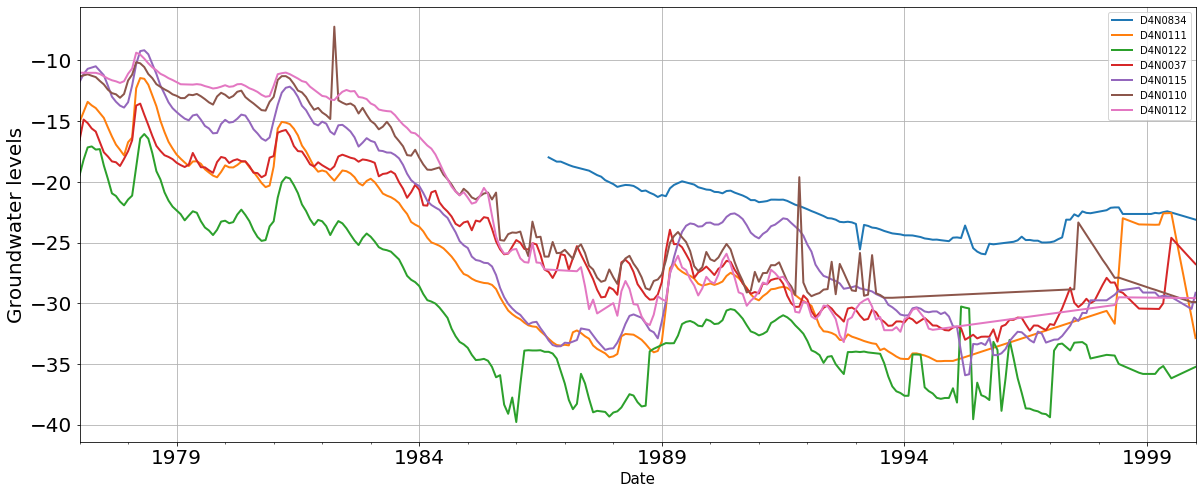

In [11]:
#visual illustration just to show all groundwater levels 

gwls.plot(figsize=(20,8), linewidth=2, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)


In [12]:
gwls['Temperature'] = df['Temperature']
gwls['precip_trend'] = df['precip_trend']
gwls['Discharge'] = df['Discharge']
gwls['Abstraction'] = df['Abstraction']
gwls

D4N0834    D4N0111    D4N0122    D4N0037    D4N0115    D4N0110  \
year_month                                                                     
1977-01-01        NaN -15.070000 -19.460000 -16.560000 -11.775000 -11.330000   
1977-02-01        NaN -14.250000 -18.180000 -14.876667 -11.130000 -11.235424   
1977-03-01        NaN -13.420000 -17.170000 -15.163750 -10.700000 -11.150000   
1977-04-01        NaN -13.710000 -17.090000 -15.610000 -10.593279 -11.270000   
1977-05-01        NaN -13.930000 -17.350000 -15.865000 -10.490000 -11.380000   
...               ...        ...        ...        ...        ...        ...   
1999-09-01 -22.726636 -26.040652 -35.863261 -25.341196 -29.887124 -29.566223   
1999-10-01 -22.823364 -27.720000 -35.710000 -25.695000 -30.079281 -29.676259   
1999-11-01 -22.923318 -29.455326 -35.551630 -26.060598 -30.277843 -29.789964   
1999-12-01 -23.020047 -31.134674 -35.398370 -26.414402 -30.470000 -29.900000   
2000-01-01 -23.120000 -32.870000 -35.240000 -26.780000 -29.140000 -29.900000   

              D4N0112  Temperature  precip_trend  Discharge   Abstraction  
year_month                                                                 
1977-01-01 -11.020000          NaN     49.508333      1.041  4.364772e+05  
1977-02-01 -11.022583        24.40     51.341667      1.092  4.364772e+05  
1977-03-01 -11.024917        20.70     51.983333        NaN  4.364772e+05  
1977-04-01 -11.027500        19.60     48.604167        NaN  4.364772e+05  
1977-05-01 -11.030000          NaN     48.808333      1.406  4.364772e+05  
...               ...          ...           ...        ...           ...  
1999-09-01 -29.564567        16.10     88.108333      0.310  1.738739e+06  
1999-10-01 -29.568149        18.80     85.991667      0.283  1.738739e+06  
1999-11-01 -29.571851        22.75     83.416667      0.272  1.738739e+06  
1999-12-01 -29.575433        20.50     81.858333      0.274  1.738739e+06  
2000-01-01 -29.579134        19.65     76.629167      0.270  2.347073e+06  

[277 rows x 11 columns]

Text(0, 0.5, 'Groundwater levels')

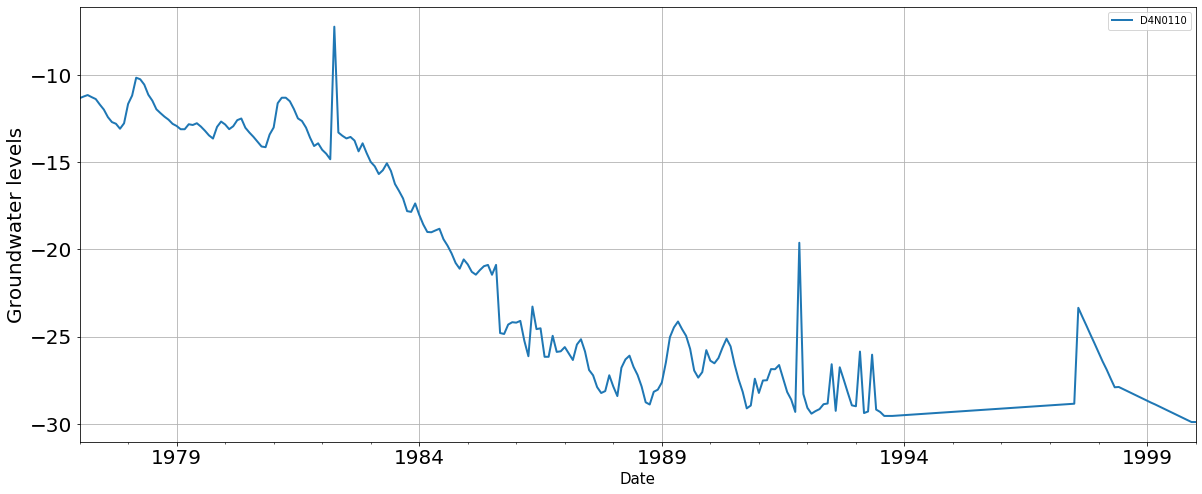

In [13]:
gwls[['D4N0110']].plot(figsize=(20,8), linewidth=2, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)

### Reframing length of dataset based on bhid D4N0115 start and end dates 

In [14]:
pima = gwls.filter(['D4N0110', 'Temperature', 'precip_trend', 'Discharge', 'Abstraction'])
#pima = pima[pima.index > '1975-04-01']  
pima = pima[pima.index < '1993-06-01'] 

In [15]:
pima.apply(lambda x: sum(x.isnull()), axis=0)

D4N0110          0
Temperature     11
precip_trend     0
Discharge       50
Abstraction      0
dtype: int64

In [16]:
pima

D4N0110  Temperature  precip_trend  Discharge  Abstraction
year_month                                                              
1977-01-01 -11.330000          NaN     49.508333      1.041    436477.25
1977-02-01 -11.235424        24.40     51.341667      1.092    436477.25
1977-03-01 -11.150000        20.70     51.983333        NaN    436477.25
1977-04-01 -11.270000        19.60     48.604167        NaN    436477.25
1977-05-01 -11.380000          NaN     48.808333      1.406    436477.25
...               ...          ...           ...        ...          ...
1993-01-01 -28.995000        25.30     46.363829      0.166   1352798.75
1993-02-01 -25.860000        24.05     45.134587      0.165   1352798.75
1993-03-01 -29.386250        22.55     47.312319      0.160   1352798.75
1993-04-01 -29.295714        19.25     43.516486      0.165   1352798.75
1993-05-01 -26.037778        17.25     35.258152        NaN   1352798.75

[197 rows x 5 columns]

#### Interpolating independant varibales only 

In [17]:
pima = pima.interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())
pima['Discharge'] = pima['Discharge'].fillna(0.165000)

#### Calculating start and end dates for new dataframa

In [18]:
result_dict = {}
def check_date(column):
    x = column.notnull()
    print(type(column[x]))
    result_dict[column.name] = [column[x].head(1).index[0], 
    column[x].tail(1).index[0]]
    
pima.apply(check_date)
dates = pd.DataFrame(result_dict)
dates

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


D4N0110 Temperature precip_trend  Discharge Abstraction
0 1977-01-01  1977-01-01   1977-01-01 1977-01-01  1977-01-01
1 1993-05-01  1993-05-01   1993-05-01 1993-05-01  1993-05-01

### Mutual information stats

In [19]:
from sklearn.feature_selection import mutual_info_regression

In [20]:
X = pima[['Temperature', 'precip_trend', 'Discharge','Abstraction']] # Features
y = pima[['D4N0110']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

In [21]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Temperature     0.000000
precip_trend    0.501553
Discharge       0.868737
Abstraction     1.000000
dtype: float64

## LAG TESTING 

In [22]:
precip1  = pima.filter(['D4N0110', 'precip_trend'])
discha1 = pima.filter(['D4N0110', 'Discharge'])
temp1   = pima.filter(['D4N0110', 'Temperature'])
abstr1   = pima.filter(['D4N0110', 'Abstraction'])

In [23]:
lags = range(1, 24)  # 2year lag

# precip_trend
precip = precip1.assign(**{ '{} (t-{})'.format([ 'precip_trend'], t): precip1[[ 'precip_trend']].shift(t) for t in lags for col in precip1})
# disharge
discha = discha1.assign(**{ '{} (t-{})'.format([ 'Discharge'], t): discha1[[ 'Discharge']].shift(t) for t in lags for col in discha1})
# temperature
temp = temp1.assign(**{ '{} (t-{})'.format([ 'Temperature'], t): temp1[[ 'Temperature']].shift(t) for t in lags for col in temp1})
# abstraction
abstr = abstr1.assign(**{ '{} (t-{})'.format([ 'Abstraction'], t): abstr1[[ 'Abstraction']].shift(t) for t in lags for col in abstr1})

## Cross Correlation

- degree of similarity between two time series in different times or space 
- lag is considred since time is under investigation

### Rainfall

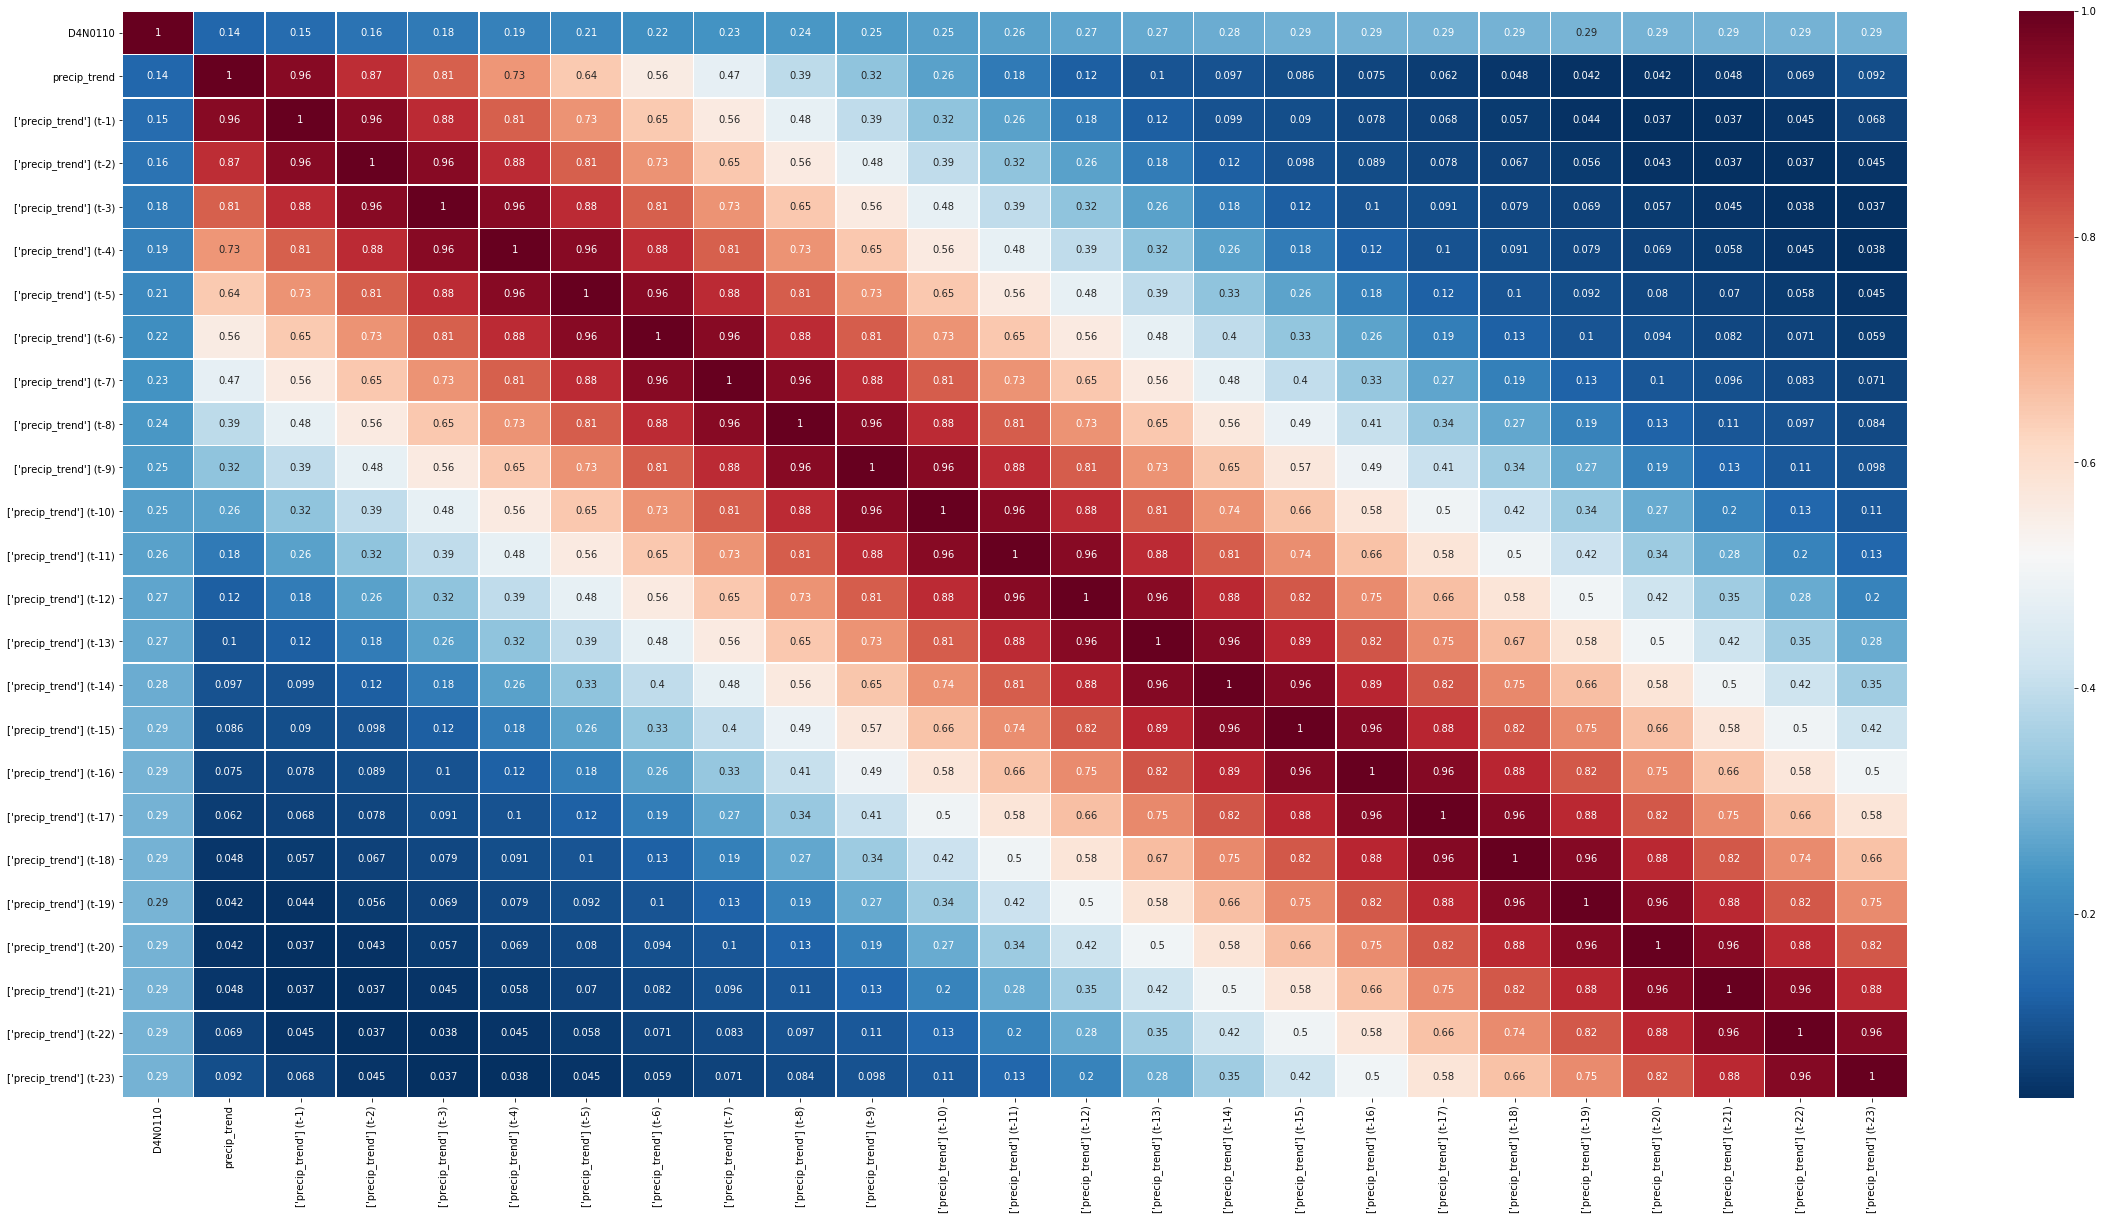

In [24]:
# precip0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = precip.corr(method = 'spearman')
corrm2 = precip.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

### Discharge

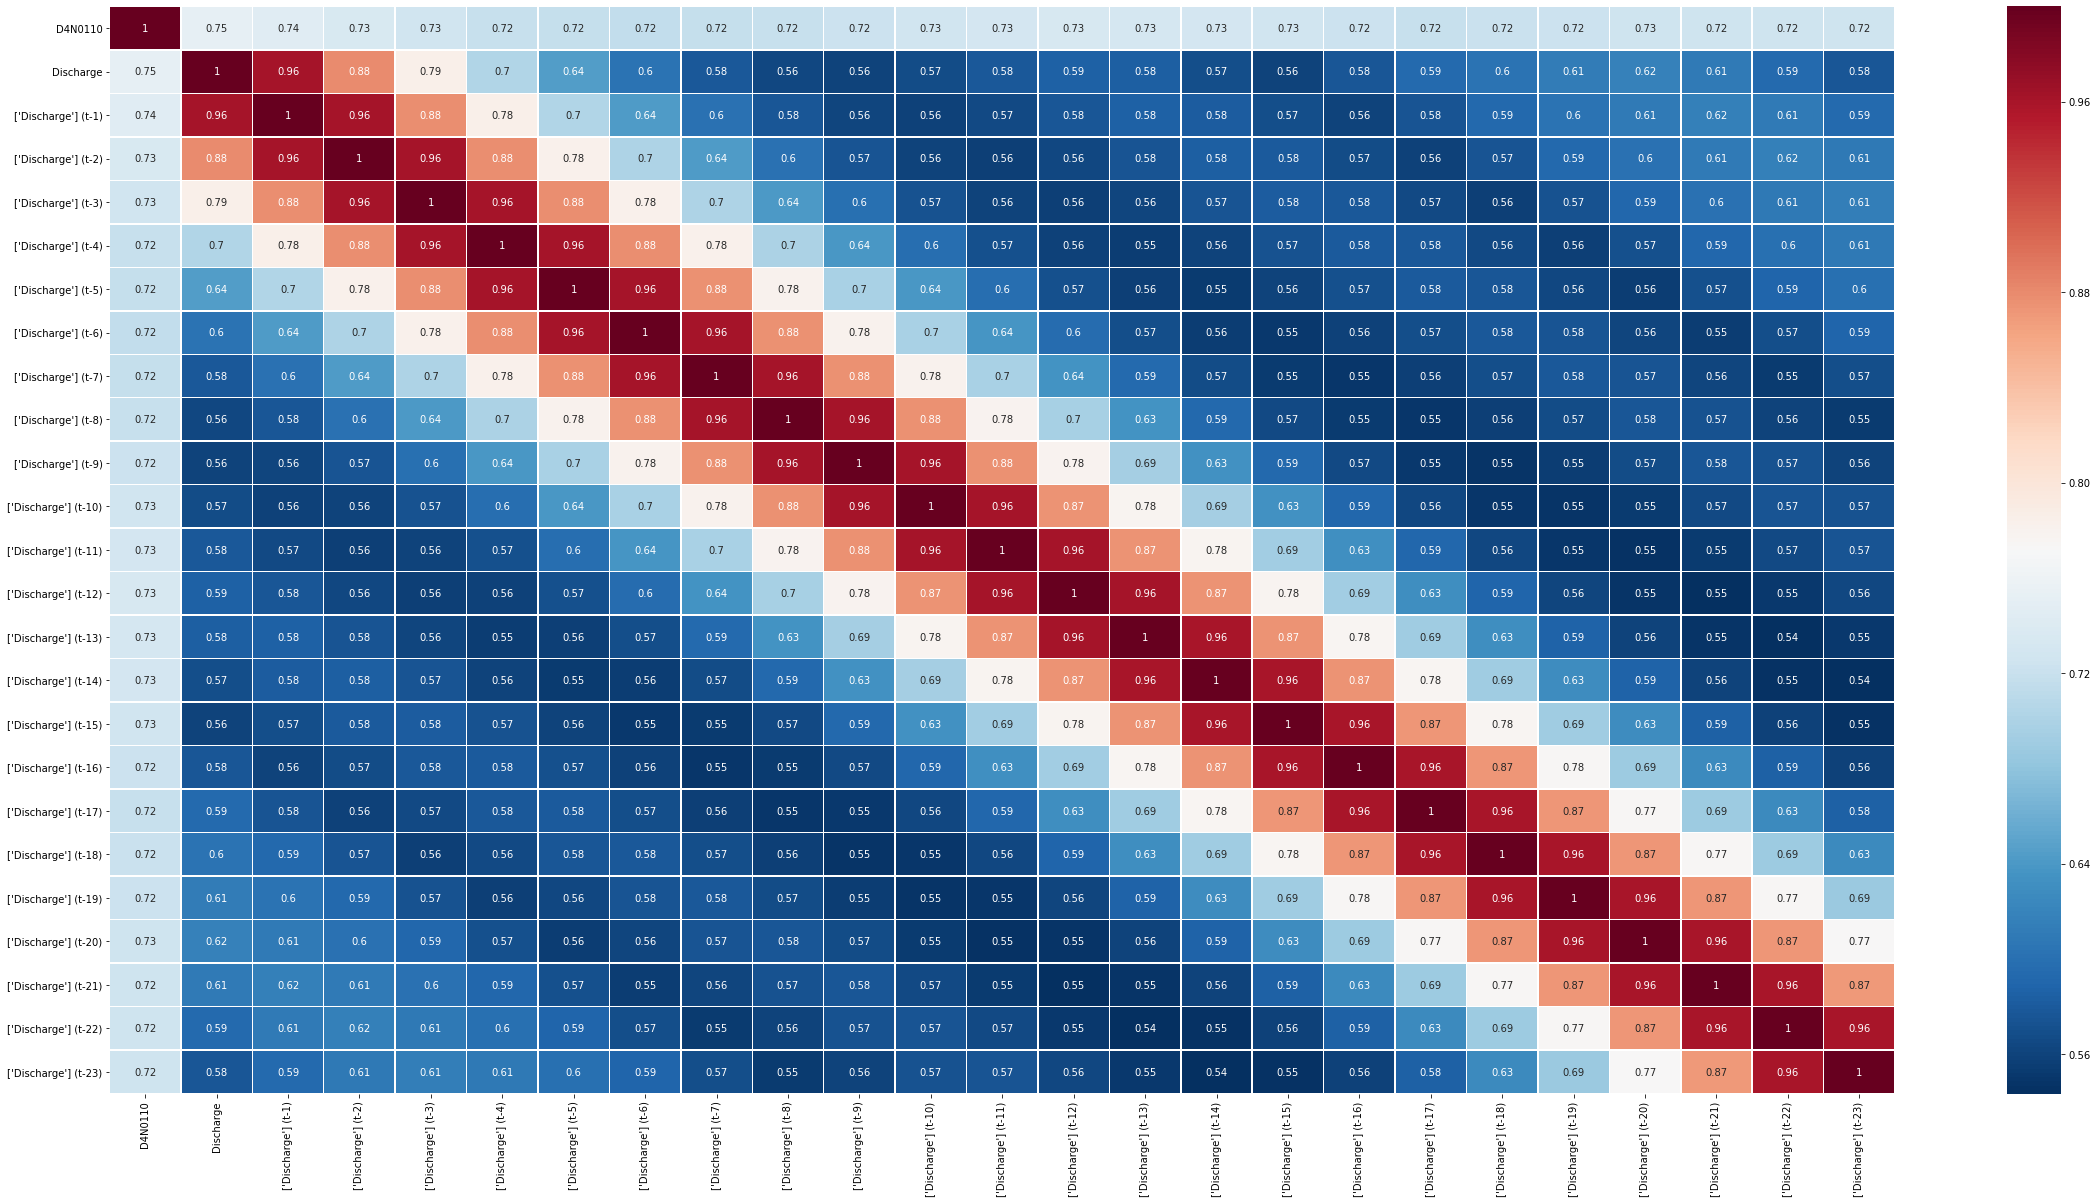

In [25]:
# temp0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = discha.corr(method = 'spearman')
corrm2 = discha.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

### Temperature

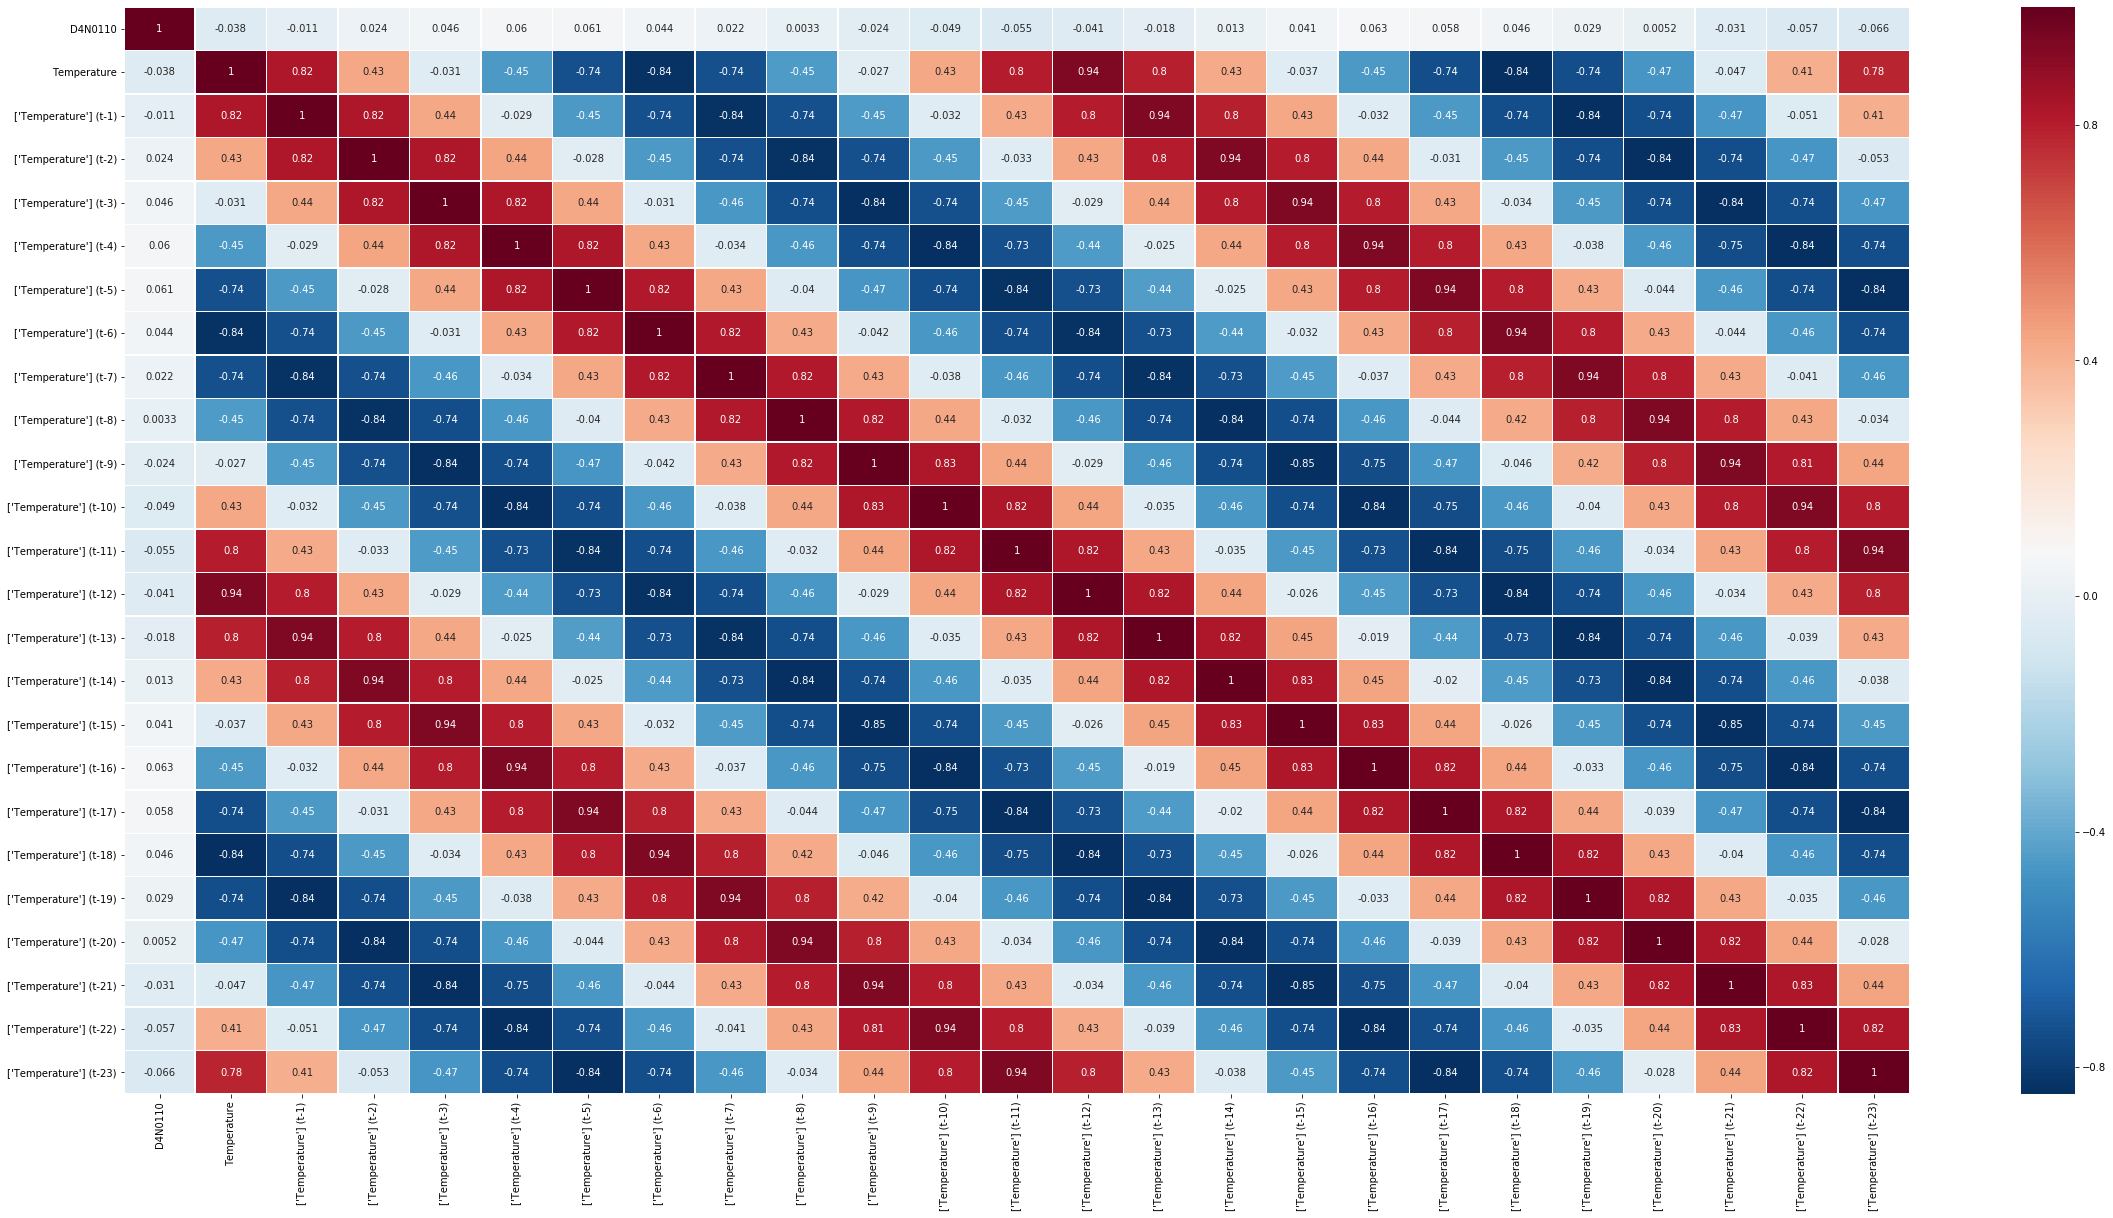

In [26]:
# temp0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = temp.corr(method = 'spearman')
corrm2 = temp.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

#### Shifting variables based on lag variables 

In [27]:
#pima=pima.drop(['Temperature (t-3)'], axis=1)
#pima=pima.drop(['precip_trend (t-5)'], axis=1)
#pima

In [28]:
pima['Temperature (t-3)'] = pima.Temperature.shift(0)
pima['precip_trend (t-5)'] = pima.precip_trend.shift(0)
#pima = pima['Discharge (t-6)'].drop(axis=1)
pima

D4N0110  Temperature  precip_trend  Discharge  Abstraction  \
year_month                                                                 
1977-01-01 -11.330000    24.400000     49.508333   1.041000    436477.25   
1977-02-01 -11.235424    24.400000     51.341667   1.092000    436477.25   
1977-03-01 -11.150000    20.700000     51.983333   1.190787    436477.25   
1977-04-01 -11.270000    19.600000     48.604167   1.300157    436477.25   
1977-05-01 -11.380000    16.231148     48.808333   1.406000    436477.25   
...               ...          ...           ...        ...          ...   
1993-01-01 -28.995000    25.300000     46.363829   0.166000   1352798.75   
1993-02-01 -25.860000    24.050000     45.134587   0.165000   1352798.75   
1993-03-01 -29.386250    22.550000     47.312319   0.160000   1352798.75   
1993-04-01 -29.295714    19.250000     43.516486   0.165000   1352798.75   
1993-05-01 -26.037778    17.250000     35.258152   0.165000   1352798.75   

            Temperature (t-3)  precip_trend (t-5)  
year_month                                         
1977-01-01          24.400000           49.508333  
1977-02-01          24.400000           51.341667  
1977-03-01          20.700000           51.983333  
1977-04-01          19.600000           48.604167  
1977-05-01          16.231148           48.808333  
...                       ...                 ...  
1993-01-01          25.300000           46.363829  
1993-02-01          24.050000           45.134587  
1993-03-01          22.550000           47.312319  
1993-04-01          19.250000           43.516486  
1993-05-01          17.250000           35.258152  

[197 rows x 7 columns]

In [29]:
X = pima[['Temperature (t-3)', 'precip_trend (t-5)', 'Discharge','Abstraction']] # Features
y = pima[['D4N0110']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

In [30]:
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [31]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Temperature (t-3)     0.000000
precip_trend (t-5)    0.503441
Discharge             0.870140
Abstraction           1.000000
dtype: float64

### Auto and Cross corr plots combined 

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [33]:
rainfall = X['precip_trend (t-5)']
temperature = X['Temperature (t-3)']
discharge = X['Discharge']
usage =  X['Abstraction']
bhid =  y['D4N0110']

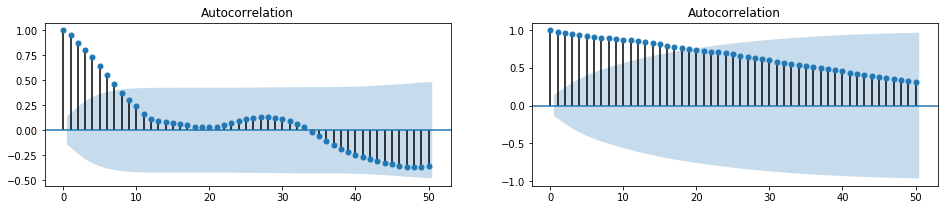

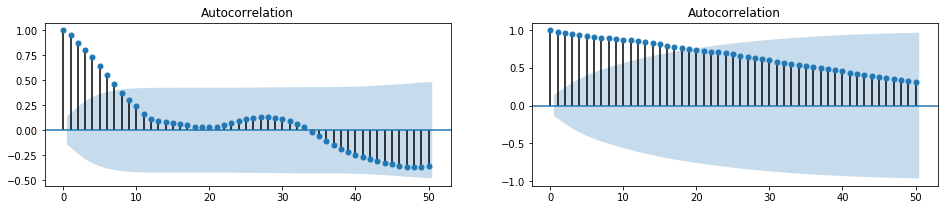

In [34]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(rainfall.tolist(), lags=50, ax=axes[0])
plot_acf(bhid.tolist(), lags=50, ax=axes[1])

Checking if target variable is auto correlated.
Auto-corr (similarity between observations as a function of the lag time)

- plot looks like a sigmoid funtion (hint for seasonality)

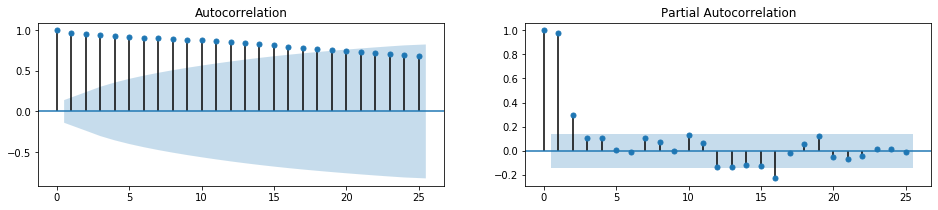

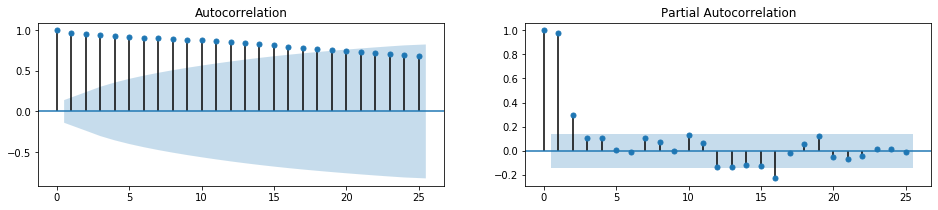

In [35]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(bhid, lags=25, ax=axes[0])
plot_pacf(bhid, lags=25, ax=axes[1])

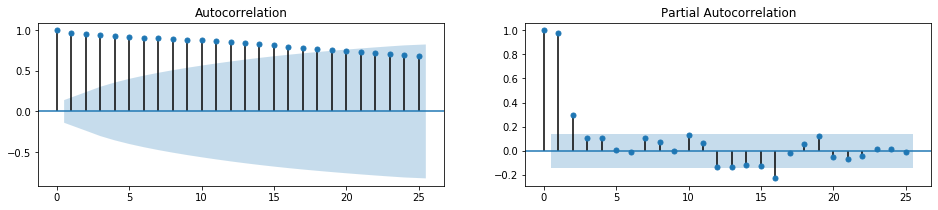

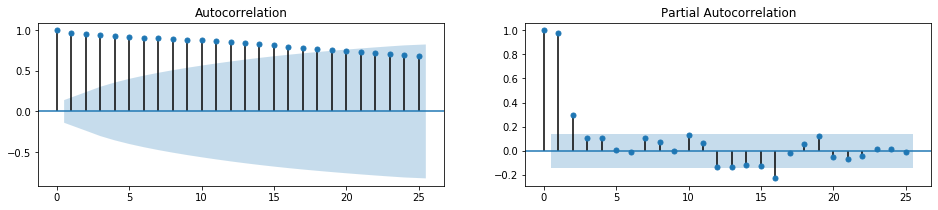

In [36]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(bhid, lags=25, ax=axes[0])
plot_pacf(bhid, lags=25, ax=axes[1])

#### To check whether data is stationary we use Augmented Dickey-Fuller (ADF) Test

For time series modeling, data needs to be stationary — if there is a trend in the data we need to get rid of it. 

#### BHID

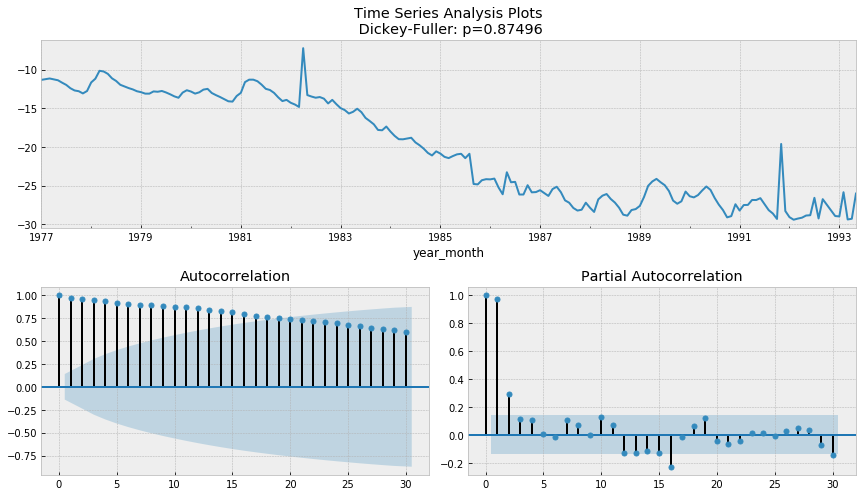

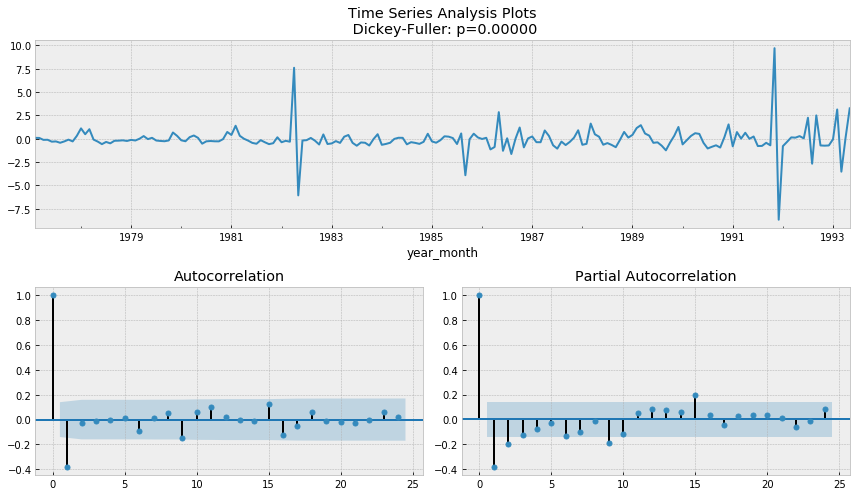

In [37]:
In [2]: import statsmodels.api as sm
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(bhid, lags=30)

# Take the first difference to remove to make the process stationary
D4N0115_diff = bhid - bhid.shift(1)

tsplot(D4N0115_diff[1:], lags=24)

#### Rainfall

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


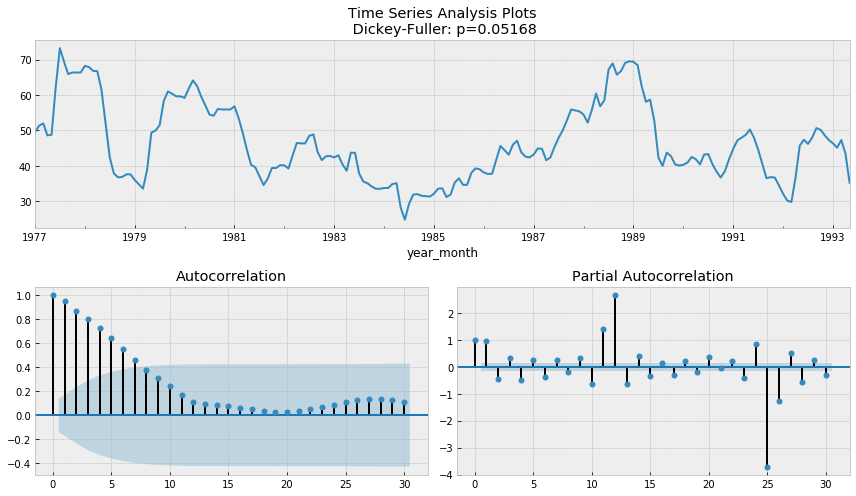

In [38]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(rainfall, lags=30)

#### Temp

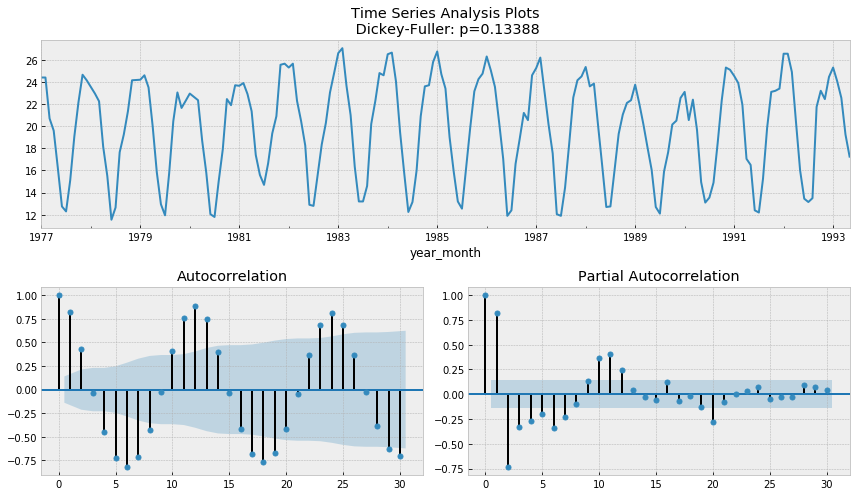

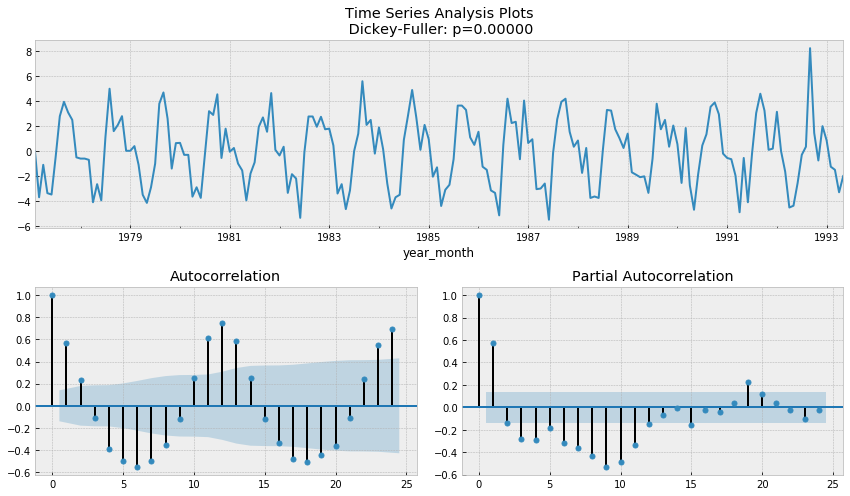

In [39]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(temperature, lags=30)

# Take the first difference to remove to make the process stationary
temp_diff = temperature - temperature.shift(1)

tsplot(temp_diff[1:], lags=24)


#### Discharge

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


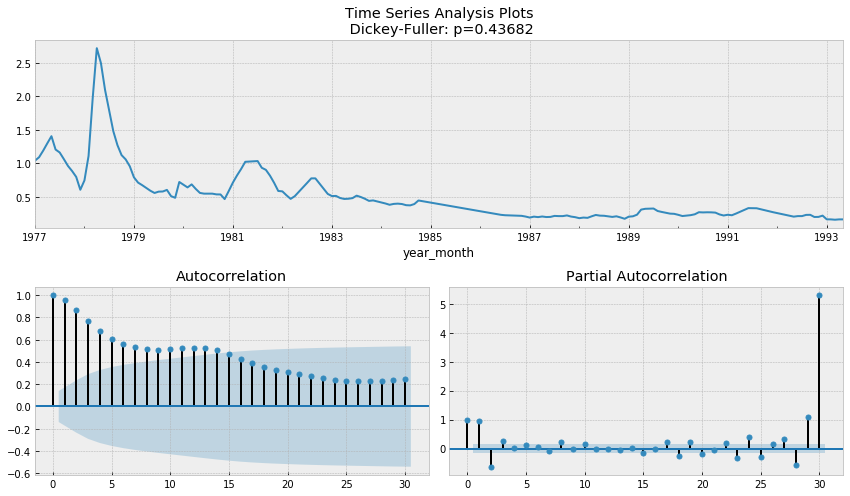

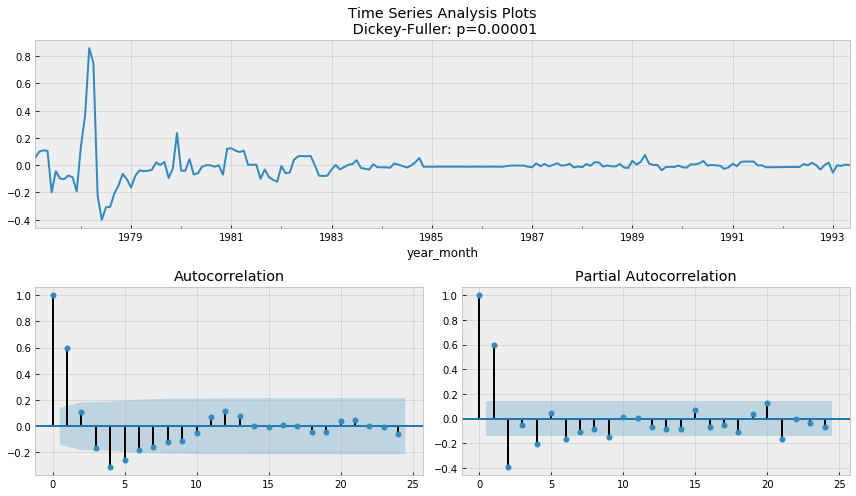

In [40]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(discharge, lags=30)

# Take the first difference to remove to make the process stationary
dis_diff = discharge - discharge.shift(1)

tsplot(dis_diff[1:], lags=24)

#### Usage

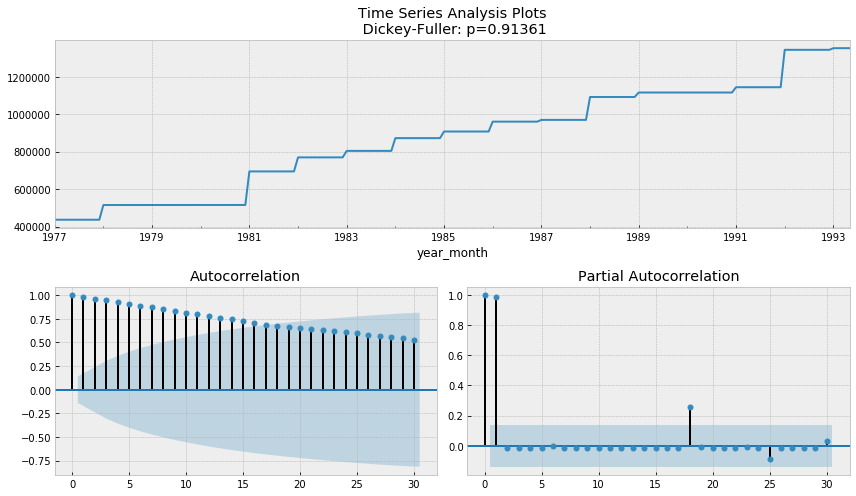

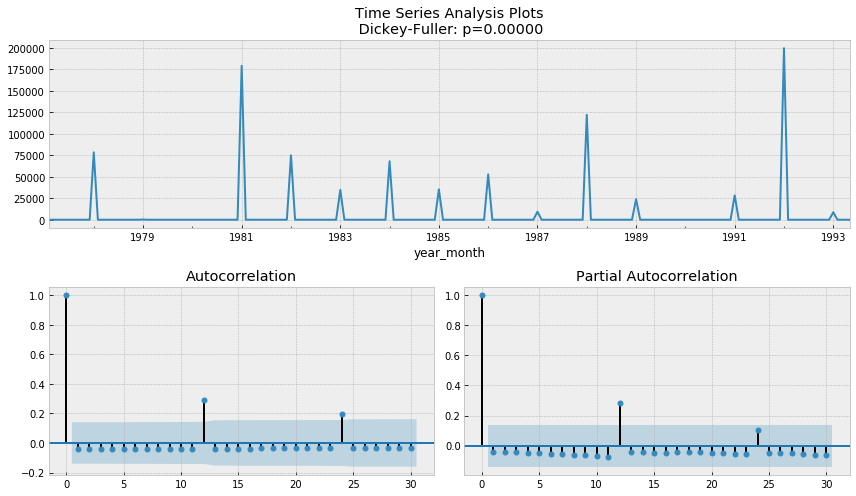

In [41]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(usage, lags=30)

#Take the first difference to remove to make the process stationary
usage_diff = usage - usage.shift(1)


tsplot(usage_diff[1:], lags=30)



### Differenced dataframe (poor model results)

In [42]:
pima_diff = pd.DataFrame({'D4N0115': D4N0115_diff ,'Temperature': temp_diff,  'Rainfall': rainfall,  'Discharge': dis_diff, 'Abstraction': usage_diff}, columns=['D4N0115','Temperature','precip_trend','Discharge', 'Abstraction'])
pima_diff.apply(lambda x: sum(x.isnull()), axis=0)

D4N0115           1
Temperature       1
precip_trend    197
Discharge         1
Abstraction       1
dtype: int64

In [43]:
#X = pima_diff[['Temperature', 'Discharge','Abstraction']] # Features
#y = pima_diff[['D4N0834']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

### Visual illustration to help select train and test data

Text(0, 0.5, 'Groundwater levels')

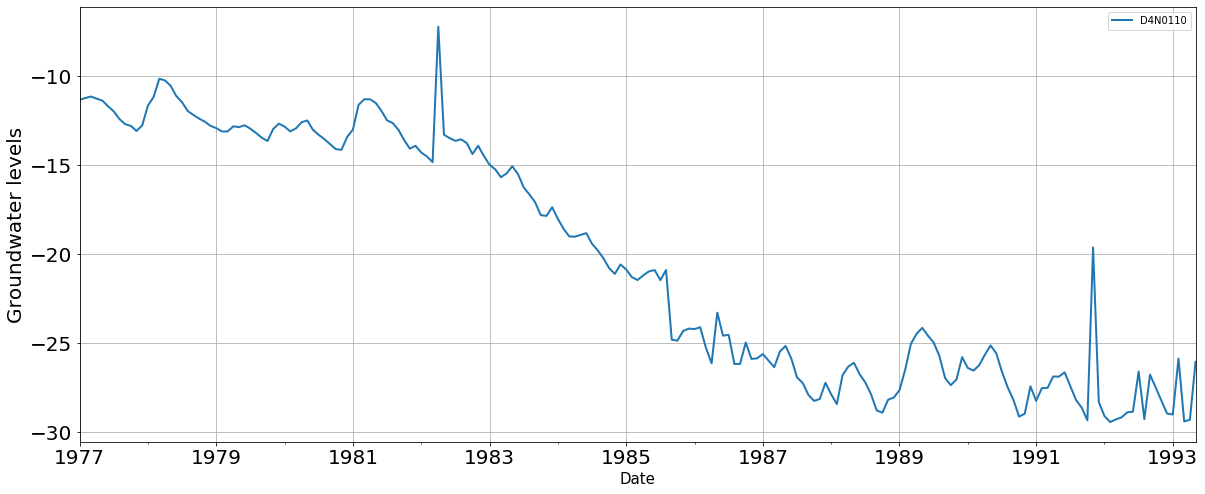

In [44]:
pima[['D4N0110']].plot(figsize=(20,8), linewidth=2, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)


In [45]:
pima = pima[pima.index < '1991-09-01'] 

### Model Parameters

In [46]:
pima['precip_trend_log'] = 1 +np.log1p(pima['precip_trend (t-5)'])
pima['Temperature_log'] = 1 +np.log1p(pima['Temperature (t-3)'])
pima['Discharge_log'] = 1 + np.log1p(pima['Discharge'])
pima['Abstraction_log'] = 1 + np.log1p(pima['Abstraction'])

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [47]:
pima

D4N0110  Temperature  precip_trend  Discharge   Abstraction  \
year_month                                                                  
1977-01-01 -11.330000    24.400000     49.508333   1.041000  4.364772e+05   
1977-02-01 -11.235424    24.400000     51.341667   1.092000  4.364772e+05   
1977-03-01 -11.150000    20.700000     51.983333   1.190787  4.364772e+05   
1977-04-01 -11.270000    19.600000     48.604167   1.300157  4.364772e+05   
1977-05-01 -11.380000    16.231148     48.808333   1.406000  4.364772e+05   
...               ...          ...           ...        ...           ...   
1991-04-01 -26.864483    17.050000     48.743613   0.279117  1.144242e+06   
1991-05-01 -26.871935    16.500000     50.276947   0.305617  1.144242e+06   
1991-06-01 -26.631538    12.400000     47.943613   0.333000  1.144242e+06   
1991-07-01 -27.411538    12.200000     44.585280   0.332000  1.144242e+06   
1991-08-01 -28.179412    15.250000     40.581113   0.331000  1.144242e+06   

            Temperature (t-3)  precip_trend (t-5)  precip_trend_log  \
year_month                                                            
1977-01-01          24.400000           49.508333          4.922138   
1977-02-01          24.400000           51.341667          4.957793   
1977-03-01          20.700000           51.983333          4.969977   
1977-04-01          19.600000           48.604167          4.904075   
1977-05-01          16.231148           48.808333          4.908182   
...                       ...                 ...               ...   
1991-04-01          17.050000           48.743613          4.906882   
1991-05-01          16.500000           50.276947          4.937241   
1991-06-01          12.400000           47.943613          4.890669   
1991-07-01          12.200000           44.585280          4.819585   
1991-08-01          15.250000           40.581113          4.727646   

            Temperature_log  Discharge_log  Abstraction_log  
year_month                                                   
1977-01-01         4.234749       1.713440        13.986494  
1977-02-01         4.234749       1.738121        13.986494  
1977-03-01         4.077312       1.784261        13.986494  
1977-04-01         4.025291       1.832978        13.986494  
1977-05-01         3.846719       1.877966        13.986494  
...                     ...            ...              ...  
1991-04-01         3.893146       1.246170        14.950254  
1991-05-01         3.862201       1.266675        14.950254  
1991-06-01         3.595255       1.287432        14.950254  
1991-07-01         3.580217       1.286682        14.950254  
1991-08-01         3.788093       1.285931        14.950254  

[176 rows x 11 columns]

In [48]:
for obs in range(1,5):
    pima["t_" + str(obs)] = pima.D4N0110.shift(obs)
pima.fillna(0, inplace=True)

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [49]:
pima

D4N0110  Temperature  precip_trend  Discharge   Abstraction  \
year_month                                                                  
1977-01-01 -11.330000    24.400000     49.508333   1.041000  4.364772e+05   
1977-02-01 -11.235424    24.400000     51.341667   1.092000  4.364772e+05   
1977-03-01 -11.150000    20.700000     51.983333   1.190787  4.364772e+05   
1977-04-01 -11.270000    19.600000     48.604167   1.300157  4.364772e+05   
1977-05-01 -11.380000    16.231148     48.808333   1.406000  4.364772e+05   
...               ...          ...           ...        ...           ...   
1991-04-01 -26.864483    17.050000     48.743613   0.279117  1.144242e+06   
1991-05-01 -26.871935    16.500000     50.276947   0.305617  1.144242e+06   
1991-06-01 -26.631538    12.400000     47.943613   0.333000  1.144242e+06   
1991-07-01 -27.411538    12.200000     44.585280   0.332000  1.144242e+06   
1991-08-01 -28.179412    15.250000     40.581113   0.331000  1.144242e+06   

            Temperature (t-3)  precip_trend (t-5)  precip_trend_log  \
year_month                                                            
1977-01-01          24.400000           49.508333          4.922138   
1977-02-01          24.400000           51.341667          4.957793   
1977-03-01          20.700000           51.983333          4.969977   
1977-04-01          19.600000           48.604167          4.904075   
1977-05-01          16.231148           48.808333          4.908182   
...                       ...                 ...               ...   
1991-04-01          17.050000           48.743613          4.906882   
1991-05-01          16.500000           50.276947          4.937241   
1991-06-01          12.400000           47.943613          4.890669   
1991-07-01          12.200000           44.585280          4.819585   
1991-08-01          15.250000           40.581113          4.727646   

            Temperature_log  Discharge_log  Abstraction_log        t_1  \
year_month                                                               
1977-01-01         4.234749       1.713440        13.986494   0.000000   
1977-02-01         4.234749       1.738121        13.986494 -11.330000   
1977-03-01         4.077312       1.784261        13.986494 -11.235424   
1977-04-01         4.025291       1.832978        13.986494 -11.150000   
1977-05-01         3.846719       1.877966        13.986494 -11.270000   
...                     ...            ...              ...        ...   
1991-04-01         3.893146       1.246170        14.950254 -27.503548   
1991-05-01         3.862201       1.266675        14.950254 -26.864483   
1991-06-01         3.595255       1.287432        14.950254 -26.871935   
1991-07-01         3.580217       1.286682        14.950254 -26.631538   
1991-08-01         3.788093       1.285931        14.950254 -27.411538   

                  t_2        t_3        t_4  
year_month                                   
1977-01-01   0.000000   0.000000   0.000000  
1977-02-01   0.000000   0.000000   0.000000  
1977-03-01 -11.330000   0.000000   0.000000  
1977-04-01 -11.235424 -11.330000   0.000000  
1977-05-01 -11.150000 -11.235424 -11.330000  
...               ...        ...        ...  
1991-04-01 -27.518293 -28.232273 -27.416875  
1991-05-01 -27.503548 -27.518293 -28.232273  
1991-06-01 -26.864483 -27.503548 -27.518293  
1991-07-01 -26.871935 -26.864483 -27.503548  
1991-08-01 -26.631538 -26.871935 -26.864483  

[176 rows x 15 columns]

In [50]:
pima.shape

(176, 15)

In [51]:
pima1  = pima[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2','D4N0110']]
scaler = StandardScaler()
pima1  = pd.DataFrame(scaler.fit_transform(pima1), columns=pima1.columns, index=pima1.index)

### All variables

In [52]:
X = pima1[['Temperature_log','precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']]
y = pima1['D4N0110']

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

Temperature_log     0.002056
precip_trend_log    0.345736
Discharge_log       0.646473
Abstraction_log     0.675315
t_1                 1.000000
t_2                 0.799480
dtype: float64

In [53]:
X = pima1[['Discharge_log' ,'precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']].values
y = pima1['D4N0110'].values
y = y.reshape(-1,1)

In [54]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(147, 6) (147, 1)
(29, 6) (29, 1)


In [55]:
def forecast(model, test_forecast, gwl, steps_ahead):
    y_pred = []
    current_output = gwl
    for step in range(steps_ahead):
        #print(test_forecast[step])
        input_test = np.concatenate([test_forecast[step][:-1], [current_output]])
        #input_test = [test_forecast[0][0][:-1], gwl]
        #print(input_test)
        pred = model.predict(input_test.reshape(1,1,6))
        y_pred.append(pred[0][0])
        #print(pred)
        current_output = pred[0][0]
    return y_pred

In [56]:
y_test[0]

array([-0.79231483])

### LSTM

In [57]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import GRU, LSTM
from tensorflow.keras.optimizers import Adam

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/tensorf

In [58]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_lstm', 'rmse_lstm', 'r2_lstm','mae_lstm'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(LSTM(50, input_shape=(1, 6)))
    model.add(Dropout(0.1))

    model.add(Dense(1))

    model.compile(loss='mae', optimizer='adam')

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
    
    history = model.fit(X_t_reshaped, y_train, epochs=700
                    , batch_size=72, validation_data=(X_val_reshaped, y_test), verbose=2, callbacks=[check, early], shuffle=False)

    #running function
    gwl = -0.79231483
    test_forecast = X_test
    steps_ahead = 29
    y_pred = forecast(model, test_forecast, gwl, steps_ahead)
    y_pred = np.array(y_pred)
    
    #metrics for test
    y_lstm = y_pred
    test_pred.append(y_lstm)
    mse_lstm = mean_squared_error(y_test, y_lstm)
    rmse_lstm = np.sqrt(mse_lstm)
    r2_lstm = r2_score(y_test, y_lstm)
    mae_lstm = mean_absolute_error(y_test, y_lstm)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_lstm,Round), round(rmse_lstm,Round), round(r2_lstm,Round),round(mae_lstm,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(147, 6)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 147 samples, validate on 29 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/700

Epoch 00001: val_loss improved from inf to 1.17192, saving model to model.h5
147/147 - 3s - loss: 0.9518 - val_loss: 1.1719
Epoch 2/700

Epoch 00002: val_loss improved from 1.17192 to 1.13821, saving model to model.h5
147/147 - 0s - loss: 0.9199 - val_loss: 1.1382
Epoch 3/700

Epoch 00003: val_loss improved from 1.13821 to 1.10377, saving model to model.h5
147/147 - 0s - loss: 0.8980 - val_loss: 1.1038
Epoch 4/700

Epoch 00004: val_loss improved from 1.10377 to 1.06900, saving model to model.h5
147/147 - 0s - loss: 0.8709 - val_loss: 1.0690
Epoch 5/700

Epoch 00005: val_loss improved from 1.06900 to 1.03404, saving model to model.h5
147/147 - 0s - loss: 0.8439 - val_loss: 1.0340
Epoch 6/700

Epoch

147/147 - 0s - loss: 0.1474 - val_loss: 0.1926
Epoch 58/700

Epoch 00058: val_loss did not improve from 0.19260
147/147 - 0s - loss: 0.1455 - val_loss: 0.1927
Epoch 59/700

Epoch 00059: val_loss improved from 0.19260 to 0.19011, saving model to model.h5
147/147 - 0s - loss: 0.1460 - val_loss: 0.1901
Epoch 60/700

Epoch 00060: val_loss improved from 0.19011 to 0.18655, saving model to model.h5
147/147 - 0s - loss: 0.1442 - val_loss: 0.1865
Epoch 61/700

Epoch 00061: val_loss improved from 0.18655 to 0.18297, saving model to model.h5
147/147 - 0s - loss: 0.1396 - val_loss: 0.1830
Epoch 62/700

Epoch 00062: val_loss did not improve from 0.18297
147/147 - 0s - loss: 0.1443 - val_loss: 0.1837
Epoch 63/700

Epoch 00063: val_loss did not improve from 0.18297
147/147 - 0s - loss: 0.1400 - val_loss: 0.1864
Epoch 64/700

Epoch 00064: val_loss did not improve from 0.18297
147/147 - 0s - loss: 0.1363 - val_loss: 0.1915
Epoch 65/700

Epoch 00065: val_loss did not improve from 0.18297
147/147 - 0s -

Epoch 125/700

Epoch 00125: val_loss did not improve from 0.12732
147/147 - 0s - loss: 0.1145 - val_loss: 0.1460
Epoch 126/700

Epoch 00126: val_loss did not improve from 0.12732
147/147 - 0s - loss: 0.1053 - val_loss: 0.1465
Epoch 127/700

Epoch 00127: val_loss did not improve from 0.12732
147/147 - 0s - loss: 0.1141 - val_loss: 0.1469
Epoch 128/700

Epoch 00128: val_loss did not improve from 0.12732
147/147 - 0s - loss: 0.1087 - val_loss: 0.1469
Epoch 129/700

Epoch 00129: val_loss did not improve from 0.12732
147/147 - 0s - loss: 0.1107 - val_loss: 0.1473
Epoch 130/700

Epoch 00130: val_loss did not improve from 0.12732
147/147 - 0s - loss: 0.1072 - val_loss: 0.1483
Epoch 131/700

Epoch 00131: val_loss did not improve from 0.12732
147/147 - 0s - loss: 0.1131 - val_loss: 0.1501
Epoch 132/700

Epoch 00132: val_loss did not improve from 0.12732
147/147 - 0s - loss: 0.1094 - val_loss: 0.1499
Epoch 133/700

Epoch 00133: val_loss did not improve from 0.12732
147/147 - 0s - loss: 0.1153 - 

Epoch 195/700

Epoch 00195: val_loss did not improve from 0.11741
147/147 - 0s - loss: 0.0959 - val_loss: 0.1252
Epoch 196/700

Epoch 00196: val_loss did not improve from 0.11741
147/147 - 0s - loss: 0.1013 - val_loss: 0.1327
Epoch 197/700

Epoch 00197: val_loss did not improve from 0.11741
147/147 - 0s - loss: 0.0969 - val_loss: 0.1405
Epoch 198/700

Epoch 00198: val_loss did not improve from 0.11741
147/147 - 0s - loss: 0.1037 - val_loss: 0.1470
Epoch 199/700

Epoch 00199: val_loss did not improve from 0.11741
147/147 - 0s - loss: 0.1065 - val_loss: 0.1493
Epoch 200/700

Epoch 00200: val_loss did not improve from 0.11741
147/147 - 0s - loss: 0.1079 - val_loss: 0.1448
Epoch 201/700

Epoch 00201: val_loss did not improve from 0.11741
147/147 - 0s - loss: 0.1036 - val_loss: 0.1379
Epoch 202/700

Epoch 00202: val_loss did not improve from 0.11741
147/147 - 0s - loss: 0.0962 - val_loss: 0.1319
Epoch 203/700

Epoch 00203: val_loss did not improve from 0.11741
147/147 - 0s - loss: 0.0986 - 

Epoch 268/700

Epoch 00268: val_loss did not improve from 0.11741
147/147 - 0s - loss: 0.1002 - val_loss: 0.1334
Epoch 269/700

Epoch 00269: val_loss did not improve from 0.11741
147/147 - 0s - loss: 0.0988 - val_loss: 0.1329
Epoch 270/700

Epoch 00270: val_loss did not improve from 0.11741
147/147 - 0s - loss: 0.1013 - val_loss: 0.1309
Epoch 271/700

Epoch 00271: val_loss did not improve from 0.11741
147/147 - 0s - loss: 0.0995 - val_loss: 0.1316
Epoch 272/700

Epoch 00272: val_loss did not improve from 0.11741
147/147 - 0s - loss: 0.0969 - val_loss: 0.1338
Epoch 273/700

Epoch 00273: val_loss did not improve from 0.11741
147/147 - 0s - loss: 0.0909 - val_loss: 0.1413
Epoch 274/700

Epoch 00274: val_loss did not improve from 0.11741
147/147 - 0s - loss: 0.0942 - val_loss: 0.1547
Epoch 275/700

Epoch 00275: val_loss did not improve from 0.11741
147/147 - 0s - loss: 0.0988 - val_loss: 0.1647
Epoch 276/700

Epoch 00276: val_loss did not improve from 0.11741
147/147 - 0s - loss: 0.1122 - 

Epoch 40/700

Epoch 00040: val_loss did not improve from 0.23379
147/147 - 0s - loss: 0.1838 - val_loss: 0.2466
Epoch 41/700

Epoch 00041: val_loss did not improve from 0.23379
147/147 - 0s - loss: 0.1842 - val_loss: 0.2357
Epoch 42/700

Epoch 00042: val_loss improved from 0.23379 to 0.22423, saving model to model.h5
147/147 - 0s - loss: 0.1751 - val_loss: 0.2242
Epoch 43/700

Epoch 00043: val_loss improved from 0.22423 to 0.21444, saving model to model.h5
147/147 - 0s - loss: 0.1688 - val_loss: 0.2144
Epoch 44/700

Epoch 00044: val_loss improved from 0.21444 to 0.20891, saving model to model.h5
147/147 - 0s - loss: 0.1629 - val_loss: 0.2089
Epoch 45/700

Epoch 00045: val_loss improved from 0.20891 to 0.20796, saving model to model.h5
147/147 - 0s - loss: 0.1600 - val_loss: 0.2080
Epoch 46/700

Epoch 00046: val_loss improved from 0.20796 to 0.20654, saving model to model.h5
147/147 - 0s - loss: 0.1537 - val_loss: 0.2065
Epoch 47/700

Epoch 00047: val_loss improved from 0.20654 to 0.205

Epoch 105/700

Epoch 00105: val_loss did not improve from 0.13889
147/147 - 0s - loss: 0.1019 - val_loss: 0.1545
Epoch 106/700

Epoch 00106: val_loss did not improve from 0.13889
147/147 - 0s - loss: 0.1106 - val_loss: 0.1504
Epoch 107/700

Epoch 00107: val_loss did not improve from 0.13889
147/147 - 0s - loss: 0.1045 - val_loss: 0.1483
Epoch 108/700

Epoch 00108: val_loss did not improve from 0.13889
147/147 - 0s - loss: 0.1077 - val_loss: 0.1482
Epoch 109/700

Epoch 00109: val_loss did not improve from 0.13889
147/147 - 0s - loss: 0.1016 - val_loss: 0.1494
Epoch 110/700

Epoch 00110: val_loss did not improve from 0.13889
147/147 - 0s - loss: 0.1001 - val_loss: 0.1495
Epoch 111/700

Epoch 00111: val_loss did not improve from 0.13889
147/147 - 0s - loss: 0.1083 - val_loss: 0.1475
Epoch 112/700

Epoch 00112: val_loss did not improve from 0.13889
147/147 - 0s - loss: 0.0979 - val_loss: 0.1456
Epoch 113/700

Epoch 00113: val_loss did not improve from 0.13889
147/147 - 0s - loss: 0.1013 - 

Epoch 177/700

Epoch 00177: val_loss did not improve from 0.12742
147/147 - 0s - loss: 0.1001 - val_loss: 0.1509
Epoch 178/700

Epoch 00178: val_loss did not improve from 0.12742
147/147 - 0s - loss: 0.0982 - val_loss: 0.1497
Epoch 179/700

Epoch 00179: val_loss did not improve from 0.12742
147/147 - 0s - loss: 0.0992 - val_loss: 0.1449
Epoch 180/700

Epoch 00180: val_loss did not improve from 0.12742
147/147 - 0s - loss: 0.0972 - val_loss: 0.1438
Epoch 181/700

Epoch 00181: val_loss did not improve from 0.12742
147/147 - 0s - loss: 0.1033 - val_loss: 0.1458
Epoch 182/700

Epoch 00182: val_loss did not improve from 0.12742
147/147 - 0s - loss: 0.1034 - val_loss: 0.1484
Epoch 183/700

Epoch 00183: val_loss did not improve from 0.12742
147/147 - 0s - loss: 0.1001 - val_loss: 0.1540
Epoch 184/700

Epoch 00184: val_loss did not improve from 0.12742
147/147 - 0s - loss: 0.1051 - val_loss: 0.1616
Epoch 185/700

Epoch 00185: val_loss did not improve from 0.12742
147/147 - 0s - loss: 0.1009 - 

Epoch 249/700

Epoch 00249: val_loss did not improve from 0.12594
147/147 - 0s - loss: 0.0992 - val_loss: 0.1263
Epoch 250/700

Epoch 00250: val_loss did not improve from 0.12594
147/147 - 0s - loss: 0.0918 - val_loss: 0.1265
Epoch 251/700

Epoch 00251: val_loss improved from 0.12594 to 0.12553, saving model to model.h5
147/147 - 0s - loss: 0.0987 - val_loss: 0.1255
Epoch 252/700

Epoch 00252: val_loss did not improve from 0.12553
147/147 - 0s - loss: 0.0927 - val_loss: 0.1271
Epoch 253/700

Epoch 00253: val_loss did not improve from 0.12553
147/147 - 0s - loss: 0.1027 - val_loss: 0.1325
Epoch 254/700

Epoch 00254: val_loss did not improve from 0.12553
147/147 - 0s - loss: 0.1027 - val_loss: 0.1472
Epoch 255/700

Epoch 00255: val_loss did not improve from 0.12553
147/147 - 0s - loss: 0.1001 - val_loss: 0.1599
Epoch 256/700

Epoch 00256: val_loss did not improve from 0.12553
147/147 - 0s - loss: 0.0977 - val_loss: 0.1661
Epoch 257/700

Epoch 00257: val_loss did not improve from 0.12553


Epoch 321/700

Epoch 00321: val_loss did not improve from 0.11815
147/147 - 0s - loss: 0.0958 - val_loss: 0.1423
Epoch 322/700

Epoch 00322: val_loss did not improve from 0.11815
147/147 - 0s - loss: 0.0985 - val_loss: 0.1422
Epoch 323/700

Epoch 00323: val_loss did not improve from 0.11815
147/147 - 0s - loss: 0.0981 - val_loss: 0.1442
Epoch 324/700

Epoch 00324: val_loss did not improve from 0.11815
147/147 - 0s - loss: 0.1003 - val_loss: 0.1487
Epoch 325/700

Epoch 00325: val_loss did not improve from 0.11815
147/147 - 0s - loss: 0.1022 - val_loss: 0.1538
Epoch 326/700

Epoch 00326: val_loss did not improve from 0.11815
147/147 - 0s - loss: 0.0975 - val_loss: 0.1595
Epoch 327/700

Epoch 00327: val_loss did not improve from 0.11815
147/147 - 0s - loss: 0.0956 - val_loss: 0.1618
Epoch 328/700

Epoch 00328: val_loss did not improve from 0.11815
147/147 - 0s - loss: 0.0998 - val_loss: 0.1585
Epoch 329/700

Epoch 00329: val_loss did not improve from 0.11815
147/147 - 0s - loss: 0.1002 - 

Running fold 3
(147, 6)
Train on 147 samples, validate on 29 samples
Epoch 1/700

Epoch 00001: val_loss improved from inf to 1.12099, saving model to model.h5
147/147 - 3s - loss: 0.8916 - val_loss: 1.1210
Epoch 2/700

Epoch 00002: val_loss improved from 1.12099 to 1.08459, saving model to model.h5
147/147 - 0s - loss: 0.8565 - val_loss: 1.0846
Epoch 3/700

Epoch 00003: val_loss improved from 1.08459 to 1.04767, saving model to model.h5
147/147 - 0s - loss: 0.8338 - val_loss: 1.0477
Epoch 4/700

Epoch 00004: val_loss improved from 1.04767 to 1.01049, saving model to model.h5
147/147 - 0s - loss: 0.8019 - val_loss: 1.0105
Epoch 5/700

Epoch 00005: val_loss improved from 1.01049 to 0.97310, saving model to model.h5
147/147 - 0s - loss: 0.7682 - val_loss: 0.9731
Epoch 6/700

Epoch 00006: val_loss improved from 0.97310 to 0.93570, saving model to model.h5
147/147 - 0s - loss: 0.7457 - val_loss: 0.9357
Epoch 7/700

Epoch 00007: val_loss improved from 0.93570 to 0.89810, saving model to mode

Epoch 63/700

Epoch 00063: val_loss did not improve from 0.19317
147/147 - 0s - loss: 0.1202 - val_loss: 0.2149
Epoch 64/700

Epoch 00064: val_loss did not improve from 0.19317
147/147 - 0s - loss: 0.1230 - val_loss: 0.2229
Epoch 65/700

Epoch 00065: val_loss did not improve from 0.19317
147/147 - 0s - loss: 0.1261 - val_loss: 0.2262
Epoch 66/700

Epoch 00066: val_loss did not improve from 0.19317
147/147 - 0s - loss: 0.1269 - val_loss: 0.2214
Epoch 67/700

Epoch 00067: val_loss did not improve from 0.19317
147/147 - 0s - loss: 0.1317 - val_loss: 0.2137
Epoch 68/700

Epoch 00068: val_loss did not improve from 0.19317
147/147 - 0s - loss: 0.1242 - val_loss: 0.2059
Epoch 69/700

Epoch 00069: val_loss did not improve from 0.19317
147/147 - 0s - loss: 0.1277 - val_loss: 0.1967
Epoch 70/700

Epoch 00070: val_loss improved from 0.19317 to 0.19001, saving model to model.h5
147/147 - 0s - loss: 0.1239 - val_loss: 0.1900
Epoch 71/700

Epoch 00071: val_loss improved from 0.19001 to 0.18603, savi

Epoch 133/700

Epoch 00133: val_loss did not improve from 0.14576
147/147 - 0s - loss: 0.1145 - val_loss: 0.1964
Epoch 134/700

Epoch 00134: val_loss did not improve from 0.14576
147/147 - 0s - loss: 0.1125 - val_loss: 0.1922
Epoch 135/700

Epoch 00135: val_loss did not improve from 0.14576
147/147 - 0s - loss: 0.1146 - val_loss: 0.1870
Epoch 136/700

Epoch 00136: val_loss did not improve from 0.14576
147/147 - 0s - loss: 0.1127 - val_loss: 0.1793
Epoch 137/700

Epoch 00137: val_loss did not improve from 0.14576
147/147 - 0s - loss: 0.1176 - val_loss: 0.1752
Epoch 138/700

Epoch 00138: val_loss did not improve from 0.14576
147/147 - 0s - loss: 0.1121 - val_loss: 0.1709
Epoch 139/700

Epoch 00139: val_loss did not improve from 0.14576
147/147 - 0s - loss: 0.1058 - val_loss: 0.1652
Epoch 140/700

Epoch 00140: val_loss did not improve from 0.14576
147/147 - 0s - loss: 0.1109 - val_loss: 0.1598
Epoch 141/700

Epoch 00141: val_loss did not improve from 0.14576
147/147 - 0s - loss: 0.1077 - 

Epoch 205/700

Epoch 00205: val_loss did not improve from 0.13024
147/147 - 0s - loss: 0.1050 - val_loss: 0.1973
Epoch 206/700

Epoch 00206: val_loss did not improve from 0.13024
147/147 - 0s - loss: 0.1158 - val_loss: 0.2047
Epoch 207/700

Epoch 00207: val_loss did not improve from 0.13024
147/147 - 0s - loss: 0.1211 - val_loss: 0.1996
Epoch 208/700

Epoch 00208: val_loss did not improve from 0.13024
147/147 - 0s - loss: 0.1090 - val_loss: 0.1867
Epoch 209/700

Epoch 00209: val_loss did not improve from 0.13024
147/147 - 0s - loss: 0.1097 - val_loss: 0.1715
Epoch 210/700

Epoch 00210: val_loss did not improve from 0.13024
147/147 - 0s - loss: 0.0987 - val_loss: 0.1592
Epoch 211/700

Epoch 00211: val_loss did not improve from 0.13024
147/147 - 0s - loss: 0.0973 - val_loss: 0.1470
Epoch 212/700

Epoch 00212: val_loss did not improve from 0.13024
147/147 - 0s - loss: 0.1046 - val_loss: 0.1420
Epoch 213/700

Epoch 00213: val_loss did not improve from 0.13024
147/147 - 0s - loss: 0.1041 - 

Epoch 278/700

Epoch 00278: val_loss did not improve from 0.13024
147/147 - 0s - loss: 0.0981 - val_loss: 0.1415
Epoch 279/700

Epoch 00279: val_loss did not improve from 0.13024
147/147 - 0s - loss: 0.0966 - val_loss: 0.1335
Epoch 280/700

Epoch 00280: val_loss did not improve from 0.13024
147/147 - 0s - loss: 0.0869 - val_loss: 0.1333
Epoch 281/700

Epoch 00281: val_loss did not improve from 0.13024
147/147 - 0s - loss: 0.0942 - val_loss: 0.1391
Epoch 282/700

Epoch 00282: val_loss did not improve from 0.13024
147/147 - 0s - loss: 0.1031 - val_loss: 0.1484
Epoch 283/700

Epoch 00283: val_loss did not improve from 0.13024
147/147 - 0s - loss: 0.1045 - val_loss: 0.1584
Epoch 284/700

Epoch 00284: val_loss did not improve from 0.13024
147/147 - 0s - loss: 0.1029 - val_loss: 0.1674
Epoch 285/700

Epoch 00285: val_loss did not improve from 0.13024
147/147 - 0s - loss: 0.1022 - val_loss: 0.1758
Epoch 286/700

Epoch 00286: val_loss did not improve from 0.13024
147/147 - 0s - loss: 0.1062 - 

Epoch 43/700

Epoch 00043: val_loss did not improve from 0.15599
147/147 - 0s - loss: 0.1584 - val_loss: 0.1798
Epoch 44/700

Epoch 00044: val_loss did not improve from 0.15599
147/147 - 0s - loss: 0.1524 - val_loss: 0.1750
Epoch 45/700

Epoch 00045: val_loss did not improve from 0.15599
147/147 - 0s - loss: 0.1491 - val_loss: 0.1713
Epoch 46/700

Epoch 00046: val_loss did not improve from 0.15599
147/147 - 0s - loss: 0.1434 - val_loss: 0.1689
Epoch 47/700

Epoch 00047: val_loss did not improve from 0.15599
147/147 - 0s - loss: 0.1441 - val_loss: 0.1651
Epoch 48/700

Epoch 00048: val_loss did not improve from 0.15599
147/147 - 0s - loss: 0.1370 - val_loss: 0.1619
Epoch 49/700

Epoch 00049: val_loss did not improve from 0.15599
147/147 - 0s - loss: 0.1328 - val_loss: 0.1631
Epoch 50/700

Epoch 00050: val_loss did not improve from 0.15599
147/147 - 0s - loss: 0.1397 - val_loss: 0.1644
Epoch 51/700

Epoch 00051: val_loss did not improve from 0.15599
147/147 - 0s - loss: 0.1365 - val_loss:

Epoch 113/700

Epoch 00113: val_loss did not improve from 0.12428
147/147 - 0s - loss: 0.1023 - val_loss: 0.1421
Epoch 114/700

Epoch 00114: val_loss did not improve from 0.12428
147/147 - 0s - loss: 0.1116 - val_loss: 0.1413
Epoch 115/700

Epoch 00115: val_loss did not improve from 0.12428
147/147 - 0s - loss: 0.1033 - val_loss: 0.1370
Epoch 116/700

Epoch 00116: val_loss did not improve from 0.12428
147/147 - 0s - loss: 0.1096 - val_loss: 0.1329
Epoch 117/700

Epoch 00117: val_loss did not improve from 0.12428
147/147 - 0s - loss: 0.1042 - val_loss: 0.1277
Epoch 118/700

Epoch 00118: val_loss did not improve from 0.12428
147/147 - 0s - loss: 0.1075 - val_loss: 0.1255
Epoch 119/700

Epoch 00119: val_loss did not improve from 0.12428
147/147 - 0s - loss: 0.1065 - val_loss: 0.1258
Epoch 120/700

Epoch 00120: val_loss did not improve from 0.12428
147/147 - 0s - loss: 0.1104 - val_loss: 0.1277
Epoch 121/700

Epoch 00121: val_loss did not improve from 0.12428
147/147 - 0s - loss: 0.1021 - 

Epoch 184/700

Epoch 00184: val_loss did not improve from 0.11317
147/147 - 0s - loss: 0.0946 - val_loss: 0.1203
Epoch 185/700

Epoch 00185: val_loss did not improve from 0.11317
147/147 - 0s - loss: 0.1026 - val_loss: 0.1164
Epoch 186/700

Epoch 00186: val_loss improved from 0.11317 to 0.11263, saving model to model.h5
147/147 - 0s - loss: 0.1002 - val_loss: 0.1126
Epoch 187/700

Epoch 00187: val_loss improved from 0.11263 to 0.11212, saving model to model.h5
147/147 - 0s - loss: 0.1071 - val_loss: 0.1121
Epoch 188/700

Epoch 00188: val_loss improved from 0.11212 to 0.11209, saving model to model.h5
147/147 - 0s - loss: 0.0929 - val_loss: 0.1121
Epoch 189/700

Epoch 00189: val_loss did not improve from 0.11209
147/147 - 0s - loss: 0.0954 - val_loss: 0.1141
Epoch 190/700

Epoch 00190: val_loss did not improve from 0.11209
147/147 - 0s - loss: 0.1011 - val_loss: 0.1212
Epoch 191/700

Epoch 00191: val_loss did not improve from 0.11209
147/147 - 0s - loss: 0.0979 - val_loss: 0.1322
Epoch 

Epoch 256/700

Epoch 00256: val_loss did not improve from 0.11209
147/147 - 0s - loss: 0.1020 - val_loss: 0.1371
Epoch 257/700

Epoch 00257: val_loss did not improve from 0.11209
147/147 - 0s - loss: 0.1025 - val_loss: 0.1352
Epoch 258/700

Epoch 00258: val_loss did not improve from 0.11209
147/147 - 0s - loss: 0.1002 - val_loss: 0.1271
Epoch 259/700

Epoch 00259: val_loss did not improve from 0.11209
147/147 - 0s - loss: 0.1030 - val_loss: 0.1209
Epoch 260/700

Epoch 00260: val_loss did not improve from 0.11209
147/147 - 0s - loss: 0.0928 - val_loss: 0.1184
Epoch 261/700

Epoch 00261: val_loss did not improve from 0.11209
147/147 - 0s - loss: 0.0946 - val_loss: 0.1182
Epoch 262/700

Epoch 00262: val_loss did not improve from 0.11209
147/147 - 0s - loss: 0.0981 - val_loss: 0.1180
Epoch 263/700

Epoch 00263: val_loss did not improve from 0.11209
147/147 - 0s - loss: 0.1006 - val_loss: 0.1183
Epoch 264/700

Epoch 00264: val_loss did not improve from 0.11209
147/147 - 0s - loss: 0.0940 - 

147/147 - 0s - loss: 0.1835 - val_loss: 0.2140
Epoch 34/700

Epoch 00034: val_loss improved from 0.21400 to 0.21337, saving model to model.h5
147/147 - 0s - loss: 0.1836 - val_loss: 0.2134
Epoch 35/700

Epoch 00035: val_loss did not improve from 0.21337
147/147 - 0s - loss: 0.1822 - val_loss: 0.2147
Epoch 36/700

Epoch 00036: val_loss improved from 0.21337 to 0.21300, saving model to model.h5
147/147 - 0s - loss: 0.1831 - val_loss: 0.2130
Epoch 37/700

Epoch 00037: val_loss improved from 0.21300 to 0.20799, saving model to model.h5
147/147 - 0s - loss: 0.1774 - val_loss: 0.2080
Epoch 38/700

Epoch 00038: val_loss improved from 0.20799 to 0.20397, saving model to model.h5
147/147 - 0s - loss: 0.1674 - val_loss: 0.2040
Epoch 39/700

Epoch 00039: val_loss improved from 0.20397 to 0.20036, saving model to model.h5
147/147 - 0s - loss: 0.1750 - val_loss: 0.2004
Epoch 40/700

Epoch 00040: val_loss improved from 0.20036 to 0.19692, saving model to model.h5
147/147 - 0s - loss: 0.1580 - val_lo

Epoch 99/700

Epoch 00099: val_loss did not improve from 0.13919
147/147 - 0s - loss: 0.1051 - val_loss: 0.1408
Epoch 100/700

Epoch 00100: val_loss did not improve from 0.13919
147/147 - 0s - loss: 0.1143 - val_loss: 0.1424
Epoch 101/700

Epoch 00101: val_loss did not improve from 0.13919
147/147 - 0s - loss: 0.1089 - val_loss: 0.1459
Epoch 102/700

Epoch 00102: val_loss did not improve from 0.13919
147/147 - 0s - loss: 0.1100 - val_loss: 0.1502
Epoch 103/700

Epoch 00103: val_loss did not improve from 0.13919
147/147 - 0s - loss: 0.1167 - val_loss: 0.1497
Epoch 104/700

Epoch 00104: val_loss did not improve from 0.13919
147/147 - 0s - loss: 0.1195 - val_loss: 0.1468
Epoch 105/700

Epoch 00105: val_loss did not improve from 0.13919
147/147 - 0s - loss: 0.1190 - val_loss: 0.1440
Epoch 106/700

Epoch 00106: val_loss did not improve from 0.13919
147/147 - 0s - loss: 0.1101 - val_loss: 0.1396
Epoch 107/700

Epoch 00107: val_loss improved from 0.13919 to 0.13791, saving model to model.h5
1

Epoch 170/700

Epoch 00170: val_loss did not improve from 0.12131
147/147 - 0s - loss: 0.1007 - val_loss: 0.1401
Epoch 171/700

Epoch 00171: val_loss did not improve from 0.12131
147/147 - 0s - loss: 0.1067 - val_loss: 0.1453
Epoch 172/700

Epoch 00172: val_loss did not improve from 0.12131
147/147 - 0s - loss: 0.1063 - val_loss: 0.1460
Epoch 173/700

Epoch 00173: val_loss did not improve from 0.12131
147/147 - 0s - loss: 0.1060 - val_loss: 0.1462
Epoch 174/700

Epoch 00174: val_loss did not improve from 0.12131
147/147 - 0s - loss: 0.1060 - val_loss: 0.1437
Epoch 175/700

Epoch 00175: val_loss did not improve from 0.12131
147/147 - 0s - loss: 0.1020 - val_loss: 0.1388
Epoch 176/700

Epoch 00176: val_loss did not improve from 0.12131
147/147 - 0s - loss: 0.1023 - val_loss: 0.1369
Epoch 177/700

Epoch 00177: val_loss did not improve from 0.12131
147/147 - 0s - loss: 0.1070 - val_loss: 0.1372
Epoch 178/700

Epoch 00178: val_loss did not improve from 0.12131
147/147 - 0s - loss: 0.1051 - 

Epoch 242/700

Epoch 00242: val_loss did not improve from 0.11776
147/147 - 0s - loss: 0.0966 - val_loss: 0.1206
Epoch 243/700

Epoch 00243: val_loss improved from 0.11776 to 0.11629, saving model to model.h5
147/147 - 0s - loss: 0.0991 - val_loss: 0.1163
Epoch 244/700

Epoch 00244: val_loss improved from 0.11629 to 0.11610, saving model to model.h5
147/147 - 0s - loss: 0.0993 - val_loss: 0.1161
Epoch 245/700

Epoch 00245: val_loss did not improve from 0.11610
147/147 - 0s - loss: 0.1016 - val_loss: 0.1190
Epoch 246/700

Epoch 00246: val_loss did not improve from 0.11610
147/147 - 0s - loss: 0.1028 - val_loss: 0.1240
Epoch 247/700

Epoch 00247: val_loss did not improve from 0.11610
147/147 - 0s - loss: 0.1004 - val_loss: 0.1302
Epoch 248/700

Epoch 00248: val_loss did not improve from 0.11610
147/147 - 0s - loss: 0.1011 - val_loss: 0.1385
Epoch 249/700

Epoch 00249: val_loss did not improve from 0.11610
147/147 - 0s - loss: 0.1053 - val_loss: 0.1441
Epoch 250/700

Epoch 00250: val_loss

Epoch 314/700

Epoch 00314: val_loss did not improve from 0.11573
147/147 - 0s - loss: 0.0969 - val_loss: 0.1298
Epoch 315/700

Epoch 00315: val_loss did not improve from 0.11573
147/147 - 0s - loss: 0.0978 - val_loss: 0.1278
Epoch 316/700

Epoch 00316: val_loss did not improve from 0.11573
147/147 - 0s - loss: 0.0951 - val_loss: 0.1299
Epoch 317/700

Epoch 00317: val_loss did not improve from 0.11573
147/147 - 0s - loss: 0.0989 - val_loss: 0.1400
Epoch 318/700

Epoch 00318: val_loss did not improve from 0.11573
147/147 - 0s - loss: 0.1005 - val_loss: 0.1501
Epoch 319/700

Epoch 00319: val_loss did not improve from 0.11573
147/147 - 0s - loss: 0.1002 - val_loss: 0.1544
Epoch 320/700

Epoch 00320: val_loss did not improve from 0.11573
147/147 - 0s - loss: 0.1039 - val_loss: 0.1490
Epoch 321/700

Epoch 00321: val_loss did not improve from 0.11573
147/147 - 0s - loss: 0.0958 - val_loss: 0.1354
Epoch 322/700

Epoch 00322: val_loss did not improve from 0.11573
147/147 - 0s - loss: 0.0990 - 

Epoch 14/700

Epoch 00014: val_loss improved from 0.68615 to 0.64488, saving model to model.h5
147/147 - 0s - loss: 0.5522 - val_loss: 0.6449
Epoch 15/700

Epoch 00015: val_loss improved from 0.64488 to 0.60275, saving model to model.h5
147/147 - 0s - loss: 0.5217 - val_loss: 0.6028
Epoch 16/700

Epoch 00016: val_loss improved from 0.60275 to 0.55964, saving model to model.h5
147/147 - 0s - loss: 0.4929 - val_loss: 0.5596
Epoch 17/700

Epoch 00017: val_loss improved from 0.55964 to 0.51559, saving model to model.h5
147/147 - 0s - loss: 0.4600 - val_loss: 0.5156
Epoch 18/700

Epoch 00018: val_loss improved from 0.51559 to 0.47090, saving model to model.h5
147/147 - 0s - loss: 0.4321 - val_loss: 0.4709
Epoch 19/700

Epoch 00019: val_loss improved from 0.47090 to 0.42660, saving model to model.h5
147/147 - 0s - loss: 0.3940 - val_loss: 0.4266
Epoch 20/700

Epoch 00020: val_loss improved from 0.42660 to 0.38474, saving model to model.h5
147/147 - 0s - loss: 0.3607 - val_loss: 0.3847
Epoch 


Epoch 00079: val_loss improved from 0.15715 to 0.15680, saving model to model.h5
147/147 - 0s - loss: 0.1108 - val_loss: 0.1568
Epoch 80/700

Epoch 00080: val_loss did not improve from 0.15680
147/147 - 0s - loss: 0.1164 - val_loss: 0.1570
Epoch 81/700

Epoch 00081: val_loss did not improve from 0.15680
147/147 - 0s - loss: 0.1124 - val_loss: 0.1572
Epoch 82/700

Epoch 00082: val_loss did not improve from 0.15680
147/147 - 0s - loss: 0.1241 - val_loss: 0.1573
Epoch 83/700

Epoch 00083: val_loss did not improve from 0.15680
147/147 - 0s - loss: 0.1131 - val_loss: 0.1598
Epoch 84/700

Epoch 00084: val_loss did not improve from 0.15680
147/147 - 0s - loss: 0.1116 - val_loss: 0.1631
Epoch 85/700

Epoch 00085: val_loss did not improve from 0.15680
147/147 - 0s - loss: 0.1131 - val_loss: 0.1621
Epoch 86/700

Epoch 00086: val_loss did not improve from 0.15680
147/147 - 0s - loss: 0.1161 - val_loss: 0.1617
Epoch 87/700

Epoch 00087: val_loss did not improve from 0.15680
147/147 - 0s - loss: 0

Epoch 150/700

Epoch 00150: val_loss did not improve from 0.12920
147/147 - 0s - loss: 0.1165 - val_loss: 0.1492
Epoch 151/700

Epoch 00151: val_loss did not improve from 0.12920
147/147 - 0s - loss: 0.1087 - val_loss: 0.1486
Epoch 152/700

Epoch 00152: val_loss did not improve from 0.12920
147/147 - 0s - loss: 0.1098 - val_loss: 0.1461
Epoch 153/700

Epoch 00153: val_loss did not improve from 0.12920
147/147 - 0s - loss: 0.1067 - val_loss: 0.1413
Epoch 154/700

Epoch 00154: val_loss did not improve from 0.12920
147/147 - 0s - loss: 0.1026 - val_loss: 0.1391
Epoch 155/700

Epoch 00155: val_loss did not improve from 0.12920
147/147 - 0s - loss: 0.1081 - val_loss: 0.1391
Epoch 156/700

Epoch 00156: val_loss did not improve from 0.12920
147/147 - 0s - loss: 0.1007 - val_loss: 0.1404
Epoch 157/700

Epoch 00157: val_loss did not improve from 0.12920
147/147 - 0s - loss: 0.1047 - val_loss: 0.1397
Epoch 158/700

Epoch 00158: val_loss did not improve from 0.12920
147/147 - 0s - loss: 0.1060 - 

Epoch 222/700

Epoch 00222: val_loss did not improve from 0.11245
147/147 - 0s - loss: 0.0983 - val_loss: 0.1252
Epoch 223/700

Epoch 00223: val_loss did not improve from 0.11245
147/147 - 0s - loss: 0.0995 - val_loss: 0.1295
Epoch 224/700

Epoch 00224: val_loss did not improve from 0.11245
147/147 - 0s - loss: 0.1005 - val_loss: 0.1350
Epoch 225/700

Epoch 00225: val_loss did not improve from 0.11245
147/147 - 0s - loss: 0.0959 - val_loss: 0.1400
Epoch 226/700

Epoch 00226: val_loss did not improve from 0.11245
147/147 - 0s - loss: 0.1071 - val_loss: 0.1448
Epoch 227/700

Epoch 00227: val_loss did not improve from 0.11245
147/147 - 0s - loss: 0.1024 - val_loss: 0.1500
Epoch 228/700

Epoch 00228: val_loss did not improve from 0.11245
147/147 - 0s - loss: 0.1086 - val_loss: 0.1514
Epoch 229/700

Epoch 00229: val_loss did not improve from 0.11245
147/147 - 0s - loss: 0.1052 - val_loss: 0.1437
Epoch 230/700

Epoch 00230: val_loss did not improve from 0.11245
147/147 - 0s - loss: 0.1083 - 

Epoch 294/700

Epoch 00294: val_loss did not improve from 0.11148
147/147 - 0s - loss: 0.1054 - val_loss: 0.1558
Epoch 295/700

Epoch 00295: val_loss did not improve from 0.11148
147/147 - 0s - loss: 0.1060 - val_loss: 0.1494
Epoch 296/700

Epoch 00296: val_loss did not improve from 0.11148
147/147 - 0s - loss: 0.1055 - val_loss: 0.1402
Epoch 297/700

Epoch 00297: val_loss did not improve from 0.11148
147/147 - 0s - loss: 0.1010 - val_loss: 0.1356
Epoch 298/700

Epoch 00298: val_loss did not improve from 0.11148
147/147 - 0s - loss: 0.1017 - val_loss: 0.1336
Epoch 299/700

Epoch 00299: val_loss did not improve from 0.11148
147/147 - 0s - loss: 0.0934 - val_loss: 0.1342
Epoch 300/700

Epoch 00300: val_loss did not improve from 0.11148
147/147 - 0s - loss: 0.0995 - val_loss: 0.1367
Epoch 301/700

Epoch 00301: val_loss did not improve from 0.11148
147/147 - 0s - loss: 0.1068 - val_loss: 0.1365
Epoch 302/700

Epoch 00302: val_loss did not improve from 0.11148
147/147 - 0s - loss: 0.0982 - 

Epoch 26/700

Epoch 00026: val_loss did not improve from 0.20931
147/147 - 0s - loss: 0.2028 - val_loss: 0.2111
Epoch 27/700

Epoch 00027: val_loss did not improve from 0.20931
147/147 - 0s - loss: 0.1969 - val_loss: 0.2160
Epoch 28/700

Epoch 00028: val_loss did not improve from 0.20931
147/147 - 0s - loss: 0.1972 - val_loss: 0.2215
Epoch 29/700

Epoch 00029: val_loss did not improve from 0.20931
147/147 - 0s - loss: 0.1932 - val_loss: 0.2266
Epoch 30/700

Epoch 00030: val_loss did not improve from 0.20931
147/147 - 0s - loss: 0.1917 - val_loss: 0.2331
Epoch 31/700

Epoch 00031: val_loss did not improve from 0.20931
147/147 - 0s - loss: 0.1937 - val_loss: 0.2365
Epoch 32/700

Epoch 00032: val_loss did not improve from 0.20931
147/147 - 0s - loss: 0.1972 - val_loss: 0.2375
Epoch 33/700

Epoch 00033: val_loss did not improve from 0.20931
147/147 - 0s - loss: 0.1924 - val_loss: 0.2346
Epoch 34/700

Epoch 00034: val_loss did not improve from 0.20931
147/147 - 0s - loss: 0.1895 - val_loss:

Epoch 91/700

Epoch 00091: val_loss did not improve from 0.12833
147/147 - 0s - loss: 0.1110 - val_loss: 0.1348
Epoch 92/700

Epoch 00092: val_loss did not improve from 0.12833
147/147 - 0s - loss: 0.1083 - val_loss: 0.1381
Epoch 93/700

Epoch 00093: val_loss did not improve from 0.12833
147/147 - 0s - loss: 0.1124 - val_loss: 0.1417
Epoch 94/700

Epoch 00094: val_loss did not improve from 0.12833
147/147 - 0s - loss: 0.1084 - val_loss: 0.1446
Epoch 95/700

Epoch 00095: val_loss did not improve from 0.12833
147/147 - 0s - loss: 0.1074 - val_loss: 0.1451
Epoch 96/700

Epoch 00096: val_loss did not improve from 0.12833
147/147 - 0s - loss: 0.1112 - val_loss: 0.1427
Epoch 97/700

Epoch 00097: val_loss did not improve from 0.12833
147/147 - 0s - loss: 0.1139 - val_loss: 0.1390
Epoch 98/700

Epoch 00098: val_loss did not improve from 0.12833
147/147 - 0s - loss: 0.1099 - val_loss: 0.1328
Epoch 99/700

Epoch 00099: val_loss improved from 0.12833 to 0.12609, saving model to model.h5
147/147 -

Epoch 163/700

Epoch 00163: val_loss did not improve from 0.11629
147/147 - 0s - loss: 0.1031 - val_loss: 0.1324
Epoch 164/700

Epoch 00164: val_loss did not improve from 0.11629
147/147 - 0s - loss: 0.0993 - val_loss: 0.1265
Epoch 165/700

Epoch 00165: val_loss did not improve from 0.11629
147/147 - 0s - loss: 0.1000 - val_loss: 0.1200
Epoch 166/700

Epoch 00166: val_loss did not improve from 0.11629
147/147 - 0s - loss: 0.0960 - val_loss: 0.1194
Epoch 167/700

Epoch 00167: val_loss did not improve from 0.11629
147/147 - 0s - loss: 0.1021 - val_loss: 0.1215
Epoch 168/700

Epoch 00168: val_loss did not improve from 0.11629
147/147 - 0s - loss: 0.1011 - val_loss: 0.1181
Epoch 169/700

Epoch 00169: val_loss improved from 0.11629 to 0.11529, saving model to model.h5
147/147 - 0s - loss: 0.1044 - val_loss: 0.1153
Epoch 170/700

Epoch 00170: val_loss improved from 0.11529 to 0.11433, saving model to model.h5
147/147 - 0s - loss: 0.1005 - val_loss: 0.1143
Epoch 171/700

Epoch 00171: val_loss

Epoch 234/700

Epoch 00234: val_loss did not improve from 0.11073
147/147 - 0s - loss: 0.0931 - val_loss: 0.1167
Epoch 235/700

Epoch 00235: val_loss did not improve from 0.11073
147/147 - 0s - loss: 0.1018 - val_loss: 0.1160
Epoch 236/700

Epoch 00236: val_loss did not improve from 0.11073
147/147 - 0s - loss: 0.0957 - val_loss: 0.1160
Epoch 237/700

Epoch 00237: val_loss did not improve from 0.11073
147/147 - 0s - loss: 0.0965 - val_loss: 0.1187
Epoch 238/700

Epoch 00238: val_loss did not improve from 0.11073
147/147 - 0s - loss: 0.0926 - val_loss: 0.1198
Epoch 239/700

Epoch 00239: val_loss did not improve from 0.11073
147/147 - 0s - loss: 0.1031 - val_loss: 0.1222
Epoch 240/700

Epoch 00240: val_loss did not improve from 0.11073
147/147 - 0s - loss: 0.1019 - val_loss: 0.1255
Epoch 241/700

Epoch 00241: val_loss did not improve from 0.11073
147/147 - 0s - loss: 0.1022 - val_loss: 0.1304
Epoch 242/700

Epoch 00242: val_loss did not improve from 0.11073
147/147 - 0s - loss: 0.0988 - 

Epoch 307/700

Epoch 00307: val_loss did not improve from 0.11073
147/147 - 0s - loss: 0.0926 - val_loss: 0.1257
Epoch 308/700

Epoch 00308: val_loss did not improve from 0.11073
147/147 - 0s - loss: 0.0886 - val_loss: 0.1194
Epoch 309/700

Epoch 00309: val_loss did not improve from 0.11073
147/147 - 0s - loss: 0.0974 - val_loss: 0.1161
Epoch 310/700

Epoch 00310: val_loss did not improve from 0.11073
147/147 - 0s - loss: 0.0903 - val_loss: 0.1141
Epoch 311/700

Epoch 00311: val_loss did not improve from 0.11073
147/147 - 0s - loss: 0.0962 - val_loss: 0.1139
Epoch 312/700

Epoch 00312: val_loss did not improve from 0.11073
147/147 - 0s - loss: 0.0974 - val_loss: 0.1150
Epoch 313/700

Epoch 00313: val_loss did not improve from 0.11073
147/147 - 0s - loss: 0.0950 - val_loss: 0.1181
Epoch 314/700

Epoch 00314: val_loss did not improve from 0.11073
147/147 - 0s - loss: 0.0948 - val_loss: 0.1241
Epoch 315/700

Epoch 00315: val_loss did not improve from 0.11073
147/147 - 0s - loss: 0.0926 - 

Epoch 57/700

Epoch 00057: val_loss did not improve from 0.15758
147/147 - 0s - loss: 0.1330 - val_loss: 0.1708
Epoch 58/700

Epoch 00058: val_loss did not improve from 0.15758
147/147 - 0s - loss: 0.1284 - val_loss: 0.1653
Epoch 59/700

Epoch 00059: val_loss did not improve from 0.15758
147/147 - 0s - loss: 0.1361 - val_loss: 0.1614
Epoch 60/700

Epoch 00060: val_loss did not improve from 0.15758
147/147 - 0s - loss: 0.1287 - val_loss: 0.1585
Epoch 61/700

Epoch 00061: val_loss did not improve from 0.15758
147/147 - 0s - loss: 0.1266 - val_loss: 0.1587
Epoch 62/700

Epoch 00062: val_loss did not improve from 0.15758
147/147 - 0s - loss: 0.1219 - val_loss: 0.1610
Epoch 63/700

Epoch 00063: val_loss improved from 0.15758 to 0.15687, saving model to model.h5
147/147 - 0s - loss: 0.1302 - val_loss: 0.1569
Epoch 64/700

Epoch 00064: val_loss improved from 0.15687 to 0.15337, saving model to model.h5
147/147 - 0s - loss: 0.1175 - val_loss: 0.1534
Epoch 65/700

Epoch 00065: val_loss did not 

Epoch 125/700

Epoch 00125: val_loss did not improve from 0.12231
147/147 - 0s - loss: 0.1108 - val_loss: 0.1454
Epoch 126/700

Epoch 00126: val_loss did not improve from 0.12231
147/147 - 0s - loss: 0.0984 - val_loss: 0.1389
Epoch 127/700

Epoch 00127: val_loss did not improve from 0.12231
147/147 - 0s - loss: 0.1067 - val_loss: 0.1279
Epoch 128/700

Epoch 00128: val_loss did not improve from 0.12231
147/147 - 0s - loss: 0.0999 - val_loss: 0.1223
Epoch 129/700

Epoch 00129: val_loss improved from 0.12231 to 0.12009, saving model to model.h5
147/147 - 0s - loss: 0.1067 - val_loss: 0.1201
Epoch 130/700

Epoch 00130: val_loss did not improve from 0.12009
147/147 - 0s - loss: 0.1040 - val_loss: 0.1220
Epoch 131/700

Epoch 00131: val_loss did not improve from 0.12009
147/147 - 0s - loss: 0.1107 - val_loss: 0.1283
Epoch 132/700

Epoch 00132: val_loss did not improve from 0.12009
147/147 - 0s - loss: 0.1036 - val_loss: 0.1360
Epoch 133/700

Epoch 00133: val_loss did not improve from 0.12009


Epoch 197/700

Epoch 00197: val_loss did not improve from 0.11361
147/147 - 0s - loss: 0.0954 - val_loss: 0.1212
Epoch 198/700

Epoch 00198: val_loss did not improve from 0.11361
147/147 - 0s - loss: 0.0959 - val_loss: 0.1221
Epoch 199/700

Epoch 00199: val_loss did not improve from 0.11361
147/147 - 0s - loss: 0.1054 - val_loss: 0.1234
Epoch 200/700

Epoch 00200: val_loss did not improve from 0.11361
147/147 - 0s - loss: 0.1023 - val_loss: 0.1234
Epoch 201/700

Epoch 00201: val_loss did not improve from 0.11361
147/147 - 0s - loss: 0.0988 - val_loss: 0.1232
Epoch 202/700

Epoch 00202: val_loss did not improve from 0.11361
147/147 - 0s - loss: 0.0961 - val_loss: 0.1286
Epoch 203/700

Epoch 00203: val_loss did not improve from 0.11361
147/147 - 0s - loss: 0.0977 - val_loss: 0.1363
Epoch 204/700

Epoch 00204: val_loss did not improve from 0.11361
147/147 - 0s - loss: 0.0986 - val_loss: 0.1399
Epoch 205/700

Epoch 00205: val_loss did not improve from 0.11361
147/147 - 0s - loss: 0.1003 - 

Epoch 270/700

Epoch 00270: val_loss did not improve from 0.11290
147/147 - 0s - loss: 0.0992 - val_loss: 0.1272
Epoch 271/700

Epoch 00271: val_loss did not improve from 0.11290
147/147 - 0s - loss: 0.0982 - val_loss: 0.1299
Epoch 272/700

Epoch 00272: val_loss did not improve from 0.11290
147/147 - 0s - loss: 0.0992 - val_loss: 0.1334
Epoch 273/700

Epoch 00273: val_loss did not improve from 0.11290
147/147 - 0s - loss: 0.0959 - val_loss: 0.1375
Epoch 274/700

Epoch 00274: val_loss did not improve from 0.11290
147/147 - 0s - loss: 0.1012 - val_loss: 0.1394
Epoch 275/700

Epoch 00275: val_loss did not improve from 0.11290
147/147 - 0s - loss: 0.1007 - val_loss: 0.1327
Epoch 276/700

Epoch 00276: val_loss did not improve from 0.11290
147/147 - 0s - loss: 0.0993 - val_loss: 0.1258
Epoch 277/700

Epoch 00277: val_loss did not improve from 0.11290
147/147 - 0s - loss: 0.0931 - val_loss: 0.1225
Epoch 278/700

Epoch 00278: val_loss did not improve from 0.11290
147/147 - 0s - loss: 0.0943 - 

147/147 - 0s - loss: 0.1999 - val_loss: 0.1908
Epoch 28/700

Epoch 00028: val_loss improved from 0.19081 to 0.18817, saving model to model.h5
147/147 - 0s - loss: 0.1903 - val_loss: 0.1882
Epoch 29/700

Epoch 00029: val_loss improved from 0.18817 to 0.18601, saving model to model.h5
147/147 - 0s - loss: 0.1805 - val_loss: 0.1860
Epoch 30/700

Epoch 00030: val_loss improved from 0.18601 to 0.18531, saving model to model.h5
147/147 - 0s - loss: 0.1792 - val_loss: 0.1853
Epoch 31/700

Epoch 00031: val_loss did not improve from 0.18531
147/147 - 0s - loss: 0.1809 - val_loss: 0.1870
Epoch 32/700

Epoch 00032: val_loss did not improve from 0.18531
147/147 - 0s - loss: 0.1673 - val_loss: 0.1890
Epoch 33/700

Epoch 00033: val_loss did not improve from 0.18531
147/147 - 0s - loss: 0.1690 - val_loss: 0.1925
Epoch 34/700

Epoch 00034: val_loss did not improve from 0.18531
147/147 - 0s - loss: 0.1674 - val_loss: 0.1965
Epoch 35/700

Epoch 00035: val_loss did not improve from 0.18531
147/147 - 0s -

147/147 - 0s - loss: 0.1052 - val_loss: 0.1266
Epoch 93/700

Epoch 00093: val_loss did not improve from 0.12657
147/147 - 0s - loss: 0.1141 - val_loss: 0.1273
Epoch 94/700

Epoch 00094: val_loss did not improve from 0.12657
147/147 - 0s - loss: 0.1039 - val_loss: 0.1290
Epoch 95/700

Epoch 00095: val_loss did not improve from 0.12657
147/147 - 0s - loss: 0.1093 - val_loss: 0.1322
Epoch 96/700

Epoch 00096: val_loss did not improve from 0.12657
147/147 - 0s - loss: 0.1131 - val_loss: 0.1358
Epoch 97/700

Epoch 00097: val_loss did not improve from 0.12657
147/147 - 0s - loss: 0.1111 - val_loss: 0.1393
Epoch 98/700

Epoch 00098: val_loss did not improve from 0.12657
147/147 - 0s - loss: 0.1164 - val_loss: 0.1415
Epoch 99/700

Epoch 00099: val_loss did not improve from 0.12657
147/147 - 0s - loss: 0.1149 - val_loss: 0.1390
Epoch 100/700

Epoch 00100: val_loss did not improve from 0.12657
147/147 - 0s - loss: 0.1089 - val_loss: 0.1357
Epoch 101/700

Epoch 00101: val_loss did not improve fro

147/147 - 0s - loss: 0.0999 - val_loss: 0.1155
Epoch 164/700

Epoch 00164: val_loss improved from 0.11548 to 0.11518, saving model to model.h5
147/147 - 0s - loss: 0.0957 - val_loss: 0.1152
Epoch 165/700

Epoch 00165: val_loss did not improve from 0.11518
147/147 - 0s - loss: 0.0986 - val_loss: 0.1197
Epoch 166/700

Epoch 00166: val_loss did not improve from 0.11518
147/147 - 0s - loss: 0.0993 - val_loss: 0.1301
Epoch 167/700

Epoch 00167: val_loss did not improve from 0.11518
147/147 - 0s - loss: 0.1053 - val_loss: 0.1410
Epoch 168/700

Epoch 00168: val_loss did not improve from 0.11518
147/147 - 0s - loss: 0.1073 - val_loss: 0.1502
Epoch 169/700

Epoch 00169: val_loss did not improve from 0.11518
147/147 - 0s - loss: 0.1056 - val_loss: 0.1547
Epoch 170/700

Epoch 00170: val_loss did not improve from 0.11518
147/147 - 0s - loss: 0.1082 - val_loss: 0.1535
Epoch 171/700

Epoch 00171: val_loss did not improve from 0.11518
147/147 - 0s - loss: 0.0997 - val_loss: 0.1496
Epoch 172/700

Epoc

Epoch 236/700

Epoch 00236: val_loss did not improve from 0.11499
147/147 - 0s - loss: 0.1035 - val_loss: 0.1322
Epoch 237/700

Epoch 00237: val_loss did not improve from 0.11499
147/147 - 0s - loss: 0.0976 - val_loss: 0.1273
Epoch 238/700

Epoch 00238: val_loss did not improve from 0.11499
147/147 - 0s - loss: 0.0985 - val_loss: 0.1256
Epoch 239/700

Epoch 00239: val_loss did not improve from 0.11499
147/147 - 0s - loss: 0.1015 - val_loss: 0.1259
Epoch 240/700

Epoch 00240: val_loss did not improve from 0.11499
147/147 - 0s - loss: 0.1057 - val_loss: 0.1284
Epoch 241/700

Epoch 00241: val_loss did not improve from 0.11499
147/147 - 0s - loss: 0.1025 - val_loss: 0.1327
Epoch 242/700

Epoch 00242: val_loss did not improve from 0.11499
147/147 - 0s - loss: 0.1048 - val_loss: 0.1392
Epoch 243/700

Epoch 00243: val_loss did not improve from 0.11499
147/147 - 0s - loss: 0.0998 - val_loss: 0.1426
Epoch 244/700

Epoch 00244: val_loss did not improve from 0.11499
147/147 - 0s - loss: 0.1023 - 

Epoch 00308: val_loss did not improve from 0.11499
147/147 - 0s - loss: 0.1019 - val_loss: 0.1520
Epoch 309/700

Epoch 00309: val_loss did not improve from 0.11499
147/147 - 0s - loss: 0.1057 - val_loss: 0.1401
Epoch 310/700

Epoch 00310: val_loss did not improve from 0.11499
147/147 - 0s - loss: 0.0927 - val_loss: 0.1305
Epoch 311/700

Epoch 00311: val_loss did not improve from 0.11499
147/147 - 0s - loss: 0.1000 - val_loss: 0.1246
Epoch 312/700

Epoch 00312: val_loss did not improve from 0.11499
147/147 - 0s - loss: 0.1017 - val_loss: 0.1220
Epoch 313/700

Epoch 00313: val_loss did not improve from 0.11499
147/147 - 0s - loss: 0.0976 - val_loss: 0.1194
Epoch 314/700

Epoch 00314: val_loss did not improve from 0.11499
147/147 - 0s - loss: 0.0957 - val_loss: 0.1208
Epoch 315/700

Epoch 00315: val_loss did not improve from 0.11499
147/147 - 0s - loss: 0.1038 - val_loss: 0.1247
Epoch 316/700

Epoch 00316: val_loss did not improve from 0.11499
147/147 - 0s - loss: 0.0962 - val_loss: 0.126

147/147 - 0s - loss: 0.1445 - val_loss: 0.1925
Epoch 54/700

Epoch 00054: val_loss improved from 0.19250 to 0.18974, saving model to model.h5
147/147 - 0s - loss: 0.1387 - val_loss: 0.1897
Epoch 55/700

Epoch 00055: val_loss improved from 0.18974 to 0.18710, saving model to model.h5
147/147 - 0s - loss: 0.1323 - val_loss: 0.1871
Epoch 56/700

Epoch 00056: val_loss improved from 0.18710 to 0.18535, saving model to model.h5
147/147 - 0s - loss: 0.1423 - val_loss: 0.1854
Epoch 57/700

Epoch 00057: val_loss improved from 0.18535 to 0.18362, saving model to model.h5
147/147 - 0s - loss: 0.1349 - val_loss: 0.1836
Epoch 58/700

Epoch 00058: val_loss improved from 0.18362 to 0.18210, saving model to model.h5
147/147 - 0s - loss: 0.1387 - val_loss: 0.1821
Epoch 59/700

Epoch 00059: val_loss improved from 0.18210 to 0.18066, saving model to model.h5
147/147 - 0s - loss: 0.1311 - val_loss: 0.1807
Epoch 60/700

Epoch 00060: val_loss improved from 0.18066 to 0.17997, saving model to model.h5
147/14

147/147 - 0s - loss: 0.1081 - val_loss: 0.1277
Epoch 121/700

Epoch 00121: val_loss improved from 0.12774 to 0.12443, saving model to model.h5
147/147 - 0s - loss: 0.1077 - val_loss: 0.1244
Epoch 122/700

Epoch 00122: val_loss improved from 0.12443 to 0.12184, saving model to model.h5
147/147 - 0s - loss: 0.1080 - val_loss: 0.1218
Epoch 123/700

Epoch 00123: val_loss improved from 0.12184 to 0.11849, saving model to model.h5
147/147 - 0s - loss: 0.1041 - val_loss: 0.1185
Epoch 124/700

Epoch 00124: val_loss improved from 0.11849 to 0.11779, saving model to model.h5
147/147 - 0s - loss: 0.0968 - val_loss: 0.1178
Epoch 125/700

Epoch 00125: val_loss did not improve from 0.11779
147/147 - 0s - loss: 0.0996 - val_loss: 0.1190
Epoch 126/700

Epoch 00126: val_loss did not improve from 0.11779
147/147 - 0s - loss: 0.1080 - val_loss: 0.1223
Epoch 127/700

Epoch 00127: val_loss did not improve from 0.11779
147/147 - 0s - loss: 0.1071 - val_loss: 0.1276
Epoch 128/700

Epoch 00128: val_loss did n

Epoch 192/700

Epoch 00192: val_loss did not improve from 0.11463
147/147 - 0s - loss: 0.0965 - val_loss: 0.1154
Epoch 193/700

Epoch 00193: val_loss did not improve from 0.11463
147/147 - 0s - loss: 0.0948 - val_loss: 0.1155
Epoch 194/700

Epoch 00194: val_loss did not improve from 0.11463
147/147 - 0s - loss: 0.0963 - val_loss: 0.1212
Epoch 195/700

Epoch 00195: val_loss did not improve from 0.11463
147/147 - 0s - loss: 0.0934 - val_loss: 0.1344
Epoch 196/700

Epoch 00196: val_loss did not improve from 0.11463
147/147 - 0s - loss: 0.1056 - val_loss: 0.1461
Epoch 197/700

Epoch 00197: val_loss did not improve from 0.11463
147/147 - 0s - loss: 0.1032 - val_loss: 0.1552
Epoch 198/700

Epoch 00198: val_loss did not improve from 0.11463
147/147 - 0s - loss: 0.1082 - val_loss: 0.1594
Epoch 199/700

Epoch 00199: val_loss did not improve from 0.11463
147/147 - 0s - loss: 0.1019 - val_loss: 0.1540
Epoch 200/700

Epoch 00200: val_loss did not improve from 0.11463
147/147 - 0s - loss: 0.1077 - 

Epoch 265/700

Epoch 00265: val_loss did not improve from 0.11463
147/147 - 0s - loss: 0.1005 - val_loss: 0.1422
Epoch 266/700

Epoch 00266: val_loss did not improve from 0.11463
147/147 - 0s - loss: 0.1001 - val_loss: 0.1521
Epoch 267/700

Epoch 00267: val_loss did not improve from 0.11463
147/147 - 0s - loss: 0.1022 - val_loss: 0.1597
Epoch 268/700

Epoch 00268: val_loss did not improve from 0.11463
147/147 - 0s - loss: 0.1090 - val_loss: 0.1614
Epoch 269/700

Epoch 00269: val_loss did not improve from 0.11463
147/147 - 0s - loss: 0.1029 - val_loss: 0.1528
Epoch 270/700

Epoch 00270: val_loss did not improve from 0.11463
147/147 - 0s - loss: 0.1010 - val_loss: 0.1360


In [59]:
summary

Iteration_No  mse_lstm  rmse_lstm  r2_lstm  mae_lstm
0   Iteration_1     0.030      0.173    0.247     0.148
1   Iteration_2     0.045      0.212   -0.135     0.185
2   Iteration_3     0.039      0.198    0.011     0.170
3   Iteration_4     0.023      0.152    0.416     0.131
4   Iteration_5     0.031      0.177    0.204     0.153
5   Iteration_6     0.028      0.168    0.286     0.145
6   Iteration_7     0.035      0.187    0.115     0.163
7   Iteration_8     0.030      0.173    0.248     0.150
8   Iteration_9     0.033      0.182    0.161     0.156
9  Iteration_10     0.038      0.194    0.051     0.167

In [60]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:147, 6].values

In [61]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[147:176, 6].values


In [62]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:147]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))

#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[147:176]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.023
Root mean squared error is: 0.151
Mean absolute error is: 0.09
R^2 score is:  0.974

The model performance for the test set
--------------------------------------
R^2 score is:  0.16
Mean squared error is: 0.033
Root mean squared error is: 0.182
Mean absolute error is: 0.157
Stdv    0.017
dtype: float32


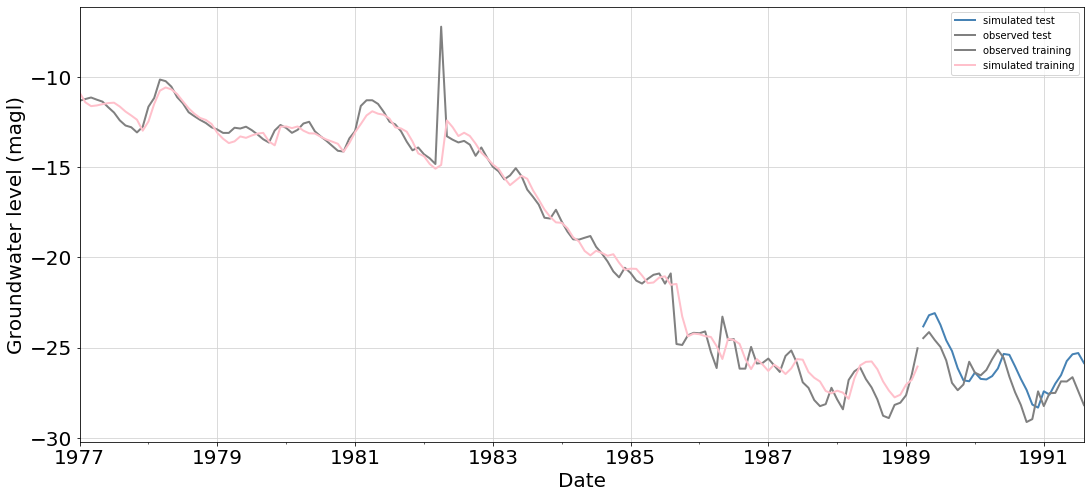

In [63]:
mse_lstm  = summary['mse_lstm'].mean(axis=0)
rmse_lstm = summary['rmse_lstm'].mean(axis=0)
mae_lstm  = summary['mae_lstm'].mean(axis=0)
r2_lstm   = summary['r2_lstm'].mean(axis=0)
stdv_lstm = stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_lstm, 3))
print("Mean squared error is:",round(mse_lstm,3))
print("Root mean squared error is:",round(rmse_lstm, 3))
print("Mean absolute error is:",round(mae_lstm,3))
print(round(stdv_lstm,3))



df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[147:176].index)
df1['observed test']      = pima.iloc[147:176, 0].values

df2 = pd.DataFrame(pima.iloc[0:147, 0].values, columns = ['observed training'],index =pima.iloc[0:147].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [64]:
y_lstm = out_df['simulated test']

### GRU

In [65]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import GRU
from tensorflow.keras.optimizers import Adam

In [66]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_gru', 'rmse_gru', 'r2_gru','mae_gru'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(GRU(20, input_shape=(1, 6)))
    model.add(Dropout(0.1))

    model.add(Dense(1))

    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    X_val_reshaped = X_val_reshaped.reshape(29, 6)

    #running function
    gwl = -0.79231483
    test_forecast = X_test
    steps_ahead = 29
    y_gru = forecast(model, test_forecast, gwl, steps_ahead)
    y_gru = np.array(y_gru)
    
    #metrics for test
    y_gru = y_gru
    test_pred.append(y_gru)
    mse_gru = mean_squared_error(y_test, y_gru)
    rmse_gru = np.sqrt(mse_gru)
    r2_gru = r2_score(y_test, y_gru)
    mae_gru = mean_absolute_error(y_test, y_gru)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_gru,Round), round(rmse_gru,Round), round(r2_gru,Round),round(mae_gru,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(147, 6)
Train on 147 samples, validate on 29 samples
Epoch 1/1000
 96/147 [==================>...........] - ETA: 0s - loss: 1.6188 - mean_squared_error: 1.6188
Epoch 00001: val_loss improved from inf to 1.95758, saving model to model.h5
147/147 [==============================] - 4s 28ms/sample - loss: 1.6087 - mean_squared_error: 1.6087 - val_loss: 1.9576 - val_mean_squared_error: 1.9576
Epoch 2/1000
 96/147 [==================>...........] - ETA: 0s - loss: 1.4764 - mean_squared_error: 1.4764
Epoch 00002: val_loss improved from 1.95758 to 1.88042, saving model to model.h5
147/147 [==============================] - 0s 277us/sample - loss: 1.4702 - mean_squared_error: 1.4702 - val_loss: 1.8804 - val_mean_squared_error: 1.8804
Epoch 3/1000
 96/147 [==================>...........] - ETA: 0s - loss: 1.2850 - mean_squared_error: 1.2850
Epoch 00003: val_loss improved from 1.88042 to 1.81301, saving model to model.h5
147/147 [==============================] - 0s 393us/sample 

Epoch 25/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.5280 - mean_squared_error: 0.5280
Epoch 00025: val_loss improved from 0.97627 to 0.94211, saving model to model.h5
147/147 [==============================] - 0s 217us/sample - loss: 0.5080 - mean_squared_error: 0.5080 - val_loss: 0.9421 - val_mean_squared_error: 0.9421
Epoch 26/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.5407 - mean_squared_error: 0.5407
Epoch 00026: val_loss improved from 0.94211 to 0.91049, saving model to model.h5
147/147 [==============================] - 0s 201us/sample - loss: 0.4771 - mean_squared_error: 0.4771 - val_loss: 0.9105 - val_mean_squared_error: 0.9105
Epoch 27/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.4952 - mean_squared_error: 0.4952
Epoch 00027: val_loss improved from 0.91049 to 0.87642, saving model to model.h5
147/147 [==============================] - 0s 216us/sample - loss: 0.4557 - mean_squared_error: 0.4557 - val_loss: 0.876

Epoch 49/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.1353 - mean_squared_error: 0.1353
Epoch 00049: val_loss improved from 0.24653 to 0.22658, saving model to model.h5
147/147 [==============================] - 0s 228us/sample - loss: 0.1234 - mean_squared_error: 0.1234 - val_loss: 0.2266 - val_mean_squared_error: 0.2266
Epoch 50/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.1427 - mean_squared_error: 0.1427
Epoch 00050: val_loss improved from 0.22658 to 0.20850, saving model to model.h5
147/147 [==============================] - 0s 224us/sample - loss: 0.1215 - mean_squared_error: 0.1215 - val_loss: 0.2085 - val_mean_squared_error: 0.2085
Epoch 51/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.1292 - mean_squared_error: 0.1292
Epoch 00051: val_loss improved from 0.20850 to 0.19240, saving model to model.h5
147/147 [==============================] - 0s 244us/sample - loss: 0.1125 - mean_squared_error: 0.1125 - val_loss: 0.192

Epoch 73/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0682 - mean_squared_error: 0.0682
Epoch 00073: val_loss improved from 0.04446 to 0.04266, saving model to model.h5
147/147 [==============================] - 0s 246us/sample - loss: 0.0602 - mean_squared_error: 0.0602 - val_loss: 0.0427 - val_mean_squared_error: 0.0427
Epoch 74/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0567 - mean_squared_error: 0.0567
Epoch 00074: val_loss improved from 0.04266 to 0.04094, saving model to model.h5
147/147 [==============================] - 0s 221us/sample - loss: 0.0491 - mean_squared_error: 0.0491 - val_loss: 0.0409 - val_mean_squared_error: 0.0409
Epoch 75/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0537 - mean_squared_error: 0.0537
Epoch 00075: val_loss improved from 0.04094 to 0.04038, saving model to model.h5
147/147 [==============================] - 0s 225us/sample - loss: 0.0440 - mean_squared_error: 0.0440 - val_loss: 0.040

 96/147 [==================>...........] - ETA: 0s - loss: 0.0480 - mean_squared_error: 0.0480
Epoch 00097: val_loss improved from 0.02713 to 0.02705, saving model to model.h5
147/147 [==============================] - 0s 251us/sample - loss: 0.0383 - mean_squared_error: 0.0383 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 98/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0282 - mean_squared_error: 0.0282
Epoch 00098: val_loss improved from 0.02705 to 0.02612, saving model to model.h5
147/147 [==============================] - 0s 296us/sample - loss: 0.0385 - mean_squared_error: 0.0385 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 99/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0343 - mean_squared_error: 0.0343
Epoch 00099: val_loss improved from 0.02612 to 0.02563, saving model to model.h5
147/147 [==============================] - 0s 246us/sample - loss: 0.0437 - mean_squared_error: 0.0437 - val_loss: 0.0256 - val_mean_s

 96/147 [==================>...........] - ETA: 0s - loss: 0.0398 - mean_squared_error: 0.0398
Epoch 00121: val_loss improved from 0.02102 to 0.02087, saving model to model.h5
147/147 [==============================] - 0s 366us/sample - loss: 0.0348 - mean_squared_error: 0.0348 - val_loss: 0.0209 - val_mean_squared_error: 0.0209
Epoch 122/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0324 - mean_squared_error: 0.0324
Epoch 00122: val_loss did not improve from 0.02087
147/147 [==============================] - 0s 145us/sample - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.0214 - val_mean_squared_error: 0.0214
Epoch 123/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0196 - mean_squared_error: 0.0196
Epoch 00123: val_loss did not improve from 0.02087
147/147 [==============================] - 0s 150us/sample - loss: 0.0353 - mean_squared_error: 0.0353 - val_loss: 0.0215 - val_mean_squared_error: 0.0215
Epoch 124/1000
 96/147 [=============

Epoch 146/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0204 - mean_squared_error: 0.0204
Epoch 00146: val_loss did not improve from 0.01820
147/147 [==============================] - 0s 173us/sample - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.0184 - val_mean_squared_error: 0.0184
Epoch 147/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0357 - mean_squared_error: 0.0357
Epoch 00147: val_loss did not improve from 0.01820
147/147 [==============================] - 0s 241us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.0185 - val_mean_squared_error: 0.0185
Epoch 148/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0404 - mean_squared_error: 0.0404
Epoch 00148: val_loss did not improve from 0.01820
147/147 [==============================] - 0s 236us/sample - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
Epoch 149/1000
 96/147 [==================>.........

 96/147 [==================>...........] - ETA: 0s - loss: 0.0144 - mean_squared_error: 0.0144
Epoch 00171: val_loss did not improve from 0.01731
147/147 [==============================] - 0s 207us/sample - loss: 0.0261 - mean_squared_error: 0.0261 - val_loss: 0.0176 - val_mean_squared_error: 0.0176
Epoch 172/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0317 - mean_squared_error: 0.0317
Epoch 00172: val_loss did not improve from 0.01731
147/147 [==============================] - 0s 158us/sample - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.0173 - val_mean_squared_error: 0.0173
Epoch 173/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0243 - mean_squared_error: 0.0243
Epoch 00173: val_loss did not improve from 0.01731
147/147 [==============================] - 0s 109us/sample - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.0173 - val_mean_squared_error: 0.0173
Epoch 174/1000
 96/147 [==================>...........] - ETA: 0s -

147/147 [==============================] - 0s 239us/sample - loss: 0.0263 - mean_squared_error: 0.0263 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 197/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0392 - mean_squared_error: 0.0392
Epoch 00197: val_loss did not improve from 0.01665
147/147 [==============================] - 0s 127us/sample - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.0169 - val_mean_squared_error: 0.0169
Epoch 198/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0378 - mean_squared_error: 0.0378
Epoch 00198: val_loss did not improve from 0.01665
147/147 [==============================] - 0s 108us/sample - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 199/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0126 - mean_squared_error: 0.0126
Epoch 00199: val_loss did not improve from 0.01665
147/147 [==============================] - 0s 111us/

Epoch 222/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0199 - mean_squared_error: 0.0199
Epoch 00222: val_loss improved from 0.01598 to 0.01595, saving model to model.h5
147/147 [==============================] - 0s 226us/sample - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 223/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0341 - mean_squared_error: 0.0341
Epoch 00223: val_loss did not improve from 0.01595
147/147 [==============================] - 0s 112us/sample - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 224/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0171 - mean_squared_error: 0.0171
Epoch 00224: val_loss did not improve from 0.01595
147/147 [==============================] - 0s 103us/sample - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 225/1000
 96/147

 96/147 [==================>...........] - ETA: 0s - loss: 0.0151 - mean_squared_error: 0.0151
Epoch 00247: val_loss improved from 0.01536 to 0.01530, saving model to model.h5
147/147 [==============================] - 0s 236us/sample - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 248/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0359 - mean_squared_error: 0.0359
Epoch 00248: val_loss did not improve from 0.01530
147/147 [==============================] - 0s 107us/sample - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 249/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0324 - mean_squared_error: 0.0324
Epoch 00249: val_loss did not improve from 0.01530
147/147 [==============================] - 0s 107us/sample - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 250/1000
 96/147 [=============

Epoch 273/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0315 - mean_squared_error: 0.0315
Epoch 00273: val_loss did not improve from 0.01506
147/147 [==============================] - 0s 127us/sample - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 274/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0301 - mean_squared_error: 0.0301
Epoch 00274: val_loss did not improve from 0.01506
147/147 [==============================] - 0s 176us/sample - loss: 0.0278 - mean_squared_error: 0.0278 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 275/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 00275: val_loss did not improve from 0.01506
147/147 [==============================] - 0s 156us/sample - loss: 0.0248 - mean_squared_error: 0.0248 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 276/1000
 96/147 [==================>.........

Epoch 299/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0360 - mean_squared_error: 0.0360
Epoch 00299: val_loss did not improve from 0.01457
147/147 [==============================] - 0s 122us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 300/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 00300: val_loss did not improve from 0.01457
147/147 [==============================] - 0s 120us/sample - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 301/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 00301: val_loss did not improve from 0.01457
147/147 [==============================] - 0s 121us/sample - loss: 0.0260 - mean_squared_error: 0.0260 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 302/1000
 96/147 [==================>.........

Epoch 325/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0288 - mean_squared_error: 0.0288
Epoch 00325: val_loss did not improve from 0.01446
147/147 [==============================] - 0s 124us/sample - loss: 0.0247 - mean_squared_error: 0.0247 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 326/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0131 - mean_squared_error: 0.0131
Epoch 00326: val_loss did not improve from 0.01446
147/147 [==============================] - 0s 192us/sample - loss: 0.0284 - mean_squared_error: 0.0284 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 327/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0153 - mean_squared_error: 0.0153
Epoch 00327: val_loss did not improve from 0.01446
147/147 [==============================] - 0s 126us/sample - loss: 0.0251 - mean_squared_error: 0.0251 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 328/1000
 96/147 [==================>.........

Epoch 351/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0276 - mean_squared_error: 0.0276
Epoch 00351: val_loss improved from 0.01445 to 0.01444, saving model to model.h5
147/147 [==============================] - 0s 227us/sample - loss: 0.0255 - mean_squared_error: 0.0255 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 352/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0155 - mean_squared_error: 0.0155
Epoch 00352: val_loss did not improve from 0.01444
147/147 [==============================] - 0s 105us/sample - loss: 0.0254 - mean_squared_error: 0.0254 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 353/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0281 - mean_squared_error: 0.0281
Epoch 00353: val_loss improved from 0.01444 to 0.01435, saving model to model.h5
147/147 [==============================] - 0s 241us/sample - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0144 - val_mean_squared_error:

Epoch 377/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0239 - mean_squared_error: 0.0239
Epoch 00377: val_loss did not improve from 0.01424
147/147 [==============================] - 0s 125us/sample - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 378/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0317 - mean_squared_error: 0.0317
Epoch 00378: val_loss did not improve from 0.01424
147/147 [==============================] - 0s 131us/sample - loss: 0.0273 - mean_squared_error: 0.0273 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 379/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0271 - mean_squared_error: 0.0271
Epoch 00379: val_loss did not improve from 0.01424
147/147 [==============================] - 0s 189us/sample - loss: 0.0234 - mean_squared_error: 0.0234 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 380/1000
 96/147 [==================>.........

Epoch 403/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0275 - mean_squared_error: 0.0275
Epoch 00403: val_loss did not improve from 0.01424
147/147 [==============================] - 0s 118us/sample - loss: 0.0258 - mean_squared_error: 0.0258 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 404/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0268 - mean_squared_error: 0.0268
Epoch 00404: val_loss did not improve from 0.01424
147/147 [==============================] - 0s 136us/sample - loss: 0.0254 - mean_squared_error: 0.0254 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 405/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0126 - mean_squared_error: 0.0126
Epoch 00405: val_loss did not improve from 0.01424
147/147 [==============================] - 0s 107us/sample - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 406/1000
 96/147 [==================>.........

Epoch 429/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 00429: val_loss did not improve from 0.01404
147/147 [==============================] - 0s 112us/sample - loss: 0.0258 - mean_squared_error: 0.0258 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 430/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0155 - mean_squared_error: 0.0155
Epoch 00430: val_loss improved from 0.01404 to 0.01392, saving model to model.h5
147/147 [==============================] - 0s 264us/sample - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 431/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0299 - mean_squared_error: 0.0299
Epoch 00431: val_loss did not improve from 0.01392
147/147 [==============================] - 0s 114us/sample - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 432/1000
 96/147

Epoch 455/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0183 - mean_squared_error: 0.0183
Epoch 00455: val_loss did not improve from 0.01383
147/147 [==============================] - 0s 130us/sample - loss: 0.0272 - mean_squared_error: 0.0272 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 456/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0306 - mean_squared_error: 0.0306
Epoch 00456: val_loss did not improve from 0.01383
147/147 [==============================] - 0s 131us/sample - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 457/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0251 - mean_squared_error: 0.0251
Epoch 00457: val_loss did not improve from 0.01383
147/147 [==============================] - 0s 124us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 458/1000
 96/147 [==================>.........

Epoch 481/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0269 - mean_squared_error: 0.0269
Epoch 00481: val_loss did not improve from 0.01383
147/147 [==============================] - 0s 112us/sample - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 482/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0376 - mean_squared_error: 0.0376
Epoch 00482: val_loss did not improve from 0.01383
147/147 [==============================] - 0s 116us/sample - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 483/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0256 - mean_squared_error: 0.0256
Epoch 00483: val_loss did not improve from 0.01383
147/147 [==============================] - 0s 120us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 484/1000
 96/147 [==================>.........

Epoch 507/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0313 - mean_squared_error: 0.0313
Epoch 00507: val_loss did not improve from 0.01356
147/147 [==============================] - 0s 148us/sample - loss: 0.0255 - mean_squared_error: 0.0255 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 508/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0281 - mean_squared_error: 0.0281
Epoch 00508: val_loss did not improve from 0.01356
147/147 [==============================] - 0s 117us/sample - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 509/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0311 - mean_squared_error: 0.0311
Epoch 00509: val_loss did not improve from 0.01356
147/147 [==============================] - 0s 119us/sample - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 510/1000
 96/147 [==================>.........

Epoch 533/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 00533: val_loss did not improve from 0.01356
147/147 [==============================] - 0s 304us/sample - loss: 0.0260 - mean_squared_error: 0.0260 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 534/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0313 - mean_squared_error: 0.0313
Epoch 00534: val_loss improved from 0.01356 to 0.01351, saving model to model.h5
147/147 [==============================] - 0s 250us/sample - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 535/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0300 - mean_squared_error: 0.0300
Epoch 00535: val_loss did not improve from 0.01351
147/147 [==============================] - 0s 102us/sample - loss: 0.0255 - mean_squared_error: 0.0255 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 536/1000
 96/147

Epoch 559/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 00559: val_loss did not improve from 0.01351
147/147 [==============================] - 0s 121us/sample - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 560/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0248 - mean_squared_error: 0.0248
Epoch 00560: val_loss did not improve from 0.01351
147/147 [==============================] - 0s 124us/sample - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 561/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0299 - mean_squared_error: 0.0299
Epoch 00561: val_loss did not improve from 0.01351
147/147 [==============================] - 0s 125us/sample - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 562/1000
 96/147 [==================>.........

Epoch 585/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 00585: val_loss improved from 0.01347 to 0.01346, saving model to model.h5
147/147 [==============================] - 0s 296us/sample - loss: 0.0248 - mean_squared_error: 0.0248 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 586/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0328 - mean_squared_error: 0.0328
Epoch 00586: val_loss did not improve from 0.01346
147/147 [==============================] - 0s 113us/sample - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 587/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0160 - mean_squared_error: 0.0160
Epoch 00587: val_loss did not improve from 0.01346
147/147 [==============================] - 0s 113us/sample - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 588/1000
 96/147

Epoch 611/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 00611: val_loss did not improve from 0.01332
147/147 [==============================] - 0s 116us/sample - loss: 0.0234 - mean_squared_error: 0.0234 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 612/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0195 - mean_squared_error: 0.0195
Epoch 00612: val_loss did not improve from 0.01332
147/147 [==============================] - 0s 123us/sample - loss: 0.0277 - mean_squared_error: 0.0277 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 613/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0171 - mean_squared_error: 0.0171
Epoch 00613: val_loss did not improve from 0.01332
147/147 [==============================] - 0s 213us/sample - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 614/1000
 96/147 [==================>.........

Epoch 637/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0311 - mean_squared_error: 0.0311
Epoch 00637: val_loss did not improve from 0.01332
147/147 [==============================] - 0s 140us/sample - loss: 0.0236 - mean_squared_error: 0.0236 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 638/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 00638: val_loss did not improve from 0.01332
147/147 [==============================] - 0s 121us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 639/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0172 - mean_squared_error: 0.0172
Epoch 00639: val_loss did not improve from 0.01332
147/147 [==============================] - 0s 117us/sample - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 640/1000
 96/147 [==================>.........

Epoch 663/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0219 - mean_squared_error: 0.0219
Epoch 00663: val_loss did not improve from 0.01332
147/147 [==============================] - 0s 115us/sample - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 664/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0282 - mean_squared_error: 0.0282
Epoch 00664: val_loss did not improve from 0.01332
147/147 [==============================] - 0s 114us/sample - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 665/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0187 - mean_squared_error: 0.0187
Epoch 00665: val_loss did not improve from 0.01332
147/147 [==============================] - 0s 111us/sample - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 666/1000
 96/147 [==================>.........

Epoch 689/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 00689: val_loss did not improve from 0.01310
147/147 [==============================] - 0s 131us/sample - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 690/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0294 - mean_squared_error: 0.0294
Epoch 00690: val_loss did not improve from 0.01310
147/147 [==============================] - 0s 121us/sample - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 691/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0294 - mean_squared_error: 0.0294
Epoch 00691: val_loss did not improve from 0.01310
147/147 [==============================] - 0s 121us/sample - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 692/1000
 96/147 [==================>.........

Epoch 715/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0309 - mean_squared_error: 0.0309
Epoch 00715: val_loss did not improve from 0.01302
147/147 [==============================] - 0s 125us/sample - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 716/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 00716: val_loss did not improve from 0.01302
147/147 [==============================] - 0s 118us/sample - loss: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 717/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0249 - mean_squared_error: 0.0249
Epoch 00717: val_loss did not improve from 0.01302
147/147 [==============================] - 0s 108us/sample - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 718/1000
 96/147 [==================>.........

Epoch 741/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0320 - mean_squared_error: 0.0320
Epoch 00741: val_loss did not improve from 0.01302
147/147 [==============================] - 0s 213us/sample - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 742/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 00742: val_loss did not improve from 0.01302
147/147 [==============================] - 0s 121us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 743/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0283 - mean_squared_error: 0.0283
Epoch 00743: val_loss did not improve from 0.01302
147/147 [==============================] - 0s 120us/sample - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 744/1000
 96/147 [==================>.........

Epoch 767/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0295 - mean_squared_error: 0.0295
Epoch 00767: val_loss did not improve from 0.01302
147/147 [==============================] - 0s 150us/sample - loss: 0.0249 - mean_squared_error: 0.0249 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 768/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0178 - mean_squared_error: 0.0178
Epoch 00768: val_loss did not improve from 0.01302
147/147 [==============================] - 0s 127us/sample - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 769/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 00769: val_loss did not improve from 0.01302
147/147 [==============================] - 0s 130us/sample - loss: 0.0258 - mean_squared_error: 0.0258 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 770/1000
 96/147 [==================>.........

Epoch 793/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0152 - mean_squared_error: 0.0152
Epoch 00793: val_loss did not improve from 0.01302
147/147 [==============================] - 0s 137us/sample - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 794/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0275 - mean_squared_error: 0.0275
Epoch 00794: val_loss did not improve from 0.01302
147/147 [==============================] - 0s 154us/sample - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 795/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0171 - mean_squared_error: 0.0171
Epoch 00795: val_loss did not improve from 0.01302
147/147 [==============================] - 0s 144us/sample - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 796/1000
 96/147 [==================>.........

147/147 [==============================] - 0s 241us/sample - loss: 0.2491 - mean_squared_error: 0.2491 - val_loss: 0.5886 - val_mean_squared_error: 0.5886
Epoch 16/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.2202 - mean_squared_error: 0.2202
Epoch 00016: val_loss improved from 0.58856 to 0.56130, saving model to model.h5
147/147 [==============================] - 0s 231us/sample - loss: 0.2296 - mean_squared_error: 0.2296 - val_loss: 0.5613 - val_mean_squared_error: 0.5613
Epoch 17/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.2219 - mean_squared_error: 0.2219
Epoch 00017: val_loss improved from 0.56130 to 0.53518, saving model to model.h5
147/147 [==============================] - 0s 211us/sample - loss: 0.2153 - mean_squared_error: 0.2153 - val_loss: 0.5352 - val_mean_squared_error: 0.5352
Epoch 18/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.1856 - mean_squared_error: 0.1856
Epoch 00018: val_loss improved from 0.53518 to

 96/147 [==================>...........] - ETA: 0s - loss: 0.0657 - mean_squared_error: 0.0657
Epoch 00039: val_loss improved from 0.14114 to 0.13182, saving model to model.h5
147/147 [==============================] - 0s 331us/sample - loss: 0.0573 - mean_squared_error: 0.0573 - val_loss: 0.1318 - val_mean_squared_error: 0.1318
Epoch 40/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0530 - mean_squared_error: 0.0530
Epoch 00040: val_loss improved from 0.13182 to 0.12439, saving model to model.h5
147/147 [==============================] - 0s 238us/sample - loss: 0.0603 - mean_squared_error: 0.0603 - val_loss: 0.1244 - val_mean_squared_error: 0.1244
Epoch 41/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0344 - mean_squared_error: 0.0344
Epoch 00041: val_loss improved from 0.12439 to 0.11854, saving model to model.h5
147/147 [==============================] - 0s 231us/sample - loss: 0.0458 - mean_squared_error: 0.0458 - val_loss: 0.1185 - val_mean_s

 96/147 [==================>...........] - ETA: 0s - loss: 0.0380 - mean_squared_error: 0.0380
Epoch 00063: val_loss did not improve from 0.05919
147/147 [==============================] - 0s 122us/sample - loss: 0.0350 - mean_squared_error: 0.0350 - val_loss: 0.0647 - val_mean_squared_error: 0.0647
Epoch 64/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0516 - mean_squared_error: 0.0516
Epoch 00064: val_loss improved from 0.05919 to 0.05782, saving model to model.h5
147/147 [==============================] - 0s 244us/sample - loss: 0.0503 - mean_squared_error: 0.0503 - val_loss: 0.0578 - val_mean_squared_error: 0.0578
Epoch 65/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0530 - mean_squared_error: 0.0530
Epoch 00065: val_loss improved from 0.05782 to 0.05599, saving model to model.h5
147/147 [==============================] - 0s 305us/sample - loss: 0.0466 - mean_squared_error: 0.0466 - val_loss: 0.0560 - val_mean_squared_error: 0.0560
Epoch 66/

 96/147 [==================>...........] - ETA: 0s - loss: 0.0396 - mean_squared_error: 0.0396
Epoch 00088: val_loss did not improve from 0.03822
147/147 [==============================] - 0s 115us/sample - loss: 0.0355 - mean_squared_error: 0.0355 - val_loss: 0.0404 - val_mean_squared_error: 0.0404
Epoch 89/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0381 - mean_squared_error: 0.0381
Epoch 00089: val_loss did not improve from 0.03822
147/147 [==============================] - 0s 121us/sample - loss: 0.0342 - mean_squared_error: 0.0342 - val_loss: 0.0419 - val_mean_squared_error: 0.0419
Epoch 90/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0301 - mean_squared_error: 0.0301
Epoch 00090: val_loss did not improve from 0.03822
147/147 [==============================] - 0s 115us/sample - loss: 0.0373 - mean_squared_error: 0.0373 - val_loss: 0.0411 - val_mean_squared_error: 0.0411
Epoch 91/1000
 96/147 [==================>...........] - ETA: 0s - lo

Epoch 114/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0266 - mean_squared_error: 0.0266
Epoch 00114: val_loss did not improve from 0.03319
147/147 [==============================] - 0s 119us/sample - loss: 0.0388 - mean_squared_error: 0.0388 - val_loss: 0.0375 - val_mean_squared_error: 0.0375
Epoch 115/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0311 - mean_squared_error: 0.0311
Epoch 00115: val_loss improved from 0.03319 to 0.03102, saving model to model.h5
147/147 [==============================] - 0s 252us/sample - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 0.0310 - val_mean_squared_error: 0.0310
Epoch 116/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0206 - mean_squared_error: 0.0206
Epoch 00116: val_loss did not improve from 0.03102
147/147 [==============================] - 0s 119us/sample - loss: 0.0288 - mean_squared_error: 0.0288 - val_loss: 0.0314 - val_mean_squared_error: 0.0314
Epoch 117/1000
 96/147

 96/147 [==================>...........] - ETA: 0s - loss: 0.0368 - mean_squared_error: 0.0368
Epoch 00139: val_loss did not improve from 0.02532
147/147 [==============================] - 0s 114us/sample - loss: 0.0337 - mean_squared_error: 0.0337 - val_loss: 0.0302 - val_mean_squared_error: 0.0302
Epoch 140/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0335 - mean_squared_error: 0.0335
Epoch 00140: val_loss did not improve from 0.02532
147/147 [==============================] - 0s 122us/sample - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 0.0296 - val_mean_squared_error: 0.0296
Epoch 141/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0220 - mean_squared_error: 0.0220
Epoch 00141: val_loss did not improve from 0.02532
147/147 [==============================] - 0s 122us/sample - loss: 0.0291 - mean_squared_error: 0.0291 - val_loss: 0.0285 - val_mean_squared_error: 0.0285
Epoch 142/1000
 96/147 [==================>...........] - ETA: 0s -

Epoch 165/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0324 - mean_squared_error: 0.0324
Epoch 00165: val_loss did not improve from 0.02435
147/147 [==============================] - 0s 119us/sample - loss: 0.0286 - mean_squared_error: 0.0286 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 166/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0351 - mean_squared_error: 0.0351
Epoch 00166: val_loss did not improve from 0.02435
147/147 [==============================] - 0s 123us/sample - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.0309 - val_mean_squared_error: 0.0309
Epoch 167/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0204 - mean_squared_error: 0.0204
Epoch 00167: val_loss did not improve from 0.02435
147/147 [==============================] - 0s 109us/sample - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 168/1000
 96/147 [==================>.........

Epoch 191/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0359 - mean_squared_error: 0.0359
Epoch 00191: val_loss did not improve from 0.02211
147/147 [==============================] - 0s 119us/sample - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 192/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0354 - mean_squared_error: 0.0354
Epoch 00192: val_loss did not improve from 0.02211
147/147 [==============================] - 0s 128us/sample - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 193/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0301 - mean_squared_error: 0.0301
Epoch 00193: val_loss did not improve from 0.02211
147/147 [==============================] - 0s 155us/sample - loss: 0.0264 - mean_squared_error: 0.0264 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 194/1000
 96/147 [==================>.........

Epoch 217/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 00217: val_loss improved from 0.02183 to 0.02158, saving model to model.h5
147/147 [==============================] - 0s 245us/sample - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch 218/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 00218: val_loss did not improve from 0.02158
147/147 [==============================] - 0s 130us/sample - loss: 0.0270 - mean_squared_error: 0.0270 - val_loss: 0.0227 - val_mean_squared_error: 0.0227
Epoch 219/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0355 - mean_squared_error: 0.0355
Epoch 00219: val_loss did not improve from 0.02158
147/147 [==============================] - 0s 119us/sample - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 220/1000
 96/147

Epoch 243/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0180 - mean_squared_error: 0.0180
Epoch 00243: val_loss did not improve from 0.02092
147/147 [==============================] - 0s 183us/sample - loss: 0.0243 - mean_squared_error: 0.0243 - val_loss: 0.0255 - val_mean_squared_error: 0.0255
Epoch 244/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0319 - mean_squared_error: 0.0319
Epoch 00244: val_loss did not improve from 0.02092
147/147 [==============================] - 0s 244us/sample - loss: 0.0278 - mean_squared_error: 0.0278 - val_loss: 0.0229 - val_mean_squared_error: 0.0229
Epoch 245/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0339 - mean_squared_error: 0.0339
Epoch 00245: val_loss did not improve from 0.02092
147/147 [==============================] - 0s 152us/sample - loss: 0.0277 - mean_squared_error: 0.0277 - val_loss: 0.0226 - val_mean_squared_error: 0.0226
Epoch 246/1000
 96/147 [==================>.........

Epoch 269/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0190 - mean_squared_error: 0.0190
Epoch 00269: val_loss did not improve from 0.02036
147/147 [==============================] - 0s 110us/sample - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.0204 - val_mean_squared_error: 0.0204
Epoch 270/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0264 - mean_squared_error: 0.0264
Epoch 00270: val_loss did not improve from 0.02036
147/147 [==============================] - 0s 116us/sample - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0229 - val_mean_squared_error: 0.0229
Epoch 271/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0274 - mean_squared_error: 0.0274
Epoch 00271: val_loss did not improve from 0.02036
147/147 [==============================] - 0s 205us/sample - loss: 0.0263 - mean_squared_error: 0.0263 - val_loss: 0.0228 - val_mean_squared_error: 0.0228
Epoch 272/1000
 96/147 [==================>.........

Epoch 295/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0309 - mean_squared_error: 0.0309
Epoch 00295: val_loss improved from 0.02014 to 0.01952, saving model to model.h5
147/147 [==============================] - 0s 256us/sample - loss: 0.0272 - mean_squared_error: 0.0272 - val_loss: 0.0195 - val_mean_squared_error: 0.0195
Epoch 296/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0395 - mean_squared_error: 0.0395
Epoch 00296: val_loss did not improve from 0.01952
147/147 [==============================] - 0s 117us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.0204 - val_mean_squared_error: 0.0204
Epoch 297/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0265 - mean_squared_error: 0.0265
Epoch 00297: val_loss did not improve from 0.01952
147/147 [==============================] - 0s 114us/sample - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.0199 - val_mean_squared_error: 0.0199
Epoch 298/1000
 96/147

Epoch 321/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0316 - mean_squared_error: 0.0316
Epoch 00321: val_loss did not improve from 0.01952
147/147 [==============================] - 0s 133us/sample - loss: 0.0277 - mean_squared_error: 0.0277 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 322/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0175 - mean_squared_error: 0.0175
Epoch 00322: val_loss did not improve from 0.01952
147/147 [==============================] - 0s 134us/sample - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.0205 - val_mean_squared_error: 0.0205
Epoch 323/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0357 - mean_squared_error: 0.0357
Epoch 00323: val_loss did not improve from 0.01952
147/147 [==============================] - 0s 111us/sample - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.0224 - val_mean_squared_error: 0.0224
Epoch 324/1000
 96/147 [==================>.........

Epoch 347/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0181 - mean_squared_error: 0.0181
Epoch 00347: val_loss did not improve from 0.01934
147/147 [==============================] - 0s 198us/sample - loss: 0.0251 - mean_squared_error: 0.0251 - val_loss: 0.0203 - val_mean_squared_error: 0.0203
Epoch 348/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0264 - mean_squared_error: 0.0264
Epoch 00348: val_loss did not improve from 0.01934
147/147 [==============================] - 0s 143us/sample - loss: 0.0249 - mean_squared_error: 0.0249 - val_loss: 0.0230 - val_mean_squared_error: 0.0230
Epoch 349/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 00349: val_loss did not improve from 0.01934
147/147 [==============================] - 0s 128us/sample - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.0208 - val_mean_squared_error: 0.0208
Epoch 350/1000
 96/147 [==================>.........

Epoch 373/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0268 - mean_squared_error: 0.0268
Epoch 00373: val_loss did not improve from 0.01904
147/147 [==============================] - 0s 122us/sample - loss: 0.0249 - mean_squared_error: 0.0249 - val_loss: 0.0248 - val_mean_squared_error: 0.0248
Epoch 374/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0315 - mean_squared_error: 0.0315
Epoch 00374: val_loss did not improve from 0.01904
147/147 [==============================] - 0s 128us/sample - loss: 0.0258 - mean_squared_error: 0.0258 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 375/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0334 - mean_squared_error: 0.0334
Epoch 00375: val_loss did not improve from 0.01904
147/147 [==============================] - 0s 99us/sample - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.0217 - val_mean_squared_error: 0.0217
Epoch 376/1000
 96/147 [==================>..........

Epoch 399/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 00399: val_loss did not improve from 0.01896
147/147 [==============================] - 0s 146us/sample - loss: 0.0275 - mean_squared_error: 0.0275 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 400/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0325 - mean_squared_error: 0.0325
Epoch 00400: val_loss did not improve from 0.01896
147/147 [==============================] - 0s 215us/sample - loss: 0.0263 - mean_squared_error: 0.0263 - val_loss: 0.0208 - val_mean_squared_error: 0.0208
Epoch 401/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 00401: val_loss improved from 0.01896 to 0.01864, saving model to model.h5
147/147 [==============================] - 0s 266us/sample - loss: 0.0249 - mean_squared_error: 0.0249 - val_loss: 0.0186 - val_mean_squared_error: 0.0186
Epoch 402/1000
 96/147

Epoch 425/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0311 - mean_squared_error: 0.0311
Epoch 00425: val_loss did not improve from 0.01814
147/147 [==============================] - 0s 125us/sample - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.0209 - val_mean_squared_error: 0.0209
Epoch 426/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0201 - mean_squared_error: 0.0201
Epoch 00426: val_loss did not improve from 0.01814
147/147 [==============================] - 0s 159us/sample - loss: 0.0247 - mean_squared_error: 0.0247 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 427/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 00427: val_loss did not improve from 0.01814
147/147 [==============================] - 0s 337us/sample - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.0189 - val_mean_squared_error: 0.0189
Epoch 428/1000
 96/147 [==================>.........

Epoch 451/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0325 - mean_squared_error: 0.0325
Epoch 00451: val_loss improved from 0.01786 to 0.01776, saving model to model.h5
147/147 [==============================] - 0s 300us/sample - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.0178 - val_mean_squared_error: 0.0178
Epoch 452/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0152 - mean_squared_error: 0.0152
Epoch 00452: val_loss did not improve from 0.01776
147/147 [==============================] - 0s 159us/sample - loss: 0.0247 - mean_squared_error: 0.0247 - val_loss: 0.0191 - val_mean_squared_error: 0.0191
Epoch 453/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0179 - mean_squared_error: 0.0179
Epoch 00453: val_loss did not improve from 0.01776
147/147 [==============================] - 0s 154us/sample - loss: 0.0284 - mean_squared_error: 0.0284 - val_loss: 0.0187 - val_mean_squared_error: 0.0187
Epoch 454/1000
 96/147

Epoch 477/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 00477: val_loss did not improve from 0.01748
147/147 [==============================] - 0s 110us/sample - loss: 0.0215 - mean_squared_error: 0.0215 - val_loss: 0.0198 - val_mean_squared_error: 0.0198
Epoch 478/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0327 - mean_squared_error: 0.0327
Epoch 00478: val_loss did not improve from 0.01748
147/147 [==============================] - 0s 121us/sample - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.0205 - val_mean_squared_error: 0.0205
Epoch 479/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0143 - mean_squared_error: 0.0143
Epoch 00479: val_loss did not improve from 0.01748
147/147 [==============================] - 0s 123us/sample - loss: 0.0251 - mean_squared_error: 0.0251 - val_loss: 0.0219 - val_mean_squared_error: 0.0219
Epoch 480/1000
 96/147 [==================>.........

Epoch 503/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0313 - mean_squared_error: 0.0313
Epoch 00503: val_loss did not improve from 0.01748
147/147 [==============================] - 0s 133us/sample - loss: 0.0260 - mean_squared_error: 0.0260 - val_loss: 0.0201 - val_mean_squared_error: 0.0201
Epoch 504/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0314 - mean_squared_error: 0.0314
Epoch 00504: val_loss did not improve from 0.01748
147/147 [==============================] - 0s 124us/sample - loss: 0.0264 - mean_squared_error: 0.0264 - val_loss: 0.0210 - val_mean_squared_error: 0.0210
Epoch 505/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0300 - mean_squared_error: 0.0300
Epoch 00505: val_loss did not improve from 0.01748
147/147 [==============================] - 0s 135us/sample - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0214 - val_mean_squared_error: 0.0214
Epoch 506/1000
 96/147 [==================>.........

Epoch 529/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0280 - mean_squared_error: 0.0280
Epoch 00529: val_loss did not improve from 0.01748
147/147 [==============================] - 0s 132us/sample - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0179 - val_mean_squared_error: 0.0179
Epoch 530/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0200 - mean_squared_error: 0.0200
Epoch 00530: val_loss did not improve from 0.01748
147/147 [==============================] - 0s 112us/sample - loss: 0.0256 - mean_squared_error: 0.0256 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 531/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 00531: val_loss did not improve from 0.01748
147/147 [==============================] - 0s 131us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.0185 - val_mean_squared_error: 0.0185
Epoch 532/1000
 96/147 [==================>.........

Epoch 555/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 00555: val_loss did not improve from 0.01693
147/147 [==============================] - 0s 127us/sample - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
Epoch 556/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0311 - mean_squared_error: 0.0311
Epoch 00556: val_loss did not improve from 0.01693
147/147 [==============================] - 0s 121us/sample - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.0179 - val_mean_squared_error: 0.0179
Epoch 557/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0328 - mean_squared_error: 0.0328
Epoch 00557: val_loss did not improve from 0.01693
147/147 [==============================] - 0s 106us/sample - loss: 0.0258 - mean_squared_error: 0.0258 - val_loss: 0.0199 - val_mean_squared_error: 0.0199
Epoch 558/1000
 96/147 [==================>.........

Epoch 581/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 00581: val_loss did not improve from 0.01693
147/147 [==============================] - 0s 119us/sample - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0189 - val_mean_squared_error: 0.0189
Epoch 582/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 00582: val_loss did not improve from 0.01693
147/147 [==============================] - 0s 113us/sample - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0210 - val_mean_squared_error: 0.0210
Epoch 583/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 00583: val_loss did not improve from 0.01693
147/147 [==============================] - 0s 124us/sample - loss: 0.0254 - mean_squared_error: 0.0254 - val_loss: 0.0208 - val_mean_squared_error: 0.0208
Epoch 584/1000
 96/147 [==================>.........

Epoch 607/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0281 - mean_squared_error: 0.0281
Epoch 00607: val_loss did not improve from 0.01693
147/147 [==============================] - 0s 114us/sample - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0186 - val_mean_squared_error: 0.0186
Epoch 608/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0270 - mean_squared_error: 0.0270
Epoch 00608: val_loss did not improve from 0.01693
147/147 [==============================] - 0s 125us/sample - loss: 0.0267 - mean_squared_error: 0.0267 - val_loss: 0.0204 - val_mean_squared_error: 0.0204
Epoch 609/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0265 - mean_squared_error: 0.0265
Epoch 00609: val_loss did not improve from 0.01693
147/147 [==============================] - 0s 121us/sample - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0193 - val_mean_squared_error: 0.0193
Epoch 610/1000
 96/147 [==================>.........

Epoch 633/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0247 - mean_squared_error: 0.0247
Epoch 00633: val_loss did not improve from 0.01693
147/147 [==============================] - 0s 181us/sample - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0193 - val_mean_squared_error: 0.0193
Epoch 634/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 00634: val_loss did not improve from 0.01693
147/147 [==============================] - 0s 113us/sample - loss: 0.0234 - mean_squared_error: 0.0234 - val_loss: 0.0185 - val_mean_squared_error: 0.0185
Epoch 635/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 00635: val_loss did not improve from 0.01693
147/147 [==============================] - 0s 139us/sample - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch 636/1000
 96/147 [==================>.........

147/147 [==============================] - 0s 219us/sample - loss: 0.6878 - mean_squared_error: 0.6878 - val_loss: 0.9952 - val_mean_squared_error: 0.9952
Epoch 15/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.6563 - mean_squared_error: 0.6563
Epoch 00015: val_loss improved from 0.99519 to 0.95690, saving model to model.h5
147/147 [==============================] - 0s 220us/sample - loss: 0.6611 - mean_squared_error: 0.6611 - val_loss: 0.9569 - val_mean_squared_error: 0.9569
Epoch 16/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.6178 - mean_squared_error: 0.6178
Epoch 00016: val_loss improved from 0.95690 to 0.91809, saving model to model.h5
147/147 [==============================] - 0s 242us/sample - loss: 0.6209 - mean_squared_error: 0.6209 - val_loss: 0.9181 - val_mean_squared_error: 0.9181
Epoch 17/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.5927 - mean_squared_error: 0.5927
Epoch 00017: val_loss improved from 0.91809 to

 96/147 [==================>...........] - ETA: 0s - loss: 0.1123 - mean_squared_error: 0.1123
Epoch 00038: val_loss improved from 0.27808 to 0.25407, saving model to model.h5
147/147 [==============================] - 0s 209us/sample - loss: 0.1270 - mean_squared_error: 0.1270 - val_loss: 0.2541 - val_mean_squared_error: 0.2541
Epoch 39/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.1259 - mean_squared_error: 0.1259
Epoch 00039: val_loss improved from 0.25407 to 0.23319, saving model to model.h5
147/147 [==============================] - 0s 243us/sample - loss: 0.1161 - mean_squared_error: 0.1161 - val_loss: 0.2332 - val_mean_squared_error: 0.2332
Epoch 40/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.1061 - mean_squared_error: 0.1061
Epoch 00040: val_loss improved from 0.23319 to 0.21174, saving model to model.h5
147/147 [==============================] - 0s 239us/sample - loss: 0.1109 - mean_squared_error: 0.1109 - val_loss: 0.2117 - val_mean_s

Epoch 62/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0540 - mean_squared_error: 0.0540
Epoch 00062: val_loss improved from 0.04270 to 0.04217, saving model to model.h5
147/147 [==============================] - 0s 248us/sample - loss: 0.0492 - mean_squared_error: 0.0492 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 63/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 00063: val_loss did not improve from 0.04217
147/147 [==============================] - 0s 119us/sample - loss: 0.0467 - mean_squared_error: 0.0467 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 64/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0592 - mean_squared_error: 0.0592
Epoch 00064: val_loss improved from 0.04217 to 0.03827, saving model to model.h5
147/147 [==============================] - 0s 246us/sample - loss: 0.0491 - mean_squared_error: 0.0491 - val_loss: 0.0383 - val_mean_squared_error: 0.

Epoch 87/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0372 - mean_squared_error: 0.0372
Epoch 00087: val_loss did not improve from 0.02406
147/147 [==============================] - 0s 176us/sample - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 88/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0399 - mean_squared_error: 0.0399
Epoch 00088: val_loss did not improve from 0.02406
147/147 [==============================] - 0s 123us/sample - loss: 0.0413 - mean_squared_error: 0.0413 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 89/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0423 - mean_squared_error: 0.0423
Epoch 00089: val_loss improved from 0.02406 to 0.02386, saving model to model.h5
147/147 [==============================] - 0s 251us/sample - loss: 0.0406 - mean_squared_error: 0.0406 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 90/1000
 96/147 [==

Epoch 112/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0353 - mean_squared_error: 0.0353
Epoch 00112: val_loss did not improve from 0.01973
147/147 [==============================] - 0s 132us/sample - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.0200 - val_mean_squared_error: 0.0200
Epoch 113/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0381 - mean_squared_error: 0.0381
Epoch 00113: val_loss did not improve from 0.01973
147/147 [==============================] - 0s 117us/sample - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.0200 - val_mean_squared_error: 0.0200
Epoch 114/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0316 - mean_squared_error: 0.0316
Epoch 00114: val_loss improved from 0.01973 to 0.01969, saving model to model.h5
147/147 [==============================] - 0s 239us/sample - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.0197 - val_mean_squared_error: 0.0197
Epoch 115/1000
 96/147

Epoch 138/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0370 - mean_squared_error: 0.0370
Epoch 00138: val_loss did not improve from 0.01868
147/147 [==============================] - 0s 127us/sample - loss: 0.0319 - mean_squared_error: 0.0319 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 139/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0205 - mean_squared_error: 0.0205
Epoch 00139: val_loss did not improve from 0.01868
147/147 [==============================] - 0s 144us/sample - loss: 0.0291 - mean_squared_error: 0.0291 - val_loss: 0.0193 - val_mean_squared_error: 0.0193
Epoch 140/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0348 - mean_squared_error: 0.0348
Epoch 00140: val_loss did not improve from 0.01868
147/147 [==============================] - 0s 119us/sample - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.0197 - val_mean_squared_error: 0.0197
Epoch 141/1000
 96/147 [==================>.........

Epoch 164/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0316 - mean_squared_error: 0.0316
Epoch 00164: val_loss did not improve from 0.01808
147/147 [==============================] - 0s 127us/sample - loss: 0.0286 - mean_squared_error: 0.0286 - val_loss: 0.0201 - val_mean_squared_error: 0.0201
Epoch 165/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0172 - mean_squared_error: 0.0172
Epoch 00165: val_loss did not improve from 0.01808
147/147 [==============================] - 0s 114us/sample - loss: 0.0286 - mean_squared_error: 0.0286 - val_loss: 0.0182 - val_mean_squared_error: 0.0182
Epoch 166/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0216 - mean_squared_error: 0.0216
Epoch 00166: val_loss did not improve from 0.01808
147/147 [==============================] - 0s 132us/sample - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 0.0191 - val_mean_squared_error: 0.0191
Epoch 167/1000
 96/147 [==================>.........

 96/147 [==================>...........] - ETA: 0s - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 00189: val_loss did not improve from 0.01760
147/147 [==============================] - 0s 119us/sample - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.0177 - val_mean_squared_error: 0.0177
Epoch 190/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0314 - mean_squared_error: 0.0314
Epoch 00190: val_loss did not improve from 0.01760
147/147 [==============================] - 0s 131us/sample - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 0.0181 - val_mean_squared_error: 0.0181
Epoch 191/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 00191: val_loss did not improve from 0.01760
147/147 [==============================] - 0s 122us/sample - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 0.0177 - val_mean_squared_error: 0.0177
Epoch 192/1000
 96/147 [==================>...........] - ETA: 0s -

Epoch 215/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0350 - mean_squared_error: 0.0350
Epoch 00215: val_loss improved from 0.01745 to 0.01739, saving model to model.h5
147/147 [==============================] - 0s 333us/sample - loss: 0.0272 - mean_squared_error: 0.0272 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 216/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0196 - mean_squared_error: 0.0196
Epoch 00216: val_loss improved from 0.01739 to 0.01722, saving model to model.h5
147/147 [==============================] - 0s 298us/sample - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 217/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0353 - mean_squared_error: 0.0353
Epoch 00217: val_loss did not improve from 0.01722
147/147 [==============================] - 0s 107us/sample - loss: 0.0291 - mean_squared_error: 0.0291 - val_loss: 0.0176 - val_mean_squared_error:

Epoch 241/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 00241: val_loss did not improve from 0.01704
147/147 [==============================] - 0s 127us/sample - loss: 0.0273 - mean_squared_error: 0.0273 - val_loss: 0.0179 - val_mean_squared_error: 0.0179
Epoch 242/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0288 - mean_squared_error: 0.0288
Epoch 00242: val_loss did not improve from 0.01704
147/147 [==============================] - 0s 120us/sample - loss: 0.0288 - mean_squared_error: 0.0288 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 243/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 00243: val_loss did not improve from 0.01704
147/147 [==============================] - 0s 121us/sample - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 244/1000
 96/147 [==================>.........

Epoch 267/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0223 - mean_squared_error: 0.0223
Epoch 00267: val_loss did not improve from 0.01681
147/147 [==============================] - 0s 124us/sample - loss: 0.0277 - mean_squared_error: 0.0277 - val_loss: 0.0169 - val_mean_squared_error: 0.0169
Epoch 268/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0173 - mean_squared_error: 0.0173
Epoch 00268: val_loss did not improve from 0.01681
147/147 [==============================] - 0s 120us/sample - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 269/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0292 - mean_squared_error: 0.0292
Epoch 00269: val_loss improved from 0.01681 to 0.01661, saving model to model.h5
147/147 [==============================] - 0s 246us/sample - loss: 0.0247 - mean_squared_error: 0.0247 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 270/1000
 96/147

147/147 [==============================] - 0s 298us/sample - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0165 - val_mean_squared_error: 0.0165
Epoch 293/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0326 - mean_squared_error: 0.0326
Epoch 00293: val_loss did not improve from 0.01650
147/147 [==============================] - 0s 127us/sample - loss: 0.0261 - mean_squared_error: 0.0261 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 294/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0195 - mean_squared_error: 0.0195
Epoch 00294: val_loss improved from 0.01650 to 0.01643, saving model to model.h5
147/147 [==============================] - 0s 239us/sample - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 295/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0181 - mean_squared_error: 0.0181
Epoch 00295: val_loss improved from 0.01643 to 0.01641, saving model to m

Epoch 318/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0271 - mean_squared_error: 0.0271
Epoch 00318: val_loss did not improve from 0.01612
147/147 [==============================] - 0s 118us/sample - loss: 0.0249 - mean_squared_error: 0.0249 - val_loss: 0.0167 - val_mean_squared_error: 0.0167
Epoch 319/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0175 - mean_squared_error: 0.0175
Epoch 00319: val_loss did not improve from 0.01612
147/147 [==============================] - 0s 128us/sample - loss: 0.0258 - mean_squared_error: 0.0258 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 320/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0144 - mean_squared_error: 0.0144
Epoch 00320: val_loss did not improve from 0.01612
147/147 [==============================] - 0s 118us/sample - loss: 0.0284 - mean_squared_error: 0.0284 - val_loss: 0.0169 - val_mean_squared_error: 0.0169
Epoch 321/1000
 96/147 [==================>.........

Epoch 344/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0296 - mean_squared_error: 0.0296
Epoch 00344: val_loss improved from 0.01597 to 0.01582, saving model to model.h5
147/147 [==============================] - 0s 276us/sample - loss: 0.0263 - mean_squared_error: 0.0263 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 345/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0304 - mean_squared_error: 0.0304
Epoch 00345: val_loss did not improve from 0.01582
147/147 [==============================] - 0s 209us/sample - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 346/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0314 - mean_squared_error: 0.0314
Epoch 00346: val_loss did not improve from 0.01582
147/147 [==============================] - 0s 131us/sample - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 347/1000
 96/147

Epoch 370/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0340 - mean_squared_error: 0.0340
Epoch 00370: val_loss did not improve from 0.01578
147/147 [==============================] - 0s 149us/sample - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 371/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0194 - mean_squared_error: 0.0194
Epoch 00371: val_loss improved from 0.01578 to 0.01560, saving model to model.h5
147/147 [==============================] - 0s 227us/sample - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 372/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 00372: val_loss did not improve from 0.01560
147/147 [==============================] - 0s 122us/sample - loss: 0.0264 - mean_squared_error: 0.0264 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 373/1000
 96/147

Epoch 396/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0299 - mean_squared_error: 0.0299
Epoch 00396: val_loss did not improve from 0.01542
147/147 [==============================] - 0s 125us/sample - loss: 0.0254 - mean_squared_error: 0.0254 - val_loss: 0.0170 - val_mean_squared_error: 0.0170
Epoch 397/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 00397: val_loss improved from 0.01542 to 0.01540, saving model to model.h5
147/147 [==============================] - 0s 249us/sample - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 398/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 00398: val_loss did not improve from 0.01540
147/147 [==============================] - 0s 109us/sample - loss: 0.0256 - mean_squared_error: 0.0256 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 399/1000
 96/147

Epoch 422/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0300 - mean_squared_error: 0.0300
Epoch 00422: val_loss did not improve from 0.01535
147/147 [==============================] - 0s 221us/sample - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 423/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0305 - mean_squared_error: 0.0305
Epoch 00423: val_loss did not improve from 0.01535
147/147 [==============================] - 0s 238us/sample - loss: 0.0255 - mean_squared_error: 0.0255 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 424/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0155 - mean_squared_error: 0.0155
Epoch 00424: val_loss did not improve from 0.01535
147/147 [==============================] - 0s 115us/sample - loss: 0.0276 - mean_squared_error: 0.0276 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 425/1000
 96/147 [==================>.........

Epoch 448/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0300 - mean_squared_error: 0.0300
Epoch 00448: val_loss did not improve from 0.01521
147/147 [==============================] - 0s 121us/sample - loss: 0.0263 - mean_squared_error: 0.0263 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 449/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0369 - mean_squared_error: 0.0369
Epoch 00449: val_loss did not improve from 0.01521
147/147 [==============================] - 0s 115us/sample - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 450/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0287 - mean_squared_error: 0.0287
Epoch 00450: val_loss did not improve from 0.01521
147/147 [==============================] - 0s 122us/sample - loss: 0.0268 - mean_squared_error: 0.0268 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 451/1000
 96/147 [==================>.........

Epoch 474/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 00474: val_loss did not improve from 0.01501
147/147 [==============================] - 0s 207us/sample - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 475/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 00475: val_loss did not improve from 0.01501
147/147 [==============================] - 0s 132us/sample - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 476/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 00476: val_loss did not improve from 0.01501
147/147 [==============================] - 0s 113us/sample - loss: 0.0286 - mean_squared_error: 0.0286 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 477/1000
 96/147 [==================>.........

Epoch 500/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0272 - mean_squared_error: 0.0272
Epoch 00500: val_loss did not improve from 0.01483
147/147 [==============================] - 0s 114us/sample - loss: 0.0231 - mean_squared_error: 0.0231 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 501/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0259 - mean_squared_error: 0.0259
Epoch 00501: val_loss did not improve from 0.01483
147/147 [==============================] - 0s 123us/sample - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 502/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 00502: val_loss did not improve from 0.01483
147/147 [==============================] - 0s 123us/sample - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 503/1000
 96/147 [==================>.........

Epoch 526/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0296 - mean_squared_error: 0.0296
Epoch 00526: val_loss did not improve from 0.01478
147/147 [==============================] - 0s 121us/sample - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 527/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 00527: val_loss did not improve from 0.01478
147/147 [==============================] - 0s 120us/sample - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 528/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 00528: val_loss improved from 0.01478 to 0.01478, saving model to model.h5
147/147 [==============================] - 0s 238us/sample - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 529/1000
 96/147

Epoch 552/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0256 - mean_squared_error: 0.0256
Epoch 00552: val_loss did not improve from 0.01448
147/147 [==============================] - 0s 140us/sample - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 553/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0267 - mean_squared_error: 0.0267
Epoch 00553: val_loss did not improve from 0.01448
147/147 [==============================] - 0s 123us/sample - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 554/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0276 - mean_squared_error: 0.0276
Epoch 00554: val_loss did not improve from 0.01448
147/147 [==============================] - 0s 116us/sample - loss: 0.0264 - mean_squared_error: 0.0264 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 555/1000
 96/147 [==================>.........

Epoch 578/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0334 - mean_squared_error: 0.0334
Epoch 00578: val_loss did not improve from 0.01435
147/147 [==============================] - 0s 130us/sample - loss: 0.0279 - mean_squared_error: 0.0279 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 579/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0270 - mean_squared_error: 0.0270
Epoch 00579: val_loss did not improve from 0.01435
147/147 [==============================] - 0s 260us/sample - loss: 0.0256 - mean_squared_error: 0.0256 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 580/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0284 - mean_squared_error: 0.0284
Epoch 00580: val_loss did not improve from 0.01435
147/147 [==============================] - 0s 167us/sample - loss: 0.0227 - mean_squared_error: 0.0227 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 581/1000
 96/147 [==================>.........

Epoch 604/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0119 - mean_squared_error: 0.0119
Epoch 00604: val_loss did not improve from 0.01418
147/147 [==============================] - 0s 115us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 605/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0164 - mean_squared_error: 0.0164
Epoch 00605: val_loss did not improve from 0.01418
147/147 [==============================] - 0s 116us/sample - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 606/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0306 - mean_squared_error: 0.0306
Epoch 00606: val_loss did not improve from 0.01418
147/147 [==============================] - 0s 124us/sample - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 607/1000
 96/147 [==================>.........

Epoch 630/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0308 - mean_squared_error: 0.0308
Epoch 00630: val_loss did not improve from 0.01415
147/147 [==============================] - 0s 116us/sample - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 631/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0311 - mean_squared_error: 0.0311
Epoch 00631: val_loss did not improve from 0.01415
147/147 [==============================] - 0s 191us/sample - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 632/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0245 - mean_squared_error: 0.0245
Epoch 00632: val_loss did not improve from 0.01415
147/147 [==============================] - 0s 112us/sample - loss: 0.0207 - mean_squared_error: 0.0207 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 633/1000
 96/147 [==================>.........

Epoch 656/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 00656: val_loss did not improve from 0.01415
147/147 [==============================] - 0s 123us/sample - loss: 0.0276 - mean_squared_error: 0.0276 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 657/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0159 - mean_squared_error: 0.0159
Epoch 00657: val_loss did not improve from 0.01415
147/147 [==============================] - 0s 113us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 658/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 00658: val_loss did not improve from 0.01415
147/147 [==============================] - 0s 116us/sample - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 659/1000
 96/147 [==================>.........

Epoch 682/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 00682: val_loss improved from 0.01414 to 0.01398, saving model to model.h5
147/147 [==============================] - 0s 253us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 683/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0309 - mean_squared_error: 0.0309
Epoch 00683: val_loss did not improve from 0.01398
147/147 [==============================] - 0s 124us/sample - loss: 0.0278 - mean_squared_error: 0.0278 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 684/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0262 - mean_squared_error: 0.0262
Epoch 00684: val_loss did not improve from 0.01398
147/147 [==============================] - 0s 180us/sample - loss: 0.0266 - mean_squared_error: 0.0266 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 685/1000
 96/147

Epoch 708/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0143 - mean_squared_error: 0.0143
Epoch 00708: val_loss did not improve from 0.01392
147/147 [==============================] - 0s 140us/sample - loss: 0.0274 - mean_squared_error: 0.0274 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 709/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 00709: val_loss did not improve from 0.01392
147/147 [==============================] - 0s 124us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 710/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0301 - mean_squared_error: 0.0301
Epoch 00710: val_loss did not improve from 0.01392
147/147 [==============================] - 0s 129us/sample - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 711/1000
 96/147 [==================>.........

Epoch 734/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0170 - mean_squared_error: 0.0170
Epoch 00734: val_loss did not improve from 0.01390
147/147 [==============================] - 0s 111us/sample - loss: 0.0249 - mean_squared_error: 0.0249 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 735/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 00735: val_loss did not improve from 0.01390
147/147 [==============================] - 0s 120us/sample - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 736/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 00736: val_loss did not improve from 0.01390
147/147 [==============================] - 0s 127us/sample - loss: 0.0274 - mean_squared_error: 0.0274 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 737/1000
 96/147 [==================>.........

Epoch 760/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0144 - mean_squared_error: 0.0144
Epoch 00760: val_loss did not improve from 0.01365
147/147 [==============================] - 0s 130us/sample - loss: 0.0231 - mean_squared_error: 0.0231 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 761/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0295 - mean_squared_error: 0.0295
Epoch 00761: val_loss did not improve from 0.01365
147/147 [==============================] - 0s 119us/sample - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 762/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 00762: val_loss did not improve from 0.01365
147/147 [==============================] - 0s 134us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 763/1000
 96/147 [==================>.........

Epoch 786/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0289 - mean_squared_error: 0.0289
Epoch 00786: val_loss did not improve from 0.01365
147/147 [==============================] - 0s 134us/sample - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 787/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0175 - mean_squared_error: 0.0175
Epoch 00787: val_loss did not improve from 0.01365
147/147 [==============================] - 0s 121us/sample - loss: 0.0256 - mean_squared_error: 0.0256 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 788/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0299 - mean_squared_error: 0.0299
Epoch 00788: val_loss did not improve from 0.01365
147/147 [==============================] - 0s 144us/sample - loss: 0.0236 - mean_squared_error: 0.0236 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 789/1000
 96/147 [==================>.........

Epoch 812/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0304 - mean_squared_error: 0.0304
Epoch 00812: val_loss did not improve from 0.01365
147/147 [==============================] - 0s 128us/sample - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 813/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0274 - mean_squared_error: 0.0274
Epoch 00813: val_loss did not improve from 0.01365
147/147 [==============================] - 0s 119us/sample - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 814/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 00814: val_loss did not improve from 0.01365
147/147 [==============================] - 0s 118us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 815/1000
 96/147 [==================>.........

Epoch 838/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 00838: val_loss did not improve from 0.01356
147/147 [==============================] - 0s 131us/sample - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 839/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0170 - mean_squared_error: 0.0170
Epoch 00839: val_loss did not improve from 0.01356
147/147 [==============================] - 0s 145us/sample - loss: 0.0249 - mean_squared_error: 0.0249 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 840/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0154 - mean_squared_error: 0.0154
Epoch 00840: val_loss did not improve from 0.01356
147/147 [==============================] - 0s 113us/sample - loss: 0.0268 - mean_squared_error: 0.0268 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 841/1000
 96/147 [==================>.........

Epoch 864/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 00864: val_loss did not improve from 0.01355
147/147 [==============================] - 0s 125us/sample - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0175 - val_mean_squared_error: 0.0175
Epoch 865/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0306 - mean_squared_error: 0.0306
Epoch 00865: val_loss did not improve from 0.01355
147/147 [==============================] - 0s 131us/sample - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 866/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0176 - mean_squared_error: 0.0176
Epoch 00866: val_loss did not improve from 0.01355
147/147 [==============================] - 0s 124us/sample - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 867/1000
 96/147 [==================>.........

Epoch 890/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0266 - mean_squared_error: 0.0266
Epoch 00890: val_loss did not improve from 0.01355
147/147 [==============================] - 0s 207us/sample - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 891/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0277 - mean_squared_error: 0.0277
Epoch 00891: val_loss did not improve from 0.01355
147/147 [==============================] - 0s 230us/sample - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 892/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0305 - mean_squared_error: 0.0305
Epoch 00892: val_loss did not improve from 0.01355
147/147 [==============================] - 0s 162us/sample - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 893/1000
 96/147 [==================>.........

Epoch 916/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0291 - mean_squared_error: 0.0291
Epoch 00916: val_loss did not improve from 0.01355
147/147 [==============================] - 0s 123us/sample - loss: 0.0243 - mean_squared_error: 0.0243 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 917/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0288 - mean_squared_error: 0.0288
Epoch 00917: val_loss did not improve from 0.01355
147/147 [==============================] - 0s 120us/sample - loss: 0.0231 - mean_squared_error: 0.0231 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 918/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0307 - mean_squared_error: 0.0307
Epoch 00918: val_loss did not improve from 0.01355
147/147 [==============================] - 0s 117us/sample - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 919/1000
 96/147 [==================>.........

Epoch 942/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0284 - mean_squared_error: 0.0284
Epoch 00942: val_loss did not improve from 0.01342
147/147 [==============================] - 0s 115us/sample - loss: 0.0236 - mean_squared_error: 0.0236 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 943/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 00943: val_loss did not improve from 0.01342
147/147 [==============================] - 0s 112us/sample - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 944/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0155 - mean_squared_error: 0.0155
Epoch 00944: val_loss did not improve from 0.01342
147/147 [==============================] - 0s 132us/sample - loss: 0.0243 - mean_squared_error: 0.0243 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 945/1000
 96/147 [==================>.........

Epoch 968/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0311 - mean_squared_error: 0.0311
Epoch 00968: val_loss did not improve from 0.01342
147/147 [==============================] - 0s 131us/sample - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0175 - val_mean_squared_error: 0.0175
Epoch 969/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0120 - mean_squared_error: 0.0120
Epoch 00969: val_loss did not improve from 0.01342
147/147 [==============================] - 0s 106us/sample - loss: 0.0227 - mean_squared_error: 0.0227 - val_loss: 0.0167 - val_mean_squared_error: 0.0167
Epoch 970/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0173 - mean_squared_error: 0.0173
Epoch 00970: val_loss did not improve from 0.01342
147/147 [==============================] - 0s 123us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 971/1000
 96/147 [==================>.........

Epoch 994/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0275 - mean_squared_error: 0.0275
Epoch 00994: val_loss did not improve from 0.01342
147/147 [==============================] - 0s 138us/sample - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 995/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0255 - mean_squared_error: 0.0255
Epoch 00995: val_loss did not improve from 0.01342
147/147 [==============================] - 0s 149us/sample - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 996/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0270 - mean_squared_error: 0.0270
Epoch 00996: val_loss did not improve from 0.01342
147/147 [==============================] - 0s 146us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 997/1000
 96/147 [==================>.........

 96/147 [==================>...........] - ETA: 0s - loss: 0.2059 - mean_squared_error: 0.2059
Epoch 00018: val_loss improved from 0.46461 to 0.43258, saving model to model.h5
147/147 [==============================] - 0s 226us/sample - loss: 0.1974 - mean_squared_error: 0.1974 - val_loss: 0.4326 - val_mean_squared_error: 0.4326
Epoch 19/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.1806 - mean_squared_error: 0.1806
Epoch 00019: val_loss improved from 0.43258 to 0.40856, saving model to model.h5
147/147 [==============================] - 0s 252us/sample - loss: 0.1684 - mean_squared_error: 0.1684 - val_loss: 0.4086 - val_mean_squared_error: 0.4086
Epoch 20/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.1899 - mean_squared_error: 0.1899
Epoch 00020: val_loss improved from 0.40856 to 0.38205, saving model to model.h5
147/147 [==============================] - 0s 241us/sample - loss: 0.1635 - mean_squared_error: 0.1635 - val_loss: 0.3821 - val_mean_s

Epoch 42/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0618 - mean_squared_error: 0.0618
Epoch 00042: val_loss improved from 0.08388 to 0.07538, saving model to model.h5
147/147 [==============================] - 0s 258us/sample - loss: 0.0611 - mean_squared_error: 0.0611 - val_loss: 0.0754 - val_mean_squared_error: 0.0754
Epoch 43/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0408 - mean_squared_error: 0.0408
Epoch 00043: val_loss did not improve from 0.07538
147/147 [==============================] - 0s 106us/sample - loss: 0.0570 - mean_squared_error: 0.0570 - val_loss: 0.0755 - val_mean_squared_error: 0.0755
Epoch 44/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0557 - mean_squared_error: 0.0557
Epoch 00044: val_loss improved from 0.07538 to 0.07018, saving model to model.h5
147/147 [==============================] - 0s 241us/sample - loss: 0.0484 - mean_squared_error: 0.0484 - val_loss: 0.0702 - val_mean_squared_error: 0.

Epoch 67/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0491 - mean_squared_error: 0.0491
Epoch 00067: val_loss improved from 0.03499 to 0.03149, saving model to model.h5
147/147 [==============================] - 0s 225us/sample - loss: 0.0375 - mean_squared_error: 0.0375 - val_loss: 0.0315 - val_mean_squared_error: 0.0315
Epoch 68/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0253 - mean_squared_error: 0.0253
Epoch 00068: val_loss improved from 0.03149 to 0.03044, saving model to model.h5
147/147 [==============================] - 0s 235us/sample - loss: 0.0363 - mean_squared_error: 0.0363 - val_loss: 0.0304 - val_mean_squared_error: 0.0304
Epoch 69/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0195 - mean_squared_error: 0.0195
Epoch 00069: val_loss improved from 0.03044 to 0.03027, saving model to model.h5
147/147 [==============================] - 0s 235us/sample - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.030

 96/147 [==================>...........] - ETA: 0s - loss: 0.0346 - mean_squared_error: 0.0346
Epoch 00092: val_loss did not improve from 0.02374
147/147 [==============================] - 0s 130us/sample - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.0277 - val_mean_squared_error: 0.0277
Epoch 93/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0411 - mean_squared_error: 0.0411
Epoch 00093: val_loss did not improve from 0.02374
147/147 [==============================] - 0s 126us/sample - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.0241 - val_mean_squared_error: 0.0241
Epoch 94/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0299 - mean_squared_error: 0.0299
Epoch 00094: val_loss did not improve from 0.02374
147/147 [==============================] - 0s 114us/sample - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 0.0266 - val_mean_squared_error: 0.0266
Epoch 95/1000
 96/147 [==================>...........] - ETA: 0s - lo

Epoch 118/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0202 - mean_squared_error: 0.0202
Epoch 00118: val_loss did not improve from 0.02105
147/147 [==============================] - 0s 138us/sample - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 0.0213 - val_mean_squared_error: 0.0213
Epoch 119/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0153 - mean_squared_error: 0.0153
Epoch 00119: val_loss improved from 0.02105 to 0.02094, saving model to model.h5
147/147 [==============================] - 0s 309us/sample - loss: 0.0268 - mean_squared_error: 0.0268 - val_loss: 0.0209 - val_mean_squared_error: 0.0209
Epoch 120/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 00120: val_loss did not improve from 0.02094
147/147 [==============================] - 0s 115us/sample - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 121/1000
 96/147

Epoch 144/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0283 - mean_squared_error: 0.0283
Epoch 00144: val_loss did not improve from 0.01977
147/147 [==============================] - 0s 126us/sample - loss: 0.0273 - mean_squared_error: 0.0273 - val_loss: 0.0230 - val_mean_squared_error: 0.0230
Epoch 145/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0303 - mean_squared_error: 0.0303
Epoch 00145: val_loss did not improve from 0.01977
147/147 [==============================] - 0s 119us/sample - loss: 0.0275 - mean_squared_error: 0.0275 - val_loss: 0.0203 - val_mean_squared_error: 0.0203
Epoch 146/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0219 - mean_squared_error: 0.0219
Epoch 00146: val_loss did not improve from 0.01977
147/147 [==============================] - 0s 113us/sample - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.0215 - val_mean_squared_error: 0.0215
Epoch 147/1000
 96/147 [==================>.........

Epoch 170/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0306 - mean_squared_error: 0.0306
Epoch 00170: val_loss did not improve from 0.01863
147/147 [==============================] - 0s 128us/sample - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.0218 - val_mean_squared_error: 0.0218
Epoch 171/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0315 - mean_squared_error: 0.0315
Epoch 00171: val_loss did not improve from 0.01863
147/147 [==============================] - 0s 169us/sample - loss: 0.0272 - mean_squared_error: 0.0272 - val_loss: 0.0218 - val_mean_squared_error: 0.0218
Epoch 172/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0378 - mean_squared_error: 0.0378
Epoch 00172: val_loss did not improve from 0.01863
147/147 [==============================] - 0s 192us/sample - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 173/1000
 96/147 [==================>.........

Epoch 196/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0389 - mean_squared_error: 0.0389
Epoch 00196: val_loss did not improve from 0.01813
147/147 [==============================] - 0s 122us/sample - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 0.0193 - val_mean_squared_error: 0.0193
Epoch 197/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0130 - mean_squared_error: 0.0130
Epoch 00197: val_loss did not improve from 0.01813
147/147 [==============================] - 0s 119us/sample - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 198/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 00198: val_loss did not improve from 0.01813
147/147 [==============================] - 0s 128us/sample - loss: 0.0288 - mean_squared_error: 0.0288 - val_loss: 0.0189 - val_mean_squared_error: 0.0189
Epoch 199/1000
 96/147 [==================>.........

Epoch 222/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 00222: val_loss did not improve from 0.01757
147/147 [==============================] - 0s 121us/sample - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0189 - val_mean_squared_error: 0.0189
Epoch 223/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0222 - mean_squared_error: 0.0222
Epoch 00223: val_loss did not improve from 0.01757
147/147 [==============================] - 0s 129us/sample - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.0181 - val_mean_squared_error: 0.0181
Epoch 224/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 00224: val_loss did not improve from 0.01757
147/147 [==============================] - 0s 119us/sample - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.0187 - val_mean_squared_error: 0.0187
Epoch 225/1000
 96/147 [==================>.........

Epoch 248/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0305 - mean_squared_error: 0.0305
Epoch 00248: val_loss improved from 0.01734 to 0.01716, saving model to model.h5
147/147 [==============================] - 0s 237us/sample - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 249/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0207 - mean_squared_error: 0.0207
Epoch 00249: val_loss did not improve from 0.01716
147/147 [==============================] - 0s 109us/sample - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 250/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0315 - mean_squared_error: 0.0315
Epoch 00250: val_loss improved from 0.01716 to 0.01715, saving model to model.h5
147/147 [==============================] - 0s 247us/sample - loss: 0.0272 - mean_squared_error: 0.0272 - val_loss: 0.0171 - val_mean_squared_error:

Epoch 274/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0390 - mean_squared_error: 0.0390
Epoch 00274: val_loss did not improve from 0.01694
147/147 [==============================] - 0s 132us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.0179 - val_mean_squared_error: 0.0179
Epoch 275/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 00275: val_loss did not improve from 0.01694
147/147 [==============================] - 0s 118us/sample - loss: 0.0279 - mean_squared_error: 0.0279 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 276/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 00276: val_loss did not improve from 0.01694
147/147 [==============================] - 0s 119us/sample - loss: 0.0258 - mean_squared_error: 0.0258 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 277/1000
 96/147 [==================>.........

Epoch 300/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 00300: val_loss improved from 0.01656 to 0.01651, saving model to model.h5
147/147 [==============================] - 0s 242us/sample - loss: 0.0267 - mean_squared_error: 0.0267 - val_loss: 0.0165 - val_mean_squared_error: 0.0165
Epoch 301/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0306 - mean_squared_error: 0.0306
Epoch 00301: val_loss did not improve from 0.01651
147/147 [==============================] - 0s 116us/sample - loss: 0.0261 - mean_squared_error: 0.0261 - val_loss: 0.0165 - val_mean_squared_error: 0.0165
Epoch 302/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0185 - mean_squared_error: 0.0185
Epoch 00302: val_loss did not improve from 0.01651
147/147 [==============================] - 0s 114us/sample - loss: 0.0274 - mean_squared_error: 0.0274 - val_loss: 0.0175 - val_mean_squared_error: 0.0175
Epoch 303/1000
 96/147

Epoch 326/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0335 - mean_squared_error: 0.0335
Epoch 00326: val_loss improved from 0.01637 to 0.01624, saving model to model.h5
147/147 [==============================] - 0s 238us/sample - loss: 0.0273 - mean_squared_error: 0.0273 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 327/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 00327: val_loss did not improve from 0.01624
147/147 [==============================] - 0s 108us/sample - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 328/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0215 - mean_squared_error: 0.0215
Epoch 00328: val_loss did not improve from 0.01624
147/147 [==============================] - 0s 116us/sample - loss: 0.0207 - mean_squared_error: 0.0207 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 329/1000
 96/147

Epoch 352/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0281 - mean_squared_error: 0.0281
Epoch 00352: val_loss did not improve from 0.01612
147/147 [==============================] - 0s 116us/sample - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 353/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0273 - mean_squared_error: 0.0273
Epoch 00353: val_loss did not improve from 0.01612
147/147 [==============================] - 0s 134us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 354/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0309 - mean_squared_error: 0.0309
Epoch 00354: val_loss improved from 0.01612 to 0.01608, saving model to model.h5
147/147 [==============================] - 0s 243us/sample - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 355/1000
 96/147

147/147 [==============================] - 0s 241us/sample - loss: 0.0248 - mean_squared_error: 0.0248 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 378/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0193 - mean_squared_error: 0.0193
Epoch 00378: val_loss did not improve from 0.01575
147/147 [==============================] - 0s 121us/sample - loss: 0.0255 - mean_squared_error: 0.0255 - val_loss: 0.0165 - val_mean_squared_error: 0.0165
Epoch 379/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0335 - mean_squared_error: 0.0335
Epoch 00379: val_loss did not improve from 0.01575
147/147 [==============================] - 0s 107us/sample - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 380/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0137 - mean_squared_error: 0.0137
Epoch 00380: val_loss did not improve from 0.01575
147/147 [==============================] - 0s 117us/

Epoch 403/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0164 - mean_squared_error: 0.0164
Epoch 00403: val_loss did not improve from 0.01554
147/147 [==============================] - 0s 146us/sample - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 404/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0326 - mean_squared_error: 0.0326
Epoch 00404: val_loss did not improve from 0.01554
147/147 [==============================] - 0s 221us/sample - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.0165 - val_mean_squared_error: 0.0165
Epoch 405/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 00405: val_loss did not improve from 0.01554
147/147 [==============================] - 0s 173us/sample - loss: 0.0263 - mean_squared_error: 0.0263 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 406/1000
 96/147 [==================>.........

Epoch 429/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0312 - mean_squared_error: 0.0312
Epoch 00429: val_loss improved from 0.01550 to 0.01549, saving model to model.h5
147/147 [==============================] - 0s 245us/sample - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 430/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0269 - mean_squared_error: 0.0269
Epoch 00430: val_loss did not improve from 0.01549
147/147 [==============================] - 0s 116us/sample - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 431/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0364 - mean_squared_error: 0.0364
Epoch 00431: val_loss did not improve from 0.01549
147/147 [==============================] - 0s 118us/sample - loss: 0.0277 - mean_squared_error: 0.0277 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 432/1000
 96/147

Epoch 455/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 00455: val_loss did not improve from 0.01534
147/147 [==============================] - 0s 168us/sample - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 456/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0288 - mean_squared_error: 0.0288
Epoch 00456: val_loss did not improve from 0.01534
147/147 [==============================] - 0s 136us/sample - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 457/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0162 - mean_squared_error: 0.0162
Epoch 00457: val_loss did not improve from 0.01534
147/147 [==============================] - 0s 134us/sample - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 458/1000
 96/147 [==================>.........

Epoch 481/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0119 - mean_squared_error: 0.0119
Epoch 00481: val_loss did not improve from 0.01510
147/147 [==============================] - 0s 122us/sample - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 482/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 00482: val_loss did not improve from 0.01510
147/147 [==============================] - 0s 170us/sample - loss: 0.0236 - mean_squared_error: 0.0236 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 483/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0203 - mean_squared_error: 0.0203
Epoch 00483: val_loss did not improve from 0.01510
147/147 [==============================] - 0s 144us/sample - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 484/1000
 96/147 [==================>.........

Epoch 507/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0366 - mean_squared_error: 0.0366
Epoch 00507: val_loss did not improve from 0.01503
147/147 [==============================] - 0s 122us/sample - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 508/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0155 - mean_squared_error: 0.0155
Epoch 00508: val_loss did not improve from 0.01503
147/147 [==============================] - 0s 141us/sample - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 509/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0172 - mean_squared_error: 0.0172
Epoch 00509: val_loss did not improve from 0.01503
147/147 [==============================] - 0s 107us/sample - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0165 - val_mean_squared_error: 0.0165
Epoch 510/1000
 96/147 [==================>.........

Epoch 533/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0271 - mean_squared_error: 0.0271
Epoch 00533: val_loss did not improve from 0.01496
147/147 [==============================] - 0s 132us/sample - loss: 0.0227 - mean_squared_error: 0.0227 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 534/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0334 - mean_squared_error: 0.0334
Epoch 00534: val_loss did not improve from 0.01496
147/147 [==============================] - 0s 123us/sample - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0168 - val_mean_squared_error: 0.0168
Epoch 535/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0284 - mean_squared_error: 0.0284
Epoch 00535: val_loss did not improve from 0.01496
147/147 [==============================] - 0s 122us/sample - loss: 0.0249 - mean_squared_error: 0.0249 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 536/1000
 96/147 [==================>.........

Epoch 559/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0252 - mean_squared_error: 0.0252
Epoch 00559: val_loss did not improve from 0.01460
147/147 [==============================] - 0s 149us/sample - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0170 - val_mean_squared_error: 0.0170
Epoch 560/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0345 - mean_squared_error: 0.0345
Epoch 00560: val_loss did not improve from 0.01460
147/147 [==============================] - 0s 133us/sample - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.0192 - val_mean_squared_error: 0.0192
Epoch 561/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0319 - mean_squared_error: 0.0319
Epoch 00561: val_loss did not improve from 0.01460
147/147 [==============================] - 0s 124us/sample - loss: 0.0248 - mean_squared_error: 0.0248 - val_loss: 0.0175 - val_mean_squared_error: 0.0175
Epoch 562/1000
 96/147 [==================>.........

Epoch 585/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0137 - mean_squared_error: 0.0137
Epoch 00585: val_loss did not improve from 0.01456
147/147 [==============================] - 0s 183us/sample - loss: 0.0258 - mean_squared_error: 0.0258 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 586/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0276 - mean_squared_error: 0.0276
Epoch 00586: val_loss did not improve from 0.01456
147/147 [==============================] - 0s 152us/sample - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 587/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0303 - mean_squared_error: 0.0303
Epoch 00587: val_loss did not improve from 0.01456
147/147 [==============================] - 0s 145us/sample - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 588/1000
 96/147 [==================>.........

Epoch 611/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 00611: val_loss did not improve from 0.01456
147/147 [==============================] - 0s 172us/sample - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 612/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 00612: val_loss did not improve from 0.01456
147/147 [==============================] - 0s 166us/sample - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 613/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0320 - mean_squared_error: 0.0320
Epoch 00613: val_loss did not improve from 0.01456
147/147 [==============================] - 0s 162us/sample - loss: 0.0268 - mean_squared_error: 0.0268 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 614/1000
 96/147 [==================>.........

Epoch 637/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 00637: val_loss did not improve from 0.01428
147/147 [==============================] - 0s 143us/sample - loss: 0.0234 - mean_squared_error: 0.0234 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 638/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 00638: val_loss did not improve from 0.01428
147/147 [==============================] - 0s 113us/sample - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 639/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0269 - mean_squared_error: 0.0269
Epoch 00639: val_loss did not improve from 0.01428
147/147 [==============================] - 0s 139us/sample - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 640/1000
 96/147 [==================>.........

Epoch 663/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0259 - mean_squared_error: 0.0259
Epoch 00663: val_loss did not improve from 0.01428
147/147 [==============================] - 0s 119us/sample - loss: 0.0215 - mean_squared_error: 0.0215 - val_loss: 0.0170 - val_mean_squared_error: 0.0170
Epoch 664/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0287 - mean_squared_error: 0.0287
Epoch 00664: val_loss did not improve from 0.01428
147/147 [==============================] - 0s 122us/sample - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 665/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0295 - mean_squared_error: 0.0295
Epoch 00665: val_loss did not improve from 0.01428
147/147 [==============================] - 0s 128us/sample - loss: 0.0227 - mean_squared_error: 0.0227 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 666/1000
 96/147 [==================>.........

Epoch 689/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0135 - mean_squared_error: 0.0135
Epoch 00689: val_loss did not improve from 0.01428
147/147 [==============================] - 0s 191us/sample - loss: 0.0236 - mean_squared_error: 0.0236 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 690/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0273 - mean_squared_error: 0.0273
Epoch 00690: val_loss did not improve from 0.01428
147/147 [==============================] - 0s 158us/sample - loss: 0.0263 - mean_squared_error: 0.0263 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 691/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0279 - mean_squared_error: 0.0279
Epoch 00691: val_loss did not improve from 0.01428
147/147 [==============================] - 0s 149us/sample - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0169 - val_mean_squared_error: 0.0169
Epoch 692/1000
 96/147 [==================>.........

Epoch 715/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 00715: val_loss did not improve from 0.01428
147/147 [==============================] - 0s 162us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.0169 - val_mean_squared_error: 0.0169
Epoch 716/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0283 - mean_squared_error: 0.0283
Epoch 00716: val_loss did not improve from 0.01428
147/147 [==============================] - 0s 121us/sample - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0198 - val_mean_squared_error: 0.0198
Epoch 717/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 00717: val_loss did not improve from 0.01428
147/147 [==============================] - 0s 127us/sample - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.0167 - val_mean_squared_error: 0.0167
Epoch 718/1000
 96/147 [==================>.........

Epoch 13/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.6471 - mean_squared_error: 0.6471
Epoch 00013: val_loss improved from 1.23185 to 1.18696, saving model to model.h5
147/147 [==============================] - 0s 228us/sample - loss: 0.6479 - mean_squared_error: 0.6479 - val_loss: 1.1870 - val_mean_squared_error: 1.1870
Epoch 14/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.6804 - mean_squared_error: 0.6804
Epoch 00014: val_loss improved from 1.18696 to 1.14495, saving model to model.h5
147/147 [==============================] - 0s 240us/sample - loss: 0.6213 - mean_squared_error: 0.6213 - val_loss: 1.1449 - val_mean_squared_error: 1.1449
Epoch 15/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.6828 - mean_squared_error: 0.6828
Epoch 00015: val_loss improved from 1.14495 to 1.10727, saving model to model.h5
147/147 [==============================] - 0s 249us/sample - loss: 0.6178 - mean_squared_error: 0.6178 - val_loss: 1.107

Epoch 37/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.1522 - mean_squared_error: 0.1522
Epoch 00037: val_loss improved from 0.34854 to 0.32220, saving model to model.h5
147/147 [==============================] - 0s 239us/sample - loss: 0.1413 - mean_squared_error: 0.1413 - val_loss: 0.3222 - val_mean_squared_error: 0.3222
Epoch 38/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.1538 - mean_squared_error: 0.1538
Epoch 00038: val_loss improved from 0.32220 to 0.29780, saving model to model.h5
147/147 [==============================] - 0s 218us/sample - loss: 0.1373 - mean_squared_error: 0.1373 - val_loss: 0.2978 - val_mean_squared_error: 0.2978
Epoch 39/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.1538 - mean_squared_error: 0.1538
Epoch 00039: val_loss improved from 0.29780 to 0.27411, saving model to model.h5
147/147 [==============================] - 0s 231us/sample - loss: 0.1292 - mean_squared_error: 0.1292 - val_loss: 0.274

Epoch 61/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0323 - mean_squared_error: 0.0323
Epoch 00061: val_loss improved from 0.04274 to 0.04062, saving model to model.h5
147/147 [==============================] - 0s 247us/sample - loss: 0.0416 - mean_squared_error: 0.0416 - val_loss: 0.0406 - val_mean_squared_error: 0.0406
Epoch 62/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0276 - mean_squared_error: 0.0276
Epoch 00062: val_loss improved from 0.04062 to 0.03930, saving model to model.h5
147/147 [==============================] - 0s 234us/sample - loss: 0.0424 - mean_squared_error: 0.0424 - val_loss: 0.0393 - val_mean_squared_error: 0.0393
Epoch 63/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0490 - mean_squared_error: 0.0490
Epoch 00063: val_loss improved from 0.03930 to 0.03832, saving model to model.h5
147/147 [==============================] - 0s 202us/sample - loss: 0.0385 - mean_squared_error: 0.0385 - val_loss: 0.038

Epoch 86/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0345 - mean_squared_error: 0.0345
Epoch 00086: val_loss did not improve from 0.02199
147/147 [==============================] - 0s 128us/sample - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 0.0230 - val_mean_squared_error: 0.0230
Epoch 87/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0396 - mean_squared_error: 0.0396
Epoch 00087: val_loss improved from 0.02199 to 0.02143, saving model to model.h5
147/147 [==============================] - 0s 249us/sample - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 0.0214 - val_mean_squared_error: 0.0214
Epoch 88/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0434 - mean_squared_error: 0.0434
Epoch 00088: val_loss improved from 0.02143 to 0.02089, saving model to model.h5
147/147 [==============================] - 0s 229us/sample - loss: 0.0353 - mean_squared_error: 0.0353 - val_loss: 0.0209 - val_mean_squared_error: 0.

 96/147 [==================>...........] - ETA: 0s - loss: 0.0443 - mean_squared_error: 0.0443
Epoch 00111: val_loss did not improve from 0.01774
147/147 [==============================] - 0s 127us/sample - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.0186 - val_mean_squared_error: 0.0186
Epoch 112/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0234 - mean_squared_error: 0.0234
Epoch 00112: val_loss did not improve from 0.01774
147/147 [==============================] - 0s 121us/sample - loss: 0.0337 - mean_squared_error: 0.0337 - val_loss: 0.0181 - val_mean_squared_error: 0.0181
Epoch 113/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0373 - mean_squared_error: 0.0373
Epoch 00113: val_loss did not improve from 0.01774
147/147 [==============================] - 0s 117us/sample - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.0193 - val_mean_squared_error: 0.0193
Epoch 114/1000
 96/147 [==================>...........] - ETA: 0s -

Epoch 137/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0179 - mean_squared_error: 0.0179
Epoch 00137: val_loss did not improve from 0.01649
147/147 [==============================] - 0s 144us/sample - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 138/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0334 - mean_squared_error: 0.0334
Epoch 00138: val_loss did not improve from 0.01649
147/147 [==============================] - 0s 147us/sample - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.0170 - val_mean_squared_error: 0.0170
Epoch 139/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0349 - mean_squared_error: 0.0349
Epoch 00139: val_loss improved from 0.01649 to 0.01648, saving model to model.h5
147/147 [==============================] - 0s 278us/sample - loss: 0.0291 - mean_squared_error: 0.0291 - val_loss: 0.0165 - val_mean_squared_error: 0.0165
Epoch 140/1000
 96/147

Epoch 163/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 00163: val_loss did not improve from 0.01604
147/147 [==============================] - 0s 115us/sample - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 164/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0194 - mean_squared_error: 0.0194
Epoch 00164: val_loss did not improve from 0.01604
147/147 [==============================] - 0s 118us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 165/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0181 - mean_squared_error: 0.0181
Epoch 00165: val_loss did not improve from 0.01604
147/147 [==============================] - 0s 119us/sample - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 166/1000
 96/147 [==================>.........

Epoch 189/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 00189: val_loss did not improve from 0.01566
147/147 [==============================] - 0s 129us/sample - loss: 0.0281 - mean_squared_error: 0.0281 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 190/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0348 - mean_squared_error: 0.0348
Epoch 00190: val_loss did not improve from 0.01566
147/147 [==============================] - 0s 118us/sample - loss: 0.0291 - mean_squared_error: 0.0291 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 191/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 00191: val_loss improved from 0.01566 to 0.01565, saving model to model.h5
147/147 [==============================] - 0s 219us/sample - loss: 0.0261 - mean_squared_error: 0.0261 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 192/1000
 96/147

Epoch 215/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 00215: val_loss did not improve from 0.01539
147/147 [==============================] - 0s 127us/sample - loss: 0.0264 - mean_squared_error: 0.0264 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 216/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0233 - mean_squared_error: 0.0233
Epoch 00216: val_loss did not improve from 0.01539
147/147 [==============================] - 0s 123us/sample - loss: 0.0317 - mean_squared_error: 0.0317 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 217/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0339 - mean_squared_error: 0.0339
Epoch 00217: val_loss did not improve from 0.01539
147/147 [==============================] - 0s 120us/sample - loss: 0.0284 - mean_squared_error: 0.0284 - val_loss: 0.0167 - val_mean_squared_error: 0.0167
Epoch 218/1000
 96/147 [==================>.........

Epoch 241/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0322 - mean_squared_error: 0.0322
Epoch 00241: val_loss did not improve from 0.01525
147/147 [==============================] - 0s 129us/sample - loss: 0.0270 - mean_squared_error: 0.0270 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 242/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0322 - mean_squared_error: 0.0322
Epoch 00242: val_loss did not improve from 0.01525
147/147 [==============================] - 0s 119us/sample - loss: 0.0278 - mean_squared_error: 0.0278 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 243/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0324 - mean_squared_error: 0.0324
Epoch 00243: val_loss did not improve from 0.01525
147/147 [==============================] - 0s 115us/sample - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 244/1000
 96/147 [==================>.........

Epoch 267/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 00267: val_loss did not improve from 0.01504
147/147 [==============================] - 0s 128us/sample - loss: 0.0270 - mean_squared_error: 0.0270 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 268/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0278 - mean_squared_error: 0.0278
Epoch 00268: val_loss did not improve from 0.01504
147/147 [==============================] - 0s 119us/sample - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0167 - val_mean_squared_error: 0.0167
Epoch 269/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 00269: val_loss did not improve from 0.01504
147/147 [==============================] - 0s 120us/sample - loss: 0.0261 - mean_squared_error: 0.0261 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 270/1000
 96/147 [==================>.........

Epoch 293/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0288 - mean_squared_error: 0.0288
Epoch 00293: val_loss did not improve from 0.01477
147/147 [==============================] - 0s 216us/sample - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 294/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0309 - mean_squared_error: 0.0309
Epoch 00294: val_loss did not improve from 0.01477
147/147 [==============================] - 0s 129us/sample - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 295/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0347 - mean_squared_error: 0.0347
Epoch 00295: val_loss did not improve from 0.01477
147/147 [==============================] - 0s 115us/sample - loss: 0.0275 - mean_squared_error: 0.0275 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 296/1000
 96/147 [==================>.........

Epoch 319/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 00319: val_loss did not improve from 0.01475
147/147 [==============================] - 0s 125us/sample - loss: 0.0248 - mean_squared_error: 0.0248 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 320/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0301 - mean_squared_error: 0.0301
Epoch 00320: val_loss did not improve from 0.01475
147/147 [==============================] - 0s 120us/sample - loss: 0.0258 - mean_squared_error: 0.0258 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 321/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0113 - mean_squared_error: 0.0113
Epoch 00321: val_loss did not improve from 0.01475
147/147 [==============================] - 0s 123us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 322/1000
 96/147 [==================>.........

Epoch 345/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0334 - mean_squared_error: 0.0334
Epoch 00345: val_loss did not improve from 0.01464
147/147 [==============================] - 0s 124us/sample - loss: 0.0279 - mean_squared_error: 0.0279 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 346/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0319 - mean_squared_error: 0.0319
Epoch 00346: val_loss did not improve from 0.01464
147/147 [==============================] - 0s 174us/sample - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 347/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 00347: val_loss did not improve from 0.01464
147/147 [==============================] - 0s 139us/sample - loss: 0.0256 - mean_squared_error: 0.0256 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 348/1000
 96/147 [==================>.........

Epoch 371/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0197 - mean_squared_error: 0.0197
Epoch 00371: val_loss did not improve from 0.01464
147/147 [==============================] - 0s 121us/sample - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 372/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0287 - mean_squared_error: 0.0287
Epoch 00372: val_loss did not improve from 0.01464
147/147 [==============================] - 0s 128us/sample - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 373/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0361 - mean_squared_error: 0.0361
Epoch 00373: val_loss did not improve from 0.01464
147/147 [==============================] - 0s 125us/sample - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 374/1000
 96/147 [==================>.........

Epoch 397/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0322 - mean_squared_error: 0.0322
Epoch 00397: val_loss improved from 0.01446 to 0.01431, saving model to model.h5
147/147 [==============================] - 0s 291us/sample - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 398/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0279 - mean_squared_error: 0.0279
Epoch 00398: val_loss did not improve from 0.01431
147/147 [==============================] - 0s 120us/sample - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 399/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0297 - mean_squared_error: 0.0297
Epoch 00399: val_loss did not improve from 0.01431
147/147 [==============================] - 0s 135us/sample - loss: 0.0254 - mean_squared_error: 0.0254 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 400/1000
 96/147

Epoch 423/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 00423: val_loss did not improve from 0.01426
147/147 [==============================] - 0s 159us/sample - loss: 0.0264 - mean_squared_error: 0.0264 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 424/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0291 - mean_squared_error: 0.0291
Epoch 00424: val_loss did not improve from 0.01426
147/147 [==============================] - 0s 157us/sample - loss: 0.0243 - mean_squared_error: 0.0243 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 425/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 00425: val_loss did not improve from 0.01426
147/147 [==============================] - 0s 133us/sample - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 426/1000
 96/147 [==================>.........

Epoch 449/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0273 - mean_squared_error: 0.0273
Epoch 00449: val_loss did not improve from 0.01422
147/147 [==============================] - 0s 123us/sample - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 450/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0144 - mean_squared_error: 0.0144
Epoch 00450: val_loss did not improve from 0.01422
147/147 [==============================] - 0s 118us/sample - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 451/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0154 - mean_squared_error: 0.0154
Epoch 00451: val_loss did not improve from 0.01422
147/147 [==============================] - 0s 119us/sample - loss: 0.0260 - mean_squared_error: 0.0260 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 452/1000
 96/147 [==================>.........

Epoch 475/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0175 - mean_squared_error: 0.0175
Epoch 00475: val_loss improved from 0.01422 to 0.01421, saving model to model.h5
147/147 [==============================] - 0s 249us/sample - loss: 0.0258 - mean_squared_error: 0.0258 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 476/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 00476: val_loss improved from 0.01421 to 0.01416, saving model to model.h5
147/147 [==============================] - 0s 332us/sample - loss: 0.0234 - mean_squared_error: 0.0234 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 477/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0326 - mean_squared_error: 0.0326
Epoch 00477: val_loss did not improve from 0.01416
147/147 [==============================] - 0s 162us/sample - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.0147 - val_mean_squared_error:

Epoch 501/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0155 - mean_squared_error: 0.0155
Epoch 00501: val_loss did not improve from 0.01402
147/147 [==============================] - 0s 141us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 502/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0317 - mean_squared_error: 0.0317
Epoch 00502: val_loss did not improve from 0.01402
147/147 [==============================] - 0s 126us/sample - loss: 0.0273 - mean_squared_error: 0.0273 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 503/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0196 - mean_squared_error: 0.0196
Epoch 00503: val_loss did not improve from 0.01402
147/147 [==============================] - 0s 122us/sample - loss: 0.0272 - mean_squared_error: 0.0272 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 504/1000
 96/147 [==================>.........

Epoch 527/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0299 - mean_squared_error: 0.0299
Epoch 00527: val_loss did not improve from 0.01390
147/147 [==============================] - 0s 120us/sample - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 528/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0265 - mean_squared_error: 0.0265
Epoch 00528: val_loss did not improve from 0.01390
147/147 [==============================] - 0s 149us/sample - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 529/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 00529: val_loss did not improve from 0.01390
147/147 [==============================] - 0s 169us/sample - loss: 0.0256 - mean_squared_error: 0.0256 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 530/1000
 96/147 [==================>.........

Epoch 553/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 00553: val_loss did not improve from 0.01390
147/147 [==============================] - 0s 188us/sample - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 554/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0126 - mean_squared_error: 0.0126
Epoch 00554: val_loss did not improve from 0.01390
147/147 [==============================] - 0s 144us/sample - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 555/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0276 - mean_squared_error: 0.0276
Epoch 00555: val_loss did not improve from 0.01390
147/147 [==============================] - 0s 129us/sample - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 556/1000
 96/147 [==================>.........

Epoch 579/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 00579: val_loss did not improve from 0.01390
147/147 [==============================] - 0s 118us/sample - loss: 0.0260 - mean_squared_error: 0.0260 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 580/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0289 - mean_squared_error: 0.0289
Epoch 00580: val_loss did not improve from 0.01390
147/147 [==============================] - 0s 129us/sample - loss: 0.0234 - mean_squared_error: 0.0234 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 581/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0342 - mean_squared_error: 0.0342
Epoch 00581: val_loss did not improve from 0.01390
147/147 [==============================] - 0s 116us/sample - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 582/1000
 96/147 [==================>.........

Epoch 605/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 00605: val_loss did not improve from 0.01369
147/147 [==============================] - 0s 130us/sample - loss: 0.0227 - mean_squared_error: 0.0227 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 606/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0288 - mean_squared_error: 0.0288
Epoch 00606: val_loss did not improve from 0.01369
147/147 [==============================] - 0s 114us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 607/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 00607: val_loss did not improve from 0.01369
147/147 [==============================] - 0s 116us/sample - loss: 0.0266 - mean_squared_error: 0.0266 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 608/1000
 96/147 [==================>.........

Epoch 631/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0304 - mean_squared_error: 0.0304
Epoch 00631: val_loss did not improve from 0.01369
147/147 [==============================] - 0s 198us/sample - loss: 0.0231 - mean_squared_error: 0.0231 - val_loss: 0.0179 - val_mean_squared_error: 0.0179
Epoch 632/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0131 - mean_squared_error: 0.0131
Epoch 00632: val_loss did not improve from 0.01369
147/147 [==============================] - 0s 146us/sample - loss: 0.0255 - mean_squared_error: 0.0255 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 633/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0300 - mean_squared_error: 0.0300
Epoch 00633: val_loss did not improve from 0.01369
147/147 [==============================] - 0s 131us/sample - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 634/1000
 96/147 [==================>.........

Epoch 657/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0205 - mean_squared_error: 0.0205
Epoch 00657: val_loss did not improve from 0.01369
147/147 [==============================] - 0s 123us/sample - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0169 - val_mean_squared_error: 0.0169
Epoch 658/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0275 - mean_squared_error: 0.0275
Epoch 00658: val_loss did not improve from 0.01369
147/147 [==============================] - 0s 127us/sample - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 659/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0305 - mean_squared_error: 0.0305
Epoch 00659: val_loss did not improve from 0.01369
147/147 [==============================] - 0s 122us/sample - loss: 0.0247 - mean_squared_error: 0.0247 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 660/1000
 96/147 [==================>.........

Epoch 683/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0344 - mean_squared_error: 0.0344
Epoch 00683: val_loss did not improve from 0.01369
147/147 [==============================] - 0s 117us/sample - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Running fold 6
(147, 6)
Train on 147 samples, validate on 29 samples
Epoch 1/1000
 96/147 [==================>...........] - ETA: 1s - loss: 1.3918 - mean_squared_error: 1.3918
Epoch 00001: val_loss improved from inf to 1.52703, saving model to model.h5
147/147 [==============================] - 5s 34ms/sample - loss: 1.3882 - mean_squared_error: 1.3882 - val_loss: 1.5270 - val_mean_squared_error: 1.5270
Epoch 2/1000
 96/147 [==================>...........] - ETA: 0s - loss: 1.2283 - mean_squared_error: 1.2283
Epoch 00002: val_loss improved from 1.52703 to 1.42659, saving model to model.h5
147/147 [==============================] - 0s 239us/sample - loss: 1.2455 - mean_square

Epoch 24/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.2515 - mean_squared_error: 0.2515
Epoch 00024: val_loss improved from 0.49648 to 0.46464, saving model to model.h5
147/147 [==============================] - 0s 262us/sample - loss: 0.3083 - mean_squared_error: 0.3083 - val_loss: 0.4646 - val_mean_squared_error: 0.4646
Epoch 25/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.2629 - mean_squared_error: 0.2629
Epoch 00025: val_loss improved from 0.46464 to 0.43727, saving model to model.h5
147/147 [==============================] - 0s 251us/sample - loss: 0.2853 - mean_squared_error: 0.2853 - val_loss: 0.4373 - val_mean_squared_error: 0.4373
Epoch 26/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.2742 - mean_squared_error: 0.2742
Epoch 00026: val_loss improved from 0.43727 to 0.41175, saving model to model.h5
147/147 [==============================] - 0s 245us/sample - loss: 0.2551 - mean_squared_error: 0.2551 - val_loss: 0.411

Epoch 48/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0774 - mean_squared_error: 0.0774
Epoch 00048: val_loss improved from 0.06650 to 0.06115, saving model to model.h5
147/147 [==============================] - 0s 223us/sample - loss: 0.0650 - mean_squared_error: 0.0650 - val_loss: 0.0612 - val_mean_squared_error: 0.0612
Epoch 49/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0670 - mean_squared_error: 0.0670
Epoch 00049: val_loss improved from 0.06115 to 0.05727, saving model to model.h5
147/147 [==============================] - 0s 235us/sample - loss: 0.0711 - mean_squared_error: 0.0711 - val_loss: 0.0573 - val_mean_squared_error: 0.0573
Epoch 50/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0668 - mean_squared_error: 0.0668
Epoch 00050: val_loss improved from 0.05727 to 0.05369, saving model to model.h5
147/147 [==============================] - 0s 235us/sample - loss: 0.0606 - mean_squared_error: 0.0606 - val_loss: 0.053

 96/147 [==================>...........] - ETA: 0s - loss: 0.0435 - mean_squared_error: 0.0435
Epoch 00072: val_loss improved from 0.02572 to 0.02459, saving model to model.h5
147/147 [==============================] - 0s 219us/sample - loss: 0.0406 - mean_squared_error: 0.0406 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 73/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0444 - mean_squared_error: 0.0444
Epoch 00073: val_loss improved from 0.02459 to 0.02358, saving model to model.h5
147/147 [==============================] - 0s 234us/sample - loss: 0.0374 - mean_squared_error: 0.0374 - val_loss: 0.0236 - val_mean_squared_error: 0.0236
Epoch 74/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0249 - mean_squared_error: 0.0249
Epoch 00074: val_loss improved from 0.02358 to 0.02284, saving model to model.h5
147/147 [==============================] - 0s 238us/sample - loss: 0.0376 - mean_squared_error: 0.0376 - val_loss: 0.0228 - val_mean_s

 96/147 [==================>...........] - ETA: 0s - loss: 0.0385 - mean_squared_error: 0.0385
Epoch 00097: val_loss did not improve from 0.02040
147/147 [==============================] - 0s 113us/sample - loss: 0.0319 - mean_squared_error: 0.0319 - val_loss: 0.0207 - val_mean_squared_error: 0.0207
Epoch 98/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0458 - mean_squared_error: 0.0458
Epoch 00098: val_loss did not improve from 0.02040
147/147 [==============================] - 0s 121us/sample - loss: 0.0356 - mean_squared_error: 0.0356 - val_loss: 0.0206 - val_mean_squared_error: 0.0206
Epoch 99/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0412 - mean_squared_error: 0.0412
Epoch 00099: val_loss improved from 0.02040 to 0.02030, saving model to model.h5
147/147 [==============================] - 0s 259us/sample - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.0203 - val_mean_squared_error: 0.0203
Epoch 100/1000
 96/147 [===============

Epoch 122/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 00122: val_loss did not improve from 0.01874
147/147 [==============================] - 0s 128us/sample - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.0189 - val_mean_squared_error: 0.0189
Epoch 123/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0199 - mean_squared_error: 0.0199
Epoch 00123: val_loss did not improve from 0.01874
147/147 [==============================] - 0s 125us/sample - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.0189 - val_mean_squared_error: 0.0189
Epoch 124/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0169 - mean_squared_error: 0.0169
Epoch 00124: val_loss did not improve from 0.01874
147/147 [==============================] - 0s 156us/sample - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.0188 - val_mean_squared_error: 0.0188
Epoch 125/1000
 96/147 [==================>.........

Epoch 148/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0176 - mean_squared_error: 0.0176
Epoch 00148: val_loss did not improve from 0.01801
147/147 [==============================] - 0s 119us/sample - loss: 0.0286 - mean_squared_error: 0.0286 - val_loss: 0.0181 - val_mean_squared_error: 0.0181
Epoch 149/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0230 - mean_squared_error: 0.0230
Epoch 00149: val_loss did not improve from 0.01801
147/147 [==============================] - 0s 128us/sample - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.0182 - val_mean_squared_error: 0.0182
Epoch 150/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0385 - mean_squared_error: 0.0385
Epoch 00150: val_loss did not improve from 0.01801
147/147 [==============================] - 0s 121us/sample - loss: 0.0306 - mean_squared_error: 0.0306 - val_loss: 0.0181 - val_mean_squared_error: 0.0181
Epoch 151/1000
 96/147 [==================>.........

Epoch 174/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0376 - mean_squared_error: 0.0376
Epoch 00174: val_loss did not improve from 0.01732
147/147 [==============================] - 0s 126us/sample - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 175/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 00175: val_loss did not improve from 0.01732
147/147 [==============================] - 0s 177us/sample - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.0183 - val_mean_squared_error: 0.0183
Epoch 176/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0172 - mean_squared_error: 0.0172
Epoch 00176: val_loss did not improve from 0.01732
147/147 [==============================] - 0s 117us/sample - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.0176 - val_mean_squared_error: 0.0176
Epoch 177/1000
 96/147 [==================>.........

Epoch 200/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0355 - mean_squared_error: 0.0355
Epoch 00200: val_loss did not improve from 0.01689
147/147 [==============================] - 0s 129us/sample - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.0177 - val_mean_squared_error: 0.0177
Epoch 201/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0169 - mean_squared_error: 0.0169
Epoch 00201: val_loss did not improve from 0.01689
147/147 [==============================] - 0s 130us/sample - loss: 0.0256 - mean_squared_error: 0.0256 - val_loss: 0.0182 - val_mean_squared_error: 0.0182
Epoch 202/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 00202: val_loss did not improve from 0.01689
147/147 [==============================] - 0s 135us/sample - loss: 0.0248 - mean_squared_error: 0.0248 - val_loss: 0.0177 - val_mean_squared_error: 0.0177
Epoch 203/1000
 96/147 [==================>.........

Epoch 226/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0274 - mean_squared_error: 0.0274
Epoch 00226: val_loss did not improve from 0.01641
147/147 [==============================] - 0s 119us/sample - loss: 0.0326 - mean_squared_error: 0.0326 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 227/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0244 - mean_squared_error: 0.0244
Epoch 00227: val_loss did not improve from 0.01641
147/147 [==============================] - 0s 131us/sample - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 228/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0159 - mean_squared_error: 0.0159
Epoch 00228: val_loss did not improve from 0.01641
147/147 [==============================] - 0s 115us/sample - loss: 0.0276 - mean_squared_error: 0.0276 - val_loss: 0.0169 - val_mean_squared_error: 0.0169
Epoch 229/1000
 96/147 [==================>.........

Epoch 252/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0336 - mean_squared_error: 0.0336
Epoch 00252: val_loss did not improve from 0.01602
147/147 [==============================] - 0s 137us/sample - loss: 0.0279 - mean_squared_error: 0.0279 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 253/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0160 - mean_squared_error: 0.0160
Epoch 00253: val_loss did not improve from 0.01602
147/147 [==============================] - 0s 128us/sample - loss: 0.0276 - mean_squared_error: 0.0276 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 254/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0319 - mean_squared_error: 0.0319
Epoch 00254: val_loss did not improve from 0.01602
147/147 [==============================] - 0s 129us/sample - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 255/1000
 96/147 [==================>.........

Epoch 278/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0296 - mean_squared_error: 0.0296
Epoch 00278: val_loss did not improve from 0.01580
147/147 [==============================] - 0s 129us/sample - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0170 - val_mean_squared_error: 0.0170
Epoch 279/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0307 - mean_squared_error: 0.0307
Epoch 00279: val_loss did not improve from 0.01580
147/147 [==============================] - 0s 126us/sample - loss: 0.0278 - mean_squared_error: 0.0278 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 280/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0277 - mean_squared_error: 0.0277
Epoch 00280: val_loss did not improve from 0.01580
147/147 [==============================] - 0s 126us/sample - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0165 - val_mean_squared_error: 0.0165
Epoch 281/1000
 96/147 [==================>.........

Epoch 304/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0300 - mean_squared_error: 0.0300
Epoch 00304: val_loss did not improve from 0.01560
147/147 [==============================] - 0s 120us/sample - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 305/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0347 - mean_squared_error: 0.0347
Epoch 00305: val_loss improved from 0.01560 to 0.01559, saving model to model.h5
147/147 [==============================] - 0s 263us/sample - loss: 0.0281 - mean_squared_error: 0.0281 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 306/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0197 - mean_squared_error: 0.0197
Epoch 00306: val_loss did not improve from 0.01559
147/147 [==============================] - 0s 119us/sample - loss: 0.0258 - mean_squared_error: 0.0258 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 307/1000
 96/147

Epoch 330/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 00330: val_loss did not improve from 0.01535
147/147 [==============================] - 0s 147us/sample - loss: 0.0256 - mean_squared_error: 0.0256 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 331/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0296 - mean_squared_error: 0.0296
Epoch 00331: val_loss improved from 0.01535 to 0.01530, saving model to model.h5
147/147 [==============================] - 0s 368us/sample - loss: 0.0266 - mean_squared_error: 0.0266 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 332/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0356 - mean_squared_error: 0.0356
Epoch 00332: val_loss did not improve from 0.01530
147/147 [==============================] - 0s 104us/sample - loss: 0.0270 - mean_squared_error: 0.0270 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 333/1000
 96/147

Epoch 356/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0398 - mean_squared_error: 0.0398
Epoch 00356: val_loss did not improve from 0.01530
147/147 [==============================] - 0s 168us/sample - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 357/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0291 - mean_squared_error: 0.0291
Epoch 00357: val_loss did not improve from 0.01530
147/147 [==============================] - 0s 145us/sample - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 358/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0311 - mean_squared_error: 0.0311
Epoch 00358: val_loss did not improve from 0.01530
147/147 [==============================] - 0s 131us/sample - loss: 0.0275 - mean_squared_error: 0.0275 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 359/1000
 96/147 [==================>.........

Epoch 382/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 00382: val_loss did not improve from 0.01502
147/147 [==============================] - 0s 153us/sample - loss: 0.0285 - mean_squared_error: 0.0285 - val_loss: 0.0168 - val_mean_squared_error: 0.0168
Epoch 383/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 00383: val_loss did not improve from 0.01502
147/147 [==============================] - 0s 120us/sample - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 384/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0204 - mean_squared_error: 0.0204
Epoch 00384: val_loss did not improve from 0.01502
147/147 [==============================] - 0s 118us/sample - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.0176 - val_mean_squared_error: 0.0176
Epoch 385/1000
 96/147 [==================>.........

Epoch 408/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 00408: val_loss did not improve from 0.01494
147/147 [==============================] - 0s 154us/sample - loss: 0.0254 - mean_squared_error: 0.0254 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 409/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 00409: val_loss did not improve from 0.01494
147/147 [==============================] - 0s 141us/sample - loss: 0.0243 - mean_squared_error: 0.0243 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 410/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 00410: val_loss did not improve from 0.01494
147/147 [==============================] - 0s 123us/sample - loss: 0.0267 - mean_squared_error: 0.0267 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 411/1000
 96/147 [==================>.........

Epoch 434/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 00434: val_loss improved from 0.01471 to 0.01462, saving model to model.h5
147/147 [==============================] - 0s 255us/sample - loss: 0.0251 - mean_squared_error: 0.0251 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 435/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0234 - mean_squared_error: 0.0234
Epoch 00435: val_loss improved from 0.01462 to 0.01457, saving model to model.h5
147/147 [==============================] - 0s 266us/sample - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 436/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 00436: val_loss did not improve from 0.01457
147/147 [==============================] - 0s 138us/sample - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0151 - val_mean_squared_error:

Epoch 460/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0254 - mean_squared_error: 0.0254
Epoch 00460: val_loss did not improve from 0.01456
147/147 [==============================] - 0s 121us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 461/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0325 - mean_squared_error: 0.0325
Epoch 00461: val_loss did not improve from 0.01456
147/147 [==============================] - 0s 118us/sample - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 462/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 00462: val_loss did not improve from 0.01456
147/147 [==============================] - 0s 115us/sample - loss: 0.0234 - mean_squared_error: 0.0234 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 463/1000
 96/147 [==================>.........

Epoch 486/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0143 - mean_squared_error: 0.0143
Epoch 00486: val_loss did not improve from 0.01447
147/147 [==============================] - 0s 131us/sample - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 487/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0182 - mean_squared_error: 0.0182
Epoch 00487: val_loss did not improve from 0.01447
147/147 [==============================] - 0s 128us/sample - loss: 0.0274 - mean_squared_error: 0.0274 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 488/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0262 - mean_squared_error: 0.0262
Epoch 00488: val_loss did not improve from 0.01447
147/147 [==============================] - 0s 146us/sample - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 489/1000
 96/147 [==================>.........

147/147 [==============================] - 0s 249us/sample - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 512/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0308 - mean_squared_error: 0.0308
Epoch 00512: val_loss did not improve from 0.01431
147/147 [==============================] - 0s 129us/sample - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 513/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0279 - mean_squared_error: 0.0279
Epoch 00513: val_loss did not improve from 0.01431
147/147 [==============================] - 0s 113us/sample - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 514/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0301 - mean_squared_error: 0.0301
Epoch 00514: val_loss did not improve from 0.01431
147/147 [==============================] - 0s 126us/

 96/147 [==================>...........] - ETA: 0s - loss: 0.0188 - mean_squared_error: 0.0188
Epoch 00537: val_loss did not improve from 0.01422
147/147 [==============================] - 0s 118us/sample - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 538/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0233 - mean_squared_error: 0.0233
Epoch 00538: val_loss did not improve from 0.01422
147/147 [==============================] - 0s 130us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 539/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0295 - mean_squared_error: 0.0295
Epoch 00539: val_loss did not improve from 0.01422
147/147 [==============================] - 0s 123us/sample - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 540/1000
 96/147 [==================>...........] - ETA: 0s -

Epoch 563/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 00563: val_loss did not improve from 0.01422
147/147 [==============================] - 0s 129us/sample - loss: 0.0215 - mean_squared_error: 0.0215 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 564/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0245 - mean_squared_error: 0.0245
Epoch 00564: val_loss did not improve from 0.01422
147/147 [==============================] - 0s 173us/sample - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 565/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0287 - mean_squared_error: 0.0287
Epoch 00565: val_loss did not improve from 0.01422
147/147 [==============================] - 0s 131us/sample - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 566/1000
 96/147 [==================>.........

Epoch 589/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0269 - mean_squared_error: 0.0269
Epoch 00589: val_loss did not improve from 0.01398
147/147 [==============================] - 0s 124us/sample - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 590/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0266 - mean_squared_error: 0.0266
Epoch 00590: val_loss did not improve from 0.01398
147/147 [==============================] - 0s 124us/sample - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 591/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0254 - mean_squared_error: 0.0254
Epoch 00591: val_loss did not improve from 0.01398
147/147 [==============================] - 0s 115us/sample - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 592/1000
 96/147 [==================>.........

Epoch 615/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0338 - mean_squared_error: 0.0338
Epoch 00615: val_loss did not improve from 0.01394
147/147 [==============================] - 0s 192us/sample - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 616/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0307 - mean_squared_error: 0.0307
Epoch 00616: val_loss did not improve from 0.01394
147/147 [==============================] - 0s 147us/sample - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 617/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0116 - mean_squared_error: 0.0116
Epoch 00617: val_loss did not improve from 0.01394
147/147 [==============================] - 0s 165us/sample - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 618/1000
 96/147 [==================>.........

Epoch 641/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0277 - mean_squared_error: 0.0277
Epoch 00641: val_loss did not improve from 0.01390
147/147 [==============================] - 0s 170us/sample - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 642/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0181 - mean_squared_error: 0.0181
Epoch 00642: val_loss did not improve from 0.01390
147/147 [==============================] - 0s 138us/sample - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 643/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0288 - mean_squared_error: 0.0288
Epoch 00643: val_loss did not improve from 0.01390
147/147 [==============================] - 0s 127us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 644/1000
 96/147 [==================>.........

Epoch 667/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0336 - mean_squared_error: 0.0336
Epoch 00667: val_loss did not improve from 0.01372
147/147 [==============================] - 0s 137us/sample - loss: 0.0263 - mean_squared_error: 0.0263 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 668/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 00668: val_loss did not improve from 0.01372
147/147 [==============================] - 0s 144us/sample - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 669/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0319 - mean_squared_error: 0.0319
Epoch 00669: val_loss did not improve from 0.01372
147/147 [==============================] - 0s 125us/sample - loss: 0.0247 - mean_squared_error: 0.0247 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 670/1000
 96/147 [==================>.........

Epoch 693/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0279 - mean_squared_error: 0.0279
Epoch 00693: val_loss did not improve from 0.01372
147/147 [==============================] - 0s 124us/sample - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 694/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0257 - mean_squared_error: 0.0257
Epoch 00694: val_loss did not improve from 0.01372
147/147 [==============================] - 0s 133us/sample - loss: 0.0227 - mean_squared_error: 0.0227 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 695/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0158 - mean_squared_error: 0.0158
Epoch 00695: val_loss did not improve from 0.01372
147/147 [==============================] - 0s 140us/sample - loss: 0.0274 - mean_squared_error: 0.0274 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 696/1000
 96/147 [==================>.........

Epoch 719/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0214 - mean_squared_error: 0.0214
Epoch 00719: val_loss did not improve from 0.01372
147/147 [==============================] - 0s 134us/sample - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 720/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0156 - mean_squared_error: 0.0156
Epoch 00720: val_loss did not improve from 0.01372
147/147 [==============================] - 0s 132us/sample - loss: 0.0254 - mean_squared_error: 0.0254 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 721/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0273 - mean_squared_error: 0.0273
Epoch 00721: val_loss did not improve from 0.01372
147/147 [==============================] - 0s 153us/sample - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 722/1000
 96/147 [==================>.........

Epoch 745/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0295 - mean_squared_error: 0.0295
Epoch 00745: val_loss did not improve from 0.01370
147/147 [==============================] - 0s 155us/sample - loss: 0.0236 - mean_squared_error: 0.0236 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 746/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0122 - mean_squared_error: 0.0122
Epoch 00746: val_loss did not improve from 0.01370
147/147 [==============================] - 0s 153us/sample - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 747/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0303 - mean_squared_error: 0.0303
Epoch 00747: val_loss did not improve from 0.01370
147/147 [==============================] - 0s 142us/sample - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 748/1000
 96/147 [==================>.........

Epoch 771/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0287 - mean_squared_error: 0.0287
Epoch 00771: val_loss did not improve from 0.01370
147/147 [==============================] - 0s 192us/sample - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 772/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 00772: val_loss did not improve from 0.01370
147/147 [==============================] - 0s 170us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 773/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0282 - mean_squared_error: 0.0282
Epoch 00773: val_loss did not improve from 0.01370
147/147 [==============================] - 0s 142us/sample - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 774/1000
 96/147 [==================>.........

Epoch 797/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0348 - mean_squared_error: 0.0348
Epoch 00797: val_loss did not improve from 0.01363
147/147 [==============================] - 0s 234us/sample - loss: 0.0275 - mean_squared_error: 0.0275 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 798/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0178 - mean_squared_error: 0.0178
Epoch 00798: val_loss did not improve from 0.01363
147/147 [==============================] - 0s 150us/sample - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 799/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0155 - mean_squared_error: 0.0155
Epoch 00799: val_loss did not improve from 0.01363
147/147 [==============================] - 0s 213us/sample - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 800/1000
 96/147 [==================>.........

Epoch 823/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0294 - mean_squared_error: 0.0294
Epoch 00823: val_loss did not improve from 0.01353
147/147 [==============================] - 0s 129us/sample - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 824/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0316 - mean_squared_error: 0.0316
Epoch 00824: val_loss did not improve from 0.01353
147/147 [==============================] - 0s 132us/sample - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 825/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0253 - mean_squared_error: 0.0253
Epoch 00825: val_loss did not improve from 0.01353
147/147 [==============================] - 0s 123us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 826/1000
 96/147 [==================>.........

Epoch 849/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0305 - mean_squared_error: 0.0305
Epoch 00849: val_loss did not improve from 0.01353
147/147 [==============================] - 0s 160us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 850/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0305 - mean_squared_error: 0.0305
Epoch 00850: val_loss did not improve from 0.01353
147/147 [==============================] - 0s 121us/sample - loss: 0.0236 - mean_squared_error: 0.0236 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 851/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 00851: val_loss did not improve from 0.01353
147/147 [==============================] - 0s 119us/sample - loss: 0.0243 - mean_squared_error: 0.0243 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 852/1000
 96/147 [==================>.........

Epoch 875/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0306 - mean_squared_error: 0.0306
Epoch 00875: val_loss did not improve from 0.01353
147/147 [==============================] - 0s 137us/sample - loss: 0.0243 - mean_squared_error: 0.0243 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 876/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0289 - mean_squared_error: 0.0289
Epoch 00876: val_loss did not improve from 0.01353
147/147 [==============================] - 0s 136us/sample - loss: 0.0243 - mean_squared_error: 0.0243 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 877/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0181 - mean_squared_error: 0.0181
Epoch 00877: val_loss did not improve from 0.01353
147/147 [==============================] - 0s 138us/sample - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 878/1000
 96/147 [==================>.........

Epoch 901/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0303 - mean_squared_error: 0.0303
Epoch 00901: val_loss did not improve from 0.01353
147/147 [==============================] - 0s 135us/sample - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 902/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0178 - mean_squared_error: 0.0178
Epoch 00902: val_loss did not improve from 0.01353
147/147 [==============================] - 0s 130us/sample - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 903/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0283 - mean_squared_error: 0.0283
Epoch 00903: val_loss did not improve from 0.01353
147/147 [==============================] - 0s 127us/sample - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Running fold 7
(147, 6)
Train on 147 samples, valida

Epoch 22/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.2435 - mean_squared_error: 0.2435
Epoch 00022: val_loss improved from 0.51409 to 0.47491, saving model to model.h5
147/147 [==============================] - 0s 305us/sample - loss: 0.2370 - mean_squared_error: 0.2370 - val_loss: 0.4749 - val_mean_squared_error: 0.4749
Epoch 23/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.2143 - mean_squared_error: 0.2143
Epoch 00023: val_loss improved from 0.47491 to 0.44070, saving model to model.h5
147/147 [==============================] - 0s 248us/sample - loss: 0.2027 - mean_squared_error: 0.2027 - val_loss: 0.4407 - val_mean_squared_error: 0.4407
Epoch 24/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.1825 - mean_squared_error: 0.1825
Epoch 00024: val_loss improved from 0.44070 to 0.40738, saving model to model.h5
147/147 [==============================] - 0s 236us/sample - loss: 0.1901 - mean_squared_error: 0.1901 - val_loss: 0.407

Epoch 46/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0543 - mean_squared_error: 0.0543
Epoch 00046: val_loss improved from 0.04881 to 0.04828, saving model to model.h5
147/147 [==============================] - 0s 253us/sample - loss: 0.0512 - mean_squared_error: 0.0512 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 47/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0694 - mean_squared_error: 0.0694
Epoch 00047: val_loss improved from 0.04828 to 0.04638, saving model to model.h5
147/147 [==============================] - 0s 217us/sample - loss: 0.0542 - mean_squared_error: 0.0542 - val_loss: 0.0464 - val_mean_squared_error: 0.0464
Epoch 48/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0630 - mean_squared_error: 0.0630
Epoch 00048: val_loss improved from 0.04638 to 0.04541, saving model to model.h5
147/147 [==============================] - 0s 247us/sample - loss: 0.0500 - mean_squared_error: 0.0500 - val_loss: 0.045

Epoch 70/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0430 - mean_squared_error: 0.0430
Epoch 00070: val_loss did not improve from 0.02308
147/147 [==============================] - 0s 130us/sample - loss: 0.0394 - mean_squared_error: 0.0394 - val_loss: 0.0233 - val_mean_squared_error: 0.0233
Epoch 71/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0364 - mean_squared_error: 0.0364
Epoch 00071: val_loss did not improve from 0.02308
147/147 [==============================] - 0s 123us/sample - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.0231 - val_mean_squared_error: 0.0231
Epoch 72/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0400 - mean_squared_error: 0.0400
Epoch 00072: val_loss improved from 0.02308 to 0.02265, saving model to model.h5
147/147 [==============================] - 0s 256us/sample - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.0226 - val_mean_squared_error: 0.0226
Epoch 73/1000
 96/147 [==

147/147 [==============================] - 0s 269us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.0193 - val_mean_squared_error: 0.0193
Epoch 96/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0359 - mean_squared_error: 0.0359
Epoch 00096: val_loss did not improve from 0.01931
147/147 [==============================] - 0s 123us/sample - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.0194 - val_mean_squared_error: 0.0194
Epoch 97/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0417 - mean_squared_error: 0.0417
Epoch 00097: val_loss did not improve from 0.01931
147/147 [==============================] - 0s 135us/sample - loss: 0.0349 - mean_squared_error: 0.0349 - val_loss: 0.0195 - val_mean_squared_error: 0.0195
Epoch 98/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0234 - mean_squared_error: 0.0234
Epoch 00098: val_loss did not improve from 0.01931
147/147 [==============================] - 0s 115us/sam

Epoch 121/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0429 - mean_squared_error: 0.0429
Epoch 00121: val_loss did not improve from 0.01839
147/147 [==============================] - 0s 127us/sample - loss: 0.0370 - mean_squared_error: 0.0370 - val_loss: 0.0186 - val_mean_squared_error: 0.0186
Epoch 122/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0345 - mean_squared_error: 0.0345
Epoch 00122: val_loss did not improve from 0.01839
147/147 [==============================] - 0s 116us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.0184 - val_mean_squared_error: 0.0184
Epoch 123/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0390 - mean_squared_error: 0.0390
Epoch 00123: val_loss did not improve from 0.01839
147/147 [==============================] - 0s 109us/sample - loss: 0.0320 - mean_squared_error: 0.0320 - val_loss: 0.0189 - val_mean_squared_error: 0.0189
Epoch 124/1000
 96/147 [==================>.........

 96/147 [==================>...........] - ETA: 0s - loss: 0.0244 - mean_squared_error: 0.0244
Epoch 00146: val_loss did not improve from 0.01763
147/147 [==============================] - 0s 116us/sample - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.0180 - val_mean_squared_error: 0.0180
Epoch 147/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0296 - mean_squared_error: 0.0296
Epoch 00147: val_loss did not improve from 0.01763
147/147 [==============================] - 0s 128us/sample - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.0182 - val_mean_squared_error: 0.0182
Epoch 148/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0333 - mean_squared_error: 0.0333
Epoch 00148: val_loss did not improve from 0.01763
147/147 [==============================] - 0s 118us/sample - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.0179 - val_mean_squared_error: 0.0179
Epoch 149/1000
 96/147 [==================>...........] - ETA: 0s -

Epoch 172/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0211 - mean_squared_error: 0.0211
Epoch 00172: val_loss did not improve from 0.01703
147/147 [==============================] - 0s 233us/sample - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 173/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0218 - mean_squared_error: 0.0218
Epoch 00173: val_loss did not improve from 0.01703
147/147 [==============================] - 0s 157us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.0178 - val_mean_squared_error: 0.0178
Epoch 174/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 00174: val_loss did not improve from 0.01703
147/147 [==============================] - 0s 106us/sample - loss: 0.0278 - mean_squared_error: 0.0278 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 175/1000
 96/147 [==================>.........

Epoch 198/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0206 - mean_squared_error: 0.0206
Epoch 00198: val_loss did not improve from 0.01681
147/147 [==============================] - 0s 110us/sample - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 199/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0193 - mean_squared_error: 0.0193
Epoch 00199: val_loss did not improve from 0.01681
147/147 [==============================] - 0s 118us/sample - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.0175 - val_mean_squared_error: 0.0175
Epoch 200/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0323 - mean_squared_error: 0.0323
Epoch 00200: val_loss improved from 0.01681 to 0.01672, saving model to model.h5
147/147 [==============================] - 0s 239us/sample - loss: 0.0281 - mean_squared_error: 0.0281 - val_loss: 0.0167 - val_mean_squared_error: 0.0167
Epoch 201/1000
 96/147

 96/147 [==================>...........] - ETA: 0s - loss: 0.0312 - mean_squared_error: 0.0312
Epoch 00223: val_loss did not improve from 0.01614
147/147 [==============================] - 0s 114us/sample - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.0176 - val_mean_squared_error: 0.0176
Epoch 224/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0326 - mean_squared_error: 0.0326
Epoch 00224: val_loss did not improve from 0.01614
147/147 [==============================] - 0s 131us/sample - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.0176 - val_mean_squared_error: 0.0176
Epoch 225/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 00225: val_loss did not improve from 0.01614
147/147 [==============================] - 0s 130us/sample - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 226/1000
 96/147 [==================>...........] - ETA: 0s -

Epoch 249/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0299 - mean_squared_error: 0.0299
Epoch 00249: val_loss did not improve from 0.01596
147/147 [==============================] - 0s 109us/sample - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0165 - val_mean_squared_error: 0.0165
Epoch 250/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0294 - mean_squared_error: 0.0294
Epoch 00250: val_loss did not improve from 0.01596
147/147 [==============================] - 0s 115us/sample - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.0175 - val_mean_squared_error: 0.0175
Epoch 251/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0348 - mean_squared_error: 0.0348
Epoch 00251: val_loss did not improve from 0.01596
147/147 [==============================] - 0s 125us/sample - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 252/1000
 96/147 [==================>.........

Epoch 275/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 00275: val_loss improved from 0.01566 to 0.01546, saving model to model.h5
147/147 [==============================] - 0s 249us/sample - loss: 0.0277 - mean_squared_error: 0.0277 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 276/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0169 - mean_squared_error: 0.0169
Epoch 00276: val_loss did not improve from 0.01546
147/147 [==============================] - 0s 123us/sample - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 277/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0354 - mean_squared_error: 0.0354
Epoch 00277: val_loss did not improve from 0.01546
147/147 [==============================] - 0s 114us/sample - loss: 0.0285 - mean_squared_error: 0.0285 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 278/1000
 96/147

Epoch 301/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 00301: val_loss did not improve from 0.01539
147/147 [==============================] - 0s 124us/sample - loss: 0.0248 - mean_squared_error: 0.0248 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 302/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0359 - mean_squared_error: 0.0359
Epoch 00302: val_loss did not improve from 0.01539
147/147 [==============================] - 0s 114us/sample - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 303/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0279 - mean_squared_error: 0.0279
Epoch 00303: val_loss did not improve from 0.01539
147/147 [==============================] - 0s 122us/sample - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 304/1000
 96/147 [==================>.........

Epoch 327/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0272 - mean_squared_error: 0.0272
Epoch 00327: val_loss did not improve from 0.01514
147/147 [==============================] - 0s 122us/sample - loss: 0.0279 - mean_squared_error: 0.0279 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 328/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0304 - mean_squared_error: 0.0304
Epoch 00328: val_loss did not improve from 0.01514
147/147 [==============================] - 0s 124us/sample - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 329/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0368 - mean_squared_error: 0.0368
Epoch 00329: val_loss did not improve from 0.01514
147/147 [==============================] - 0s 115us/sample - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 330/1000
 96/147 [==================>.........

Epoch 353/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0135 - mean_squared_error: 0.0135
Epoch 00353: val_loss did not improve from 0.01474
147/147 [==============================] - 0s 119us/sample - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 354/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0326 - mean_squared_error: 0.0326
Epoch 00354: val_loss did not improve from 0.01474
147/147 [==============================] - 0s 126us/sample - loss: 0.0249 - mean_squared_error: 0.0249 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 355/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0179 - mean_squared_error: 0.0179
Epoch 00355: val_loss did not improve from 0.01474
147/147 [==============================] - 0s 118us/sample - loss: 0.0276 - mean_squared_error: 0.0276 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 356/1000
 96/147 [==================>.........

Epoch 379/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0288 - mean_squared_error: 0.0288
Epoch 00379: val_loss did not improve from 0.01470
147/147 [==============================] - 0s 131us/sample - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 380/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0304 - mean_squared_error: 0.0304
Epoch 00380: val_loss did not improve from 0.01470
147/147 [==============================] - 0s 121us/sample - loss: 0.0254 - mean_squared_error: 0.0254 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 381/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0277 - mean_squared_error: 0.0277
Epoch 00381: val_loss did not improve from 0.01470
147/147 [==============================] - 0s 122us/sample - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 382/1000
 96/147 [==================>.........

Epoch 405/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0145 - mean_squared_error: 0.0145
Epoch 00405: val_loss did not improve from 0.01457
147/147 [==============================] - 0s 127us/sample - loss: 0.0247 - mean_squared_error: 0.0247 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 406/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 00406: val_loss did not improve from 0.01457
147/147 [==============================] - 0s 143us/sample - loss: 0.0258 - mean_squared_error: 0.0258 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 407/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0326 - mean_squared_error: 0.0326
Epoch 00407: val_loss did not improve from 0.01457
147/147 [==============================] - 0s 125us/sample - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 408/1000
 96/147 [==================>.........

Epoch 431/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0284 - mean_squared_error: 0.0284
Epoch 00431: val_loss did not improve from 0.01436
147/147 [==============================] - 0s 122us/sample - loss: 0.0254 - mean_squared_error: 0.0254 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 432/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0204 - mean_squared_error: 0.0204
Epoch 00432: val_loss did not improve from 0.01436
147/147 [==============================] - 0s 123us/sample - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 433/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0259 - mean_squared_error: 0.0259
Epoch 00433: val_loss did not improve from 0.01436
147/147 [==============================] - 0s 125us/sample - loss: 0.0255 - mean_squared_error: 0.0255 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 434/1000
 96/147 [==================>.........

Epoch 457/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0292 - mean_squared_error: 0.0292
Epoch 00457: val_loss improved from 0.01435 to 0.01431, saving model to model.h5
147/147 [==============================] - 0s 318us/sample - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 458/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 00458: val_loss did not improve from 0.01431
147/147 [==============================] - 0s 167us/sample - loss: 0.0286 - mean_squared_error: 0.0286 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 459/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0349 - mean_squared_error: 0.0349
Epoch 00459: val_loss did not improve from 0.01431
147/147 [==============================] - 0s 157us/sample - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 460/1000
 96/147

Epoch 483/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0155 - mean_squared_error: 0.0155
Epoch 00483: val_loss did not improve from 0.01421
147/147 [==============================] - 0s 145us/sample - loss: 0.0236 - mean_squared_error: 0.0236 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 484/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0335 - mean_squared_error: 0.0335
Epoch 00484: val_loss did not improve from 0.01421
147/147 [==============================] - 0s 117us/sample - loss: 0.0251 - mean_squared_error: 0.0251 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 485/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0319 - mean_squared_error: 0.0319
Epoch 00485: val_loss did not improve from 0.01421
147/147 [==============================] - 0s 124us/sample - loss: 0.0247 - mean_squared_error: 0.0247 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 486/1000
 96/147 [==================>.........

Epoch 509/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 00509: val_loss did not improve from 0.01414
147/147 [==============================] - 0s 130us/sample - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 510/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0277 - mean_squared_error: 0.0277
Epoch 00510: val_loss improved from 0.01414 to 0.01408, saving model to model.h5
147/147 [==============================] - 0s 485us/sample - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 511/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 00511: val_loss did not improve from 0.01408
147/147 [==============================] - 0s 185us/sample - loss: 0.0251 - mean_squared_error: 0.0251 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 512/1000
 96/147

Epoch 535/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0336 - mean_squared_error: 0.0336
Epoch 00535: val_loss did not improve from 0.01395
147/147 [==============================] - 0s 132us/sample - loss: 0.0278 - mean_squared_error: 0.0278 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 536/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0321 - mean_squared_error: 0.0321
Epoch 00536: val_loss did not improve from 0.01395
147/147 [==============================] - 0s 149us/sample - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 537/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0319 - mean_squared_error: 0.0319
Epoch 00537: val_loss did not improve from 0.01395
147/147 [==============================] - 0s 139us/sample - loss: 0.0260 - mean_squared_error: 0.0260 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 538/1000
 96/147 [==================>.........

Epoch 561/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 00561: val_loss did not improve from 0.01383
147/147 [==============================] - 0s 141us/sample - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 562/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 00562: val_loss did not improve from 0.01383
147/147 [==============================] - 0s 145us/sample - loss: 0.0236 - mean_squared_error: 0.0236 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 563/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0261 - mean_squared_error: 0.0261
Epoch 00563: val_loss did not improve from 0.01383
147/147 [==============================] - 0s 163us/sample - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 564/1000
 96/147 [==================>.........

Epoch 587/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0164 - mean_squared_error: 0.0164
Epoch 00587: val_loss did not improve from 0.01376
147/147 [==============================] - 0s 129us/sample - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 588/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0204 - mean_squared_error: 0.0204
Epoch 00588: val_loss did not improve from 0.01376
147/147 [==============================] - 0s 138us/sample - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 589/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 00589: val_loss did not improve from 0.01376
147/147 [==============================] - 0s 133us/sample - loss: 0.0261 - mean_squared_error: 0.0261 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 590/1000
 96/147 [==================>.........

Epoch 613/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0190 - mean_squared_error: 0.0190
Epoch 00613: val_loss improved from 0.01365 to 0.01363, saving model to model.h5
147/147 [==============================] - 0s 285us/sample - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 614/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0297 - mean_squared_error: 0.0297
Epoch 00614: val_loss did not improve from 0.01363
147/147 [==============================] - 0s 124us/sample - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 615/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 00615: val_loss did not improve from 0.01363
147/147 [==============================] - 0s 133us/sample - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 616/1000
 96/147

Epoch 639/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0317 - mean_squared_error: 0.0317
Epoch 00639: val_loss did not improve from 0.01363
147/147 [==============================] - 0s 173us/sample - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 640/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0317 - mean_squared_error: 0.0317
Epoch 00640: val_loss did not improve from 0.01363
147/147 [==============================] - 0s 135us/sample - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 641/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0282 - mean_squared_error: 0.0282
Epoch 00641: val_loss did not improve from 0.01363
147/147 [==============================] - 0s 154us/sample - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 642/1000
 96/147 [==================>.........

Epoch 665/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0143 - mean_squared_error: 0.0143
Epoch 00665: val_loss did not improve from 0.01363
147/147 [==============================] - 0s 128us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 666/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0304 - mean_squared_error: 0.0304
Epoch 00666: val_loss did not improve from 0.01363
147/147 [==============================] - 0s 120us/sample - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 667/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0292 - mean_squared_error: 0.0292
Epoch 00667: val_loss did not improve from 0.01363
147/147 [==============================] - 0s 131us/sample - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 668/1000
 96/147 [==================>.........

Epoch 691/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0160 - mean_squared_error: 0.0160
Epoch 00691: val_loss did not improve from 0.01356
147/147 [==============================] - 0s 164us/sample - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 692/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0254 - mean_squared_error: 0.0254
Epoch 00692: val_loss did not improve from 0.01356
147/147 [==============================] - 0s 136us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 693/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 00693: val_loss did not improve from 0.01356
147/147 [==============================] - 0s 135us/sample - loss: 0.0267 - mean_squared_error: 0.0267 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 694/1000
 96/147 [==================>.........

Epoch 717/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 00717: val_loss did not improve from 0.01343
147/147 [==============================] - 0s 125us/sample - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 718/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0181 - mean_squared_error: 0.0181
Epoch 00718: val_loss did not improve from 0.01343
147/147 [==============================] - 0s 129us/sample - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 719/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0295 - mean_squared_error: 0.0295
Epoch 00719: val_loss did not improve from 0.01343
147/147 [==============================] - 0s 142us/sample - loss: 0.0261 - mean_squared_error: 0.0261 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 720/1000
 96/147 [==================>.........

Epoch 743/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0307 - mean_squared_error: 0.0307
Epoch 00743: val_loss did not improve from 0.01343
147/147 [==============================] - 0s 115us/sample - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 744/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0281 - mean_squared_error: 0.0281
Epoch 00744: val_loss did not improve from 0.01343
147/147 [==============================] - 0s 124us/sample - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 745/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0336 - mean_squared_error: 0.0336
Epoch 00745: val_loss did not improve from 0.01343
147/147 [==============================] - 0s 121us/sample - loss: 0.0279 - mean_squared_error: 0.0279 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 746/1000
 96/147 [==================>.........

Epoch 769/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 00769: val_loss did not improve from 0.01343
147/147 [==============================] - 0s 148us/sample - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 770/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0280 - mean_squared_error: 0.0280
Epoch 00770: val_loss did not improve from 0.01343
147/147 [==============================] - 0s 124us/sample - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 771/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0311 - mean_squared_error: 0.0311
Epoch 00771: val_loss did not improve from 0.01343
147/147 [==============================] - 0s 129us/sample - loss: 0.0249 - mean_squared_error: 0.0249 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 772/1000
 96/147 [==================>.........

Epoch 795/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0252 - mean_squared_error: 0.0252
Epoch 00795: val_loss did not improve from 0.01343
147/147 [==============================] - 0s 132us/sample - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 796/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0268 - mean_squared_error: 0.0268
Epoch 00796: val_loss did not improve from 0.01343
147/147 [==============================] - 0s 135us/sample - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 797/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0264 - mean_squared_error: 0.0264
Epoch 00797: val_loss did not improve from 0.01343
147/147 [==============================] - 0s 125us/sample - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 798/1000
 96/147 [==================>.........

 96/147 [==================>...........] - ETA: 0s - loss: 0.3932 - mean_squared_error: 0.3932
Epoch 00007: val_loss improved from 0.72875 to 0.68481, saving model to model.h5
147/147 [==============================] - 0s 344us/sample - loss: 0.3927 - mean_squared_error: 0.3927 - val_loss: 0.6848 - val_mean_squared_error: 0.6848
Epoch 8/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.3568 - mean_squared_error: 0.3568
Epoch 00008: val_loss improved from 0.68481 to 0.64620, saving model to model.h5
147/147 [==============================] - 0s 243us/sample - loss: 0.3665 - mean_squared_error: 0.3665 - val_loss: 0.6462 - val_mean_squared_error: 0.6462
Epoch 9/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.3567 - mean_squared_error: 0.3567
Epoch 00009: val_loss improved from 0.64620 to 0.60768, saving model to model.h5
147/147 [==============================] - 0s 286us/sample - loss: 0.3332 - mean_squared_error: 0.3332 - val_loss: 0.6077 - val_mean_squ

Epoch 31/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0515 - mean_squared_error: 0.0515
Epoch 00031: val_loss improved from 0.10848 to 0.10174, saving model to model.h5
147/147 [==============================] - 0s 285us/sample - loss: 0.0457 - mean_squared_error: 0.0457 - val_loss: 0.1017 - val_mean_squared_error: 0.1017
Epoch 32/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0601 - mean_squared_error: 0.0601
Epoch 00032: val_loss improved from 0.10174 to 0.09141, saving model to model.h5
147/147 [==============================] - 0s 238us/sample - loss: 0.0578 - mean_squared_error: 0.0578 - val_loss: 0.0914 - val_mean_squared_error: 0.0914
Epoch 33/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0427 - mean_squared_error: 0.0427
Epoch 00033: val_loss improved from 0.09141 to 0.08099, saving model to model.h5
147/147 [==============================] - 0s 245us/sample - loss: 0.0564 - mean_squared_error: 0.0564 - val_loss: 0.081

 96/147 [==================>...........] - ETA: 0s - loss: 0.0448 - mean_squared_error: 0.0448
Epoch 00055: val_loss improved from 0.03774 to 0.03501, saving model to model.h5
147/147 [==============================] - 0s 240us/sample - loss: 0.0406 - mean_squared_error: 0.0406 - val_loss: 0.0350 - val_mean_squared_error: 0.0350
Epoch 56/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0395 - mean_squared_error: 0.0395
Epoch 00056: val_loss did not improve from 0.03501
147/147 [==============================] - 0s 120us/sample - loss: 0.0348 - mean_squared_error: 0.0348 - val_loss: 0.0355 - val_mean_squared_error: 0.0355
Epoch 57/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 00057: val_loss improved from 0.03501 to 0.03351, saving model to model.h5
147/147 [==============================] - 0s 255us/sample - loss: 0.0397 - mean_squared_error: 0.0397 - val_loss: 0.0335 - val_mean_squared_error: 0.0335
Epoch 58/

 96/147 [==================>...........] - ETA: 0s - loss: 0.0458 - mean_squared_error: 0.0458
Epoch 00080: val_loss improved from 0.02713 to 0.02699, saving model to model.h5
147/147 [==============================] - 0s 231us/sample - loss: 0.0371 - mean_squared_error: 0.0371 - val_loss: 0.0270 - val_mean_squared_error: 0.0270
Epoch 81/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0460 - mean_squared_error: 0.0460
Epoch 00081: val_loss did not improve from 0.02699
147/147 [==============================] - 0s 127us/sample - loss: 0.0373 - mean_squared_error: 0.0373 - val_loss: 0.0292 - val_mean_squared_error: 0.0292
Epoch 82/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0403 - mean_squared_error: 0.0403
Epoch 00082: val_loss did not improve from 0.02699
147/147 [==============================] - 0s 129us/sample - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 83/1000
 96/147 [================

Epoch 106/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0229 - mean_squared_error: 0.0229
Epoch 00106: val_loss did not improve from 0.01935
147/147 [==============================] - 0s 338us/sample - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 107/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0240 - mean_squared_error: 0.0240
Epoch 00107: val_loss did not improve from 0.01935
147/147 [==============================] - 0s 340us/sample - loss: 0.0319 - mean_squared_error: 0.0319 - val_loss: 0.0210 - val_mean_squared_error: 0.0210
Epoch 108/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0298 - mean_squared_error: 0.0298
Epoch 00108: val_loss did not improve from 0.01935
147/147 [==============================] - 0s 265us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.0203 - val_mean_squared_error: 0.0203
Epoch 109/1000
 96/147 [==================>.........

Epoch 132/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0328 - mean_squared_error: 0.0328
Epoch 00132: val_loss did not improve from 0.01811
147/147 [==============================] - 0s 121us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.0200 - val_mean_squared_error: 0.0200
Epoch 133/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0259 - mean_squared_error: 0.0259
Epoch 00133: val_loss improved from 0.01811 to 0.01791, saving model to model.h5
147/147 [==============================] - 0s 249us/sample - loss: 0.0357 - mean_squared_error: 0.0357 - val_loss: 0.0179 - val_mean_squared_error: 0.0179
Epoch 134/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0385 - mean_squared_error: 0.0385
Epoch 00134: val_loss did not improve from 0.01791
147/147 [==============================] - 0s 111us/sample - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.0195 - val_mean_squared_error: 0.0195
Epoch 135/1000
 96/147

147/147 [==============================] - 0s 249us/sample - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 158/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0253 - mean_squared_error: 0.0253
Epoch 00158: val_loss did not improve from 0.01744
147/147 [==============================] - 0s 122us/sample - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.0182 - val_mean_squared_error: 0.0182
Epoch 159/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0294 - mean_squared_error: 0.0294
Epoch 00159: val_loss did not improve from 0.01744
147/147 [==============================] - 0s 246us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0176 - val_mean_squared_error: 0.0176
Epoch 160/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0341 - mean_squared_error: 0.0341
Epoch 00160: val_loss did not improve from 0.01744
147/147 [==============================] - 0s 117us/

 96/147 [==================>...........] - ETA: 0s - loss: 0.0378 - mean_squared_error: 0.0378
Epoch 00183: val_loss did not improve from 0.01714
147/147 [==============================] - 0s 135us/sample - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.0194 - val_mean_squared_error: 0.0194
Epoch 184/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0343 - mean_squared_error: 0.0343
Epoch 00184: val_loss did not improve from 0.01714
147/147 [==============================] - 0s 160us/sample - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.0173 - val_mean_squared_error: 0.0173
Epoch 185/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0328 - mean_squared_error: 0.0328
Epoch 00185: val_loss did not improve from 0.01714
147/147 [==============================] - 0s 174us/sample - loss: 0.0302 - mean_squared_error: 0.0302 - val_loss: 0.0173 - val_mean_squared_error: 0.0173
Epoch 186/1000
 96/147 [==================>...........] - ETA: 0s -

Epoch 209/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0297 - mean_squared_error: 0.0297
Epoch 00209: val_loss did not improve from 0.01667
147/147 [==============================] - 0s 120us/sample - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 210/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0404 - mean_squared_error: 0.0404
Epoch 00210: val_loss did not improve from 0.01667
147/147 [==============================] - 0s 128us/sample - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.0177 - val_mean_squared_error: 0.0177
Epoch 211/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0206 - mean_squared_error: 0.0206
Epoch 00211: val_loss did not improve from 0.01667
147/147 [==============================] - 0s 115us/sample - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.0168 - val_mean_squared_error: 0.0168
Epoch 212/1000
 96/147 [==================>.........

147/147 [==============================] - 0s 256us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 235/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0381 - mean_squared_error: 0.0381
Epoch 00235: val_loss did not improve from 0.01613
147/147 [==============================] - 0s 125us/sample - loss: 0.0351 - mean_squared_error: 0.0351 - val_loss: 0.0167 - val_mean_squared_error: 0.0167
Epoch 236/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0279 - mean_squared_error: 0.0279
Epoch 00236: val_loss did not improve from 0.01613
147/147 [==============================] - 0s 114us/sample - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 237/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0220 - mean_squared_error: 0.0220
Epoch 00237: val_loss did not improve from 0.01613
147/147 [==============================] - 0s 115us/

 96/147 [==================>...........] - ETA: 0s - loss: 0.0212 - mean_squared_error: 0.0212
Epoch 00260: val_loss did not improve from 0.01591
147/147 [==============================] - 0s 142us/sample - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 261/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0323 - mean_squared_error: 0.0323
Epoch 00261: val_loss did not improve from 0.01591
147/147 [==============================] - 0s 139us/sample - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 262/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0311 - mean_squared_error: 0.0311
Epoch 00262: val_loss did not improve from 0.01591
147/147 [==============================] - 0s 123us/sample - loss: 0.0249 - mean_squared_error: 0.0249 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 263/1000
 96/147 [==================>...........] - ETA: 0s -

Epoch 286/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0325 - mean_squared_error: 0.0325
Epoch 00286: val_loss improved from 0.01590 to 0.01587, saving model to model.h5
147/147 [==============================] - 0s 425us/sample - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 287/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 00287: val_loss improved from 0.01587 to 0.01587, saving model to model.h5
147/147 [==============================] - 0s 277us/sample - loss: 0.0281 - mean_squared_error: 0.0281 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 288/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0341 - mean_squared_error: 0.0341
Epoch 00288: val_loss improved from 0.01587 to 0.01577, saving model to model.h5
147/147 [==============================] - 0s 255us/sample - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.

147/147 [==============================] - 0s 255us/sample - loss: 0.0275 - mean_squared_error: 0.0275 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 312/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0333 - mean_squared_error: 0.0333
Epoch 00312: val_loss did not improve from 0.01562
147/147 [==============================] - 0s 139us/sample - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 313/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0158 - mean_squared_error: 0.0158
Epoch 00313: val_loss did not improve from 0.01562
147/147 [==============================] - 0s 137us/sample - loss: 0.0263 - mean_squared_error: 0.0263 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 314/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0320 - mean_squared_error: 0.0320
Epoch 00314: val_loss improved from 0.01562 to 0.01553, saving model to model.h5
147/147 [=============

 96/147 [==================>...........] - ETA: 0s - loss: 0.0190 - mean_squared_error: 0.0190
Epoch 00337: val_loss did not improve from 0.01549
147/147 [==============================] - 0s 191us/sample - loss: 0.0306 - mean_squared_error: 0.0306 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 338/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0205 - mean_squared_error: 0.0205
Epoch 00338: val_loss did not improve from 0.01549
147/147 [==============================] - 0s 168us/sample - loss: 0.0319 - mean_squared_error: 0.0319 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 339/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0306 - mean_squared_error: 0.0306
Epoch 00339: val_loss did not improve from 0.01549
147/147 [==============================] - 0s 254us/sample - loss: 0.0285 - mean_squared_error: 0.0285 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 340/1000
 96/147 [==================>...........] - ETA: 0s -

Epoch 363/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0303 - mean_squared_error: 0.0303
Epoch 00363: val_loss did not improve from 0.01549
147/147 [==============================] - 0s 139us/sample - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 364/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0303 - mean_squared_error: 0.0303
Epoch 00364: val_loss did not improve from 0.01549
147/147 [==============================] - 0s 234us/sample - loss: 0.0256 - mean_squared_error: 0.0256 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 365/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 00365: val_loss did not improve from 0.01549
147/147 [==============================] - 0s 125us/sample - loss: 0.0263 - mean_squared_error: 0.0263 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 366/1000
 96/147 [==================>.........

Epoch 389/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0267 - mean_squared_error: 0.0267
Epoch 00389: val_loss did not improve from 0.01531
147/147 [==============================] - 0s 137us/sample - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 390/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0314 - mean_squared_error: 0.0314
Epoch 00390: val_loss did not improve from 0.01531
147/147 [==============================] - 0s 193us/sample - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 391/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0158 - mean_squared_error: 0.0158
Epoch 00391: val_loss improved from 0.01531 to 0.01529, saving model to model.h5
147/147 [==============================] - 0s 279us/sample - loss: 0.0278 - mean_squared_error: 0.0278 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 392/1000
 96/147

Epoch 415/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0222 - mean_squared_error: 0.0222
Epoch 00415: val_loss did not improve from 0.01511
147/147 [==============================] - 0s 135us/sample - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 416/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0190 - mean_squared_error: 0.0190
Epoch 00416: val_loss did not improve from 0.01511
147/147 [==============================] - 0s 193us/sample - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 417/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0325 - mean_squared_error: 0.0325
Epoch 00417: val_loss did not improve from 0.01511
147/147 [==============================] - 0s 167us/sample - loss: 0.0273 - mean_squared_error: 0.0273 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 418/1000
 96/147 [==================>.........

Epoch 441/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0270 - mean_squared_error: 0.0270
Epoch 00441: val_loss did not improve from 0.01511
147/147 [==============================] - 0s 138us/sample - loss: 0.0236 - mean_squared_error: 0.0236 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 442/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0178 - mean_squared_error: 0.0178
Epoch 00442: val_loss did not improve from 0.01511
147/147 [==============================] - 0s 128us/sample - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 443/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0137 - mean_squared_error: 0.0137
Epoch 00443: val_loss did not improve from 0.01511
147/147 [==============================] - 0s 142us/sample - loss: 0.0264 - mean_squared_error: 0.0264 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 444/1000
 96/147 [==================>.........

Epoch 467/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0304 - mean_squared_error: 0.0304
Epoch 00467: val_loss did not improve from 0.01492
147/147 [==============================] - 0s 137us/sample - loss: 0.0267 - mean_squared_error: 0.0267 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 468/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0300 - mean_squared_error: 0.0300
Epoch 00468: val_loss did not improve from 0.01492
147/147 [==============================] - 0s 127us/sample - loss: 0.0264 - mean_squared_error: 0.0264 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 469/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0275 - mean_squared_error: 0.0275
Epoch 00469: val_loss did not improve from 0.01492
147/147 [==============================] - 0s 123us/sample - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 470/1000
 96/147 [==================>.........

Epoch 493/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0372 - mean_squared_error: 0.0372
Epoch 00493: val_loss did not improve from 0.01491
147/147 [==============================] - 0s 168us/sample - loss: 0.0276 - mean_squared_error: 0.0276 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 494/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0351 - mean_squared_error: 0.0351
Epoch 00494: val_loss did not improve from 0.01491
147/147 [==============================] - 0s 168us/sample - loss: 0.0258 - mean_squared_error: 0.0258 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 495/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 00495: val_loss did not improve from 0.01491
147/147 [==============================] - 0s 141us/sample - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 496/1000
 96/147 [==================>.........

Epoch 519/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0275 - mean_squared_error: 0.0275
Epoch 00519: val_loss did not improve from 0.01479
147/147 [==============================] - 0s 179us/sample - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 520/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0319 - mean_squared_error: 0.0319
Epoch 00520: val_loss did not improve from 0.01479
147/147 [==============================] - 0s 153us/sample - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 521/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 00521: val_loss did not improve from 0.01479
147/147 [==============================] - 0s 174us/sample - loss: 0.0207 - mean_squared_error: 0.0207 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 522/1000
 96/147 [==================>.........

Epoch 545/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 00545: val_loss did not improve from 0.01479
147/147 [==============================] - 0s 133us/sample - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 546/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 00546: val_loss did not improve from 0.01479
147/147 [==============================] - 0s 115us/sample - loss: 0.0260 - mean_squared_error: 0.0260 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 547/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0308 - mean_squared_error: 0.0308
Epoch 00547: val_loss did not improve from 0.01479
147/147 [==============================] - 0s 168us/sample - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 548/1000
 96/147 [==================>.........

Epoch 571/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0289 - mean_squared_error: 0.0289
Epoch 00571: val_loss did not improve from 0.01455
147/147 [==============================] - 0s 160us/sample - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 572/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0162 - mean_squared_error: 0.0162
Epoch 00572: val_loss did not improve from 0.01455
147/147 [==============================] - 0s 153us/sample - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 573/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0301 - mean_squared_error: 0.0301
Epoch 00573: val_loss did not improve from 0.01455
147/147 [==============================] - 0s 171us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 574/1000
 96/147 [==================>.........

Epoch 597/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0251 - mean_squared_error: 0.0251
Epoch 00597: val_loss did not improve from 0.01455
147/147 [==============================] - 0s 134us/sample - loss: 0.0234 - mean_squared_error: 0.0234 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 598/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0308 - mean_squared_error: 0.0308
Epoch 00598: val_loss did not improve from 0.01455
147/147 [==============================] - 0s 134us/sample - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 599/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0336 - mean_squared_error: 0.0336
Epoch 00599: val_loss did not improve from 0.01455
147/147 [==============================] - 0s 132us/sample - loss: 0.0267 - mean_squared_error: 0.0267 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 600/1000
 96/147 [==================>.........

Epoch 623/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0182 - mean_squared_error: 0.0182
Epoch 00623: val_loss did not improve from 0.01452
147/147 [==============================] - 0s 150us/sample - loss: 0.0234 - mean_squared_error: 0.0234 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 624/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0275 - mean_squared_error: 0.0275
Epoch 00624: val_loss did not improve from 0.01452
147/147 [==============================] - 0s 260us/sample - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 625/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0252 - mean_squared_error: 0.0252
Epoch 00625: val_loss did not improve from 0.01452
147/147 [==============================] - 0s 125us/sample - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 626/1000
 96/147 [==================>.........

Epoch 649/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0153 - mean_squared_error: 0.0153
Epoch 00649: val_loss did not improve from 0.01448
147/147 [==============================] - 0s 150us/sample - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 650/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0164 - mean_squared_error: 0.0164
Epoch 00650: val_loss improved from 0.01448 to 0.01444, saving model to model.h5
147/147 [==============================] - 0s 284us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 651/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0283 - mean_squared_error: 0.0283
Epoch 00651: val_loss did not improve from 0.01444
147/147 [==============================] - 0s 126us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 652/1000
 96/147

Epoch 675/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0294 - mean_squared_error: 0.0294
Epoch 00675: val_loss did not improve from 0.01431
147/147 [==============================] - 0s 136us/sample - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 676/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0278 - mean_squared_error: 0.0278
Epoch 00676: val_loss did not improve from 0.01431
147/147 [==============================] - 0s 149us/sample - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 677/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 00677: val_loss did not improve from 0.01431
147/147 [==============================] - 0s 121us/sample - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 678/1000
 96/147 [==================>.........

Epoch 701/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0269 - mean_squared_error: 0.0269
Epoch 00701: val_loss did not improve from 0.01431
147/147 [==============================] - 0s 141us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 702/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 00702: val_loss did not improve from 0.01431
147/147 [==============================] - 0s 136us/sample - loss: 0.0254 - mean_squared_error: 0.0254 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 703/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0294 - mean_squared_error: 0.0294
Epoch 00703: val_loss did not improve from 0.01431
147/147 [==============================] - 0s 133us/sample - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 704/1000
 96/147 [==================>.........

Epoch 727/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0260 - mean_squared_error: 0.0260
Epoch 00727: val_loss did not improve from 0.01431
147/147 [==============================] - 0s 145us/sample - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 728/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0259 - mean_squared_error: 0.0259
Epoch 00728: val_loss did not improve from 0.01431
147/147 [==============================] - 0s 136us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 729/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0321 - mean_squared_error: 0.0321
Epoch 00729: val_loss did not improve from 0.01431
147/147 [==============================] - 0s 142us/sample - loss: 0.0268 - mean_squared_error: 0.0268 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 730/1000
 96/147 [==================>.........

Epoch 753/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0297 - mean_squared_error: 0.0297
Epoch 00753: val_loss did not improve from 0.01421
147/147 [==============================] - 0s 148us/sample - loss: 0.0249 - mean_squared_error: 0.0249 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 754/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 00754: val_loss did not improve from 0.01421
147/147 [==============================] - 0s 125us/sample - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 755/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0338 - mean_squared_error: 0.0338
Epoch 00755: val_loss did not improve from 0.01421
147/147 [==============================] - 0s 140us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 756/1000
 96/147 [==================>.........

Epoch 779/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 00779: val_loss did not improve from 0.01416
147/147 [==============================] - 0s 145us/sample - loss: 0.0207 - mean_squared_error: 0.0207 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 780/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0165 - mean_squared_error: 0.0165
Epoch 00780: val_loss did not improve from 0.01416
147/147 [==============================] - 0s 126us/sample - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 781/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0280 - mean_squared_error: 0.0280
Epoch 00781: val_loss did not improve from 0.01416
147/147 [==============================] - 0s 128us/sample - loss: 0.0247 - mean_squared_error: 0.0247 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 782/1000
 96/147 [==================>.........

Epoch 805/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0293 - mean_squared_error: 0.0293
Epoch 00805: val_loss did not improve from 0.01416
147/147 [==============================] - 0s 148us/sample - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 806/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0306 - mean_squared_error: 0.0306
Epoch 00806: val_loss did not improve from 0.01416
147/147 [==============================] - 0s 204us/sample - loss: 0.0264 - mean_squared_error: 0.0264 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 807/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 00807: val_loss did not improve from 0.01416
147/147 [==============================] - 0s 136us/sample - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 808/1000
 96/147 [==================>.........

Epoch 831/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 00831: val_loss did not improve from 0.01394
147/147 [==============================] - 0s 214us/sample - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 832/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0296 - mean_squared_error: 0.0296
Epoch 00832: val_loss did not improve from 0.01394
147/147 [==============================] - 0s 156us/sample - loss: 0.0247 - mean_squared_error: 0.0247 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 833/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0338 - mean_squared_error: 0.0338
Epoch 00833: val_loss did not improve from 0.01394
147/147 [==============================] - 0s 144us/sample - loss: 0.0268 - mean_squared_error: 0.0268 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 834/1000
 96/147 [==================>.........

Epoch 857/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 00857: val_loss did not improve from 0.01391
147/147 [==============================] - 0s 166us/sample - loss: 0.0201 - mean_squared_error: 0.0201 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 858/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 00858: val_loss did not improve from 0.01391
147/147 [==============================] - 0s 142us/sample - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 859/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0275 - mean_squared_error: 0.0275
Epoch 00859: val_loss did not improve from 0.01391
147/147 [==============================] - 0s 138us/sample - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 860/1000
 96/147 [==================>.........

Epoch 883/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0270 - mean_squared_error: 0.0270
Epoch 00883: val_loss did not improve from 0.01391
147/147 [==============================] - 0s 134us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 884/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0312 - mean_squared_error: 0.0312
Epoch 00884: val_loss did not improve from 0.01391
147/147 [==============================] - 0s 137us/sample - loss: 0.0256 - mean_squared_error: 0.0256 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 885/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0254 - mean_squared_error: 0.0254
Epoch 00885: val_loss did not improve from 0.01391
147/147 [==============================] - 0s 159us/sample - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 886/1000
 96/147 [==================>.........

Epoch 909/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0282 - mean_squared_error: 0.0282
Epoch 00909: val_loss did not improve from 0.01391
147/147 [==============================] - 0s 134us/sample - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 910/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0282 - mean_squared_error: 0.0282
Epoch 00910: val_loss did not improve from 0.01391
147/147 [==============================] - 0s 146us/sample - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 911/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0267 - mean_squared_error: 0.0267
Epoch 00911: val_loss did not improve from 0.01391
147/147 [==============================] - 0s 166us/sample - loss: 0.0231 - mean_squared_error: 0.0231 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 912/1000
 96/147 [==================>.........

Epoch 935/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0173 - mean_squared_error: 0.0173
Epoch 00935: val_loss did not improve from 0.01391
147/147 [==============================] - 0s 127us/sample - loss: 0.0277 - mean_squared_error: 0.0277 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Running fold 9
(147, 6)
Train on 147 samples, validate on 29 samples
Epoch 1/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.8631 - mean_squared_error: 0.8631
Epoch 00001: val_loss improved from inf to 1.05034, saving model to model.h5
147/147 [==============================] - 6s 38ms/sample - loss: 0.8950 - mean_squared_error: 0.8950 - val_loss: 1.0503 - val_mean_squared_error: 1.0503
Epoch 2/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.8971 - mean_squared_error: 0.8971
Epoch 00002: val_loss improved from 1.05034 to 0.98451, saving model to model.h5
147/147 [==============================] - 0s 231us/sample - loss: 0.8206 - mean_square

Epoch 24/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.1366 - mean_squared_error: 0.1366
Epoch 00024: val_loss improved from 0.35818 to 0.33845, saving model to model.h5
147/147 [==============================] - 0s 247us/sample - loss: 0.1501 - mean_squared_error: 0.1501 - val_loss: 0.3385 - val_mean_squared_error: 0.3385
Epoch 25/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.1278 - mean_squared_error: 0.1278
Epoch 00025: val_loss improved from 0.33845 to 0.31688, saving model to model.h5
147/147 [==============================] - 0s 229us/sample - loss: 0.1368 - mean_squared_error: 0.1368 - val_loss: 0.3169 - val_mean_squared_error: 0.3169
Epoch 26/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.1286 - mean_squared_error: 0.1286
Epoch 00026: val_loss improved from 0.31688 to 0.29627, saving model to model.h5
147/147 [==============================] - 0s 218us/sample - loss: 0.1237 - mean_squared_error: 0.1237 - val_loss: 0.296

Epoch 48/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0484 - mean_squared_error: 0.0484
Epoch 00048: val_loss improved from 0.05842 to 0.05153, saving model to model.h5
147/147 [==============================] - 0s 255us/sample - loss: 0.0443 - mean_squared_error: 0.0443 - val_loss: 0.0515 - val_mean_squared_error: 0.0515
Epoch 49/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0416 - mean_squared_error: 0.0416
Epoch 00049: val_loss did not improve from 0.05153
147/147 [==============================] - 0s 127us/sample - loss: 0.0389 - mean_squared_error: 0.0389 - val_loss: 0.0525 - val_mean_squared_error: 0.0525
Epoch 50/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0541 - mean_squared_error: 0.0541
Epoch 00050: val_loss improved from 0.05153 to 0.04810, saving model to model.h5
147/147 [==============================] - 0s 239us/sample - loss: 0.0457 - mean_squared_error: 0.0457 - val_loss: 0.0481 - val_mean_squared_error: 0.

Epoch 73/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0393 - mean_squared_error: 0.0393
Epoch 00073: val_loss improved from 0.03116 to 0.02985, saving model to model.h5
147/147 [==============================] - 0s 335us/sample - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.0298 - val_mean_squared_error: 0.0298
Epoch 74/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0264 - mean_squared_error: 0.0264
Epoch 00074: val_loss did not improve from 0.02985
147/147 [==============================] - 0s 140us/sample - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.0306 - val_mean_squared_error: 0.0306
Epoch 75/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0352 - mean_squared_error: 0.0352
Epoch 00075: val_loss did not improve from 0.02985
147/147 [==============================] - 0s 161us/sample - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.0363 - val_mean_squared_error: 0.0363
Epoch 76/1000
 96/147 [==

Epoch 99/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0214 - mean_squared_error: 0.0214
Epoch 00099: val_loss did not improve from 0.02428
147/147 [==============================] - 0s 225us/sample - loss: 0.0326 - mean_squared_error: 0.0326 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 100/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0348 - mean_squared_error: 0.0348
Epoch 00100: val_loss did not improve from 0.02428
147/147 [==============================] - 0s 240us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.0246 - val_mean_squared_error: 0.0246
Epoch 101/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0215 - mean_squared_error: 0.0215
Epoch 00101: val_loss did not improve from 0.02428
147/147 [==============================] - 0s 176us/sample - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 102/1000
 96/147 [==================>..........

Epoch 125/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0233 - mean_squared_error: 0.0233
Epoch 00125: val_loss did not improve from 0.02232
147/147 [==============================] - 0s 157us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 126/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0212 - mean_squared_error: 0.0212
Epoch 00126: val_loss did not improve from 0.02232
147/147 [==============================] - 0s 155us/sample - loss: 0.0319 - mean_squared_error: 0.0319 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 127/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0200 - mean_squared_error: 0.0200
Epoch 00127: val_loss did not improve from 0.02232
147/147 [==============================] - 0s 133us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.0229 - val_mean_squared_error: 0.0229
Epoch 128/1000
 96/147 [==================>.........

Epoch 151/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0189 - mean_squared_error: 0.0189
Epoch 00151: val_loss did not improve from 0.02059
147/147 [==============================] - 0s 133us/sample - loss: 0.0278 - mean_squared_error: 0.0278 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 152/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0326 - mean_squared_error: 0.0326
Epoch 00152: val_loss did not improve from 0.02059
147/147 [==============================] - 0s 126us/sample - loss: 0.0285 - mean_squared_error: 0.0285 - val_loss: 0.0229 - val_mean_squared_error: 0.0229
Epoch 153/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0177 - mean_squared_error: 0.0177
Epoch 00153: val_loss did not improve from 0.02059
147/147 [==============================] - 0s 113us/sample - loss: 0.0285 - mean_squared_error: 0.0285 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 154/1000
 96/147 [==================>.........

 96/147 [==================>...........] - ETA: 0s - loss: 0.0289 - mean_squared_error: 0.0289
Epoch 00176: val_loss did not improve from 0.01833
147/147 [==============================] - 0s 150us/sample - loss: 0.0275 - mean_squared_error: 0.0275 - val_loss: 0.0196 - val_mean_squared_error: 0.0196
Epoch 177/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0333 - mean_squared_error: 0.0333
Epoch 00177: val_loss did not improve from 0.01833
147/147 [==============================] - 0s 127us/sample - loss: 0.0286 - mean_squared_error: 0.0286 - val_loss: 0.0200 - val_mean_squared_error: 0.0200
Epoch 178/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0194 - mean_squared_error: 0.0194
Epoch 00178: val_loss did not improve from 0.01833
147/147 [==============================] - 0s 120us/sample - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.0216 - val_mean_squared_error: 0.0216
Epoch 179/1000
 96/147 [==================>...........] - ETA: 0s -

Epoch 202/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0199 - mean_squared_error: 0.0199
Epoch 00202: val_loss did not improve from 0.01775
147/147 [==============================] - 0s 158us/sample - loss: 0.0279 - mean_squared_error: 0.0279 - val_loss: 0.0199 - val_mean_squared_error: 0.0199
Epoch 203/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0213 - mean_squared_error: 0.0213
Epoch 00203: val_loss did not improve from 0.01775
147/147 [==============================] - 0s 190us/sample - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.0201 - val_mean_squared_error: 0.0201
Epoch 204/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0314 - mean_squared_error: 0.0314
Epoch 00204: val_loss did not improve from 0.01775
147/147 [==============================] - 0s 117us/sample - loss: 0.0284 - mean_squared_error: 0.0284 - val_loss: 0.0192 - val_mean_squared_error: 0.0192
Epoch 205/1000
 96/147 [==================>.........

Epoch 228/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0307 - mean_squared_error: 0.0307
Epoch 00228: val_loss did not improve from 0.01758
147/147 [==============================] - 0s 213us/sample - loss: 0.0266 - mean_squared_error: 0.0266 - val_loss: 0.0190 - val_mean_squared_error: 0.0190
Epoch 229/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0143 - mean_squared_error: 0.0143
Epoch 00229: val_loss did not improve from 0.01758
147/147 [==============================] - 0s 164us/sample - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.0188 - val_mean_squared_error: 0.0188
Epoch 230/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0328 - mean_squared_error: 0.0328
Epoch 00230: val_loss did not improve from 0.01758
147/147 [==============================] - 0s 192us/sample - loss: 0.0272 - mean_squared_error: 0.0272 - val_loss: 0.0197 - val_mean_squared_error: 0.0197
Epoch 231/1000
 96/147 [==================>.........

Epoch 254/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0187 - mean_squared_error: 0.0187
Epoch 00254: val_loss did not improve from 0.01718
147/147 [==============================] - 0s 125us/sample - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 255/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0373 - mean_squared_error: 0.0373
Epoch 00255: val_loss did not improve from 0.01718
147/147 [==============================] - 0s 140us/sample - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.0182 - val_mean_squared_error: 0.0182
Epoch 256/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0154 - mean_squared_error: 0.0154
Epoch 00256: val_loss did not improve from 0.01718
147/147 [==============================] - 0s 132us/sample - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0185 - val_mean_squared_error: 0.0185
Epoch 257/1000
 96/147 [==================>.........

Epoch 280/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0299 - mean_squared_error: 0.0299
Epoch 00280: val_loss did not improve from 0.01667
147/147 [==============================] - 0s 153us/sample - loss: 0.0264 - mean_squared_error: 0.0264 - val_loss: 0.0182 - val_mean_squared_error: 0.0182
Epoch 281/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0295 - mean_squared_error: 0.0295
Epoch 00281: val_loss did not improve from 0.01667
147/147 [==============================] - 0s 146us/sample - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0184 - val_mean_squared_error: 0.0184
Epoch 282/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 00282: val_loss did not improve from 0.01667
147/147 [==============================] - 0s 208us/sample - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.0173 - val_mean_squared_error: 0.0173
Epoch 283/1000
 96/147 [==================>.........

Epoch 306/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 00306: val_loss did not improve from 0.01626
147/147 [==============================] - 0s 142us/sample - loss: 0.0273 - mean_squared_error: 0.0273 - val_loss: 0.0167 - val_mean_squared_error: 0.0167
Epoch 307/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0187 - mean_squared_error: 0.0187
Epoch 00307: val_loss did not improve from 0.01626
147/147 [==============================] - 0s 139us/sample - loss: 0.0260 - mean_squared_error: 0.0260 - val_loss: 0.0169 - val_mean_squared_error: 0.0169
Epoch 308/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0264 - mean_squared_error: 0.0264
Epoch 00308: val_loss did not improve from 0.01626
147/147 [==============================] - 0s 132us/sample - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.0184 - val_mean_squared_error: 0.0184
Epoch 309/1000
 96/147 [==================>.........

Epoch 332/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0143 - mean_squared_error: 0.0143
Epoch 00332: val_loss did not improve from 0.01588
147/147 [==============================] - 0s 134us/sample - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.0167 - val_mean_squared_error: 0.0167
Epoch 333/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0288 - mean_squared_error: 0.0288
Epoch 00333: val_loss did not improve from 0.01588
147/147 [==============================] - 0s 127us/sample - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 334/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0274 - mean_squared_error: 0.0274
Epoch 00334: val_loss did not improve from 0.01588
147/147 [==============================] - 0s 134us/sample - loss: 0.0217 - mean_squared_error: 0.0217 - val_loss: 0.0169 - val_mean_squared_error: 0.0169
Epoch 335/1000
 96/147 [==================>.........

Epoch 358/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0298 - mean_squared_error: 0.0298
Epoch 00358: val_loss did not improve from 0.01583
147/147 [==============================] - 0s 149us/sample - loss: 0.0255 - mean_squared_error: 0.0255 - val_loss: 0.0176 - val_mean_squared_error: 0.0176
Epoch 359/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0192 - mean_squared_error: 0.0192
Epoch 00359: val_loss did not improve from 0.01583
147/147 [==============================] - 0s 123us/sample - loss: 0.0274 - mean_squared_error: 0.0274 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 360/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0348 - mean_squared_error: 0.0348
Epoch 00360: val_loss did not improve from 0.01583
147/147 [==============================] - 0s 148us/sample - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 361/1000
 96/147 [==================>.........

Epoch 384/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0277 - mean_squared_error: 0.0277
Epoch 00384: val_loss did not improve from 0.01581
147/147 [==============================] - 0s 270us/sample - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0165 - val_mean_squared_error: 0.0165
Epoch 385/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0308 - mean_squared_error: 0.0308
Epoch 00385: val_loss improved from 0.01581 to 0.01561, saving model to model.h5
147/147 [==============================] - 0s 424us/sample - loss: 0.0273 - mean_squared_error: 0.0273 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 386/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0273 - mean_squared_error: 0.0273
Epoch 00386: val_loss improved from 0.01561 to 0.01558, saving model to model.h5
147/147 [==============================] - 0s 289us/sample - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0156 - val_mean_squared_error:

Epoch 410/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0356 - mean_squared_error: 0.0356
Epoch 00410: val_loss did not improve from 0.01558
147/147 [==============================] - 0s 162us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 411/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0304 - mean_squared_error: 0.0304
Epoch 00411: val_loss did not improve from 0.01558
147/147 [==============================] - 0s 140us/sample - loss: 0.0247 - mean_squared_error: 0.0247 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 412/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0271 - mean_squared_error: 0.0271
Epoch 00412: val_loss did not improve from 0.01558
147/147 [==============================] - 0s 134us/sample - loss: 0.0243 - mean_squared_error: 0.0243 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 413/1000
 96/147 [==================>.........

Epoch 436/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0327 - mean_squared_error: 0.0327
Epoch 00436: val_loss did not improve from 0.01549
147/147 [==============================] - 0s 149us/sample - loss: 0.0284 - mean_squared_error: 0.0284 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 437/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 00437: val_loss did not improve from 0.01549
147/147 [==============================] - 0s 134us/sample - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 438/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0338 - mean_squared_error: 0.0338
Epoch 00438: val_loss did not improve from 0.01549
147/147 [==============================] - 0s 130us/sample - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 439/1000
 96/147 [==================>.........

Epoch 462/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0307 - mean_squared_error: 0.0307
Epoch 00462: val_loss did not improve from 0.01532
147/147 [==============================] - 0s 146us/sample - loss: 0.0249 - mean_squared_error: 0.0249 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 463/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0289 - mean_squared_error: 0.0289
Epoch 00463: val_loss did not improve from 0.01532
147/147 [==============================] - 0s 150us/sample - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 464/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0180 - mean_squared_error: 0.0180
Epoch 00464: val_loss did not improve from 0.01532
147/147 [==============================] - 0s 181us/sample - loss: 0.0266 - mean_squared_error: 0.0266 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 465/1000
 96/147 [==================>.........

Epoch 488/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0273 - mean_squared_error: 0.0273
Epoch 00488: val_loss did not improve from 0.01529
147/147 [==============================] - 0s 163us/sample - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 489/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0251 - mean_squared_error: 0.0251
Epoch 00489: val_loss improved from 0.01529 to 0.01524, saving model to model.h5
147/147 [==============================] - 0s 296us/sample - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 490/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0282 - mean_squared_error: 0.0282
Epoch 00490: val_loss did not improve from 0.01524
147/147 [==============================] - 0s 127us/sample - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 491/1000
 96/147

Epoch 514/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0181 - mean_squared_error: 0.0181
Epoch 00514: val_loss did not improve from 0.01524
147/147 [==============================] - 0s 275us/sample - loss: 0.0255 - mean_squared_error: 0.0255 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 515/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0274 - mean_squared_error: 0.0274
Epoch 00515: val_loss did not improve from 0.01524
147/147 [==============================] - 0s 161us/sample - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 516/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0333 - mean_squared_error: 0.0333
Epoch 00516: val_loss did not improve from 0.01524
147/147 [==============================] - 0s 150us/sample - loss: 0.0258 - mean_squared_error: 0.0258 - val_loss: 0.0175 - val_mean_squared_error: 0.0175
Epoch 517/1000
 96/147 [==================>.........

Epoch 540/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0354 - mean_squared_error: 0.0354
Epoch 00540: val_loss did not improve from 0.01521
147/147 [==============================] - 0s 138us/sample - loss: 0.0276 - mean_squared_error: 0.0276 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 541/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0256 - mean_squared_error: 0.0256
Epoch 00541: val_loss did not improve from 0.01521
147/147 [==============================] - 0s 149us/sample - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 542/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0301 - mean_squared_error: 0.0301
Epoch 00542: val_loss did not improve from 0.01521
147/147 [==============================] - 0s 174us/sample - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 543/1000
 96/147 [==================>.........

Epoch 566/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 00566: val_loss did not improve from 0.01509
147/147 [==============================] - 0s 144us/sample - loss: 0.0261 - mean_squared_error: 0.0261 - val_loss: 0.0168 - val_mean_squared_error: 0.0168
Epoch 567/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0307 - mean_squared_error: 0.0307
Epoch 00567: val_loss did not improve from 0.01509
147/147 [==============================] - 0s 120us/sample - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.0177 - val_mean_squared_error: 0.0177
Epoch 568/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0230 - mean_squared_error: 0.0230
Epoch 00568: val_loss did not improve from 0.01509
147/147 [==============================] - 0s 125us/sample - loss: 0.0207 - mean_squared_error: 0.0207 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 569/1000
 96/147 [==================>.........

Epoch 592/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0275 - mean_squared_error: 0.0275
Epoch 00592: val_loss did not improve from 0.01509
147/147 [==============================] - 0s 130us/sample - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 593/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0181 - mean_squared_error: 0.0181
Epoch 00593: val_loss improved from 0.01509 to 0.01506, saving model to model.h5
147/147 [==============================] - 0s 276us/sample - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 594/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0284 - mean_squared_error: 0.0284
Epoch 00594: val_loss did not improve from 0.01506
147/147 [==============================] - 0s 130us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 595/1000
 96/147

Epoch 618/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 00618: val_loss did not improve from 0.01483
147/147 [==============================] - 0s 223us/sample - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 619/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0351 - mean_squared_error: 0.0351
Epoch 00619: val_loss did not improve from 0.01483
147/147 [==============================] - 0s 147us/sample - loss: 0.0279 - mean_squared_error: 0.0279 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 620/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0162 - mean_squared_error: 0.0162
Epoch 00620: val_loss did not improve from 0.01483
147/147 [==============================] - 0s 134us/sample - loss: 0.0256 - mean_squared_error: 0.0256 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 621/1000
 96/147 [==================>.........

Epoch 644/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0294 - mean_squared_error: 0.0294
Epoch 00644: val_loss did not improve from 0.01483
147/147 [==============================] - 0s 119us/sample - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 645/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 00645: val_loss did not improve from 0.01483
147/147 [==============================] - 0s 129us/sample - loss: 0.0255 - mean_squared_error: 0.0255 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 646/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0287 - mean_squared_error: 0.0287
Epoch 00646: val_loss did not improve from 0.01483
147/147 [==============================] - 0s 123us/sample - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 647/1000
 96/147 [==================>.........

Epoch 670/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0273 - mean_squared_error: 0.0273
Epoch 00670: val_loss did not improve from 0.01480
147/147 [==============================] - 0s 148us/sample - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 671/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0294 - mean_squared_error: 0.0294
Epoch 00671: val_loss did not improve from 0.01480
147/147 [==============================] - 0s 131us/sample - loss: 0.0249 - mean_squared_error: 0.0249 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 672/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 00672: val_loss improved from 0.01480 to 0.01471, saving model to model.h5
147/147 [==============================] - 0s 274us/sample - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 673/1000
 96/147

Epoch 696/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0297 - mean_squared_error: 0.0297
Epoch 00696: val_loss did not improve from 0.01471
147/147 [==============================] - 0s 130us/sample - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.0168 - val_mean_squared_error: 0.0168
Epoch 697/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0293 - mean_squared_error: 0.0293
Epoch 00697: val_loss did not improve from 0.01471
147/147 [==============================] - 0s 139us/sample - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0167 - val_mean_squared_error: 0.0167
Epoch 698/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0293 - mean_squared_error: 0.0293
Epoch 00698: val_loss did not improve from 0.01471
147/147 [==============================] - 0s 123us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 699/1000
 96/147 [==================>.........

Epoch 722/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 00722: val_loss did not improve from 0.01469
147/147 [==============================] - 0s 141us/sample - loss: 0.0267 - mean_squared_error: 0.0267 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 723/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 00723: val_loss did not improve from 0.01469
147/147 [==============================] - 0s 136us/sample - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0175 - val_mean_squared_error: 0.0175
Epoch 724/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 00724: val_loss did not improve from 0.01469
147/147 [==============================] - 0s 127us/sample - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.0173 - val_mean_squared_error: 0.0173
Epoch 725/1000
 96/147 [==================>.........

Epoch 748/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0160 - mean_squared_error: 0.0160
Epoch 00748: val_loss did not improve from 0.01469
147/147 [==============================] - 0s 140us/sample - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0173 - val_mean_squared_error: 0.0173
Epoch 749/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0344 - mean_squared_error: 0.0344
Epoch 00749: val_loss did not improve from 0.01469
147/147 [==============================] - 0s 135us/sample - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.0192 - val_mean_squared_error: 0.0192
Epoch 750/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 00750: val_loss did not improve from 0.01469
147/147 [==============================] - 0s 132us/sample - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 751/1000
 96/147 [==================>.........

Epoch 774/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0336 - mean_squared_error: 0.0336
Epoch 00774: val_loss did not improve from 0.01469
147/147 [==============================] - 0s 141us/sample - loss: 0.0255 - mean_squared_error: 0.0255 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 775/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0126 - mean_squared_error: 0.0126
Epoch 00775: val_loss did not improve from 0.01469
147/147 [==============================] - 0s 254us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 776/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 00776: val_loss did not improve from 0.01469
147/147 [==============================] - 0s 231us/sample - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 777/1000
 96/147 [==================>.........

Epoch 800/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0293 - mean_squared_error: 0.0293
Epoch 00800: val_loss did not improve from 0.01469
147/147 [==============================] - 0s 135us/sample - loss: 0.0231 - mean_squared_error: 0.0231 - val_loss: 0.0168 - val_mean_squared_error: 0.0168
Epoch 801/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 00801: val_loss did not improve from 0.01469
147/147 [==============================] - 0s 135us/sample - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 802/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 00802: val_loss did not improve from 0.01469
147/147 [==============================] - 0s 128us/sample - loss: 0.0202 - mean_squared_error: 0.0202 - val_loss: 0.0170 - val_mean_squared_error: 0.0170
Epoch 803/1000
 96/147 [==================>.........

 96/147 [==================>...........] - ETA: 0s - loss: 0.1516 - mean_squared_error: 0.1516
Epoch 00017: val_loss improved from 0.22202 to 0.19979, saving model to model.h5
147/147 [==============================] - 0s 237us/sample - loss: 0.1726 - mean_squared_error: 0.1726 - val_loss: 0.1998 - val_mean_squared_error: 0.1998
Epoch 18/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.1578 - mean_squared_error: 0.1578
Epoch 00018: val_loss improved from 0.19979 to 0.18353, saving model to model.h5
147/147 [==============================] - 0s 293us/sample - loss: 0.1701 - mean_squared_error: 0.1701 - val_loss: 0.1835 - val_mean_squared_error: 0.1835
Epoch 19/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.1348 - mean_squared_error: 0.1348
Epoch 00019: val_loss improved from 0.18353 to 0.16489, saving model to model.h5
147/147 [==============================] - 0s 244us/sample - loss: 0.1443 - mean_squared_error: 0.1443 - val_loss: 0.1649 - val_mean_s

Epoch 41/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0465 - mean_squared_error: 0.0465
Epoch 00041: val_loss did not improve from 0.02750
147/147 [==============================] - 0s 126us/sample - loss: 0.0457 - mean_squared_error: 0.0457 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 42/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0451 - mean_squared_error: 0.0451
Epoch 00042: val_loss improved from 0.02750 to 0.02712, saving model to model.h5
147/147 [==============================] - 0s 230us/sample - loss: 0.0427 - mean_squared_error: 0.0427 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 43/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0480 - mean_squared_error: 0.0480
Epoch 00043: val_loss improved from 0.02712 to 0.02619, saving model to model.h5
147/147 [==============================] - 0s 258us/sample - loss: 0.0420 - mean_squared_error: 0.0420 - val_loss: 0.0262 - val_mean_squared_error: 0.

Epoch 66/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 00066: val_loss did not improve from 0.02089
147/147 [==============================] - 0s 130us/sample - loss: 0.0288 - mean_squared_error: 0.0288 - val_loss: 0.0221 - val_mean_squared_error: 0.0221
Epoch 67/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0221 - mean_squared_error: 0.0221
Epoch 00067: val_loss did not improve from 0.02089
147/147 [==============================] - 0s 120us/sample - loss: 0.0327 - mean_squared_error: 0.0327 - val_loss: 0.0212 - val_mean_squared_error: 0.0212
Epoch 68/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0400 - mean_squared_error: 0.0400
Epoch 00068: val_loss did not improve from 0.02089
147/147 [==============================] - 0s 117us/sample - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 69/1000
 96/147 [==================>...........] 

 96/147 [==================>...........] - ETA: 0s - loss: 0.0382 - mean_squared_error: 0.0382
Epoch 00091: val_loss did not improve from 0.01837
147/147 [==============================] - 0s 118us/sample - loss: 0.0311 - mean_squared_error: 0.0311 - val_loss: 0.0186 - val_mean_squared_error: 0.0186
Epoch 92/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0275 - mean_squared_error: 0.0275
Epoch 00092: val_loss did not improve from 0.01837
147/147 [==============================] - 0s 138us/sample - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0185 - val_mean_squared_error: 0.0185
Epoch 93/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0335 - mean_squared_error: 0.0335
Epoch 00093: val_loss improved from 0.01837 to 0.01821, saving model to model.h5
147/147 [==============================] - 0s 238us/sample - loss: 0.0284 - mean_squared_error: 0.0284 - val_loss: 0.0182 - val_mean_squared_error: 0.0182
Epoch 94/1000
 96/147 [================

147/147 [==============================] - 0s 337us/sample - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.0171 - val_mean_squared_error: 0.0171
Epoch 117/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0341 - mean_squared_error: 0.0341
Epoch 00117: val_loss improved from 0.01707 to 0.01698, saving model to model.h5
147/147 [==============================] - 0s 293us/sample - loss: 0.0284 - mean_squared_error: 0.0284 - val_loss: 0.0170 - val_mean_squared_error: 0.0170
Epoch 118/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0388 - mean_squared_error: 0.0388
Epoch 00118: val_loss did not improve from 0.01698
147/147 [==============================] - 0s 124us/sample - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 119/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0307 - mean_squared_error: 0.0307
Epoch 00119: val_loss did not improve from 0.01698
147/147 [=============

 96/147 [==================>...........] - ETA: 0s - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 00142: val_loss did not improve from 0.01669
147/147 [==============================] - 0s 134us/sample - loss: 0.0266 - mean_squared_error: 0.0266 - val_loss: 0.0168 - val_mean_squared_error: 0.0168
Epoch 143/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0347 - mean_squared_error: 0.0347
Epoch 00143: val_loss did not improve from 0.01669
147/147 [==============================] - 0s 132us/sample - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.0167 - val_mean_squared_error: 0.0167
Epoch 144/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0276 - mean_squared_error: 0.0276
Epoch 00144: val_loss did not improve from 0.01669
147/147 [==============================] - 0s 126us/sample - loss: 0.0249 - mean_squared_error: 0.0249 - val_loss: 0.0168 - val_mean_squared_error: 0.0168
Epoch 145/1000
 96/147 [==================>...........] - ETA: 0s -

Epoch 168/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0267 - mean_squared_error: 0.0267
Epoch 00168: val_loss did not improve from 0.01651
147/147 [==============================] - 0s 160us/sample - loss: 0.0236 - mean_squared_error: 0.0236 - val_loss: 0.0168 - val_mean_squared_error: 0.0168
Epoch 169/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0297 - mean_squared_error: 0.0297
Epoch 00169: val_loss did not improve from 0.01651
147/147 [==============================] - 0s 123us/sample - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 170/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0351 - mean_squared_error: 0.0351
Epoch 00170: val_loss did not improve from 0.01651
147/147 [==============================] - 0s 119us/sample - loss: 0.0278 - mean_squared_error: 0.0278 - val_loss: 0.0165 - val_mean_squared_error: 0.0165
Epoch 171/1000
 96/147 [==================>.........

Epoch 194/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0362 - mean_squared_error: 0.0362
Epoch 00194: val_loss improved from 0.01627 to 0.01622, saving model to model.h5
147/147 [==============================] - 0s 469us/sample - loss: 0.0278 - mean_squared_error: 0.0278 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 195/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0200 - mean_squared_error: 0.0200
Epoch 00195: val_loss did not improve from 0.01622
147/147 [==============================] - 0s 152us/sample - loss: 0.0275 - mean_squared_error: 0.0275 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 196/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0322 - mean_squared_error: 0.0322
Epoch 00196: val_loss did not improve from 0.01622
147/147 [==============================] - 0s 123us/sample - loss: 0.0261 - mean_squared_error: 0.0261 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 197/1000
 96/147

Epoch 220/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0169 - mean_squared_error: 0.0169
Epoch 00220: val_loss did not improve from 0.01587
147/147 [==============================] - 0s 125us/sample - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 221/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0359 - mean_squared_error: 0.0359
Epoch 00221: val_loss did not improve from 0.01587
147/147 [==============================] - 0s 124us/sample - loss: 0.0319 - mean_squared_error: 0.0319 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 222/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0325 - mean_squared_error: 0.0325
Epoch 00222: val_loss did not improve from 0.01587
147/147 [==============================] - 0s 131us/sample - loss: 0.0254 - mean_squared_error: 0.0254 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 223/1000
 96/147 [==================>.........

Epoch 246/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0301 - mean_squared_error: 0.0301
Epoch 00246: val_loss did not improve from 0.01567
147/147 [==============================] - 0s 214us/sample - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 247/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 00247: val_loss did not improve from 0.01567
147/147 [==============================] - 0s 133us/sample - loss: 0.0227 - mean_squared_error: 0.0227 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 248/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0309 - mean_squared_error: 0.0309
Epoch 00248: val_loss did not improve from 0.01567
147/147 [==============================] - 0s 134us/sample - loss: 0.0275 - mean_squared_error: 0.0275 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 249/1000
 96/147 [==================>.........

147/147 [==============================] - 0s 282us/sample - loss: 0.0267 - mean_squared_error: 0.0267 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 272/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0353 - mean_squared_error: 0.0353
Epoch 00272: val_loss did not improve from 0.01547
147/147 [==============================] - 0s 115us/sample - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 273/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0303 - mean_squared_error: 0.0303
Epoch 00273: val_loss did not improve from 0.01547
147/147 [==============================] - 0s 124us/sample - loss: 0.0243 - mean_squared_error: 0.0243 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 274/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 00274: val_loss did not improve from 0.01547
147/147 [==============================] - 0s 137us/

Epoch 297/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0248 - mean_squared_error: 0.0248
Epoch 00297: val_loss did not improve from 0.01523
147/147 [==============================] - 0s 129us/sample - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 298/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0145 - mean_squared_error: 0.0145
Epoch 00298: val_loss improved from 0.01523 to 0.01523, saving model to model.h5
147/147 [==============================] - 0s 247us/sample - loss: 0.0251 - mean_squared_error: 0.0251 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 299/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0351 - mean_squared_error: 0.0351
Epoch 00299: val_loss did not improve from 0.01523
147/147 [==============================] - 0s 120us/sample - loss: 0.0272 - mean_squared_error: 0.0272 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 300/1000
 96/147

Epoch 323/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0335 - mean_squared_error: 0.0335
Epoch 00323: val_loss did not improve from 0.01497
147/147 [==============================] - 0s 253us/sample - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 324/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0366 - mean_squared_error: 0.0366
Epoch 00324: val_loss did not improve from 0.01497
147/147 [==============================] - 0s 174us/sample - loss: 0.0270 - mean_squared_error: 0.0270 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 325/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 00325: val_loss did not improve from 0.01497
147/147 [==============================] - 0s 194us/sample - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0151 - val_mean_squared_error: 0.0151
Epoch 326/1000
 96/147 [==================>.........

Epoch 349/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0345 - mean_squared_error: 0.0345
Epoch 00349: val_loss did not improve from 0.01462
147/147 [==============================] - 0s 150us/sample - loss: 0.0270 - mean_squared_error: 0.0270 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 350/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0180 - mean_squared_error: 0.0180
Epoch 00350: val_loss did not improve from 0.01462
147/147 [==============================] - 0s 140us/sample - loss: 0.0267 - mean_squared_error: 0.0267 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 351/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0322 - mean_squared_error: 0.0322
Epoch 00351: val_loss did not improve from 0.01462
147/147 [==============================] - 0s 148us/sample - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 352/1000
 96/147 [==================>.........

Epoch 375/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0294 - mean_squared_error: 0.0294
Epoch 00375: val_loss did not improve from 0.01451
147/147 [==============================] - 0s 137us/sample - loss: 0.0258 - mean_squared_error: 0.0258 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 376/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0339 - mean_squared_error: 0.0339
Epoch 00376: val_loss did not improve from 0.01451
147/147 [==============================] - 0s 173us/sample - loss: 0.0256 - mean_squared_error: 0.0256 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 377/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 00377: val_loss did not improve from 0.01451
147/147 [==============================] - 0s 161us/sample - loss: 0.0261 - mean_squared_error: 0.0261 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 378/1000
 96/147 [==================>.........

Epoch 401/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 00401: val_loss improved from 0.01434 to 0.01434, saving model to model.h5
147/147 [==============================] - 0s 330us/sample - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 402/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0252 - mean_squared_error: 0.0252
Epoch 00402: val_loss did not improve from 0.01434
147/147 [==============================] - 0s 171us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 403/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0275 - mean_squared_error: 0.0275
Epoch 00403: val_loss did not improve from 0.01434
147/147 [==============================] - 0s 259us/sample - loss: 0.0243 - mean_squared_error: 0.0243 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 404/1000
 96/147

Epoch 427/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0293 - mean_squared_error: 0.0293
Epoch 00427: val_loss did not improve from 0.01417
147/147 [==============================] - 0s 143us/sample - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 428/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0194 - mean_squared_error: 0.0194
Epoch 00428: val_loss did not improve from 0.01417
147/147 [==============================] - 0s 159us/sample - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 429/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0252 - mean_squared_error: 0.0252
Epoch 00429: val_loss did not improve from 0.01417
147/147 [==============================] - 0s 153us/sample - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 430/1000
 96/147 [==================>.........

Epoch 453/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 00453: val_loss did not improve from 0.01397
147/147 [==============================] - 0s 156us/sample - loss: 0.0251 - mean_squared_error: 0.0251 - val_loss: 0.0140 - val_mean_squared_error: 0.0140
Epoch 454/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0145 - mean_squared_error: 0.0145
Epoch 00454: val_loss did not improve from 0.01397
147/147 [==============================] - 0s 127us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 455/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0325 - mean_squared_error: 0.0325
Epoch 00455: val_loss did not improve from 0.01397
147/147 [==============================] - 0s 216us/sample - loss: 0.0273 - mean_squared_error: 0.0273 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 456/1000
 96/147 [==================>.........

Epoch 479/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0262 - mean_squared_error: 0.0262
Epoch 00479: val_loss did not improve from 0.01377
147/147 [==============================] - 0s 130us/sample - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 480/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0334 - mean_squared_error: 0.0334
Epoch 00480: val_loss did not improve from 0.01377
147/147 [==============================] - 0s 159us/sample - loss: 0.0263 - mean_squared_error: 0.0263 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 481/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0187 - mean_squared_error: 0.0187
Epoch 00481: val_loss did not improve from 0.01377
147/147 [==============================] - 0s 147us/sample - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 482/1000
 96/147 [==================>.........

Epoch 505/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 00505: val_loss improved from 0.01369 to 0.01368, saving model to model.h5
147/147 [==============================] - 0s 271us/sample - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 506/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0326 - mean_squared_error: 0.0326
Epoch 00506: val_loss did not improve from 0.01368
147/147 [==============================] - 0s 166us/sample - loss: 0.0261 - mean_squared_error: 0.0261 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 507/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0279 - mean_squared_error: 0.0279
Epoch 00507: val_loss did not improve from 0.01368
147/147 [==============================] - 0s 151us/sample - loss: 0.0254 - mean_squared_error: 0.0254 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 508/1000
 96/147

Epoch 531/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0261 - mean_squared_error: 0.0261
Epoch 00531: val_loss did not improve from 0.01354
147/147 [==============================] - 0s 129us/sample - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 532/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0192 - mean_squared_error: 0.0192
Epoch 00532: val_loss did not improve from 0.01354
147/147 [==============================] - 0s 147us/sample - loss: 0.0263 - mean_squared_error: 0.0263 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 533/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 00533: val_loss did not improve from 0.01354
147/147 [==============================] - 0s 146us/sample - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 534/1000
 96/147 [==================>.........

Epoch 557/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0288 - mean_squared_error: 0.0288
Epoch 00557: val_loss did not improve from 0.01354
147/147 [==============================] - 0s 150us/sample - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 558/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0153 - mean_squared_error: 0.0153
Epoch 00558: val_loss did not improve from 0.01354
147/147 [==============================] - 0s 143us/sample - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 559/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0360 - mean_squared_error: 0.0360
Epoch 00559: val_loss did not improve from 0.01354
147/147 [==============================] - 0s 138us/sample - loss: 0.0285 - mean_squared_error: 0.0285 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 560/1000
 96/147 [==================>.........

Epoch 583/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0328 - mean_squared_error: 0.0328
Epoch 00583: val_loss did not improve from 0.01354
147/147 [==============================] - 0s 140us/sample - loss: 0.0266 - mean_squared_error: 0.0266 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 584/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 00584: val_loss did not improve from 0.01354
147/147 [==============================] - 0s 136us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.0168 - val_mean_squared_error: 0.0168
Epoch 585/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0346 - mean_squared_error: 0.0346
Epoch 00585: val_loss did not improve from 0.01354
147/147 [==============================] - 0s 125us/sample - loss: 0.0279 - mean_squared_error: 0.0279 - val_loss: 0.0157 - val_mean_squared_error: 0.0157
Epoch 586/1000
 96/147 [==================>.........

Epoch 609/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0311 - mean_squared_error: 0.0311
Epoch 00609: val_loss did not improve from 0.01354
147/147 [==============================] - 0s 147us/sample - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 610/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0291 - mean_squared_error: 0.0291
Epoch 00610: val_loss did not improve from 0.01354
147/147 [==============================] - 0s 233us/sample - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 611/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 00611: val_loss did not improve from 0.01354
147/147 [==============================] - 0s 214us/sample - loss: 0.0258 - mean_squared_error: 0.0258 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 612/1000
 96/147 [==================>.........

Epoch 635/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0299 - mean_squared_error: 0.0299
Epoch 00635: val_loss did not improve from 0.01354
147/147 [==============================] - 0s 142us/sample - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 636/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 00636: val_loss did not improve from 0.01354
147/147 [==============================] - 0s 146us/sample - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 637/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0187 - mean_squared_error: 0.0187
Epoch 00637: val_loss did not improve from 0.01354
147/147 [==============================] - 0s 121us/sample - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 638/1000
 96/147 [==================>.........

Epoch 661/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 00661: val_loss did not improve from 0.01354
147/147 [==============================] - 0s 147us/sample - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 662/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0159 - mean_squared_error: 0.0159
Epoch 00662: val_loss did not improve from 0.01354
147/147 [==============================] - 0s 128us/sample - loss: 0.0260 - mean_squared_error: 0.0260 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 663/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0293 - mean_squared_error: 0.0293
Epoch 00663: val_loss did not improve from 0.01354
147/147 [==============================] - 0s 135us/sample - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 664/1000
 96/147 [==================>.........

Epoch 687/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 00687: val_loss did not improve from 0.01341
147/147 [==============================] - 0s 188us/sample - loss: 0.0268 - mean_squared_error: 0.0268 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 688/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0305 - mean_squared_error: 0.0305
Epoch 00688: val_loss did not improve from 0.01341
147/147 [==============================] - 0s 172us/sample - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0150 - val_mean_squared_error: 0.0150
Epoch 689/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0280 - mean_squared_error: 0.0280
Epoch 00689: val_loss did not improve from 0.01341
147/147 [==============================] - 0s 180us/sample - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 690/1000
 96/147 [==================>.........

Epoch 713/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0298 - mean_squared_error: 0.0298
Epoch 00713: val_loss did not improve from 0.01341
147/147 [==============================] - 0s 157us/sample - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0170 - val_mean_squared_error: 0.0170
Epoch 714/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0280 - mean_squared_error: 0.0280
Epoch 00714: val_loss did not improve from 0.01341
147/147 [==============================] - 0s 177us/sample - loss: 0.0251 - mean_squared_error: 0.0251 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 715/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0187 - mean_squared_error: 0.0187
Epoch 00715: val_loss did not improve from 0.01341
147/147 [==============================] - 0s 132us/sample - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 716/1000
 96/147 [==================>.........

Epoch 739/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0243 - mean_squared_error: 0.0243
Epoch 00739: val_loss did not improve from 0.01341
147/147 [==============================] - 0s 215us/sample - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 740/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0308 - mean_squared_error: 0.0308
Epoch 00740: val_loss did not improve from 0.01341
147/147 [==============================] - 0s 276us/sample - loss: 0.0248 - mean_squared_error: 0.0248 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 741/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0316 - mean_squared_error: 0.0316
Epoch 00741: val_loss did not improve from 0.01341
147/147 [==============================] - 0s 183us/sample - loss: 0.0268 - mean_squared_error: 0.0268 - val_loss: 0.0155 - val_mean_squared_error: 0.0155
Epoch 742/1000
 96/147 [==================>.........

Epoch 765/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0323 - mean_squared_error: 0.0323
Epoch 00765: val_loss did not improve from 0.01341
147/147 [==============================] - 0s 139us/sample - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 766/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0144 - mean_squared_error: 0.0144
Epoch 00766: val_loss did not improve from 0.01341
147/147 [==============================] - 0s 151us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 767/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 00767: val_loss did not improve from 0.01341
147/147 [==============================] - 0s 132us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 768/1000
 96/147 [==================>.........

In [67]:
summary

Iteration_No  mse_gru  rmse_gru  r2_gru  mae_gru
0   Iteration_1    0.013     0.114   0.673    0.094
1   Iteration_2    0.023     0.153   0.406    0.122
2   Iteration_3    0.015     0.122   0.626    0.101
3   Iteration_4    0.016     0.125   0.605    0.104
4   Iteration_5    0.015     0.124   0.612    0.103
5   Iteration_6    0.015     0.123   0.620    0.102
6   Iteration_7    0.014     0.117   0.656    0.096
7   Iteration_8    0.015     0.123   0.620    0.101
8   Iteration_9    0.017     0.129   0.581    0.105
9  Iteration_10    0.016     0.126   0.601    0.103

In [68]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:147, 6].values

In [69]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[147:176, 6].values

In [70]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:147]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[147:176]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.018
Root mean squared error is: 0.135
Mean absolute error is: 0.076
R^2 score is:  0.98

The model performance for the test set
--------------------------------------
R^2 score is:  0.6
Mean squared error is: 0.016
Root mean squared error is: 0.126
Mean absolute error is: 0.103


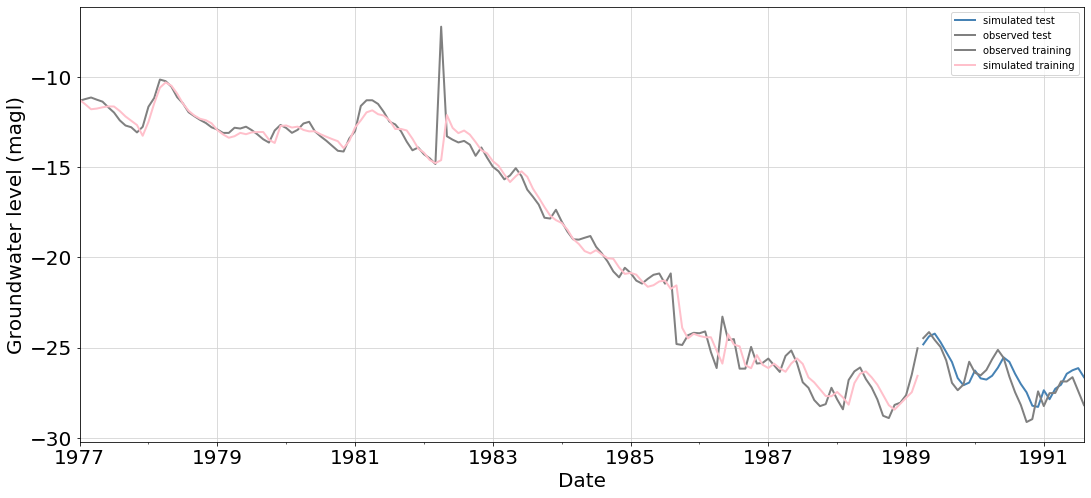

In [71]:
mse_gru = summary['mse_gru'].mean(axis=0)
rmse_gru= summary['rmse_gru'].mean(axis=0)
mae_gru = summary['mae_gru'].mean(axis=0)
r2_gru  = summary['r2_gru'].mean(axis=0)
stdv_gru= stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_gru, 3))
print("Mean squared error is:",round(mse_gru,3))
print("Root mean squared error is:",round(rmse_gru, 3))
print("Mean absolute error is:",round(mae_gru,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[147:176].index)
df1['observed test']      = pima.iloc[147:176, 0].values

df2 = pd.DataFrame(pima.iloc[0:147, 0].values, columns = ['observed training'],index =pima.iloc[0:147].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [72]:
y_gru = out_df['simulated test']

### FFNN

In [74]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_ff', 'rmse_ff', 'r2_ff','mae_ff'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    # Add fully connected layer with a ReLU activation function
    model.add(Dense(units=32, activation='relu', input_shape=(1,6)))

    # Add fully connected layer with a ReLU activation function
    model.add(Dense(units=32, activation='relu'))

    # Add fully connected layer with no activation function
    model.add(Dense(units=1))
    #model.add(Flatten())

    # Compile neural network
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    
    X_val_reshaped = X_val_reshaped.reshape(29, 6)

    #running function
    gwl = -0.79231483
    test_forecast = X_test
    steps_ahead = 29
    y_pred = forecast(model, test_forecast, gwl, steps_ahead)
    y_pred = np.array(y_pred)

     #metrics for test
    y_ff = y_pred
    test_pred.append(y_ff)
    mse_ff = mean_squared_error(y_test, y_ff)
    rmse_ff = np.sqrt(mse_ff)
    r2_ff = r2_score(y_test, y_ff)
    mae_ff = mean_absolute_error(y_test, y_ff)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_ff,Round), round(rmse_ff,Round), round(r2_ff,Round),round(mae_ff,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')  

Running fold 1
(147, 6)
Train on 147 samples, validate on 29 samples
Epoch 1/1000
 96/147 [==================>...........] - ETA: 1s - loss: 0.9367 - mean_squared_error: 0.9367
Epoch 00001: val_loss improved from inf to 0.85717, saving model to model.h5
147/147 [==============================] - 7s 48ms/sample - loss: 0.9127 - mean_squared_error: 0.9127 - val_loss: 0.8572 - val_mean_squared_error: 0.8572
Epoch 2/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.7563 - mean_squared_error: 0.7563
Epoch 00002: val_loss improved from 0.85717 to 0.74403, saving model to model.h5
147/147 [==============================] - 0s 414us/sample - loss: 0.7315 - mean_squared_error: 0.7315 - val_loss: 0.7440 - val_mean_squared_error: 0.7440
Epoch 3/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.6141 - mean_squared_error: 0.6141
Epoch 00003: val_loss improved from 0.74403 to 0.63836, saving model to model.h5
147/147 [==============================] - 0s 475us/sample 

Epoch 25/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0315 - mean_squared_error: 0.0315
Epoch 00025: val_loss did not improve from 0.02364
147/147 [==============================] - 0s 128us/sample - loss: 0.0273 - mean_squared_error: 0.0273 - val_loss: 0.0286 - val_mean_squared_error: 0.0286
Epoch 26/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0306 - mean_squared_error: 0.0306
Epoch 00026: val_loss did not improve from 0.02364
147/147 [==============================] - 0s 128us/sample - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 27/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 00027: val_loss did not improve from 0.02364
147/147 [==============================] - 0s 123us/sample - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0292 - val_mean_squared_error: 0.0292
Epoch 28/1000
 96/147 [==================>...........] 

Epoch 51/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0279 - mean_squared_error: 0.0279
Epoch 00051: val_loss did not improve from 0.02082
147/147 [==============================] - 0s 141us/sample - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 52/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0288 - mean_squared_error: 0.0288
Epoch 00052: val_loss did not improve from 0.02082
147/147 [==============================] - 0s 121us/sample - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0301 - val_mean_squared_error: 0.0301
Epoch 53/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 00053: val_loss did not improve from 0.02082
147/147 [==============================] - 0s 132us/sample - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 54/1000
 96/147 [==================>...........] 

Epoch 77/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0277 - mean_squared_error: 0.0277
Epoch 00077: val_loss did not improve from 0.01960
147/147 [==============================] - 0s 143us/sample - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 78/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0295 - mean_squared_error: 0.0295
Epoch 00078: val_loss did not improve from 0.01960
147/147 [==============================] - 0s 137us/sample - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0280 - val_mean_squared_error: 0.0280
Epoch 79/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0278 - mean_squared_error: 0.0278
Epoch 00079: val_loss did not improve from 0.01960
147/147 [==============================] - 0s 127us/sample - loss: 0.0261 - mean_squared_error: 0.0261 - val_loss: 0.0221 - val_mean_squared_error: 0.0221
Epoch 80/1000
 96/147 [==================>...........] 

Epoch 103/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 00103: val_loss did not improve from 0.01934
147/147 [==============================] - 0s 189us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0277 - val_mean_squared_error: 0.0277
Epoch 104/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0156 - mean_squared_error: 0.0156
Epoch 00104: val_loss did not improve from 0.01934
147/147 [==============================] - 0s 163us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.0301 - val_mean_squared_error: 0.0301
Epoch 105/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0270 - mean_squared_error: 0.0270
Epoch 00105: val_loss did not improve from 0.01934
147/147 [==============================] - 0s 156us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.0280 - val_mean_squared_error: 0.0280
Epoch 106/1000
 96/147 [==================>.........

Epoch 129/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 00129: val_loss did not improve from 0.01877
147/147 [==============================] - 0s 183us/sample - loss: 0.0202 - mean_squared_error: 0.0202 - val_loss: 0.0360 - val_mean_squared_error: 0.0360
Epoch 130/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 00130: val_loss did not improve from 0.01877
147/147 [==============================] - 0s 142us/sample - loss: 0.0270 - mean_squared_error: 0.0270 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 131/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0171 - mean_squared_error: 0.0171
Epoch 00131: val_loss did not improve from 0.01877
147/147 [==============================] - 0s 132us/sample - loss: 0.0272 - mean_squared_error: 0.0272 - val_loss: 0.0335 - val_mean_squared_error: 0.0335
Epoch 132/1000
 96/147 [==================>.........

Epoch 155/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0271 - mean_squared_error: 0.0271
Epoch 00155: val_loss did not improve from 0.01877
147/147 [==============================] - 0s 143us/sample - loss: 0.0213 - mean_squared_error: 0.0213 - val_loss: 0.0352 - val_mean_squared_error: 0.0352
Epoch 156/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0278 - mean_squared_error: 0.0278
Epoch 00156: val_loss did not improve from 0.01877
147/147 [==============================] - 0s 121us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 157/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0239 - mean_squared_error: 0.0239
Epoch 00157: val_loss did not improve from 0.01877
147/147 [==============================] - 0s 132us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0235 - val_mean_squared_error: 0.0235
Epoch 158/1000
 96/147 [==================>.........

Epoch 181/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0238 - mean_squared_error: 0.0238
Epoch 00181: val_loss did not improve from 0.01877
147/147 [==============================] - 0s 134us/sample - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.0409 - val_mean_squared_error: 0.0409
Epoch 182/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 00182: val_loss did not improve from 0.01877
147/147 [==============================] - 0s 124us/sample - loss: 0.0247 - mean_squared_error: 0.0247 - val_loss: 0.0240 - val_mean_squared_error: 0.0240
Epoch 183/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0144 - mean_squared_error: 0.0144
Epoch 00183: val_loss did not improve from 0.01877
147/147 [==============================] - 0s 148us/sample - loss: 0.0213 - mean_squared_error: 0.0213 - val_loss: 0.0258 - val_mean_squared_error: 0.0258
Epoch 184/1000
 96/147 [==================>.........

Epoch 207/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 00207: val_loss did not improve from 0.01877
147/147 [==============================] - 0s 131us/sample - loss: 0.0206 - mean_squared_error: 0.0206 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Running fold 2
(147, 6)
Train on 147 samples, validate on 29 samples
Epoch 1/1000
 96/147 [==================>...........] - ETA: 1s - loss: 1.4131 - mean_squared_error: 1.4131
Epoch 00001: val_loss improved from inf to 0.52181, saving model to model.h5
147/147 [==============================] - 7s 50ms/sample - loss: 1.2911 - mean_squared_error: 1.2911 - val_loss: 0.5218 - val_mean_squared_error: 0.5218
Epoch 2/1000
 96/147 [==================>...........] - ETA: 0s - loss: 1.0296 - mean_squared_error: 1.0296
Epoch 00002: val_loss improved from 0.52181 to 0.37694, saving model to model.h5
147/147 [==============================] - 0s 422us/sample - loss: 0.9630 - mean_square

Epoch 25/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.1023 - mean_squared_error: 0.1023
Epoch 00025: val_loss did not improve from 0.02700
147/147 [==============================] - 0s 169us/sample - loss: 0.1018 - mean_squared_error: 0.1018 - val_loss: 0.0314 - val_mean_squared_error: 0.0314
Epoch 26/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0805 - mean_squared_error: 0.0805
Epoch 00026: val_loss did not improve from 0.02700
147/147 [==============================] - 0s 146us/sample - loss: 0.0693 - mean_squared_error: 0.0693 - val_loss: 0.0291 - val_mean_squared_error: 0.0291
Epoch 27/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0457 - mean_squared_error: 0.0457
Epoch 00027: val_loss improved from 0.02700 to 0.02289, saving model to model.h5
147/147 [==============================] - 0s 442us/sample - loss: 0.0528 - mean_squared_error: 0.0528 - val_loss: 0.0229 - val_mean_squared_error: 0.0229
Epoch 28/1000
 96/147 [==

Epoch 51/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 00051: val_loss did not improve from 0.02237
147/147 [==============================] - 0s 151us/sample - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0525 - val_mean_squared_error: 0.0525
Epoch 52/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0259 - mean_squared_error: 0.0259
Epoch 00052: val_loss did not improve from 0.02237
147/147 [==============================] - 0s 132us/sample - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0394 - val_mean_squared_error: 0.0394
Epoch 53/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 00053: val_loss did not improve from 0.02237
147/147 [==============================] - 0s 177us/sample - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0334 - val_mean_squared_error: 0.0334
Epoch 54/1000
 96/147 [==================>...........] 

 96/147 [==================>...........] - ETA: 0s - loss: 0.0282 - mean_squared_error: 0.0282
Epoch 00077: val_loss did not improve from 0.02237
147/147 [==============================] - 0s 121us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 0.0278 - val_mean_squared_error: 0.0278
Epoch 78/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0272 - mean_squared_error: 0.0272
Epoch 00078: val_loss did not improve from 0.02237
147/147 [==============================] - 0s 129us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.0510 - val_mean_squared_error: 0.0510
Epoch 79/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 00079: val_loss did not improve from 0.02237
147/147 [==============================] - 0s 149us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 80/1000
 96/147 [==================>...........] - ETA: 0s - lo

Epoch 103/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 00103: val_loss did not improve from 0.02227
147/147 [==============================] - 0s 126us/sample - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0438 - val_mean_squared_error: 0.0438
Epoch 104/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 00104: val_loss did not improve from 0.02227
147/147 [==============================] - 0s 141us/sample - loss: 0.0206 - mean_squared_error: 0.0206 - val_loss: 0.0382 - val_mean_squared_error: 0.0382
Epoch 105/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 00105: val_loss did not improve from 0.02227
147/147 [==============================] - 0s 127us/sample - loss: 0.0215 - mean_squared_error: 0.0215 - val_loss: 0.0471 - val_mean_squared_error: 0.0471
Epoch 106/1000
 96/147 [==================>.........

Epoch 129/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0308 - mean_squared_error: 0.0308
Epoch 00129: val_loss did not improve from 0.02227
147/147 [==============================] - 0s 119us/sample - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0397 - val_mean_squared_error: 0.0397
Epoch 130/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0242 - mean_squared_error: 0.0242
Epoch 00130: val_loss did not improve from 0.02227
147/147 [==============================] - 0s 122us/sample - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.0515 - val_mean_squared_error: 0.0515
Epoch 131/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0253 - mean_squared_error: 0.0253
Epoch 00131: val_loss did not improve from 0.02227
147/147 [==============================] - 0s 128us/sample - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0384 - val_mean_squared_error: 0.0384
Epoch 132/1000
 96/147 [==================>.........

Epoch 155/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0271 - mean_squared_error: 0.0271
Epoch 00155: val_loss did not improve from 0.02227
147/147 [==============================] - 0s 136us/sample - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0428 - val_mean_squared_error: 0.0428
Epoch 156/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0113 - mean_squared_error: 0.0113
Epoch 00156: val_loss did not improve from 0.02227
147/147 [==============================] - 0s 129us/sample - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.0329 - val_mean_squared_error: 0.0329
Epoch 157/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0232 - mean_squared_error: 0.0232
Epoch 00157: val_loss did not improve from 0.02227
147/147 [==============================] - 0s 132us/sample - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 158/1000
 96/147 [==================>.........

Epoch 181/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0289 - mean_squared_error: 0.0289
Epoch 00181: val_loss did not improve from 0.02227
147/147 [==============================] - 0s 181us/sample - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 182/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0133 - mean_squared_error: 0.0133
Epoch 00182: val_loss did not improve from 0.02227
147/147 [==============================] - 0s 137us/sample - loss: 0.0206 - mean_squared_error: 0.0206 - val_loss: 0.0550 - val_mean_squared_error: 0.0550
Epoch 183/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0224 - mean_squared_error: 0.0224
Epoch 00183: val_loss did not improve from 0.02227
147/147 [==============================] - 0s 118us/sample - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 184/1000
 96/147 [==================>.........

Epoch 13/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0277 - mean_squared_error: 0.0277
Epoch 00013: val_loss improved from 0.04482 to 0.03700, saving model to model.h5
147/147 [==============================] - 0s 465us/sample - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 14/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0260 - mean_squared_error: 0.0260
Epoch 00014: val_loss did not improve from 0.03700
147/147 [==============================] - 0s 137us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 0.0393 - val_mean_squared_error: 0.0393
Epoch 15/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0232 - mean_squared_error: 0.0232
Epoch 00015: val_loss did not improve from 0.03700
147/147 [==============================] - 0s 128us/sample - loss: 0.0207 - mean_squared_error: 0.0207 - val_loss: 0.0468 - val_mean_squared_error: 0.0468
Epoch 16/1000
 96/147 [==

Epoch 39/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0236 - mean_squared_error: 0.0236
Epoch 00039: val_loss did not improve from 0.03067
147/147 [==============================] - 0s 121us/sample - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0351 - val_mean_squared_error: 0.0351
Epoch 40/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 00040: val_loss did not improve from 0.03067
147/147 [==============================] - 0s 120us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.0811 - val_mean_squared_error: 0.0811
Epoch 41/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 00041: val_loss did not improve from 0.03067
147/147 [==============================] - 0s 124us/sample - loss: 0.0234 - mean_squared_error: 0.0234 - val_loss: 0.0409 - val_mean_squared_error: 0.0409
Epoch 42/1000
 96/147 [==================>...........] 

Epoch 65/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 00065: val_loss did not improve from 0.02605
147/147 [==============================] - 0s 125us/sample - loss: 0.0204 - mean_squared_error: 0.0204 - val_loss: 0.0731 - val_mean_squared_error: 0.0731
Epoch 66/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0175 - mean_squared_error: 0.0175
Epoch 00066: val_loss did not improve from 0.02605
147/147 [==============================] - 0s 128us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0429 - val_mean_squared_error: 0.0429
Epoch 67/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0199 - mean_squared_error: 0.0199
Epoch 00067: val_loss did not improve from 0.02605
147/147 [==============================] - 0s 128us/sample - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0334 - val_mean_squared_error: 0.0334
Epoch 68/1000
 96/147 [==================>...........] 

Epoch 91/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 00091: val_loss did not improve from 0.02596
147/147 [==============================] - 0s 136us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - val_loss: 0.0368 - val_mean_squared_error: 0.0368
Epoch 92/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0237 - mean_squared_error: 0.0237
Epoch 00092: val_loss did not improve from 0.02596
147/147 [==============================] - 0s 132us/sample - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0289 - val_mean_squared_error: 0.0289
Epoch 93/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0153 - mean_squared_error: 0.0153
Epoch 00093: val_loss did not improve from 0.02596
147/147 [==============================] - 0s 122us/sample - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0459 - val_mean_squared_error: 0.0459
Epoch 94/1000
 96/147 [==================>...........] 

Epoch 117/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 00117: val_loss did not improve from 0.02573
147/147 [==============================] - 0s 169us/sample - loss: 0.0213 - mean_squared_error: 0.0213 - val_loss: 0.0547 - val_mean_squared_error: 0.0547
Epoch 118/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0245 - mean_squared_error: 0.0245
Epoch 00118: val_loss did not improve from 0.02573
147/147 [==============================] - 0s 134us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.0516 - val_mean_squared_error: 0.0516
Epoch 119/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0264 - mean_squared_error: 0.0264
Epoch 00119: val_loss did not improve from 0.02573
147/147 [==============================] - 0s 136us/sample - loss: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.0437 - val_mean_squared_error: 0.0437
Epoch 120/1000
 96/147 [==================>.........

Epoch 143/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 00143: val_loss did not improve from 0.02447
147/147 [==============================] - 0s 123us/sample - loss: 0.0203 - mean_squared_error: 0.0203 - val_loss: 0.0597 - val_mean_squared_error: 0.0597
Epoch 144/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0135 - mean_squared_error: 0.0135
Epoch 00144: val_loss did not improve from 0.02447
147/147 [==============================] - 0s 127us/sample - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.0435 - val_mean_squared_error: 0.0435
Epoch 145/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0274 - mean_squared_error: 0.0274
Epoch 00145: val_loss did not improve from 0.02447
147/147 [==============================] - 0s 127us/sample - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0416 - val_mean_squared_error: 0.0416
Epoch 146/1000
 96/147 [==================>.........

Epoch 169/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0220 - mean_squared_error: 0.0220
Epoch 00169: val_loss did not improve from 0.02447
147/147 [==============================] - 0s 128us/sample - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0324 - val_mean_squared_error: 0.0324
Epoch 170/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0130 - mean_squared_error: 0.0130
Epoch 00170: val_loss did not improve from 0.02447
147/147 [==============================] - 0s 125us/sample - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0500 - val_mean_squared_error: 0.0500
Epoch 171/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 00171: val_loss did not improve from 0.02447
147/147 [==============================] - 0s 133us/sample - loss: 0.0236 - mean_squared_error: 0.0236 - val_loss: 0.0738 - val_mean_squared_error: 0.0738
Epoch 172/1000
 96/147 [==================>.........

Epoch 195/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0320 - mean_squared_error: 0.0320
Epoch 00195: val_loss did not improve from 0.02399
147/147 [==============================] - 0s 126us/sample - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0537 - val_mean_squared_error: 0.0537
Epoch 196/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0248 - mean_squared_error: 0.0248
Epoch 00196: val_loss did not improve from 0.02399
147/147 [==============================] - 0s 127us/sample - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.0611 - val_mean_squared_error: 0.0611
Epoch 197/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0255 - mean_squared_error: 0.0255
Epoch 00197: val_loss did not improve from 0.02399
147/147 [==============================] - 0s 129us/sample - loss: 0.0202 - mean_squared_error: 0.0202 - val_loss: 0.0561 - val_mean_squared_error: 0.0561
Epoch 198/1000
 96/147 [==================>.........

Epoch 221/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0222 - mean_squared_error: 0.0222
Epoch 00221: val_loss did not improve from 0.02399
147/147 [==============================] - 0s 122us/sample - loss: 0.0195 - mean_squared_error: 0.0195 - val_loss: 0.0691 - val_mean_squared_error: 0.0691
Epoch 222/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0277 - mean_squared_error: 0.0277
Epoch 00222: val_loss did not improve from 0.02399
147/147 [==============================] - 0s 123us/sample - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0863 - val_mean_squared_error: 0.0863
Epoch 223/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0192 - mean_squared_error: 0.0192
Epoch 00223: val_loss did not improve from 0.02399
147/147 [==============================] - 0s 120us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.0568 - val_mean_squared_error: 0.0568
Epoch 224/1000
 96/147 [==================>.........

Epoch 247/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 00247: val_loss did not improve from 0.02399
147/147 [==============================] - 0s 125us/sample - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.0467 - val_mean_squared_error: 0.0467
Epoch 248/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0220 - mean_squared_error: 0.0220
Epoch 00248: val_loss did not improve from 0.02399
147/147 [==============================] - 0s 130us/sample - loss: 0.0272 - mean_squared_error: 0.0272 - val_loss: 0.0525 - val_mean_squared_error: 0.0525
Epoch 249/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 00249: val_loss did not improve from 0.02399
147/147 [==============================] - 0s 129us/sample - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.0384 - val_mean_squared_error: 0.0384
Epoch 250/1000
 96/147 [==================>.........

Epoch 273/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0233 - mean_squared_error: 0.0233
Epoch 00273: val_loss did not improve from 0.02399
147/147 [==============================] - 0s 128us/sample - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0798 - val_mean_squared_error: 0.0798
Epoch 274/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0182 - mean_squared_error: 0.0182
Epoch 00274: val_loss did not improve from 0.02399
147/147 [==============================] - 0s 131us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 0.0531 - val_mean_squared_error: 0.0531
Epoch 275/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0239 - mean_squared_error: 0.0239
Epoch 00275: val_loss did not improve from 0.02399
147/147 [==============================] - 0s 126us/sample - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0741 - val_mean_squared_error: 0.0741
Epoch 276/1000
 96/147 [==================>.........

147/147 [==============================] - 0s 547us/sample - loss: 0.3583 - mean_squared_error: 0.3583 - val_loss: 1.1759 - val_mean_squared_error: 1.1759
Epoch 5/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.4058 - mean_squared_error: 0.4058
Epoch 00005: val_loss improved from 1.17590 to 1.11160, saving model to model.h5
147/147 [==============================] - 0s 562us/sample - loss: 0.3289 - mean_squared_error: 0.3289 - val_loss: 1.1116 - val_mean_squared_error: 1.1116
Epoch 6/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.2672 - mean_squared_error: 0.2672
Epoch 00006: val_loss improved from 1.11160 to 1.05486, saving model to model.h5
147/147 [==============================] - 0s 542us/sample - loss: 0.3079 - mean_squared_error: 0.3079 - val_loss: 1.0549 - val_mean_squared_error: 1.0549
Epoch 7/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.3251 - mean_squared_error: 0.3251
Epoch 00007: val_loss improved from 1.05486 to 1.

Epoch 29/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0174 - mean_squared_error: 0.0174
Epoch 00029: val_loss improved from 0.03591 to 0.03138, saving model to model.h5
147/147 [==============================] - 0s 547us/sample - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0314 - val_mean_squared_error: 0.0314
Epoch 30/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0280 - mean_squared_error: 0.0280
Epoch 00030: val_loss did not improve from 0.03138
147/147 [==============================] - 0s 216us/sample - loss: 0.0215 - mean_squared_error: 0.0215 - val_loss: 0.0371 - val_mean_squared_error: 0.0371
Epoch 31/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 00031: val_loss did not improve from 0.03138
147/147 [==============================] - 0s 144us/sample - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.0502 - val_mean_squared_error: 0.0502
Epoch 32/1000
 96/147 [==

Epoch 55/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0229 - mean_squared_error: 0.0229
Epoch 00055: val_loss did not improve from 0.02871
147/147 [==============================] - 0s 143us/sample - loss: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.0365 - val_mean_squared_error: 0.0365
Epoch 56/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0232 - mean_squared_error: 0.0232
Epoch 00056: val_loss did not improve from 0.02871
147/147 [==============================] - 0s 135us/sample - loss: 0.0204 - mean_squared_error: 0.0204 - val_loss: 0.0711 - val_mean_squared_error: 0.0711
Epoch 57/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 00057: val_loss did not improve from 0.02871
147/147 [==============================] - 0s 138us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0797 - val_mean_squared_error: 0.0797
Epoch 58/1000
 96/147 [==================>...........] 

Epoch 81/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 00081: val_loss did not improve from 0.02850
147/147 [==============================] - 0s 142us/sample - loss: 0.0202 - mean_squared_error: 0.0202 - val_loss: 0.0398 - val_mean_squared_error: 0.0398
Epoch 82/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 00082: val_loss improved from 0.02850 to 0.02763, saving model to model.h5
147/147 [==============================] - 0s 593us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.0276 - val_mean_squared_error: 0.0276
Epoch 83/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0211 - mean_squared_error: 0.0211
Epoch 00083: val_loss did not improve from 0.02763
147/147 [==============================] - 0s 147us/sample - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.0479 - val_mean_squared_error: 0.0479
Epoch 84/1000
 96/147 [==

Epoch 107/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0256 - mean_squared_error: 0.0256
Epoch 00107: val_loss did not improve from 0.02575
147/147 [==============================] - 0s 143us/sample - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0583 - val_mean_squared_error: 0.0583
Epoch 108/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0228 - mean_squared_error: 0.0228
Epoch 00108: val_loss did not improve from 0.02575
147/147 [==============================] - 0s 142us/sample - loss: 0.0185 - mean_squared_error: 0.0185 - val_loss: 0.0373 - val_mean_squared_error: 0.0373
Epoch 109/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0276 - mean_squared_error: 0.0276
Epoch 00109: val_loss did not improve from 0.02575
147/147 [==============================] - 0s 148us/sample - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.0391 - val_mean_squared_error: 0.0391
Epoch 110/1000
 96/147 [==================>.........

Epoch 133/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0221 - mean_squared_error: 0.0221
Epoch 00133: val_loss did not improve from 0.02575
147/147 [==============================] - 0s 153us/sample - loss: 0.0203 - mean_squared_error: 0.0203 - val_loss: 0.0351 - val_mean_squared_error: 0.0351
Epoch 134/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0269 - mean_squared_error: 0.0269
Epoch 00134: val_loss did not improve from 0.02575
147/147 [==============================] - 0s 160us/sample - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0772 - val_mean_squared_error: 0.0772
Epoch 135/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0320 - mean_squared_error: 0.0320
Epoch 00135: val_loss did not improve from 0.02575
147/147 [==============================] - 0s 154us/sample - loss: 0.0260 - mean_squared_error: 0.0260 - val_loss: 0.0752 - val_mean_squared_error: 0.0752
Epoch 136/1000
 96/147 [==================>.........

Epoch 159/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0297 - mean_squared_error: 0.0297
Epoch 00159: val_loss did not improve from 0.02575
147/147 [==============================] - 0s 253us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0502 - val_mean_squared_error: 0.0502
Epoch 160/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0247 - mean_squared_error: 0.0247
Epoch 00160: val_loss did not improve from 0.02575
147/147 [==============================] - 0s 170us/sample - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0789 - val_mean_squared_error: 0.0789
Epoch 161/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0223 - mean_squared_error: 0.0223
Epoch 00161: val_loss did not improve from 0.02575
147/147 [==============================] - 0s 142us/sample - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0511 - val_mean_squared_error: 0.0511
Epoch 162/1000
 96/147 [==================>.........

Epoch 185/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0242 - mean_squared_error: 0.0242
Epoch 00185: val_loss did not improve from 0.02534
147/147 [==============================] - 0s 138us/sample - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 186/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0143 - mean_squared_error: 0.0143
Epoch 00186: val_loss did not improve from 0.02534
147/147 [==============================] - 0s 153us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.0571 - val_mean_squared_error: 0.0571
Epoch 187/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0196 - mean_squared_error: 0.0196
Epoch 00187: val_loss did not improve from 0.02534
147/147 [==============================] - 0s 240us/sample - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.0462 - val_mean_squared_error: 0.0462
Epoch 188/1000
 96/147 [==================>.........

Epoch 211/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0269 - mean_squared_error: 0.0269
Epoch 00211: val_loss did not improve from 0.02534
147/147 [==============================] - 0s 192us/sample - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.0625 - val_mean_squared_error: 0.0625
Epoch 212/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 00212: val_loss did not improve from 0.02534
147/147 [==============================] - 0s 181us/sample - loss: 0.0207 - mean_squared_error: 0.0207 - val_loss: 0.0463 - val_mean_squared_error: 0.0463
Epoch 213/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0220 - mean_squared_error: 0.0220
Epoch 00213: val_loss did not improve from 0.02534
147/147 [==============================] - 0s 182us/sample - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.0600 - val_mean_squared_error: 0.0600
Epoch 214/1000
 96/147 [==================>.........

Epoch 237/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 00237: val_loss did not improve from 0.02534
147/147 [==============================] - 0s 141us/sample - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0344 - val_mean_squared_error: 0.0344
Epoch 238/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0243 - mean_squared_error: 0.0243
Epoch 00238: val_loss did not improve from 0.02534
147/147 [==============================] - 0s 141us/sample - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.0416 - val_mean_squared_error: 0.0416
Epoch 239/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0259 - mean_squared_error: 0.0259
Epoch 00239: val_loss did not improve from 0.02534
147/147 [==============================] - 0s 133us/sample - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0372 - val_mean_squared_error: 0.0372
Epoch 240/1000
 96/147 [==================>.........

Epoch 263/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 00263: val_loss did not improve from 0.02534
147/147 [==============================] - 0s 133us/sample - loss: 0.0202 - mean_squared_error: 0.0202 - val_loss: 0.0505 - val_mean_squared_error: 0.0505
Epoch 264/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0240 - mean_squared_error: 0.0240
Epoch 00264: val_loss did not improve from 0.02534
147/147 [==============================] - 0s 130us/sample - loss: 0.0191 - mean_squared_error: 0.0191 - val_loss: 0.0297 - val_mean_squared_error: 0.0297
Epoch 265/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0276 - mean_squared_error: 0.0276
Epoch 00265: val_loss did not improve from 0.02534
147/147 [==============================] - 0s 140us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - val_loss: 0.0370 - val_mean_squared_error: 0.0370
Epoch 266/1000
 96/147 [==================>.........

Epoch 11/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0834 - mean_squared_error: 0.0834
Epoch 00011: val_loss improved from 0.30550 to 0.13523, saving model to model.h5
147/147 [==============================] - 0s 817us/sample - loss: 0.0666 - mean_squared_error: 0.0666 - val_loss: 0.1352 - val_mean_squared_error: 0.1352
Epoch 12/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0300 - mean_squared_error: 0.0300
Epoch 00012: val_loss improved from 0.13523 to 0.07239, saving model to model.h5
147/147 [==============================] - 0s 765us/sample - loss: 0.0326 - mean_squared_error: 0.0326 - val_loss: 0.0724 - val_mean_squared_error: 0.0724
Epoch 13/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0215 - mean_squared_error: 0.0215
Epoch 00013: val_loss improved from 0.07239 to 0.05996, saving model to model.h5
147/147 [==============================] - 0s 681us/sample - loss: 0.0288 - mean_squared_error: 0.0288 - val_loss: 0.060

 96/147 [==================>...........] - ETA: 0s - loss: 0.0236 - mean_squared_error: 0.0236
Epoch 00036: val_loss did not improve from 0.02889
147/147 [==============================] - 0s 217us/sample - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.0297 - val_mean_squared_error: 0.0297
Epoch 37/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0279 - mean_squared_error: 0.0279
Epoch 00037: val_loss did not improve from 0.02889
147/147 [==============================] - 0s 169us/sample - loss: 0.0208 - mean_squared_error: 0.0208 - val_loss: 0.0440 - val_mean_squared_error: 0.0440
Epoch 38/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0242 - mean_squared_error: 0.0242
Epoch 00038: val_loss did not improve from 0.02889
147/147 [==============================] - 0s 139us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 0.0865 - val_mean_squared_error: 0.0865
Epoch 39/1000
 96/147 [==================>...........] - ETA: 0s - lo

Epoch 62/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 00062: val_loss did not improve from 0.02578
147/147 [==============================] - 0s 208us/sample - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0525 - val_mean_squared_error: 0.0525
Epoch 63/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0270 - mean_squared_error: 0.0270
Epoch 00063: val_loss did not improve from 0.02578
147/147 [==============================] - 0s 146us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.0648 - val_mean_squared_error: 0.0648
Epoch 64/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0218 - mean_squared_error: 0.0218
Epoch 00064: val_loss did not improve from 0.02578
147/147 [==============================] - 0s 149us/sample - loss: 0.0175 - mean_squared_error: 0.0175 - val_loss: 0.0783 - val_mean_squared_error: 0.0783
Epoch 65/1000
 96/147 [==================>...........] 

Epoch 88/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 00088: val_loss did not improve from 0.02515
147/147 [==============================] - 0s 163us/sample - loss: 0.0274 - mean_squared_error: 0.0274 - val_loss: 0.0724 - val_mean_squared_error: 0.0724
Epoch 89/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0196 - mean_squared_error: 0.0196
Epoch 00089: val_loss did not improve from 0.02515
147/147 [==============================] - 0s 153us/sample - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.0760 - val_mean_squared_error: 0.0760
Epoch 90/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 00090: val_loss did not improve from 0.02515
147/147 [==============================] - 0s 146us/sample - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0682 - val_mean_squared_error: 0.0682
Epoch 91/1000
 96/147 [==================>...........] 

Epoch 114/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 00114: val_loss did not improve from 0.02515
147/147 [==============================] - 0s 165us/sample - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.0567 - val_mean_squared_error: 0.0567
Epoch 115/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0272 - mean_squared_error: 0.0272
Epoch 00115: val_loss did not improve from 0.02515
147/147 [==============================] - 0s 148us/sample - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.0548 - val_mean_squared_error: 0.0548
Epoch 116/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 00116: val_loss did not improve from 0.02515
147/147 [==============================] - 0s 156us/sample - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.0433 - val_mean_squared_error: 0.0433
Epoch 117/1000
 96/147 [==================>.........

Epoch 140/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0342 - mean_squared_error: 0.0342
Epoch 00140: val_loss did not improve from 0.02515
147/147 [==============================] - 0s 143us/sample - loss: 0.0276 - mean_squared_error: 0.0276 - val_loss: 0.0304 - val_mean_squared_error: 0.0304
Epoch 141/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 00141: val_loss did not improve from 0.02515
147/147 [==============================] - 0s 148us/sample - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0284 - val_mean_squared_error: 0.0284
Epoch 142/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0236 - mean_squared_error: 0.0236
Epoch 00142: val_loss did not improve from 0.02515
147/147 [==============================] - 0s 137us/sample - loss: 0.0208 - mean_squared_error: 0.0208 - val_loss: 0.0316 - val_mean_squared_error: 0.0316
Epoch 143/1000
 96/147 [==================>.........

Epoch 166/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0202 - mean_squared_error: 0.0202
Epoch 00166: val_loss did not improve from 0.02515
147/147 [==============================] - 0s 150us/sample - loss: 0.0201 - mean_squared_error: 0.0201 - val_loss: 0.1177 - val_mean_squared_error: 0.1177
Epoch 167/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 00167: val_loss did not improve from 0.02515
147/147 [==============================] - 0s 204us/sample - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0793 - val_mean_squared_error: 0.0793
Epoch 168/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 00168: val_loss did not improve from 0.02515
147/147 [==============================] - 0s 160us/sample - loss: 0.0231 - mean_squared_error: 0.0231 - val_loss: 0.0299 - val_mean_squared_error: 0.0299
Epoch 169/1000
 96/147 [==================>.........

Epoch 13/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.2022 - mean_squared_error: 0.2022
Epoch 00013: val_loss did not improve from 0.02506
147/147 [==============================] - 0s 170us/sample - loss: 0.1705 - mean_squared_error: 0.1705 - val_loss: 0.0749 - val_mean_squared_error: 0.0749
Epoch 14/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0649 - mean_squared_error: 0.0649
Epoch 00014: val_loss did not improve from 0.02506
147/147 [==============================] - 0s 167us/sample - loss: 0.0675 - mean_squared_error: 0.0675 - val_loss: 0.0879 - val_mean_squared_error: 0.0879
Epoch 15/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0272 - mean_squared_error: 0.0272
Epoch 00015: val_loss did not improve from 0.02506
147/147 [==============================] - 0s 165us/sample - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0977 - val_mean_squared_error: 0.0977
Epoch 16/1000
 96/147 [==================>...........] 

Epoch 39/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0200 - mean_squared_error: 0.0200
Epoch 00039: val_loss did not improve from 0.02427
147/147 [==============================] - 0s 164us/sample - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.0365 - val_mean_squared_error: 0.0365
Epoch 40/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0291 - mean_squared_error: 0.0291
Epoch 00040: val_loss did not improve from 0.02427
147/147 [==============================] - 0s 155us/sample - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0524 - val_mean_squared_error: 0.0524
Epoch 41/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0112 - mean_squared_error: 0.0112
Epoch 00041: val_loss did not improve from 0.02427
147/147 [==============================] - 0s 169us/sample - loss: 0.0203 - mean_squared_error: 0.0203 - val_loss: 0.0684 - val_mean_squared_error: 0.0684
Epoch 42/1000
 96/147 [==================>...........] 

 96/147 [==================>...........] - ETA: 0s - loss: 0.0084 - mean_squared_error: 0.0084
Epoch 00065: val_loss did not improve from 0.02427
147/147 [==============================] - 0s 165us/sample - loss: 0.0190 - mean_squared_error: 0.0190 - val_loss: 0.0795 - val_mean_squared_error: 0.0795
Epoch 66/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0281 - mean_squared_error: 0.0281
Epoch 00066: val_loss did not improve from 0.02427
147/147 [==============================] - 0s 158us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - val_loss: 0.0673 - val_mean_squared_error: 0.0673
Epoch 67/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0243 - mean_squared_error: 0.0243
Epoch 00067: val_loss did not improve from 0.02427
147/147 [==============================] - 0s 151us/sample - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0547 - val_mean_squared_error: 0.0547
Epoch 68/1000
 96/147 [==================>...........] - ETA: 0s - lo

Epoch 91/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0162 - mean_squared_error: 0.0162
Epoch 00091: val_loss did not improve from 0.02386
147/147 [==============================] - 0s 153us/sample - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.0260 - val_mean_squared_error: 0.0260
Epoch 92/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0267 - mean_squared_error: 0.0267
Epoch 00092: val_loss did not improve from 0.02386
147/147 [==============================] - 0s 149us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0346 - val_mean_squared_error: 0.0346
Epoch 93/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0174 - mean_squared_error: 0.0174
Epoch 00093: val_loss did not improve from 0.02386
147/147 [==============================] - 0s 157us/sample - loss: 0.0215 - mean_squared_error: 0.0215 - val_loss: 0.0352 - val_mean_squared_error: 0.0352
Epoch 94/1000
 96/147 [==================>...........] 

Epoch 117/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0308 - mean_squared_error: 0.0308
Epoch 00117: val_loss did not improve from 0.02386
147/147 [==============================] - 0s 152us/sample - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0582 - val_mean_squared_error: 0.0582
Epoch 118/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0197 - mean_squared_error: 0.0197
Epoch 00118: val_loss did not improve from 0.02386
147/147 [==============================] - 0s 152us/sample - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 119/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0272 - mean_squared_error: 0.0272
Epoch 00119: val_loss did not improve from 0.02386
147/147 [==============================] - 0s 157us/sample - loss: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.0418 - val_mean_squared_error: 0.0418
Epoch 120/1000
 96/147 [==================>.........

Epoch 143/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 00143: val_loss did not improve from 0.02386
147/147 [==============================] - 0s 159us/sample - loss: 0.0190 - mean_squared_error: 0.0190 - val_loss: 0.0383 - val_mean_squared_error: 0.0383
Epoch 144/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 00144: val_loss did not improve from 0.02386
147/147 [==============================] - 0s 161us/sample - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.0425 - val_mean_squared_error: 0.0425
Epoch 145/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0276 - mean_squared_error: 0.0276
Epoch 00145: val_loss did not improve from 0.02386
147/147 [==============================] - 0s 152us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.0491 - val_mean_squared_error: 0.0491
Epoch 146/1000
 96/147 [==================>.........

Epoch 169/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0220 - mean_squared_error: 0.0220
Epoch 00169: val_loss did not improve from 0.02386
147/147 [==============================] - 0s 168us/sample - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.0842 - val_mean_squared_error: 0.0842
Epoch 170/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0252 - mean_squared_error: 0.0252
Epoch 00170: val_loss did not improve from 0.02386
147/147 [==============================] - 0s 150us/sample - loss: 0.0213 - mean_squared_error: 0.0213 - val_loss: 0.0791 - val_mean_squared_error: 0.0791
Running fold 7
(147, 6)
Train on 147 samples, validate on 29 samples
Epoch 1/1000
 96/147 [==================>...........] - ETA: 1s - loss: 1.0061 - mean_squared_error: 1.0061
Epoch 00001: val_loss improved from inf to 1.32863, saving model to model.h5
147/147 [==============================] - 10s 69ms/sample - loss: 1.0044 - mean_squared_error: 1.0044 - val_loss:

Epoch 24/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0280 - mean_squared_error: 0.0280
Epoch 00024: val_loss did not improve from 0.02715
147/147 [==============================] - 0s 176us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - val_loss: 0.0406 - val_mean_squared_error: 0.0406
Epoch 25/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0269 - mean_squared_error: 0.0269
Epoch 00025: val_loss did not improve from 0.02715
147/147 [==============================] - 0s 172us/sample - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0346 - val_mean_squared_error: 0.0346
Epoch 26/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0278 - mean_squared_error: 0.0278
Epoch 00026: val_loss did not improve from 0.02715
147/147 [==============================] - 0s 191us/sample - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0628 - val_mean_squared_error: 0.0628
Epoch 27/1000
 96/147 [==================>...........] 

Epoch 50/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0334 - mean_squared_error: 0.0334
Epoch 00050: val_loss did not improve from 0.02597
147/147 [==============================] - 0s 196us/sample - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.0351 - val_mean_squared_error: 0.0351
Epoch 51/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0292 - mean_squared_error: 0.0292
Epoch 00051: val_loss did not improve from 0.02597
147/147 [==============================] - 0s 162us/sample - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0485 - val_mean_squared_error: 0.0485
Epoch 52/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 00052: val_loss did not improve from 0.02597
147/147 [==============================] - 0s 158us/sample - loss: 0.0217 - mean_squared_error: 0.0217 - val_loss: 0.0638 - val_mean_squared_error: 0.0638
Epoch 53/1000
 96/147 [==================>...........] 

Epoch 76/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0087 - mean_squared_error: 0.0087
Epoch 00076: val_loss did not improve from 0.02477
147/147 [==============================] - 0s 209us/sample - loss: 0.0175 - mean_squared_error: 0.0175 - val_loss: 0.0420 - val_mean_squared_error: 0.0420
Epoch 77/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0224 - mean_squared_error: 0.0224
Epoch 00077: val_loss did not improve from 0.02477
147/147 [==============================] - 0s 196us/sample - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0533 - val_mean_squared_error: 0.0533
Epoch 78/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0335 - mean_squared_error: 0.0335
Epoch 00078: val_loss did not improve from 0.02477
147/147 [==============================] - 0s 168us/sample - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.0294 - val_mean_squared_error: 0.0294
Epoch 79/1000
 96/147 [==================>...........] 

 96/147 [==================>...........] - ETA: 0s - loss: 0.0219 - mean_squared_error: 0.0219
Epoch 00102: val_loss did not improve from 0.02477
147/147 [==============================] - 0s 169us/sample - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 103/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0300 - mean_squared_error: 0.0300
Epoch 00103: val_loss did not improve from 0.02477
147/147 [==============================] - 0s 174us/sample - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0525 - val_mean_squared_error: 0.0525
Epoch 104/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0120 - mean_squared_error: 0.0120
Epoch 00104: val_loss did not improve from 0.02477
147/147 [==============================] - 0s 165us/sample - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.0730 - val_mean_squared_error: 0.0730
Epoch 105/1000
 96/147 [==================>...........] - ETA: 0s -

Epoch 128/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0214 - mean_squared_error: 0.0214
Epoch 00128: val_loss did not improve from 0.02477
147/147 [==============================] - 0s 155us/sample - loss: 0.0204 - mean_squared_error: 0.0204 - val_loss: 0.0667 - val_mean_squared_error: 0.0667
Epoch 129/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0221 - mean_squared_error: 0.0221
Epoch 00129: val_loss did not improve from 0.02477
147/147 [==============================] - 0s 225us/sample - loss: 0.0191 - mean_squared_error: 0.0191 - val_loss: 0.0504 - val_mean_squared_error: 0.0504
Epoch 130/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0213 - mean_squared_error: 0.0213
Epoch 00130: val_loss did not improve from 0.02477
147/147 [==============================] - 0s 157us/sample - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0675 - val_mean_squared_error: 0.0675
Epoch 131/1000
 96/147 [==================>.........

Epoch 154/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0227 - mean_squared_error: 0.0227
Epoch 00154: val_loss did not improve from 0.02477
147/147 [==============================] - 0s 178us/sample - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.0949 - val_mean_squared_error: 0.0949
Epoch 155/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 00155: val_loss did not improve from 0.02477
147/147 [==============================] - 0s 170us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.0662 - val_mean_squared_error: 0.0662
Epoch 156/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0193 - mean_squared_error: 0.0193
Epoch 00156: val_loss did not improve from 0.02477
147/147 [==============================] - 0s 156us/sample - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.0552 - val_mean_squared_error: 0.0552
Epoch 157/1000
 96/147 [==================>.........

147/147 [==============================] - 0s 884us/sample - loss: 0.2693 - mean_squared_error: 0.2693 - val_loss: 0.9509 - val_mean_squared_error: 0.9509
Epoch 15/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.2605 - mean_squared_error: 0.2605
Epoch 00015: val_loss improved from 0.95088 to 0.91518, saving model to model.h5
147/147 [==============================] - 0s 890us/sample - loss: 0.2624 - mean_squared_error: 0.2624 - val_loss: 0.9152 - val_mean_squared_error: 0.9152
Epoch 16/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.2440 - mean_squared_error: 0.2440
Epoch 00016: val_loss improved from 0.91518 to 0.87677, saving model to model.h5
147/147 [==============================] - 0s 924us/sample - loss: 0.2527 - mean_squared_error: 0.2527 - val_loss: 0.8768 - val_mean_squared_error: 0.8768
Epoch 17/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.2624 - mean_squared_error: 0.2624
Epoch 00017: val_loss improved from 0.87677 to

Epoch 40/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0160 - mean_squared_error: 0.0160
Epoch 00040: val_loss did not improve from 0.02554
147/147 [==============================] - 0s 184us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.0272 - val_mean_squared_error: 0.0272
Epoch 41/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0306 - mean_squared_error: 0.0306
Epoch 00041: val_loss did not improve from 0.02554
147/147 [==============================] - 0s 185us/sample - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0489 - val_mean_squared_error: 0.0489
Epoch 42/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 00042: val_loss did not improve from 0.02554
147/147 [==============================] - 0s 188us/sample - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0376 - val_mean_squared_error: 0.0376
Epoch 43/1000
 96/147 [==================>...........] 

 96/147 [==================>...........] - ETA: 0s - loss: 0.0307 - mean_squared_error: 0.0307
Epoch 00066: val_loss did not improve from 0.02554
147/147 [==============================] - 0s 262us/sample - loss: 0.0274 - mean_squared_error: 0.0274 - val_loss: 0.0642 - val_mean_squared_error: 0.0642
Epoch 67/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0179 - mean_squared_error: 0.0179
Epoch 00067: val_loss did not improve from 0.02554
147/147 [==============================] - 0s 178us/sample - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.0576 - val_mean_squared_error: 0.0576
Epoch 68/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0343 - mean_squared_error: 0.0343
Epoch 00068: val_loss did not improve from 0.02554
147/147 [==============================] - 0s 177us/sample - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.0801 - val_mean_squared_error: 0.0801
Epoch 69/1000
 96/147 [==================>...........] - ETA: 0s - lo

 96/147 [==================>...........] - ETA: 0s - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 00092: val_loss did not improve from 0.02554
147/147 [==============================] - 0s 177us/sample - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.1018 - val_mean_squared_error: 0.1018
Epoch 93/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 00093: val_loss did not improve from 0.02554
147/147 [==============================] - 0s 168us/sample - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.1652 - val_mean_squared_error: 0.1652
Epoch 94/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0229 - mean_squared_error: 0.0229
Epoch 00094: val_loss did not improve from 0.02554
147/147 [==============================] - 0s 185us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.0337 - val_mean_squared_error: 0.0337
Epoch 95/1000
 96/147 [==================>...........] - ETA: 0s - lo

Epoch 118/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0173 - mean_squared_error: 0.0173
Epoch 00118: val_loss did not improve from 0.02548
147/147 [==============================] - 0s 178us/sample - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 119/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 00119: val_loss did not improve from 0.02548
147/147 [==============================] - 0s 176us/sample - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 120/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0271 - mean_squared_error: 0.0271
Epoch 00120: val_loss did not improve from 0.02548
147/147 [==============================] - 0s 204us/sample - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0626 - val_mean_squared_error: 0.0626
Epoch 121/1000
 96/147 [==================>.........

Epoch 144/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0252 - mean_squared_error: 0.0252
Epoch 00144: val_loss did not improve from 0.02548
147/147 [==============================] - 0s 225us/sample - loss: 0.0213 - mean_squared_error: 0.0213 - val_loss: 0.0725 - val_mean_squared_error: 0.0725
Epoch 145/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0338 - mean_squared_error: 0.0338
Epoch 00145: val_loss did not improve from 0.02548
147/147 [==============================] - 0s 171us/sample - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.0898 - val_mean_squared_error: 0.0898
Epoch 146/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0208 - mean_squared_error: 0.0208
Epoch 00146: val_loss did not improve from 0.02548
147/147 [==============================] - 0s 235us/sample - loss: 0.0307 - mean_squared_error: 0.0307 - val_loss: 0.0787 - val_mean_squared_error: 0.0787
Epoch 147/1000
 96/147 [==================>.........

Epoch 170/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0270 - mean_squared_error: 0.0270
Epoch 00170: val_loss did not improve from 0.02548
147/147 [==============================] - 0s 174us/sample - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0456 - val_mean_squared_error: 0.0456
Epoch 171/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0256 - mean_squared_error: 0.0256
Epoch 00171: val_loss did not improve from 0.02548
147/147 [==============================] - 0s 171us/sample - loss: 0.0353 - mean_squared_error: 0.0353 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 172/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0268 - mean_squared_error: 0.0268
Epoch 00172: val_loss did not improve from 0.02548
147/147 [==============================] - 0s 185us/sample - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.0410 - val_mean_squared_error: 0.0410
Epoch 173/1000
 96/147 [==================>.........

Epoch 196/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0135 - mean_squared_error: 0.0135
Epoch 00196: val_loss did not improve from 0.02548
147/147 [==============================] - 0s 173us/sample - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.1001 - val_mean_squared_error: 0.1001
Epoch 197/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0313 - mean_squared_error: 0.0313
Epoch 00197: val_loss did not improve from 0.02548
147/147 [==============================] - 0s 165us/sample - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.0922 - val_mean_squared_error: 0.0922
Epoch 198/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0264 - mean_squared_error: 0.0264
Epoch 00198: val_loss did not improve from 0.02548
147/147 [==============================] - 0s 176us/sample - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 199/1000
 96/147 [==================>.........

Epoch 9/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0091 - mean_squared_error: 0.0091
Epoch 00009: val_loss improved from 0.05041 to 0.03368, saving model to model.h5
147/147 [==============================] - 0s 1ms/sample - loss: 0.0202 - mean_squared_error: 0.0202 - val_loss: 0.0337 - val_mean_squared_error: 0.0337
Epoch 10/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0297 - mean_squared_error: 0.0297
Epoch 00010: val_loss did not improve from 0.03368
147/147 [==============================] - 0s 205us/sample - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.0477 - val_mean_squared_error: 0.0477
Epoch 11/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0281 - mean_squared_error: 0.0281
Epoch 00011: val_loss did not improve from 0.03368
147/147 [==============================] - 0s 191us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.0349 - val_mean_squared_error: 0.0349
Epoch 12/1000
 96/147 [=====

Epoch 35/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0220 - mean_squared_error: 0.0220
Epoch 00035: val_loss did not improve from 0.02776
147/147 [==============================] - 0s 195us/sample - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.0559 - val_mean_squared_error: 0.0559
Epoch 36/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 00036: val_loss did not improve from 0.02776
147/147 [==============================] - 0s 183us/sample - loss: 0.0231 - mean_squared_error: 0.0231 - val_loss: 0.0580 - val_mean_squared_error: 0.0580
Epoch 37/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0406 - mean_squared_error: 0.0406
Epoch 00037: val_loss improved from 0.02776 to 0.02610, saving model to model.h5
147/147 [==============================] - 0s 979us/sample - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 38/1000
 96/147 [==

Epoch 61/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0130 - mean_squared_error: 0.0130
Epoch 00061: val_loss did not improve from 0.02523
147/147 [==============================] - 0s 180us/sample - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0575 - val_mean_squared_error: 0.0575
Epoch 62/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0256 - mean_squared_error: 0.0256
Epoch 00062: val_loss did not improve from 0.02523
147/147 [==============================] - 0s 194us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 0.0493 - val_mean_squared_error: 0.0493
Epoch 63/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0437 - mean_squared_error: 0.0437
Epoch 00063: val_loss did not improve from 0.02523
147/147 [==============================] - 0s 185us/sample - loss: 0.0383 - mean_squared_error: 0.0383 - val_loss: 0.0315 - val_mean_squared_error: 0.0315
Epoch 64/1000
 96/147 [==================>...........] 

Epoch 87/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 00087: val_loss did not improve from 0.02433
147/147 [==============================] - 0s 183us/sample - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0810 - val_mean_squared_error: 0.0810
Epoch 88/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0283 - mean_squared_error: 0.0283
Epoch 00088: val_loss did not improve from 0.02433
147/147 [==============================] - 0s 187us/sample - loss: 0.0247 - mean_squared_error: 0.0247 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 89/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0288 - mean_squared_error: 0.0288
Epoch 00089: val_loss did not improve from 0.02433
147/147 [==============================] - 0s 195us/sample - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0472 - val_mean_squared_error: 0.0472
Epoch 90/1000
 96/147 [==================>...........] 

Epoch 113/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0359 - mean_squared_error: 0.0359
Epoch 00113: val_loss did not improve from 0.02433
147/147 [==============================] - 0s 186us/sample - loss: 0.0390 - mean_squared_error: 0.0390 - val_loss: 0.0887 - val_mean_squared_error: 0.0887
Epoch 114/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0272 - mean_squared_error: 0.0272
Epoch 00114: val_loss did not improve from 0.02433
147/147 [==============================] - 0s 185us/sample - loss: 0.0360 - mean_squared_error: 0.0360 - val_loss: 0.0648 - val_mean_squared_error: 0.0648
Epoch 115/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0245 - mean_squared_error: 0.0245
Epoch 00115: val_loss did not improve from 0.02433
147/147 [==============================] - 0s 213us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0958 - val_mean_squared_error: 0.0958
Epoch 116/1000
 96/147 [==================>.........

Epoch 139/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0185 - mean_squared_error: 0.0185
Epoch 00139: val_loss did not improve from 0.02389
147/147 [==============================] - 0s 197us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.0504 - val_mean_squared_error: 0.0504
Epoch 140/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0092 - mean_squared_error: 0.0092
Epoch 00140: val_loss did not improve from 0.02389
147/147 [==============================] - 0s 185us/sample - loss: 0.0174 - mean_squared_error: 0.0174 - val_loss: 0.0340 - val_mean_squared_error: 0.0340
Epoch 141/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 00141: val_loss did not improve from 0.02389
147/147 [==============================] - 0s 188us/sample - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0380 - val_mean_squared_error: 0.0380
Epoch 142/1000
 96/147 [==================>.........

Epoch 165/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0128 - mean_squared_error: 0.0128
Epoch 00165: val_loss did not improve from 0.02389
147/147 [==============================] - 0s 187us/sample - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0978 - val_mean_squared_error: 0.0978
Epoch 166/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0274 - mean_squared_error: 0.0274
Epoch 00166: val_loss did not improve from 0.02389
147/147 [==============================] - 0s 182us/sample - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.1666 - val_mean_squared_error: 0.1666
Epoch 167/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0411 - mean_squared_error: 0.0411
Epoch 00167: val_loss did not improve from 0.02389
147/147 [==============================] - 0s 173us/sample - loss: 0.0487 - mean_squared_error: 0.0487 - val_loss: 0.0693 - val_mean_squared_error: 0.0693
Epoch 168/1000
 96/147 [==================>.........

Epoch 191/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0335 - mean_squared_error: 0.0335
Epoch 00191: val_loss did not improve from 0.02389
147/147 [==============================] - 0s 191us/sample - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0418 - val_mean_squared_error: 0.0418
Epoch 192/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 00192: val_loss did not improve from 0.02389
147/147 [==============================] - 0s 191us/sample - loss: 0.0208 - mean_squared_error: 0.0208 - val_loss: 0.0317 - val_mean_squared_error: 0.0317
Epoch 193/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0269 - mean_squared_error: 0.0269
Epoch 00193: val_loss did not improve from 0.02389
147/147 [==============================] - 0s 245us/sample - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0408 - val_mean_squared_error: 0.0408
Epoch 194/1000
 96/147 [==================>.........

Epoch 217/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0271 - mean_squared_error: 0.0271
Epoch 00217: val_loss did not improve from 0.02389
147/147 [==============================] - 0s 177us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0811 - val_mean_squared_error: 0.0811
Epoch 218/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0209 - mean_squared_error: 0.0209
Epoch 00218: val_loss did not improve from 0.02389
147/147 [==============================] - 0s 174us/sample - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0508 - val_mean_squared_error: 0.0508
Epoch 219/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0342 - mean_squared_error: 0.0342
Epoch 00219: val_loss did not improve from 0.02389
147/147 [==============================] - 0s 178us/sample - loss: 0.0306 - mean_squared_error: 0.0306 - val_loss: 0.0866 - val_mean_squared_error: 0.0866
Epoch 220/1000
 96/147 [==================>.........

Epoch 17/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 00017: val_loss improved from 0.03284 to 0.03074, saving model to model.h5
147/147 [==============================] - 0s 1ms/sample - loss: 0.0275 - mean_squared_error: 0.0275 - val_loss: 0.0307 - val_mean_squared_error: 0.0307
Epoch 18/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0420 - mean_squared_error: 0.0420
Epoch 00018: val_loss improved from 0.03074 to 0.02789, saving model to model.h5
147/147 [==============================] - 0s 1ms/sample - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.0279 - val_mean_squared_error: 0.0279
Epoch 19/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0342 - mean_squared_error: 0.0342
Epoch 00019: val_loss did not improve from 0.02789
147/147 [==============================] - 0s 257us/sample - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.0294 - val_mean_squared_error: 0.0294

Epoch 43/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0536 - mean_squared_error: 0.0536
Epoch 00043: val_loss did not improve from 0.02788
147/147 [==============================] - 0s 226us/sample - loss: 0.0470 - mean_squared_error: 0.0470 - val_loss: 0.0775 - val_mean_squared_error: 0.0775
Epoch 44/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0137 - mean_squared_error: 0.0137
Epoch 00044: val_loss did not improve from 0.02788
147/147 [==============================] - 0s 230us/sample - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0764 - val_mean_squared_error: 0.0764
Epoch 45/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 00045: val_loss did not improve from 0.02788
147/147 [==============================] - 0s 284us/sample - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.1392 - val_mean_squared_error: 0.1392
Epoch 46/1000
 96/147 [==================>...........] 

Epoch 69/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0294 - mean_squared_error: 0.0294
Epoch 00069: val_loss did not improve from 0.02407
147/147 [==============================] - 0s 237us/sample - loss: 0.0261 - mean_squared_error: 0.0261 - val_loss: 0.0353 - val_mean_squared_error: 0.0353
Epoch 70/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0402 - mean_squared_error: 0.0402
Epoch 00070: val_loss did not improve from 0.02407
147/147 [==============================] - 0s 273us/sample - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.0280 - val_mean_squared_error: 0.0280
Epoch 71/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0217 - mean_squared_error: 0.0217
Epoch 00071: val_loss did not improve from 0.02407
147/147 [==============================] - 0s 264us/sample - loss: 0.0261 - mean_squared_error: 0.0261 - val_loss: 0.0463 - val_mean_squared_error: 0.0463
Epoch 72/1000
 96/147 [==================>...........] 

 96/147 [==================>...........] - ETA: 0s - loss: 0.0363 - mean_squared_error: 0.0363
Epoch 00095: val_loss did not improve from 0.02407
147/147 [==============================] - 0s 200us/sample - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.0360 - val_mean_squared_error: 0.0360
Epoch 96/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0354 - mean_squared_error: 0.0354
Epoch 00096: val_loss did not improve from 0.02407
147/147 [==============================] - 0s 217us/sample - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.0638 - val_mean_squared_error: 0.0638
Epoch 97/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0162 - mean_squared_error: 0.0162
Epoch 00097: val_loss did not improve from 0.02407
147/147 [==============================] - 0s 202us/sample - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0389 - val_mean_squared_error: 0.0389
Epoch 98/1000
 96/147 [==================>...........] - ETA: 0s - lo

Epoch 121/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0225 - mean_squared_error: 0.0225
Epoch 00121: val_loss did not improve from 0.02371
147/147 [==============================] - 0s 256us/sample - loss: 0.0278 - mean_squared_error: 0.0278 - val_loss: 0.0249 - val_mean_squared_error: 0.0249
Epoch 122/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 00122: val_loss did not improve from 0.02371
147/147 [==============================] - 0s 212us/sample - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0608 - val_mean_squared_error: 0.0608
Epoch 123/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0287 - mean_squared_error: 0.0287
Epoch 00123: val_loss did not improve from 0.02371
147/147 [==============================] - 0s 243us/sample - loss: 0.0258 - mean_squared_error: 0.0258 - val_loss: 0.0498 - val_mean_squared_error: 0.0498
Epoch 124/1000
 96/147 [==================>.........

Epoch 147/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0174 - mean_squared_error: 0.0174
Epoch 00147: val_loss did not improve from 0.02371
147/147 [==============================] - 0s 198us/sample - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0534 - val_mean_squared_error: 0.0534
Epoch 148/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0225 - mean_squared_error: 0.0225
Epoch 00148: val_loss did not improve from 0.02371
147/147 [==============================] - 0s 225us/sample - loss: 0.0178 - mean_squared_error: 0.0178 - val_loss: 0.0383 - val_mean_squared_error: 0.0383
Epoch 149/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0254 - mean_squared_error: 0.0254
Epoch 00149: val_loss did not improve from 0.02371
147/147 [==============================] - 0s 190us/sample - loss: 0.0215 - mean_squared_error: 0.0215 - val_loss: 0.0322 - val_mean_squared_error: 0.0322
Epoch 150/1000
 96/147 [==================>.........

Epoch 173/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0404 - mean_squared_error: 0.0404
Epoch 00173: val_loss did not improve from 0.02371
147/147 [==============================] - 0s 199us/sample - loss: 0.0345 - mean_squared_error: 0.0345 - val_loss: 0.0553 - val_mean_squared_error: 0.0553
Epoch 174/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0152 - mean_squared_error: 0.0152
Epoch 00174: val_loss did not improve from 0.02371
147/147 [==============================] - 0s 214us/sample - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.1144 - val_mean_squared_error: 0.1144
Epoch 175/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0344 - mean_squared_error: 0.0344
Epoch 00175: val_loss did not improve from 0.02371
147/147 [==============================] - 0s 190us/sample - loss: 0.0427 - mean_squared_error: 0.0427 - val_loss: 0.1245 - val_mean_squared_error: 0.1245
Epoch 176/1000
 96/147 [==================>.........

Epoch 199/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0262 - mean_squared_error: 0.0262
Epoch 00199: val_loss did not improve from 0.02371
147/147 [==============================] - 0s 244us/sample - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0595 - val_mean_squared_error: 0.0595
Epoch 200/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0183 - mean_squared_error: 0.0183
Epoch 00200: val_loss did not improve from 0.02371
147/147 [==============================] - 0s 198us/sample - loss: 0.0215 - mean_squared_error: 0.0215 - val_loss: 0.0557 - val_mean_squared_error: 0.0557
Epoch 201/1000
 96/147 [==================>...........] - ETA: 0s - loss: 0.0093 - mean_squared_error: 0.0093
Epoch 00201: val_loss did not improve from 0.02371
147/147 [==============================] - 0s 204us/sample - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.1159 - val_mean_squared_error: 0.1159
Epoch 202/1000
 96/147 [==================>.........

In [75]:
summary

Iteration_No  mse_ff  rmse_ff  r2_ff  mae_ff
0   Iteration_1   0.028    0.169  0.282   0.134
1   Iteration_2   0.032    0.178  0.201   0.140
2   Iteration_3   0.044    0.211 -0.121   0.170
3   Iteration_4   0.035    0.187  0.119   0.147
4   Iteration_5   0.080    0.284 -1.031   0.244
5   Iteration_6   0.074    0.271 -0.863   0.231
6   Iteration_7   0.034    0.183  0.150   0.143
7   Iteration_8   0.060    0.246 -0.526   0.203
8   Iteration_9   0.091    0.301 -1.295   0.261
9  Iteration_10   0.070    0.265 -0.770   0.223

In [76]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:147, 6].values

In [77]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[147:176, 6].values

In [78]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:147]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[147:176]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.021
Root mean squared error is: 0.146
Mean absolute error is: 0.095
R^2 score is:  0.976

The model performance for the test set
--------------------------------------
R^2 score is:  -0.385
Mean squared error is: 0.055
Root mean squared error is: 0.23
Mean absolute error is: 0.19


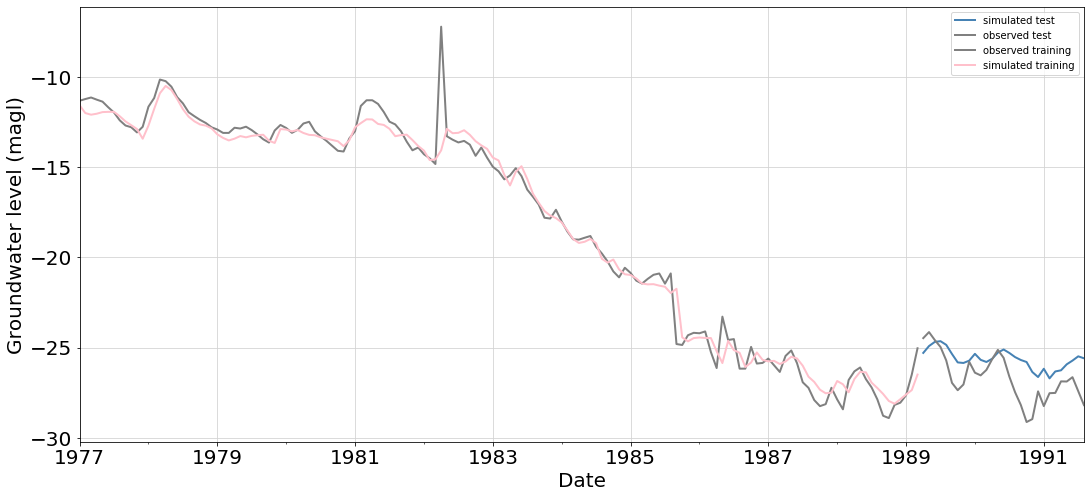

In [79]:
mse_ff = summary['mse_ff'].mean(axis=0)
rmse_ff= summary['rmse_ff'].mean(axis=0)
mae_ff = summary['mae_ff'].mean(axis=0)
r2_ff  = summary['r2_ff'].mean(axis=0)
stdv_ff= stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_ff, 3))
print("Mean squared error is:",round(mse_ff,3))
print("Root mean squared error is:",round(rmse_ff, 3))
print("Mean absolute error is:",round(mae_ff,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[147:176].index)
df1['observed test']      = pima.iloc[147:176, 0].values

df2 = pd.DataFrame(pima.iloc[0:147, 0].values, columns = ['observed training'],index =pima.iloc[0:147].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [80]:
y_ff = out_df['simulated test']

## Static Models

In [81]:
pima2  = pima[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2','D4N0110']]

In [82]:
X = pima2[['Discharge_log' ,'precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']].values
y = pima2['D4N0110'].values
y = y.reshape(-1,1)

In [83]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(147, 6) (147, 1)
(29, 6) (29, 1)


In [84]:
def forecast(model, test_forecast, gwl, steps_ahead):
    y_pred = []
    current_output = gwl
    for step in range(steps_ahead):
        #print(test_forecast[step])
        input_test = np.concatenate([test_forecast[step][:-1], [current_output]])
        #input_test = [test_forecast[0][0][:-1], gwl]
        #print(input_test)
        pred = model.fit(input_test.reshape(1,1,6))
        y_pred.append(pred[0][0])
        #print(pred)
        current_output = pred[0][0]
    return y_pred

### Decision Tree

In [85]:
from sklearn.metrics import *
import numpy as np
import csv  

from sklearn.tree import DecisionTreeRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_dc', 'rmse_dc', 'r2_dc','mae_dc'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    regressor = DecisionTreeRegressor(max_features='auto') #random state is so i get same results whenever i run the regressor
    regressor.fit(X_train,y_train)
    y_dc = regressor.predict(X_test)

    #metrics for test
    y_dc = y_dc
    test_pred.append(y_dc)
    mse_dc = mean_squared_error(y_test, y_dc)
    rmse_dc = np.sqrt(mse_dc)
    r2_dc = r2_score(y_test, y_dc)
    mae_dc = mean_absolute_error(y_test, y_dc)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_dc,Round), round(rmse_dc,Round), round(r2_dc,Round),round(mae_dc,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(147, 6)
Running fold 2
(147, 6)
Running fold 3
(147, 6)
Running fold 4
(147, 6)
Running fold 5
(147, 6)
Running fold 6
(147, 6)
Running fold 7
(147, 6)
Running fold 8
(147, 6)
Running fold 9
(147, 6)
Running fold 10
(147, 6)


In [86]:
summary

Iteration_No  mse_dc  rmse_dc  r2_dc  mae_dc
0   Iteration_1   1.867    1.366 -0.143   1.143
1   Iteration_2   2.497    1.580 -0.528   1.198
2   Iteration_3   2.369    1.539 -0.450   1.228
3   Iteration_4   1.912    1.383 -0.170   1.133
4   Iteration_5   1.670    1.292 -0.022   1.046
5   Iteration_6   1.810    1.345 -0.108   1.095
6   Iteration_7   2.410    1.552 -0.475   1.171
7   Iteration_8   1.840    1.356 -0.126   1.110
8   Iteration_9   2.279    1.510 -0.395   1.246
9  Iteration_10   2.000    1.414 -0.224   1.162

In [87]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:147, 6].values

In [88]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.0
Root mean squared error is: 0.0
Mean absolute error is: 0.0
R^2 score is:  1.0

The model performance for the test set
--------------------------------------
R^2 score is:  -0.264
Mean squared error is: 2.065
Root mean squared error is: 1.434
Mean absolute error is: 1.153


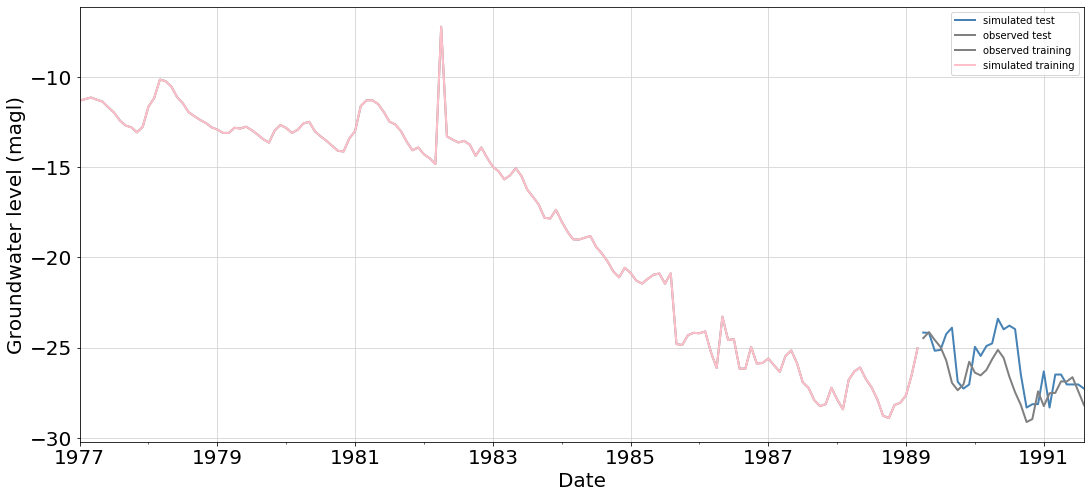

In [89]:
mse_dc = summary['mse_dc'].mean(axis=0)
rmse_dc = summary['rmse_dc'].mean(axis=0)
mae_dc = summary['mae_dc'].mean(axis=0)
r2_dc  = summary['r2_dc'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_dc, 3))
print("Mean squared error is:",round(mse_dc,3))
print("Root mean squared error is:",round(rmse_dc, 3))
print("Mean absolute error is:",round(mae_dc,3))




df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[147:176].index)
df1['observed test']      = pima.iloc[147:176, 0].values

df2 = pd.DataFrame(pima.iloc[0:147, 0].values, columns = ['observed training'],index =pima.iloc[0:147].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### SVR

In [90]:
from sklearn.svm import SVR

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_svr', 'rmse_svr', 'r2_svr','mae_svr'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)
    
    regressor = SVR(kernel='rbf', epsilon=0.1, C=1, degree=4 ,gamma='auto') 
    regressor.fit(X_train,y_train)
    y_svr = regressor.predict(X_test)

    #metrics for test
    y_svr = y_svr
    test_pred.append(y_svr)
    mse_svr = mean_squared_error(y_test, y_svr)
    rmse_svr = np.sqrt(mse_svr)
    r2_svr = r2_score(y_test, y_svr)
    mae_svr = mean_absolute_error(y_test, y_svr)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_svr,Round), round(rmse_svr,Round), round(r2_svr,Round),round(mae_svr,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(147, 6)
Running fold 2
(147, 6)
Running fold 3
(147, 6)
Running fold 4
(147, 6)
Running fold 5
(147, 6)
Running fold 6
(147, 6)
Running fold 7
(147, 6)
Running fold 8
(147, 6)
Running fold 9
(147, 6)
Running fold 10
(147, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

In [91]:
summary

Iteration_No  mse_svr  rmse_svr  r2_svr  mae_svr
0   Iteration_1    1.589      1.26   0.028    0.932
1   Iteration_2    1.589      1.26   0.028    0.932
2   Iteration_3    1.589      1.26   0.028    0.932
3   Iteration_4    1.589      1.26   0.028    0.932
4   Iteration_5    1.589      1.26   0.028    0.932
5   Iteration_6    1.589      1.26   0.028    0.932
6   Iteration_7    1.589      1.26   0.028    0.932
7   Iteration_8    1.589      1.26   0.028    0.932
8   Iteration_9    1.589      1.26   0.028    0.932
9  Iteration_10    1.589      1.26   0.028    0.932

In [92]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:147, 6].values

In [93]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 2.083
Root mean squared error is: 1.443
Mean absolute error is: 0.724
R^2 score is:  0.943

The model performance for the test set
--------------------------------------
R^2 score is:  0.028
Mean squared error is: 1.589
Root mean squared error is: 1.26
Mean absolute error is: 0.932


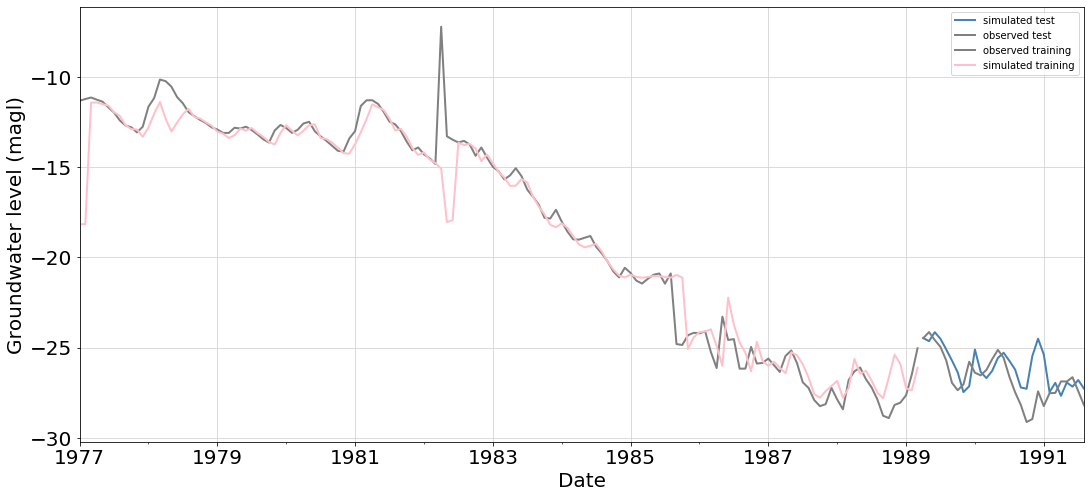

In [94]:
mse_svr  = summary['mse_svr'].mean(axis=0)
rmse_svr = summary['rmse_svr'].mean(axis=0)
mae_svr  = summary['mae_svr'].mean(axis=0)
r2_svr   = summary['r2_svr'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_svr, 3))
print("Mean squared error is:",round(mse_svr,3))
print("Root mean squared error is:",round(rmse_svr, 3))
print("Mean absolute error is:",round(mae_svr,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[147:176].index)
df1['observed test']      = pima.iloc[147:176, 0].values

df2 = pd.DataFrame(pima.iloc[0:147, 0].values, columns = ['observed training'],index =pima.iloc[0:147].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### GradientBoostingRegressor

In [95]:
from sklearn.ensemble import GradientBoostingRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_gb', 'rmse_gb', 'r2_gb','mae_gb'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    regressor = GradientBoostingRegressor()
    regressor.fit(X_train,y_train)
    y_gb = regressor.predict(X_test)

    #metrics for test
    y_gb = y_gb
    test_pred.append(y_gb)
    mse_gb = mean_squared_error(y_test, y_gb)
    rmse_gb = np.sqrt(mse_gb)
    r2_gb = r2_score(y_test, y_gb)
    mae_gb = mean_absolute_error(y_test, y_gb)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_gb,Round), round(rmse_gb,Round), round(r2_gb,Round),round(mae_gb,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(147, 6)
Running fold 2
(147, 6)
Running fold 3
(147, 6)
Running fold 4
(147, 6)
Running fold 5
(147, 6)
Running fold 6
(147, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

Running fold 7
(147, 6)
Running fold 8
(147, 6)
Running fold 9
(147, 6)
Running fold 10
(147, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

In [96]:
summary

Iteration_No  mse_gb  rmse_gb  r2_gb  mae_gb
0   Iteration_1   4.053    2.013 -1.480   1.716
1   Iteration_2   4.153    2.038 -1.542   1.732
2   Iteration_3   4.035    2.009 -1.469   1.701
3   Iteration_4   4.053    2.013 -1.481   1.716
4   Iteration_5   4.126    2.031 -1.525   1.724
5   Iteration_6   4.057    2.014 -1.483   1.720
6   Iteration_7   4.134    2.033 -1.530   1.741
7   Iteration_8   4.068    2.017 -1.490   1.722
8   Iteration_9   4.058    2.014 -1.484   1.706
9  Iteration_10   4.053    2.013 -1.480   1.706

In [97]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:147, 6].values

In [98]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.032
Root mean squared error is: 0.178
Mean absolute error is: 0.137
R^2 score is:  0.999

The model performance for the test set
--------------------------------------
R^2 score is:  -1.496
Mean squared error is: 4.079
Root mean squared error is: 2.019
Mean absolute error is: 1.718


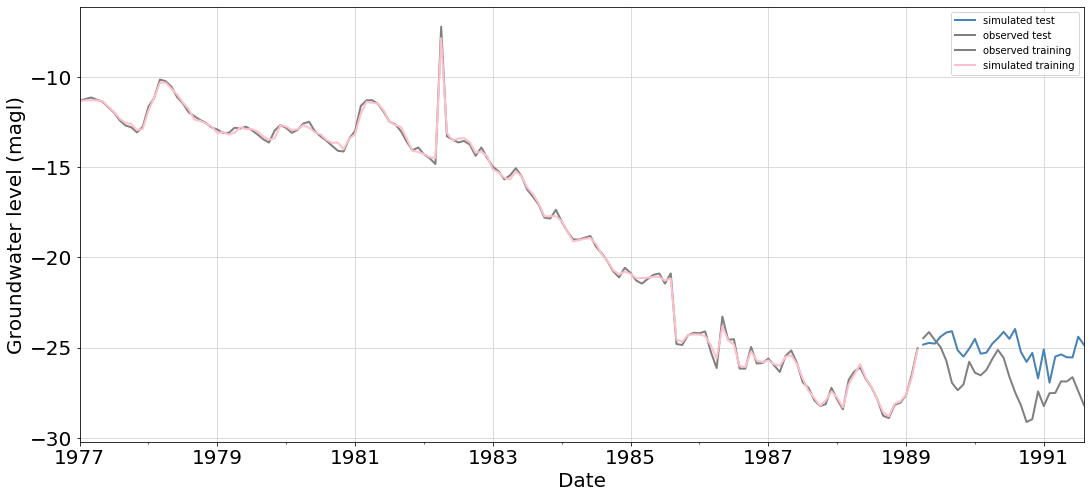

In [99]:
mse_gb  = summary['mse_gb'].mean(axis=0)
rmse_gb = summary['rmse_gb'].mean(axis=0)
mae_gb  = summary['mae_gb'].mean(axis=0)
r2_gb   = summary['r2_gb'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_gb, 3))
print("Mean squared error is:",round(mse_gb,3))
print("Root mean squared error is:",round(rmse_gb, 3))
print("Mean absolute error is:",round(mae_gb,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[147:176].index)
df1['observed test']      = pima.iloc[147:176, 0].values

df2 = pd.DataFrame(pima.iloc[0:147, 0].values, columns = ['observed training'],index =pima.iloc[0:147].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### Randon Forest

In [100]:
from sklearn.ensemble import RandomForestRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_rf', 'rmse_rf', 'r2_rf','mae_rf'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)



    rf = RandomForestRegressor(n_estimators=10)
    rf.fit(X_train, y_train)
    y_rf = rf.predict(X_test)

    #metrics for test
    y_rf= y_rf
    test_pred.append(y_rf)
    mse_rf= mean_squared_error(y_test, y_rf)
    rmse_rf= np.sqrt(mse_rf)
    r2_rf= r2_score(y_test, y_rf)
    mae_rf= mean_absolute_error(y_test, y_rf)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_rf,Round), round(rmse_rf,Round), round(r2_rf,Round),round(mae_rf,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(147, 6)
Running fold 2
(147, 6)
Running fold 3
(147, 6)
Running fold 4
(147, 6)
Running fold 5
(147, 6)
Running fold 6
(147, 6)
Running fold 7
(147, 6)
Running fold 8
(147, 6)
Running fold 9
(147, 6)
Running fold 10
(147, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-

In [101]:
summary

Iteration_No  mse_rf  rmse_rf  r2_rf  mae_rf
0   Iteration_1   1.852    1.361 -0.134   1.117
1   Iteration_2   2.402    1.550 -0.470   1.303
2   Iteration_3   1.384    1.176  0.153   0.977
3   Iteration_4   2.564    1.601 -0.569   1.332
4   Iteration_5   1.957    1.399 -0.198   1.107
5   Iteration_6   1.343    1.159  0.178   0.938
6   Iteration_7   3.075    1.754 -0.882   1.435
7   Iteration_8   1.586    1.259  0.029   1.020
8   Iteration_9   1.655    1.287 -0.013   1.073
9  Iteration_10   3.219    1.794 -0.970   1.524

In [102]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:147, 6].values

In [103]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.032
Root mean squared error is: 0.178
Mean absolute error is: 0.137
R^2 score is:  0.999

The model performance for the test set
--------------------------------------
R^2 score is:  -0.288
Mean squared error is: 2.104
Root mean squared error is: 1.434
Mean absolute error is: 1.183


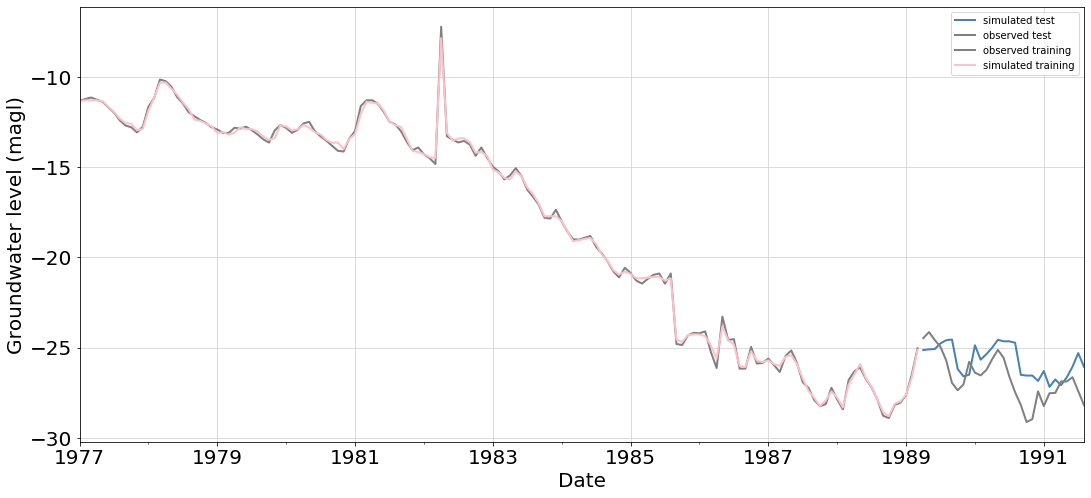

In [104]:
mse_rf  = summary['mse_rf'].mean(axis=0)
rmse_rf = summary['rmse_rf'].mean(axis=0)
mae_rf  = summary['mae_rf'].mean(axis=0)
r2_rf   = summary['r2_rf'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_rf, 3))
print("Mean squared error is:",round(mse_rf,3))
print("Root mean squared error is:",round(rmse_rf, 3))
print("Mean absolute error is:",round(mae_rf,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[147:176].index)
df1['observed test']      = pima.iloc[147:176, 0].values

df2 = pd.DataFrame(pima.iloc[0:147, 0].values, columns = ['observed training'],index =pima.iloc[0:147].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [105]:
vs = pd.DataFrame(pima.iloc[147:176, 0].values, columns = ['Observed'],index =pima.iloc[147:176].index)
vs['FFNN'] = y_svr
vs['GB'] = y_gb
vs['RF'] = y_rf
vs['DC'] = y_dc
vs['LSTM'] = y_lstm
vs['GRU'] = y_gru

Text(0, 0.5, 'Groundwater levels (magl)')

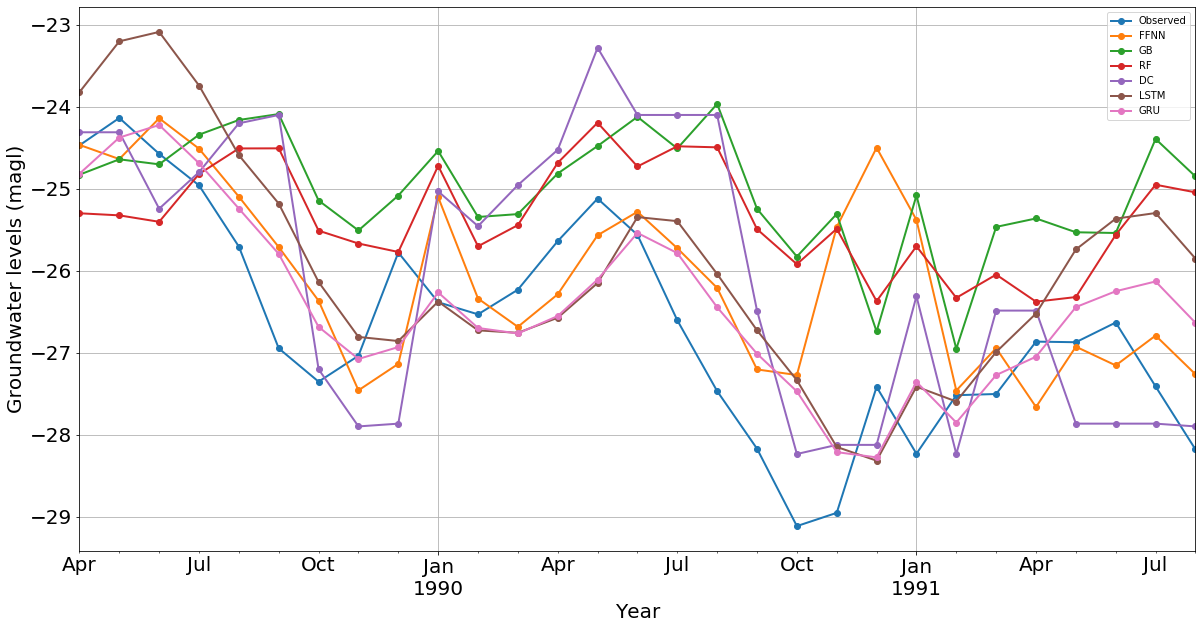

In [106]:
vs.plot(figsize=(20,10), linewidth=2, fontsize = 20, grid=True, marker='o')
plt.xlabel("Year",fontsize=20)
plt.ylabel("Groundwater levels (magl)",fontsize=20)